# 2 - Activisim - EDA

In [1]:
library(DBI)
library(odbc)
#if(!require(mechkar)) {install.packages("mechkar");require(mechkar)}
library(dplyr)
if(!require(ggplot2)) {install.packages("ggplot2");require(ggplot2)}
if (!require("car")) install.packages("car")
if (!require("tibble")) install.packages("tibble")
if (!require("gridExtra")) install.packages("gridExtra")
if (!require("gtools")) install.packages("gtools")
if (!require("chron")) install.packages("chron")
if(!require(naniar)) {install.packages("naniar");require(naniar)}
if(!require(mvoutlier)) {install.packages("mvoutlier");require(mvoutlier)}
if(!require(MissMech)) {install.packages("MissMech");require(MissMech)}
if(!require(mice)) {install.packages("mice");require(mice)}
if(!require(MatchIt)) {install.packages("MatchIt");require(MatchIt)}


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.6.3"
Error: package or namespace load failed for 'car' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpkH6AU9\downloaded_packages


Loading required package: tibble

Warning message:
"package 'tibble' was built under R version 3.6.3"
Loading required package: gridExtra

Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: gtools

Warning message:
"package 'gtools' was built under R version 3.6.3"
Loading required package: chron

Warning message:
"package 'chron' was built under R version 3.6.3"
Loading required package: naniar

Warning message:
"package 'naniar' was built under R version 3.6.3"
Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.3"
Loading required package: sgeostat

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Error: package or namespace load failed for 'mvoutlier' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package c

package 'mvoutlier' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpkH6AU9\downloaded_packages


Loading required package: mvoutlier

Warning message:
"package 'mvoutlier' was built under R version 3.6.3"
Error: package or namespace load failed for 'mvoutlier' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'VIM'

Loading required package: MissMech

Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.3"
Error: package or namespace load failed for 'mice':
 object 'pivot_longer' is not exported by 'namespace:tidyr'



package 'mice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpkH6AU9\downloaded_packages


Loading required package: mice

Warning message:
"package 'mice' was built under R version 3.6.3"
Error: package or namespace load failed for 'mice':
 object 'pivot_longer' is not exported by 'namespace:tidyr'

Loading required package: MatchIt

Warning message:
"package 'MatchIt' was built under R version 3.6.3"


In [8]:
con <- dbConnect(odbc(), 
                 Driver = "SQL Server", 
                 Server = "SEC-WIN10\\SQLExpress", 
                 Database = "Activism", 
                 Trusted_Connection = "True")

In [48]:
df <- dbReadTable(con,"activist_holdings_v")
head(df)

Investor.ID Activist                      ActivistHQ ActivistRegion Founded
1  2          Aberdeen Asset Management PLC UK         WestEurope     1983   
2  2          Aberdeen Asset Management PLC UK         WestEurope     1983   
3  2          Aberdeen Asset Management PLC UK         WestEurope     1983   
4  2          Aberdeen Asset Management PLC UK         WestEurope     1983   
5 14          AFL-CIO                       US         NorthAmerica   1955   
6 14          AFL-CIO                       US         NorthAmerica   1955   
  FirstDateInvestedByActivisit CurrentHolding StatusCurrent StatusExisted
1 2017-01-03                   NA             1             0            
2 2010-09-10                   11             1             0            
3 2015-09-17                   NA             0             1            
4 2013-08-15                   NA             1             0            
5 2013-03-25                   NA             1             0            
6 2016-02-23                   NA             1             0            
  DateExited ... SeatsGained SeatsGainedMethod Ongoing WithdrewDemands
1 NA         ... NA          N/A               No      No             
2 NA         ... NA          N/A               No      No             
3 2016-10-10 ... NA          N/A               No      No             
4 NA         ... NA          NA                No      No             
5 NA         ... NA          N/A               No      No             
6 NA         ... NA          N/A               No      No             
  PartiallySuccessful Successful Unsuccessful CompromiseOrSettlement Unresolved
1 No                  No         Yes          No                     No        
2 No                  Yes        No           No                     No        
3 No                  Yes        No           No                     No        
4 No                  No         No           No                     No        
5 No                  No         Yes          No                     No        
6 No                  No         Yes          No                     No        
  Buyer   
1 NA      
2 NA      
3 AB InBev
4 NA      
5 NA      
6 NA

In [19]:
#df <- df %>% filter (ConpanyRegion == "WestEurope" | ConpanyRegion == "NorthAmerica")

In [47]:
names(df[73:114])

[1] "ThirteenD"                             
 [2] "LongShort"                             
 [3] "GainBoardRepresentation"               
 [4] "AdoptMajorityVoteStandard"             
 [5] "AmendByLaw"                            
 [6] "AmendListingStatus"                    
 [7] "BoardIndependence"                     
 [8] "BusinessFocus"                         
 [9] "BusinessRestructuring"                 
[10] "ChangeBoardComposition"                
[11] "ClosureOfBusinessUnit"                 
[12] "Dividends"                             
[13] "EliminateStaggeredBoard"               
[14] "EquityIssuance"                        
[15] "ExcessCash"                            
[16] "FocusOnGrowthStrategies"               
[17] "GeneralCostCutting"                    
[18] "LackOfInaccurateInformationFromCompany"
[19] "OperationalEfficiency"                 
[20] "OpposeAcquisitionOfThirdParty"         
[21] "OpposeEquityIssuance"                  
[22] "OpposeProxyContest"                    
[23] "OpposeSaleOfCompany"                   
[24] "PushForAcquisitionOfThirdParty"        
[25] "PushForCompanyDivision"                
[26] "PushForSaleOfCompany"                  
[27] "PushForOpposeMergingOfShares"          
[28] "Recapitalization"                      
[29] "RedemptionAmendmentOfPoisonPill"       
[30] "REITorMLPConversion"                   
[31] "RemovalOfCEOorOtherBoardMember"        
[32] "Remuneration"                          
[33] "ReplaceAuditor"                        
[34] "ReplaceManagement"                     
[35] "RestructureDebt"                       
[36] "ReturnCashToShareholders"              
[37] "SellOrRetainAssets"                    
[38] "SeparateChairmanAndCEO"                
[39] "ShareRepurchase"                       
[40] "SpinOffSaleOfBusinessDivision"         
[41] "SuccessionPlanning"                    
[42] "TerminateInvestmentAdvisoryAgreement"

In [54]:
df$Investor.ID <- factor(df$Investor.ID)
df$FirstDateInvestedByActivisit <- as.Date(df$FirstDateInvestedByActivisit,"%Y-%m-%d")
df$DateExited <- as.Date(df$DateExited,"%Y-%m-%d")
df$LastInv <- as.Date(df$LastInv,"%Y-%m-%d")
df$ActivistAUMDate <- as.Date(df$ActivistAUMDate,"%Y-%m-%d")
df$ThirteenD <- as.Date(df$ThirteenD,"%Y-%m-%d")

for (i in 74:187){
    df[[i]] <- factor(df[[i]])
}

In [60]:
summary(df)

  Investor.ID     Activist          ActivistHQ        ActivistRegion    
 1731   : 275   Length:9299        Length:9299        Length:9299       
 6071   : 253   Class :character   Class :character   Class :character  
 5760   : 162   Mode  :character   Mode  :character   Mode  :character  
 5565   : 157                                                           
 5155   : 138                                                           
 5402   : 137                                                           
 (Other):8177                                                           
    Founded     FirstDateInvestedByActivisit CurrentHolding   StatusCurrent  
 Min.   :1668   Min.   :1991-08-20           Min.   : 0.000   Min.   :0.000  
 1st Qu.:1993   1st Qu.:2013-05-10           1st Qu.: 1.288   1st Qu.:0.000  
 Median :2001   Median :2015-09-24           Median : 4.990   Median :0.000  
 Mean   :1995   Mean   :2015-05-08           Mean   : 8.374   Mean   :0.487  
 3rd Qu.:2008   3rd Qu.:20

In [42]:
##names(df)[names(df) == "Current.Holding...."] <- "Current.Holding"
##names(df)[names(df) == "X.ofInvByMC"] <- "NoOfInvByMC"

In [9]:
#install.packages("finalfit")

In [11]:
#install.packages("tibble")

Warning message:
"package 'tibble' is in use and will not be installed"


In [8]:
#find the type of variables
#library(finalfit) 
#explanatory = setdiff(names(df),"AvgReturnAnnualisedByAct")
#dependent = df$AvgReturnAnnualisedByAct
#ff_glimpse(dependent, explanatory)

## Removing variables with less than 2 levels

In [8]:
#l1 <- c()
#for (v in names(df)){
#    if (length(unique(df[[v]]))==1){
#        l1<- c(l1,v)
#    }
#}
#df <- df[ , !names(df) %in% l1]


# Exploratory data analysis

In [61]:
vn <- names(df[,2:188])
Activism_continuous <- NULL
for(v in vn) {
        if((is.numeric(df[[v]])) & length(unique(df[[v]]))>3)
            {Activism_continuous <- c(Activism_continuous,v)}}

length (Activism_continuous)
Activism_continuous

[1] 48

[1] "Founded"                       "CurrentHolding"               
 [3] "PID"                           "AH_PricePerShareLocal"        
 [5] "AH_PruchaseValueMnLocal"       "FR_PriceStart"                
 [7] "FR_PriceEnd"                   "PriceChangeSinceExitByCamp"   
 [9] "SPChangeSinceExitByCamp"       "AvgChangeOverPeriodOfInvByAct"
[11] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
[13] "AvgSPReturnAnnualisedByAct"    "ExcessReturnByAct"            
[15] "ReturnByCamp"                  "ReturnAnnualisedByCamp"       
[17] "SPChangeByCamp"                "SPChangeAnnualisedByCamp"     
[19] "NoOfCamp"                      "PositiveReturnByCamp"         
[21] "ExcessReturnByCamp"            "HitRatioByAct"                
[23] "NoOfCamp3Y"                    "PositiveReturnByCamp3Y"       
[25] "HitRatioByAct3Y"               "CampByIND"                    
[27] "PositiveReturnByIND"           "HitRatioByIND"                
[29] "CampByIND3Y"                   "PositiveReturnByIND3Y"        
[31] "HitRatioByIND3Y"               "NoOfInvByIND"                 
[33] "AvgChangeOverPeriodOfInvByIND" "AvgReturnAnnualisedByIND"     
[35] "AvgSPReturnByIND"              "AvgSPReturnAnnualisedByIND"   
[37] "MarketCap"                     "CampByMC"                     
[39] "PositiveReturnByMC"            "HitRatioByMC"                 
[41] "CampByMC3Y"                    "PositiveReturnByMC3Y"         
[43] "HitRatioByMC3Y"                "NoOfInvByMC"                  
[45] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[47] "AvgSPReturnByMC"               "ActivistAUM"

In [121]:
Activism_continuousV2 <- df[,c(5,12:16,18:25,20,28:36,38:45,47:51,57,62,170:171)]
Activism_continuous <- names(Activism_continuousV2)

Activism_continuous
length(Activism_continuous)


[1] "Founded"                       "AvgChangeOverPeriodOfInvByAct"
 [3] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
 [5] "AvgSPReturnAnnualisedByAct"    "ExcessReturnByAct"            
 [7] "ReturnByCamp"                  "ReturnAnnualisedByCamp"       
 [9] "SPChangeByCamp"                "SPChangeAnnualisedByCamp"     
[11] "NoOfCamp"                      "PositiveReturnByCamp"         
[13] "ExcessReturnByCamp"            "HitRatioByAct"                
[15] "SPChangeByCamp.1"              "CampByIND"                    
[17] "PositiveReturnByIND"           "HitRatioByIND"                
[19] "NoOfInvByIND"                  "AvgChangeOverPeriodOfInvByIND"
[21] "AvgReturnAnnualisedByIND"      "AvgSPReturnByIND"             
[23] "AvgSPReturnAnnualisedByIND"    "MarketCap"                    
[25] "CampByMC"                      "PositiveReturnByMC"           
[27] "HitRatioByMC"                  "NoOfInvByMC"                  
[29] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[31] "AvgSPReturnByMC"               "AH_PricePerShareLocal"        
[33] "AH_PruchaseValueMnLocal"       "FR_PriceStart"                
[35] "FR_PriceEnd"                   "PriceChangeSinceExitByCamp"   
[37] "SPChangeSinceExitByCamp"       "ActivistAUM"                  
[39] "CurrentHolding"                "SeatsProposed"                
[41] "SeatsGained"

[1] 41

In [62]:
# vector of numeric features
l2 <- c()
for (v in names(df)){
    if (is.numeric(df[[v]])==T)
          {l2<- c(l2,v)
    } 
}
l2

[1] "Founded"                       "CurrentHolding"               
 [3] "StatusCurrent"                 "StatusExisted"                
 [5] "PID"                           "PID_COUNT"                    
 [7] "AH_PricePerShareLocal"         "AH_PruchaseValueMnLocal"      
 [9] "FR_PriceStart"                 "FR_PriceEnd"                  
[11] "PriceChangeSinceExitByCamp"    "SPChangeSinceExitByCamp"      
[13] "AvgChangeOverPeriodOfInvByAct" "AvgReturnAnnualisedByAct"     
[15] "AvgSPReturnByAct"              "AvgSPReturnAnnualisedByAct"   
[17] "ExcessReturnByAct"             "ReturnByCamp"                 
[19] "ReturnAnnualisedByCamp"        "SPChangeByCamp"               
[21] "SPChangeAnnualisedByCamp"      "NoOfCamp"                     
[23] "PositiveReturnByCamp"          "ExcessReturnByCamp"           
[25] "HitRatioByAct"                 "NoOfCamp3Y"                   
[27] "PositiveReturnByCamp3Y"        "HitRatioByAct3Y"              
[29] "CampByIND"                     "PositiveReturnByIND"          
[31] "HitRatioByIND"                 "CampByIND3Y"                  
[33] "PositiveReturnByIND3Y"         "HitRatioByIND3Y"              
[35] "NoOfInvByIND"                  "AvgChangeOverPeriodOfInvByIND"
[37] "AvgReturnAnnualisedByIND"      "AvgSPReturnByIND"             
[39] "AvgSPReturnAnnualisedByIND"    "MarketCap"                    
[41] "CampByMC"                      "PositiveReturnByMC"           
[43] "HitRatioByMC"                  "CampByMC3Y"                   
[45] "PositiveReturnByMC3Y"          "HitRatioByMC3Y"               
[47] "NoOfInvByMC"                   "AvgChangeOverPeriodOfInvByMC" 
[49] "AvgAnnualisedReturnByMC"       "AvgSPReturnByMC"              
[51] "ConcernedShareholder"          "Engagement"                   
[53] "Occasional"                    "PartialFocus"                 
[55] "PrimaryFocus"                  "ActivistAUM"

In [63]:
### vector of the categoric features 
cf<- c()
for (v in names(df)){
    if ((v %in% names(df))|(is.numeric(df[[v]])==F)|
        (max(df[[v]],na.rm=T)==1 & length(unique(df[[v]]))<=3))  {
        cf<- c(cf,v)
    } 
}
cf

ERROR: Error in Summary.factor(structure(c(1L, 1L, 1L, 1L, 2L, 2L, 2L, 2L, 2L, : 'max' not meaningful for factors


In [9]:
#library(devtools)  
#install_github("karpatit/mechkar")

In [64]:
############################################################################
#####   Package mechkar                                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-01                                       ####
############################################################################

############################################################################
#####   DATA VISUALIZATION                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2014-03-12                                       ####
############################################################################

###########  Functions   ##############################################

###################################################

exploreData <- function(data=data, y=NULL, rn=NULL, factorSize=10, dir=tempdir(), debug=FALSE, ...) {

  whatVarType <- function(var) {
    suppressWarnings(if (var=="integer" | var=="numeric") {
      return(1)
    } else if (var=="factor" | var=="character") {
      return(2)
    } else if (var=="Date" | "POSIXct" %in% var[[1]]) {
      return(3)
    } else {
      return(0)
    })
  }

  drawHistogram <- function(imgname=imgname, x=x) {
    d=stats::density(x, kernel = "gaussian",na.rm=TRUE)
    breakstar=(max(x,na.rm=TRUE) -min(x,na.rm=TRUE))/d$bw
    h=graphics::hist(x, breaks=breakstar)
    graphics::plot(h,main="",xlab=imgname)
    yfit<-seq(min(x,na.rm=TRUE),max(x,na.rm=TRUE),length=40)
    ffit<-stats::dnorm(yfit,mean=mean(x,na.rm=TRUE),sd=stats::sd(x,na.rm=TRUE))
    ffit <- ffit*diff(h$mids[1:2])*length(x)
    lines(yfit, ffit, col="blue", lwd=2)
  }

  drawFakeGraph <- function(imgname=imgname) {
    graphics::plot.window(xlim = c(0,0),ylim = c(0,0))
  }

  drawBars <- function(imgname=imgname, x=x) {
    graphics::plot(x)
  }

  drawGraphOne <- function(imgname=imgname, numVar=x, vartype=1) {
    if(vartype==1) {
      drawHistogram(imgname,numVar)
    } else if(vartype==2) {
      drawBars(imgname,numVar)
    } else {
      drawFakeGraph(imgname)
    }
  }

  getContinuousStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    me <- formatC(stats::median(x, na.rm=TRUE))
    q1 <- formatC(stats::quantile(x,1/4, na.rm=TRUE))
    q3 <- formatC(stats::quantile(x,3/4, na.rm=TRUE))
    mn <- formatC(min(x, na.rm=TRUE))
    mx <- formatC(max(x, na.rm=TRUE))
    html <- paste("<div class='Cell' style='align: top;'> <u>Data type</u>: Continuous <p> <u>Data length</u>: ",n ,"/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%)<p> <u>Mean</u>: ", formatC(ma), "\t <u>StdDev</u>: ", formatC(s), "<br><u>Median</u>: ",me,
                  "\t <u>IQR</u>: ", q1, "-", q3, "<br><u>Min</u>: ", mn, "\t <u>Max</u>: ", mx, "</div>")
    return(html)
  }

  getCategortyStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    l <- levels(x)
    s <- summary(x)
    htm <- "<ul>"
    if (length(l) < 5) {
      for (lv in l) {
        htm <- paste(htm, "<li><u>", lv, "</u>: ", s[[lv]], "</li>")
      }
      htm <- paste(htm,"</ul>")
    }
    html <- paste("<div class='Cell'> <u>Data type</u>: Categorical Data <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Number of levels</u>: ", length(l), "<br>", htm, "</div>")
    return(html)
  }

  getDatesStats <- function(x) {
    N <- length(x)
    n <- length(x[which(is.na(x)==FALSE)])
    pct <- formatC(n/N * 100)
    nmiss <- length(x[which(is.na(x)==TRUE)])
    npct <- formatC(nmiss/N *100)
    s <- summary(x)
    html <- paste("<div class='Cell'> <u>Data type</u>: Date <p> <u>Data length</u>: ",n, "/", N, " (", pct, "%) <br> <u>Missing</u>: ",
                  nmiss, " (", npct, "%) <p> <u>Min date</u>: ", min(x, na.rm=TRUE), "<br><u>Max date</u>:",max(x, na.rm=TRUE) , "</div>")
    return(html)
  }

  getStats <- function(numVar=x, vartype=1) {
    if(vartype==1) {
      html <- getContinuousStats(numVar)
    } else if(vartype==2) {
      html <- getCategortyStats(numVar)
    } else if (vartype==3) {
      html <- getDatesStats(numVar)
    } else {
      html <- "<div class='Cell'></div>"
    }
    return(html)
  }

  getOutliers <- function(x) {
    bp <- graphics::boxplot(x,plot=FALSE)
    return(bp$out)
  }

  getOutlierGraph <- function(x) {
    #  mod <- tryCatch({
    outl <- getOutliers(x)
    df <- data.frame(x=x, cl=1)
    if(length(outl)>0) {
      df$cl[which(df$x %in% outl)] <- 2
    }
    #pl <- stats::scatter.smooth(df$x,col=df$cl)
    pl <- tryCatch({
      stats::scatter.smooth(df$x,col=df$cl,xlab="index")
    }, warning = function(w) {
      suppressWarnings(w)
      #n <- "warning!"
    }, error = function(e) {
      n <- "error!"
    }, finally = {
      graphics::plot(df$x ~ row.names(df),col=df$cl,xlab="index")
    })
    ma <- mean(x, na.rm=TRUE)
    s <- stats::sd(x, na.rm=TRUE)
    graphics::abline(h=ma-(2*s), col="red", lty=2)
    graphics::abline(h=ma+(2*s), col="red", lty=2)
    #  }, error = function(e) {
    #    pl <- drawFakeGraph("none")
    #  })
    return(pl)
  }

  getScatterGraph <- function(df=data,x,y,dtype=1) {
    #  mod <- tryCatch({
    if(dtype==1) {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_smooth(ggplot2::aes(x=data[[x]], y=data[[y]]), method="loess") + ggplot2::xlab(x) + ggplot2::ylab(y)
    } else {
      pl <- ggplot2::ggplot(df) + ggplot2::geom_boxplot(ggplot2::aes(y=data[[x]], color=data[[y]])) + ggplot2::xlab(x) + ggplot2::ylab(y) + ggplot2::labs(color=y)
    }
    return(pl)
  }

  getOutliersHtml <- function(imgname=imgname, x=x, srcdir=srcdir) {
    bp <- getOutliers(x)
    if (length(unique(bp)) > 10) {
      xtrm <- paste("There are ", length(unique(bp)), " outlier values")
    } else if (length(unique(bp)) == 0) {
      xtrm <- "No outlier values found"
    } else {
      xtrm <- paste(formatC(unique(bp)), collapse=', ' )
    }
    #imgsrc = paste(paste0(srcdir,"/fig/"),imgname, "_2.png",sep="")
    imgsrc = paste(paste0("fig/"),imgname, "_2.png",sep="")
    html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='250'><br> <u>Outlier values</u>: <br> ", xtrm, "</div>")
    return(html)
  }
  ################## Prepare for the report ###################
  #report <- paste(mydir,"/report",sep="")

  ################## Check for values for rn ##################
  if(!is.null(rn)) {
    if(length(rn)!=ncol(data)) {
      message("the value of the 'rn' argument was avoided because it does not have the same number of columns of the dataframe")
      rn <- NULL
    }
    xname <- rn
    names(xname) <- names(data)
  } else {
    xname <- NULL
  }

  report <- dir
  if (!file.exists(report)) {
    dir.create(report)
  }
  fig <- paste(report,"/fig",sep="")
  if (!file.exists(fig)) {
    dir.create(fig)
  }
  srcdir <- report

  # determine which columns are integer
  int_col <- which(sapply(data, is.integer))
  int_col <- c(int_col,(which(sapply(data, is.numeric))))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in int_col) {
    if (length(unique(data[,li])) < factorSize) {
      mi <- c(mi,li)
      if (is.factor(data[,li]) == FALSE) {
        data[,li] <- factor(data[,li])
      }
    }
  }

  str_col <- which(sapply(data, is.character))
  mi <- vector()
  # find only those integers with less than 10 unique values and convert to factor
  for (li in str_col) {
    mi <- c(mi,li)
    data[,li] <- factor(data[,li])
  }

  # create the html report page
  myhtml <- paste(report,"/report.html",sep="")
  cat("<!DOCTYPE html>
      <html>
      <head>
      <title>Data Visualization</title>
      <meta http-equiv='Content-Type' content='text/html; charset=UTF-8' />
      <link rel='stylesheet' href='http://code.jquery.com/mobile/1.4.5/jquery.mobile-1.4.5.min.css'>
      <script src='http://code.jquery.com/jquery-1.10.2.js'></script>
      <script>
      $(document).ready(function(){
      $('.onetoone').hide();
      });
      $(function() {
      $('.origimg').click(function(e) {
      $('#popup_img').attr('src',$(this).attr('src'));
      $('#myContainer').hide();
      var pos = $(document).scrollTop();
      $('#myContainer').css({'top':pos+20,'left':250, 'position':'absolute', 'border':'1px solid black', 'padding':'0px'});
      $('#myContainer').show();
      });
      $('#myContainer').click(function(e) {
      $('#myContainer').hide();
      });
      $('#myform2').submit(function(e) {
      e.preventDefault();
      });
      $('#onetoone').on('click',function() {
      console.log('onetone button - 1');
      $('#onetoone').hide();
      $('#aslist').show();
      // To show only individual rows:
      $('.Row').hide();
      $('.onetoone').show();
      // then we iterate
      var i = $('.Row').length;
      // Then we iterate
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('onetone button - 2');
      });
      $('#aslist').on('click',function() {
      console.log('aslist button - 1');
      $('#onetoone').show();
      $('#aslist').hide();
      $('.onetoone').hide();
      $('.Row').show();
      console.log('aslist button - 2');
      });
      $('#less').on('click',function(){
      console.log('less button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) - 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(1)
      }
      console.log('less button - 2');
      });
      $('#more').on('click',function(){
      console.log('more button - 1');
      var i = $('.Row').length;
      var nxt = parseInt($('#idx').val(),10) + 1;
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('more button - 2');
      });
      $('#idx').on('change', function(){
      console.log('idx changed - 1');
      var i = $('.Row').length;
      var nxt = $('#idx').val();
      if (nxt < i & nxt >0) {
      $('#idx').val(nxt)
      $('.Row').hide();
      $('.Row').eq(0).show();
      $('.Row').eq(nxt).show();
      } else {
      $('#idx').val(i)
      }
      console.log('idx changed - 2');
      });
      });
      </script>
      <style type='text/css'>
      .Table
      {
      display: table;
      }
      .Title
      {
      display: table-caption;
      text-align: center;
      font-weight: bold;
      font-size: larger;
      background-color:#4C6F50;
      color: #fff;
      }
      .Row
      {
      display: table-row;
      }
      .Row:nth-child(even) {
        background-color: #56882433;
      }
      .Cell
      {
      display: table-cell;
      border: solid;
      border-width: thin;
      padding-left: 5px;
      padding-right: 5px;
      vertical-align: top;
      font-family: Arial, Helvetica, sans-serif;
      font-size: 14px;
      }
      </style>
      </head>
      <body>
      <div id='pageone' data-role='main' class='ui-content'>
      ", file = myhtml, sep='\n',append=FALSE)

  html <- paste("<p><p><h1> Data Visualization & Exploration </h1>
                <form>
                <input type='button' id='onetoone' value='Show as Cards'>
                <input type='button' id='aslist' class='onetoone' value='Show as List'>
                </form>
                <p>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # begin table
  alt1 <- ifelse(is.null(y)== TRUE, "", "<div class='Cell Title'> Dependent <br> Variable <br> Distribution </div>")
  html <- paste("<p><p>
                <div class='Table'>
                <div class='Row'>
                <div class='Cell Title'> Variable </div>
                <div class='Cell Title'> Distribution </div>
                <div class='Cell Title'> Descriptive <br> Statistics</div>
                <div class='Cell Title'> Outliers </div>"
                , alt1,
                "</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)

  #### determinate the type of each variable...
  data_types <- sapply(sapply(data, class), whatVarType)
  ln <- length(data)
  ii <- 0
  pb <- utils::txtProgressBar(min=0,max=ln,style=3)
  for(x in names(data)) {

    ## check if the value has at least more than one unique value...
    if(length(unique(data[[x]])) < 2) {
      message(paste("The variable",x,"has less than two unique values, so will not be included"))
    } else {

      if(debug==TRUE) {
        message(x)
      } else {
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)
      }

      html <- paste("<div class='Row'><div class='Cell'><b>",x,"</b><p>",xname[x],"</p></div>")

      cat(html, file = myhtml, sep='\n', append=TRUE)
      #### initialize the first graph
      imgname = paste(fig,"/",x, "_1.png",sep="")
      #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_1.png",sep="")
      imgsrc = paste("fig/",x, "_1.png",sep="")
      ### send the data with the type to generate the correct graph..
      grDevices::png(imgname)
      drawGraphOne(x, data[[x]], data_types[x])
      grDevices::dev.off()
      html <- paste0("<div class='Cell'><img class='origimg'  src='",imgsrc,"' height='150' width='150'><br></div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # second, show the statistics
      html <- getStats(data[[x]],data_types[x])
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # third, determine the outliers
      imgname = paste(fig,"/",x, "_2.png",sep="")
      if(data_types[x]==1) {
        grDevices::png(imgname)
        getOutlierGraph(data[[x]])
        grDevices::dev.off()
        html <- getOutliersHtml(x,data[[x]],srcdir)
      } else {
        html <- "<div class='Cell'></div>"
      }
      cat(html, file = myhtml, sep='\n', append=TRUE)

      # fourth, if y is assigned, make a corresponding plot
      if(is.null(y)==FALSE) {
        imgname = paste(fig,"/",x, "_3.png",sep="")
        #imgsrc = paste(paste0(srcdir,"/fig/"),x, "_3.png",sep="")
        imgsrc = paste("fig/",x, "_3.png",sep="")
        grDevices::png(imgname)
        ### scatter.smooth(data[[x]] ~ data[[y]])
        #suppressWarnings(getScatterGraph(data,x,y,data_types[y]))
        plot(getScatterGraph(data,x,y,data_types[y]))
        grDevices::dev.off()
        html <- paste0("<div class='Cell'><img class='origimg' src='",imgsrc,"' height='150' width='150'><br></div>")
        cat(html, file = myhtml, sep='\n', append=TRUE)
      }
      html <- paste("</div>")
      cat(html, file = myhtml, sep='\n', append=TRUE)

      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      }
    }
  }
  html <- paste("</div>")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  # end table
  html <- paste("</div>
                <div data-role='popup' id='myContainer' style='display: none;'>
                <img id='popup_img' src='' />
                </div>
                </div>
                </div>
                </div>
                <p>
                <div class='onetoone'>
                <form id='myform2'>
                <span> <input type='button' id='less' value=' << '> </span>
                <span> <input id='idx' name='idx' value='1'></input></span>
                <span> <input type='button' id='more' value=' >> '> </span>
                </form>
                </div>
                <p>
                </body></html>
                ")
  cat(html, file = myhtml, sep='\n', append=TRUE)
  ## call the default browser or the one which is open (if any)
  browseURL(myhtml)
}

###################### END exploreData ###############



############################################################################
#####   TABLE 1                                                         ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-12-19                                       ####
############################################################################

####################  FUNCTIONS  ###########################################
#### Usage:
####   x: character vector with the name of the variables
####   y: the name of the strata variable (optional)
####   rn: character vector with the text we want to replace the variable names
####   data: the dataset to be used
####   miss: include missing statistics: [0=none, 1=only for categorical variables, 2=for all variables]
####   excel: export the table to excel [0=no, 1=yes]
####   excel_file: the name of the excel file we want to save the table (optional)
####
###################

Table1 <- function(x=NULL, y=NULL, rn=NULL, data=NULL, miss=3, catmiss=TRUE, formatted=TRUE, categorize=FALSE,
                    factorVars=NULL, maxcat=10, delzero=TRUE, decimals=1, messages=TRUE, excel=0, excel_file=NULL,
                    debug=FALSE) {
  ### define sub-functions
  Del <- NULL
  Pop <- NULL
  n <- NULL
  g1 <- function(var)c(Mean=mean(var,na.rm=TRUE), SD=stats::sd(var,na.rm=TRUE))
  g2 <- function(var)c(Median=stats::median(var,na.rm=TRUE), IQR=stats::quantile(var,c(0.25,0.75),na.rm=TRUE))
  msg <- NULL

  ### function for transforming variables to factors
  setFactors <- function(data=data, factorVars=factorVars, catmiss=catmiss, maxcat=maxcat) {
    if(is.null(factorVars)==TRUE) {
      aa <- sapply(sapply(data, unique), length)
      factorVars <- names(which(aa <= maxcat))
    }
    for (v in factorVars) {
      ct <- ifelse( ((is.null(factorVars)==FALSE & (v %in% factorVars)) | (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
      if (ct == 1) {
        data[[v]] <- factor(data[[v]])
        if(catmiss == TRUE & sum(is.na(data[[v]])==TRUE) > 0) {
          data[[v]] <- factor(data[[v]],levels=c(levels(data[[v]]),"Missing"))
          data[[v]][which(is.na(data[[v]])==TRUE)] <- "Missing"
        }
      }
    }
    return(data)
  }
  ### proceed to convert varibles to factors
  if (categorize == TRUE | is.null(factorVars)==FALSE ) {
    data <- setFactors(data, factorVars, catmiss, maxcat)
  }

  getSimpleTable  <- function(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,
                              categorize=categorize,maxcat=maxcat, delzero=delzero) {
    if (is.null(x)==TRUE) { x <- names(data)}
    if (is.null(rn)==TRUE) { rn <- x}
    ln <- length(x)
    pb <- utils::txtProgressBar(min=0,max=ln,style=3)
    msg <- NULL
    ### define the column names
    tableaaaa <- cbind(Del="Del",V1="Variables",V2="Categories",n="n","Population")
    tablebbbb <- cbind(Del="Del",V1="Variables",V2="Categories",n="n",val1="val1",val2="val2",val3="val3")
    tbl1 <- cbind(0,"Individuals","n",n=1, nrow(data))
    tbl2 <- cbind(0,"Individuals","n",n=1, nrow(data),NA,NA)
    tableaaaa <- rbind(tableaaaa,tbl1)
    tablebbbb <- rbind(tablebbbb,tbl2)
    q <- 1
    n <- 1
    ii <- 1
    for (v in x)
    {
      if (v %in% names(data)) {
        ### define if the actual variable has to be treated as numeric or factor
        ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE &
                       ((is.null(factorVars)==FALSE & (v %in% factorVars)) |
                          (is.null(factorVars)==TRUE & length(unique(data[[v]])) <= maxcat)),1,0)
        ### treat as numeric
        if (length(unique(data[v]))==0) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"has no data... avoided"))
          }
        } else if (inherits(data[[v]], "Date")==TRUE) {
          if (messages==TRUE) {
            msg <- c(msg, paste("The variable",v,"is a date. Dates are not allowed in Table1... avoided"))
          }
        } else if (is.numeric(data[[v]])==TRUE & ct==0) {
          ## report mean and standard deviation
          t_n <- g1(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),")",sep="")
          tbl1 <- cbind(0,rn[q],"Mean (SD)",n=1, tp)
          tbl2 <- cbind(0,rn[q],"Mean (SD)",n=1,t_n[1],t_n[2],NA)
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report median and Interquartile ranges (25%,75%)
          t_n <- g2(data[[v]])
          tp <- paste(format(round(t_n[1],decimals),nsmall=1,big.mark=",")," (", format(round(t_n[2],decimals),nsmall=1,big.mark=","),"-", format(round(t_n[3],decimals),nsmall=1,big.mark=","), ")",sep="")
          tbl1 <- cbind(0,rn[q],"Median (IQR)",n=2, format(tp,big.mark=","))
          tbl2 <- cbind(0,rn[q],"Median (IQR)",n=2,t_n[1],t_n[2],t_n[3])
          tableaaaa <- rbind(tableaaaa,tbl1)
          tablebbbb <- rbind(tablebbbb,tbl2)
          ## report number and percent of missing
          if (miss >= 1) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=3, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=3, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=3, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=3, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        } else {
          t_n <- table(data[[v]])
          ttotal <- sum(t_n)
          nm <- row.names(t_n)
          for (f in 1:length(nm)) {
            del1 <- ifelse(length(nm)==2 & (nm[f]=="No" | nm[f]=="no" | nm[f]==0 | nm[f]=="0" | nm[f]=="None" | nm[f]=="none"),1,0)
            tp <- t_n[f] / ttotal * 100
            pct <- paste(format(round(t_n[f],decimals),nsmall=0,big.mark=",")," (", format(round(tp,decimals),nsmall=1,big.mark=","), "%)",sep="")
            tbl1 <- cbind(del1,rn[q],nm[f],n=f, pct)             ########### delete rows 0/1 !!!!!!!!!
            tbl2 <- cbind(del1,rn[q],nm[f],n=f, t_n[f], tp, NA)  ########### delete rows 0/1 !!!!!!!!!
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
          if (miss >= 2 & catmiss==FALSE ) {
            datams <- subset(data,is.na(data[[v]])==TRUE)
            if (nrow(datams)>0) {
              data$cnt <- 1
              datams$cnt <- 1
              t_n <- table(data$cnt)
              t_m <- sum(datams$cnt)
              tp <- paste(format(t_m,big.mark=",")," (",format(round((t_m/t_n)*100,decimals),nsmall=1,big.mark=","),"%)",sep="")
              tbl1 <- cbind(0,rn[q],"Missing (%)",n=f, tp)
              tbl2 <- cbind(0,rn[q],"Missing (%)",n=f, t_m, (t_m/t_n)*100, NA)
            } else {
              tbl1 <- cbind(1,rn[q],"Missing (%)",n=f, " -- ")
              tbl2 <- cbind(1,rn[q],"Missing (%)",n=f, NA, NA, NA)
            }
            tableaaaa <- rbind(tableaaaa,tbl1)
            tablebbbb <- rbind(tablebbbb,tbl2)
          }
        }
      } else {
        if (messages==TRUE) {
          msg <- c(msg, paste("The variable",v,"doesn't exists in the dataset... avoiding"))
        }
      }
      q <- q + 1
      if(debug==FALSE) {
        utils::setTxtProgressBar(pb,ii)
        ii <- ii + 1
      } else {
        message(v)
      }
    }
    if(formatted==TRUE) {
      return(tableaaaa)
    } else {
      return(tablebbbb)
    }
    close(pb)
  }

  pvals <- function(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat) {
    ptab <- NULL
    if (is.null(y)==FALSE) {
      if (y %in% names(data)) {
        if (is.null(x)==TRUE) { x <- names(data)}
        if (is.null(rn)==TRUE | length(rn)<2) {rn <- x}
        q <- 1
        ptab <- cbind(V="Variables",pval="pval", n="n")

        ln <- length(x)
        ii <- 0
        pb <- utils::txtProgressBar(min=0,max=ln,style=3)

        for (v in x) {
          if (v %in% names(data)) {
            ct <- ifelse(is.numeric(data[[v]])==TRUE & categorize==TRUE & length(unique(data[[v]])) <= maxcat,1,0)
            if (is.numeric(data[[y]])==TRUE & categorize==TRUE & length(unique(data[[y]])) <= maxcat) {
              data[[y]] <- as.factor(data[[y]])
            } else if (is.numeric(data[[y]])==TRUE) {
              if (messages==TRUE) {
                msg <- c(msg, paste("The variable",y,"is not a factor. Please convert to factor or change the 'categorize' flag to TRUE."))
              }
              pval <- "Please rerun!!!"
            }
            if (is.numeric(data[[v]])==TRUE & length(unique(data[[v]])) > 1 & ct == 0) {
              ### first check for homoscedasticity
              tryCatch({
                if (stats::bartlett.test(data[[v]], data[[y]])[3] >= 0.05) {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]])))[1, 4]), 3))
                } else {
                  pval <- suppressMessages(round(as.numeric(suppressMessages(car::Anova(stats::lm(data[[v]] ~ data[[y]]), white.adjust = TRUE))[1, 3]), 3))
                }
              }, warning = function(w) {
                suppressWarnings(w)
                #ww <- "suppress warnings..."
              }, error = function(e) {
                pval <- "---"
              })
            } else if (length(unique(data[[v]]))==1) {
              pval <- NA
            } else {
              if(length(unique(data[[v]])) < 15) {
                if (min(table(data[[v]],data[[y]])) > 5) {
                  pval <- round(as.numeric(stats::chisq.test(data[[v]],data[[y]])$p.val),3)
                } else {
                  if(min(table(data[[v]],data[[y]]))==0) {
                    #in cases where there are cells with zero, we use Fisher's exact test
                    tryCatch(
                      pval <- round(as.numeric(stats::fisher.test(data[[v]],data[[y]], workspace=1e9)$p.val),3),
                      error = function(e) {msg <- c(msg,paste0("Unable to calcualte the Fisher test for variables ",v," and ",y))})
                  } else {
                    pval <- round(as.numeric(stats::kruskal.test(data[[v]],data[[y]], workspace=1e9)$p.val),3)
                  }
                }
              } else {
                pval <- NA
              }
            }
            ptab <- rbind(ptab,cbind(V=rn[q],pval=pval,n=2))
          }
          if(debug==FALSE) {
            utils::setTxtProgressBar(pb,ii)
            ii <- ii + 1
          }
          q <- q + 1
        }
      }
    }
    return(ptab)
  }
  ####################### Begin analysis
  ##### check for x's witch have one unique values...get them out...
  vv <- NULL
  j <- 0
  jj <- NULL
  for(v in x) {
    if(length(unique(data[[v]])) < 2) {
      vv <- c(vv,v)
      j <- j + 1
      jj <- c(jj,j)
    }
  }
  warning(paste("The following variables have unique values and will not be included in the analysis:",vv))
  x <- setdiff(x, vv)
  if(is.null(rn)==FALSE & length(jj)>0) {
    rn <- rn[-jj]
  }

  ##### if y is null then make a simple table
  tabaaa1 <- getSimpleTable(x=x, rn=rn, data=data, miss=miss, catmiss=catmiss,formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
  tabaaa1 <- tibble::as_tibble(tabaaa1)
  ############################  CHANGE TO 5 !!!!!!!!!!!!!!
  if(length(tabaaa1) > 5) {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop","pop2","pop3")
  } else {
    names(tabaaa1) <- c("Del","V1","V2","n","Pop")
  }
  ##### if y has two levels, then make a compound comparison
  if (is.null(y)==FALSE){
    if (y %in% names(data)) {
      if (is.factor(data[[y]])==FALSE) {
        if (length(levels(factor(data[[y]]))) > 8) {
          if (messages==TRUE) {
            message("The dependent variable has more than 8 levels, table too large!")
          }
        } else if(min(table(data[[y]]))==0) {
          message("The dependent variable has one or more levels with no individuals assigned!")
        } else {
          data[[y]] <- factor(data[[y]])
        }
      }
      if (length(levels(data[[y]])) >= 2) {
        for (lv in levels(data[[y]])) {
          dtsub <- subset(data, data[[y]]==lv)
          tab <- getSimpleTable(x=x, rn=rn, data=dtsub, miss=miss, catmiss=catmiss, formatted=formatted,categorize=categorize,maxcat=maxcat, delzero=delzero)
          tab <- data.frame(tab)
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          if(length(tab) > 5) {
            names(tab) <- c("Del","V1","V2","n",paste0(lv,"_1"),paste0(lv,"_2"),paste0(lv,"_3"))
          } else {
            names(tab) <- c("Del","V1","V2","n",lv)
          }
          ############################  CHANGE TO 5 !!!!!!!!!!!!!!
          tab[1,5] <- lv
          tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, tab))
        }
        # what to do with dichotomous variables? We remove the "Zero" label...
        # clean unnecesary rows
        if (delzero == TRUE) {
          tabaaa1 <- dplyr::filter(tabaaa1,Del==0)
        }
        ### calculate the p-value
        ptab <- data.frame(pvals(x=x,y=y,rn=rn,data=data,categorize=categorize,maxcat=maxcat))
        names(ptab) <- c("V1","pval","n")
        tabaaa1 <- suppressMessages(dplyr::left_join(tabaaa1, ptab))
        tabaaa1 <- dplyr::filter(tabaaa1,Pop != " -- ") #%>%
      }
    }
  }

  tabaaa1 <- dplyr::select(tabaaa1,-n)
  tabaaa1 <- dplyr::select(tabaaa1,-Del)

  ##### Join the tables...
  #Sys.setenv(JAVA_HOME="")
  if (excel==1) {
    #wb <- xlsx::createWorkbook()
    #sheet1 <- xlsx::createSheet(wb, sheetName="Table 1")
    #xlsx::addDataFrame(tabaaa1,sheet1)
    #### save and close the workbook
    #xlsx::saveWorkbook(wb, excel_file)
    writexl::write_xlsx(tabaaa1,excel_file)
    return(tabaaa1)
  } else {
    return(tabaaa1)
  }
}

########################## END Table1 ###############

############################################################################
#####   TEST & TRAIN DATASET GENERATION                                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=123,tableone=FALSE)
{
  pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
    train[["traintest_ind_"]] <- 1
    test[["traintest_ind_"]] <- 2
    df <- rbind(train, test)
    tab <- Table1(data=df, y="traintest_ind_",messages = FALSE)
    vars <- subset(tab, pval < 0.05)$V1
    vars <- setdiff(vars,"traintest_ind_")
    if (length(vars)==0) {
      message(" ")
      message("You got a perfectly balanced training and test datasets")
      message(" ")
    } else {
      message("WARNING: The following variables are not balanced between the training and test datasets:")
      for (v in vars) { message(paste("*",v)) }
      message("You can try to change the seed value until you get a balanced partition.")
      message("Alternatively, you can ommit this warning and exclude those variables from your model")
      message(" ")
    }
    return(tab)
  }
  nm <- 1
  ttenv = as.environment(nm)
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=ttenv)
  assign(test_name, data[-train_ind, ], envir=ttenv)
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
    tab = checkTrainTest(get(train_name),get(test_name))
    return(tab)
  }
}


######################### END train_test ###############


############################################################################
#####   TABLE 2                                                         ####
#####   Description: calculates the Odds/Hazard ratios and their        ####
#####     confidence intervals from a given model
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-03-09                                       ####
#####   Last Modified: 2018-04-16                                       ####
############################################################################

Table2 <- function(mod, rv=NULL,level=0.95, decimals=3) {
  alpha <- 1-level
  msm <- suppressMessages(summary(mod))
  if(rlang::has_name(msm,"coefficients")==TRUE) {
    msm <- msm$coefficients
  } else if(rlang::has_name(msm,"coef")==TRUE) {
    msm <- msm$coef
  }
  if("coxph" %in% class(mod)) {
    exp_coef <- msm[,1]
    dd <- suppressMessages(exp(stats::confint(mod, level=level)))
    dd1 <- round(dd[,1],decimals)
    dd2 <- round(dd[,2],decimals)
    p_value <- round(msm[,ncol(msm)],decimals)
  } else {
    ciz <- stats::qnorm(1-(alpha/2))
    exp_coef <- exp(msm[, 1])
    se_exp_coef <- msm[,2] * exp_coef
    dd1 <- round(exp_coef - ciz * se_exp_coef, decimals)
    dd2 <- round(exp_coef + ciz * se_exp_coef, decimals)
    exp_coef <- round(exp_coef, decimals)
    z<- abs((exp_coef-1)/se_exp_coef)
    p_value <- round(2*(1-stats::pnorm(z)), decimals)
  }
  tb <- data.frame(cbind(Estimate=exp_coef,'CI_lo'=dd1,'CI_hi'=dd2,'p value'=p_value))
  if (is.null(rv)==FALSE) {
    row.names(tb) <- rv
  }
  return(tb)
}

############################################################################
#####   TABLE2 WITH FORESTPLOT                                          ####
#####   Description: Generates a publication ready version of a model   ####
#####      risk table with a forestplot graph inside it                 ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2018-05-17                                       ####
############################################################################
Table2.forestplot <- function(mod, nr=NULL) {
  opar <- graphics::par(no.readonly = TRUE)
  on.exit(graphics::par(opar))
  tryCatch({tbA <- Table2(mod)},
           error=function(cond) {
             message("This model type is not supported !")
             return(NA)
           })
  if(exists("tbA")) {
    ## max value for x axis
    xmax <- max(tbA[,3])
    if(xmax < 5) {
      #axis(1, seq(0,xmax,by=.5), cex.axis=.5)
     rh <- 12
    } else {
      rh <- 18
    }
    colnames(tbA) <- c("coef","ci_low","ci_high","p_value")
    j <- nrow(tbA)
    nm <- row.names(tbA)
    rowseq <- seq(nrow(tbA),1)
    graphics::par(mai=c(1,0,0,0),new=FALSE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    for (i in 1:j) {
      graphics::abline(h=i-0.5,lwd=1, lty=3, col="gray")
    }
    graphics::par(new=TRUE)
    graphics::plot(tbA$coef, rowseq, pch=15,
         xlim=c(-10,rh), ylim=c(0,j+3),
         xlab='', ylab='', yaxt='n', xaxt='n',
         bty='n')
    graphics::axis(1, seq(0,xmax,by=.5), cex.axis=.5)
    graphics::segments(1,-1,1,j, lty=3)
    graphics::segments(tbA$ci_low, rowseq, tbA$ci_hi, rowseq)
    graphics::mtext('Lower risk',1, line=2.5, at=0, cex=.5, font=2)
    graphics::mtext('Higher risk',1.5, line=2.5, at=2, cex=.5, font=2)
    if (is.null(nr)) {
      nr <- data.frame(vars=names(mod$coefficients))
      col2 <- as.character(gsub(x=nr$vars, pattern=paste(names(mod$xlevels),collapse="|"),replacement=" "))
      col3 <- data.frame(vars=as.character(NULL),col3=as.character(NULL))
      for(n in names(mod$xlevels)) {
        col3 <- rbind(col3, cbind(vars=paste(n,levels(mod$data[[n]])[2],sep=""),col3=n))
      }
      nr$col1 <- ifelse(nr$vars %nin% setdiff(names(mod$coefficients),names(mod$data)),as.character(nr$vars),'')
      nr$col2 <- ifelse(nr$vars %nin% col2, col2, " ")
      nr[1,"col1"] <- ifelse(nr[1,"vars"]=="(Intercept)","(Intercept)",nr[1,"vars"])
      nr$col1 <- ifelse(nr$vars %in% col3, col3, nr$col1)
      suppressWarnings(suppressMessages(nr <- dplyr::left_join(nr,col3)))
      nr$col1 <- ifelse(is.na(nr$col3)==TRUE,nr$col1,as.character(nr$col3))
      nr$col1 <- ifelse(grepl(":",nr$vars),nr$vars,nr$col1)
    } else {
      nr <- data.frame(vars=nr)
      if (length(nm)==nrow(nr)) {
        nr <- cbind(nm,nr)
        colnames(nr) <- c("vars","col1","col2")
      } else {
        return("The number of variables in the table of names (nr) you give is not equal to the number of variables in the model.
               Please check the names you entered in the table.")
      }
    }
    ### this part writes the variable titles
    graphics::text(-10,j+2, "Variables", cex=.75, font=2, pos=4)
    graphics::abline(h=j+1, col="gray", lwd=1.5, lty=1)
    graphics::text(-10,rowseq, nr[,2], cex=.75, pos=4, font=3)
    ### and this writes the categories for nominal variables
    graphics::text(-6,rowseq, nr[,3], cex=.75, pos=4)
    graphics::text(-3,j+2, "Odds Ratio (95% CI)", cex=.75, font=2, pos=4)
    t3 <- ifelse(!is.na(tbA$coef),
                 with(tbA, paste(format(coef,nsmall = 3,digits = 3),' (',format(ci_low,nsmall = 3,digits = 3),'-',format(ci_high,nsmall = 3,digits = 3),')',sep='')), '')
    graphics::text(xmax,rowseq, t3, cex=.75, pos=4, bg="lightgreen")
    graphics::text(xmax+5,j+2, "P Value", cex=.75, font=2, pos=4)
    t4 <- ifelse(!tbA$p_value==0, paste0(" ",format(tbA$p_value,nsmall = 3,digits = 3)), '<0.001')
    graphics::text(xmax+5,rowseq, t4, cex=.75, pos=4)
    graphics::box(which = "outer",col="darkgray",lwd=3)
  }
  graphics::par(mai=c(1,1,1,1),new=FALSE)
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR MEANS                        ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
MeanCI <- function(x,round=3) {
  m <- mean(x,na.rm=TRUE)
  s <- stats::sd(x,na.rm=TRUE)
  ci <- 1.96 * (s/sqrt(length(x)))
  CImin <- m - ci
  CImax <- m + ci
  return(c(mean=round(m,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   CALCULATE CONFIDENCE INTERVALS FOR PROPORTIONS                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-24                                       ####
############################################################################
PropCI <- function(x,round=3,multi=100,ref=2) {
  recode <- function(x,ref) {
    y <- x
    if (ref==2) {
      y[which(x==min(x))] <- 0
      y[which(x==max(x))] <- 1
    } else {
      y[which(x==max(x))] <- 0
      y[which(x==min(x))] <- 1
    }
    return(y)
  }
  if (is.factor(x)==TRUE && length(levels(x))==2) {
    p <- levels(x)[ref]
    y <- recode(as.numeric(x),ref)
  } else if (is.numeric(x)==TRUE && length(levels(factor(x)))==2) {
    p <- ifelse(ref==2,max(x),min(x))
    y <- recode(x,ref)
  } else if (length(levels(factor(x)))==2) {
    p <- levels(factor(x))[ref]
    y <- recode(as.numeric(factor(x)),ref)
  } else {
    return("The variable must be dichotomic")
  }
  freq <- (mean(y,na.rm=TRUE))
  CI <- 1.96 * sqrt((freq * (1-freq))/length(y))
  CImin <- (freq - CI)*multi
  CImax <- (freq + CI)*multi
  return(c(var=p,freq=round(freq*multi,round),CImin=round(CImin,round),CImax=round(CImax,round)))
}

############################################################################
#####   GENERATE A TABLE WITH VALIDITY TESTS                            ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-08-17                                       ####
############################################################################

################# Validity Test #########################################
#
#                    Observed
#                              +                  -
#          -----------------------------------------
# Predicted   +    TP                FP        |     PPV
#                                            a                   b         |  e (e1-e2)
#                                                                             |
#                                                             |
#                         -    FN       TN        |     NPV
#                                c        d         |  f (f1-f2)
#                      ----------------------------------------
#
#                        Sensitivity Specificity  |  Prevalence
#                          g (g1-g2)  h (h1-h2)   |  i (i1-i2)
#
#
#       Chi-square
#       Corrected Chi-square
#       Error: (FP+FN)/(TP+FP+FN+TN)
#       Accuracy: (TP+TN)/(TP+FP+FN+TN)
#       Precision: TP/(TP+FP)
#       Recall: TP/(TP+FN)
#
#       Harmonic mean of precision and recall (F1-Score):
#        f1-Score: 2 * (Precision * Recall)/(Precision + Recall)
#
#####################################################################

ValidityTest <- function (a, b, c, d, multi = 100, caption = "Validity of the Model/Screening")
{

  proportionCI <- function(p, n, multi = 100, prob = 0.95, dec = 2) {
    alpha <- ifelse(prob != 0.95,0.01,0.05)
    ci <- Hmisc::binconf(p,n,alpha=alpha,method="wilson")
    pci = paste(round(ci[1] * multi, dec), " (",
                round(ci[2] * multi, dec), "-",
                round(ci[3] * multi, dec), ")",
                sep = "")
    return(pci)
  }

  lr.ci <- function( a,b,c,d, sig.level=0.95 ) {
    ### Positive and negative likelihood ratios with their 95% CI...
    alpha <- 1 - sig.level
    spec <- d/(b+d)
    sens <- a/(a+c)
    lr.pos <- sens/(1 - spec)
    if ( a != 0 & b != 0 ) {
      sigma2 <- (1/a) - (1/(a+c)) + (1/b) - (1/(b+d))
      lower.pos <- lr.pos * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a == 0 & b == 0 ) {
      lower.pos <- 0
      upper.pos <- Inf
    } else if ( a == 0 & b != 0 ) {
      a.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      lower.pos <- 0
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b) - (1/(b+d))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( a != 0 & b == 0 ) {
      b.temp <- (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a) - (1/(a+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- Inf
    } else if ( (a == (a+c)) & (b == (b+d)) ) {
      a.temp <- a - (1/2)
      b.temp <- b - (1/2)
      spec.temp <- d/(b.temp+d)
      sens.temp <- a.temp/(a+c)
      lr.pos.temp <- sens.temp/(1 - spec.temp)
      sigma2 <- (1/a.temp) - (1/(a.temp+c)) + (1/b.temp) - (1/(b.temp+d))
      lower.pos <- lr.pos.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.pos <- lr.pos.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    lr.neg <- (1 - sens)/spec
    if ( c != 0 & d != 0 ) {
      sigma2 <- (1/c) - (1/(a+c)) + (1/d) - (1/(b+d))
      lower.neg <- lr.neg * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c == 0 & d == 0 ) {
      lower.neg<- 0
      upper.neg <- Inf
    } else if ( c == 0 & d != 0 ) {
      c.temp <- (1/2)
      spec.temp <- d/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      lower.neg <- 0
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d) - (1/(b+d))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    } else if ( c != 0 & d == 0 ) {
      d.temp <- (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- Inf
    } else if ( (c == (a+c)) & (d == (b+d)) ) {
      c.temp <- c - (1/2)
      d.temp <- d - (1/2)
      spec.temp <- d.temp/(b+d)
      sens.temp <- a/(a+c.temp)
      lr.neg.temp <- (1 - sens.temp)/spec.temp
      sigma2 <- (1/c.temp) - (1/(a+c)) + (1/d.temp) - (1/(b+d))
      lower.neg <- lr.neg.temp * exp(-stats::qnorm(1-(alpha/2))*sqrt(sigma2))
      upper.neg <- lr.neg.temp * exp(stats::qnorm(1-(alpha/2))*sqrt(sigma2))
    }
    list(
      lr.pos=lr.pos, lower.pos=lower.pos, upper.pos=upper.pos,
      lr.neg=lr.neg, lower.neg=lower.neg, upper.neg=upper.neg
    )
  }

  ppv <- proportionCI(a, a + b, multi)
  npv <- proportionCI(d, c + d, multi)
  sensit <- proportionCI(a, c + a, multi)
  specif <- proportionCI(d, b + d, multi)
  prev <- proportionCI(a + c, (a + b + c + d), multi)
  er <- proportionCI(b + c, (a + b + c + d), multi)
  acc <- proportionCI(a + d, (a + b + c + d), multi)
  prec <- proportionCI(a, (a + b), multi)
  recall <- proportionCI(a, (a + c), multi)
  f1 <- proportionCI(2 * ((a/(a + b)) * (a/(a + c))), ((a/(a + b)) + (a/(a + c))), multi)
  #Odds ratios
  odds <- ((a/c)/(b/d))
  oddsci <- 1.96 * sqrt((1/a)+(1/b)+(1/c)+(1/d))
  oddsratio <- paste(round(odds,2), " (", round(exp(log(odds)-oddsci),2), "-",round(exp(log(odds)+oddsci),2),")",sep="")
  #False positive rate = type I error= 1 - specificity
  fpr <- proportionCI(b, (d + b), multi)
  #False negative rate = type II error= 1 - sensitivity
  fnr <- proportionCI(c, (a + c), multi)
  #Likelihood ratio positive = sensitivity / (1 - specificity)
  # (a/(c+a) / b/(d+b))
  lr <- lr.ci(a,b,c,d,sig.level=0.95)
  plr1 <- paste(round(lr$lr.pos,2), " (", round(lr$lower.pos,2),"-",round(lr$upper.pos,2),")",sep="")
  #Likelihood ratio negative = (1 - sensitivity) / specificity
  # (c/(a+c) / d/(b+d))
  #nlr <- round((c*(b+d))/(d*(a+c)),2)
  #nlr <- ((c*(b+d))/(d*(a+c)))
  nlr1 <-  paste(round(lr$lr.neg,2), " (", round(lr$lower.neg,2),"-",round(lr$upper.neg,2),")",sep="")
  x <- matrix(c(a, b, c, d), byrow = TRUE, 2, 2)
  csq <- tryCatch({
    warning(stats::chisq.test(x))
  }, warning = function(w) {
    message("Using simulated p-value! - ", conditionMessage(w))
    stats::chisq.test(x, simulate.p.value = TRUE)
  })
  xsq <- round(csq$statistic, 2)
  pval <- round(csq$p.value, 2)
  vars <- cbind("", "Observed", "", "")
  vars <- rbind(vars, cbind("", "+", "-", ""))
  vars <- rbind(vars, cbind("Expected", "(TP)", "(FP)", "PPV"))
  vars <- rbind(vars, cbind("+", a, b, ppv))
  vars <- rbind(vars, cbind("", "(FN)", "(TN)", "NPV"))
  vars <- rbind(vars, cbind("-", c, d, npv))
  vars <- rbind(vars, cbind("", "Sensitivity", "Specificity",
                            "Prevalence"))
  vars <- rbind(vars, cbind("", sensit, specif, prev))
  vars <- rbind(vars, cbind("", "", "", ""))
  vars <- rbind(vars, cbind("Chi-square (p-value)", paste(xsq,
                                                          " (", pval, ")", sep = ""), "", ""))
  vars <- rbind(vars, cbind("Error", er, "", ""))
  vars <- rbind(vars, cbind("Accuracy", acc, "",
                            ""))
  vars <- rbind(vars, cbind("Precision", prec, "(Same as PPV)",
                            ""))
  vars <- rbind(vars, cbind("Recall", recall, "(Same as Sensitivity)", ""))
  vars <- rbind(vars, cbind("F1-Score", f1, "(Harmonic mean of",
                            "precision and recall)"))
  vars <- rbind(vars, cbind("Odds ratios", oddsratio, "", ""))
  vars <- rbind(vars, cbind("False positive rate", fpr, "(type I error)", ""))
  vars <- rbind(vars, cbind("False negative rate", fnr, "(type II error)", ""))
  vars <- rbind(vars, cbind("Positive Likelihood ratio", plr1, "", ""))
  vars <- rbind(vars, cbind("Negative Likelihood ratio", nlr1, "", ""))
  return(vars)
}

############################################################################
#####   Model Validity                                                  ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2016-12-01                                       ####
############################################################################
modelValidity <- function (data, model, class, train=FALSE, calib.graph=FALSE)
{
  if ("glm" %in% class(model) | "earth" %in% class(model)) {
    data$pred <- stats::predict(model, newdata = data, type = "response")
  }
  else {
    data$pred <- stats::predict(model, newdata = data, type = "prob")[,2]
  }
  data <- subset(data, is.na(data[["pred"]])==FALSE)
  roc1 <- pROC::roc(data[, class], as.numeric(data[["pred"]]))
  ### GiViTI calibration test
  if(train==FALSE) {
    src="external"
  } else {
    src="internal"
  }
  if(is.factor(data[,class])==TRUE) {data[,class] <- as.numeric(data[,class])-1}
  cb <- givitiR::givitiCalibrationBelt(o=data[,class],e=data[["pred"]],devel=src)
  if(calib.graph==TRUE) {
    graphics::plot(cb, main = "Model calibration", xlab = "Model predicted probability", ylab = "Observed outcome")
  }
  cb <- round(cb$p.value,3)
  ### Hoslem Lemeshow test
  hl <- ResourceSelection::hoslem.test(model$y, stats::fitted(model), g = 10)$p.value
  cm <- table(actual = data[, class], fitted = ifelse(data[["pred"]] >= 0.5, 1, 0))
  mmce <- 1 - (sum(diag(cm))/sum(cm))
  #d <- sjstats::cod(model)$cod
  vr <- MASS::stdres(model)
  if (is.factor(data[, class])==TRUE) {data[,class] <- as.numeric(data[, class])-1}
  acc <- ROSE::accuracy.meas(data[,class],data[["pred"]])
  srme <-sqrt((sum((data[, class] - data[["pred"]])^2,na.rm=TRUE))/nrow(data))
  vld <- cbind(auc = roc1$auc, cimin = pROC::ci(roc1)[1], cimax = pROC::ci(roc1)[3],
               SRME = srme,
               precision = acc$precision, recall = acc$recall, fscore = acc$F,
               NPV =  InformationValue::npv(data[, class], data[["pred"]]), mmce = mmce, Hosmer_Lemeshow = hl,GiViTI_calibration=cb)
  vld <- round(vld, 3)
  return(vld)
}

############################################################################
#####   Model Cutoffs                                                   ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-07-09                                       ####
############################################################################
getModelCutoffs <- function(pred, obs, div=10) {
  #pred <- dc <- NULL
  modValidity <- function(a,b,c,d,cutoff) {
    ppv <- (a/(a+b))*100
    npv <- (d/(c + d))*100
    sensit <- (a/(c + a))*100
    specif <- (d/(b + d))*100
    prev <- ((a + c)/(a + b + c + d))*100
    er <- ((b + c)/(a + b + c + d))*100
    acc <- ((a + d)/(a + b + c + d))*100
    prec <- (a/(a + b))*100
    recall <- (a/(a + c))*100
    lift <- ppv/prev
    f1 <- ((2 * ((a/(a + b)) * (a/(a + c))))/((a/(a + b)) + (a/(a + c))))*100
    return(cbind(cutoff=cutoff,TP=a,FP=b,FN=c,TN=d,sensitivity=sensit,specificity=specif,PPV=ppv,NPV=npv,accuracy=acc,error=er,prevalence=prev,lift=lift,precision=prec,recall=recall,F1_score=f1))
  }
  getQuintiles <- function(x,div=div) {
    cut(x, breaks=c(stats::quantile(x, probs = seq(0, 1, by = 1/div),na.rm = TRUE)),
        include.lowest=TRUE)
  }
  dc <- getQuintiles(pred,div=div)
  fl <- unique(levels(dc))
  res <- NULL
  for (i in 1:length(fl)) {
    # get the selected cutoff
    idx <- dc %nin% fl[i]
    pred1 <- rep(0,length(pred))
    pred1[idx] <- 1
    ####
    mn <- min(pred[dc==fl[i]])
    #tab1 <- table(obs,pred=ifelse(data[["pred"]] > mn,1,0))
    tab1 <- table(pred1,obs)
    res <- rbind(res, round(modValidity(tab1[4],tab1[3],tab1[2],tab1[1],mn),3))
  }
  return(res)
}

############################################################################
#####   AGE ADJUSTED RATES                                              ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
age_adjusted <- function(dataset,outcome,age,agemin=0,agemax=130,source="who",alpha=0.05) {
  #utils::globalVariables(c("weight","n","weighted_pct","outcome1","wght","adj","res","pop"))
  weight <- n <- outcm1 <- wght <- pop <- adj <- res <- NULL
  ###### generate tables
  age_group <- c("0-4","5-9","10-14","15-19","20-24","25-29","30-34",
                 "35-39","40-44","45-49","50-54","55-59","60-64",
                 "65-69","70-74","75-79","80-84","85-89","90-94",
                 "95-99","100+")

  age_min <- seq(0,100,5)
  age_max <- c(seq(4,99,5),130)
  who <- c(8860,8690,8600,8470,8220,7930,7610,7150,6590,6040,5370,
           4550,3720,2960,2210,1520,910,440,150,40,5)
  euro <- c(5000,5500,5500,5500,6000,6000,6500,7000,7000,7000,
           7000,6500,6000,5500,5000,4000,2500,1500,800,180,20)
  us <- c(20201362,20348657,20677194,22040343,21585999,21101849,
          19962099,20179642,20890964,22708591,22298125,19664805,
          16817924,12435263,9278166,7317795,5743327,3620459,
          1448366,371244,53364)
  age.adjust <- tibble::tibble(age_group, age_min, age_max, who, euro, us)
  weighted_pct <- function(dataset,outcome,age,source,agemin,agemax) {
    weighting <- age.adjust %>%
      dplyr::select_(~age_group, ~age_min, ~age_max, source)
    weighting <- weighting %>% dplyr::filter_(~age_min >= agemin, ~age_max <= agemax)
    ages <- tibble::tibble(age=seq(0,120,1))
    ages <- ages %>% dplyr::mutate(age_min = ifelse((age/10)-floor(age/10) < 0.5, floor(age/10)*10, (floor(age/10)*10)+5),
                            age_max = ifelse((age/10)-floor(age/10) < 0.5, (floor(age/10)*10)+4, (floor(age/10)*10)+9))
    ages <- ages %>% dplyr::mutate(age_min=replace(age_min, age_min > 100,100),
                            age_max=replace(age_max, age_max > 100, 130))
    ##### take the correct weighting
    tot <- sum(weighting[,source])
    weighting <- weighting %>%
      dplyr::mutate_(weight=source) %>%
      dplyr::mutate(weight=(weight/tot))
    weighting <- suppressMessages(dplyr::inner_join(weighting, ages))
    dataset[,"outcome"] <- ifelse(dataset[,outcome]==1,1,0)
    ### correct for age names to be able to do the joint
    dataset[,"age"] <- dataset[,age]
    unw <- (table(dataset[,"outcome"])/nrow(dataset))[2]
    d1 <- suppressMessages(dplyr::inner_join(dataset, weighting))
    #### we have yet calculated the weight.. use it!!!!
    d1 <- d1 %>%
      dplyr::select(age_group, weight, outcome)#, tot)
    d2 <- d1 %>%
      dplyr::group_by(age_group) %>%
      dplyr::select(age_group, weight, outcome) %>%
      dplyr::summarise(outcm1=sum(outcome),
                wght=max(weight),
                pop=n()) %>%
      dplyr::select(outcm1,wght,pop)
    d2$adj <- (d2$wght * d2$outcm1)/d2$pop
    wgt <- d2 %>%
      dplyr::summarise(res=sum(adj)) %>%
      dplyr::select(res) %>%
      as.numeric()
    return(cbind(unw,wgt))
  }
  t1 <- nrow(dataset)
  evnt1 <- table(dataset[,outcome])[2]
  res1 <- round(weighted_pct(dataset=dataset,outcome=outcome,age=age,source,agemin,agemax),5)
  res1 <- round(res1,4)
  unw1 <- round(Hmisc::binconf((t1*res1[1]),t1,alpha=alpha),4)
  wgt1 <- round(Hmisc::binconf((t1*res1[2]),t1,alpha=alpha),4)
  g1 <- list(Outcome=outcome,Population=t1,Events=evnt1,
             crude=list(rate=res1[1]*100.0,
                        CImin=unw1[2]*100.0,
                        CImax=unw1[3]*100.0),
             weighted=list(rate=res1[2]*100.0,
                           CImin=wgt1[2]*100.0,
                           CImax=wgt1[3]*100.0)
             )
  #g1 <- data.frame(Outcome=outcome,Population=t1,Events=evnt1,CrudeRate=res1[1]*100.0,
  #                 'CR[CImin]'=unw1[2]*100.0,'CR[CImax]'=unw1[3]*100.0,
  #                 WeightedRate=res1[2]*100.0,'WR0[CImin]'=wgt1[2]*100.0,
  #                 'WR[CImax]'=wgt1[3]*100.0)
  return(g1)
}

############################################################################
#####   GET THE MISSINGNESS OF A DATASET                                ####
#####   Author: Tomas Karpati M.D.                                      ####
#####   Creation date: 2017-05-07                                       ####
############################################################################
### search for the number & % of missinf
### then count the number of rows with complete data
getMissingness <- function(data, getRows=FALSE) {
  #utils::globalVariables(c("desc","na_count","na_cnt","rn","pred","dc"))
  desc <- na_count <- na_cnt <- rn <- pred <- dc <- NULL
  l <- nrow(data)
  vn <- names(data)
  ### copy the dataset and replace the NAs by 1 else 0
  nadf <- data
  cnt <- NULL
  miss <- function(x) return(sum(is.na(x) ))
  for(n in vn) {
    nadf[[n]] <- ifelse(is.na(nadf[[n]])==TRUE,1,0)
    cnt <- rbind(cnt, data.frame(n,sum(nadf[[n]])))
  }
  names(cnt) <- c("var","na_count")
  cnt$rate <- round((cnt$na_count / nrow(nadf))*100,1)
  ### now sum by column
  nadf$na_cnt <- 0
  nadf$na_cnt <- rowSums(nadf)
  ### order descending the count of mossings and leave only those with missings
  cnt <- cnt %>%
    dplyr::arrange(desc(na_count)) %>%
    dplyr::filter(na_count>0)
  #totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::tally()
  totmiss <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::summarise(n=n())
  idx <- NULL
  msg <- (paste("This dataset has ", as.character(totmiss), " (",as.character(round(totmiss/nrow(data)*100,1)),"%)" ," complete rows. Original data has ",nrow(data)," rows.",sep=""))
  ### check id needs to return the row indexes
  if(getRows==TRUE & totmiss != 0) {
    nadf$rn <- seq_len(nrow(data))
    idx <- nadf %>% dplyr::filter(na_cnt==0) %>% dplyr::select(rn)
  }
  message(list(head(cnt,n=10), msg))
  return(list(missingness=cnt, message=msg, rows=idx$rn))
}

In [65]:
exploreData(data=df, y='ExcessReturnByCamp', debug=FALSE,) 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1790 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 260 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5882 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 4763 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |====                                                                  |   6%

The variable PID_COUNT has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 8377 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 8501 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message in hist.default(x, breaks = breakstar):
"'breaks = 1.29836e+10' is too large and set to 1e6"
Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.5606e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  2.3128e-016"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -2.5606e+008"
Warning message

  |                                                                      |   0%

Warning message in hist.default(x, breaks = breakstar):
"'breaks = 5.06752e+09' is too large and set to 1e6"
Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -1.0821e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.0821e+008"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  9.2303e-016"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -1.0821e+008"
Warning message

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5110 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 5811 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2705 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2705 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2705 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2705 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 2705 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 261 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.255"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 2.255"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  4.7912e-015"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 4"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.255"
Warn

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.11"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 1.11"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  8.868e-030"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.11"
Warning 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 255 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 342 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 3067 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 3067 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 6934 rows containing non-finite values (stat_smooth)."


  |==========================                                            |  38%

The variable LongShort has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |==================================                                    |  48%

The variable OpposeProxyContest has less than two unique values, so will not be included



  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 253 rows containing non-finite values (stat_smooth)."


  |===================================================================== |  98%

## Correlation matrix

In [66]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
if (!require("RColorBrewer")) install.packages("RColorBrewer")

Loading required package: corrplot

Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Loading required package: RColorBrewer



In [138]:
Activism_continuousV2 <- df[,c(5,12:16,18:25,28:36,38:45,47:51,57,62,170:171)]
Activism_continuous <- names(Activism_continuousV2)

Activism_continuous
length(Activism_continuous)


[1] "Founded"                       "AvgChangeOverPeriodOfInvByAct"
 [3] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
 [5] "AvgSPReturnAnnualisedByAct"    "ExcessReturnByAct"            
 [7] "ReturnByCamp"                  "ReturnAnnualisedByCamp"       
 [9] "SPChangeByCamp"                "SPChangeAnnualisedByCamp"     
[11] "NoOfCamp"                      "PositiveReturnByCamp"         
[13] "ExcessReturnByCamp"            "HitRatioByAct"                
[15] "CampByIND"                     "PositiveReturnByIND"          
[17] "HitRatioByIND"                 "NoOfInvByIND"                 
[19] "AvgChangeOverPeriodOfInvByIND" "AvgReturnAnnualisedByIND"     
[21] "AvgSPReturnByIND"              "AvgSPReturnAnnualisedByIND"   
[23] "MarketCap"                     "CampByMC"                     
[25] "PositiveReturnByMC"            "HitRatioByMC"                 
[27] "NoOfInvByMC"                   "AvgChangeOverPeriodOfInvByMC" 
[29] "AvgAnnualisedReturnByMC"       "AvgSPReturnByMC"              
[31] "AH_PricePerShareLocal"         "AH_PruchaseValueMnLocal"      
[33] "FR_PriceStart"                 "FR_PriceEnd"                  
[35] "PriceChangeSinceExitByCamp"    "SPChangeSinceExitByCamp"      
[37] "ActivistAUM"                   "CurrentHolding"               
[39] "SeatsProposed"                 "SeatsGained"

[1] 40

In [68]:
res <- NULL

for(i in df[,1:188]) {
    rw <- NULL
    for(j in df) {
        rw <- cbind(rw,cor.test(x=df[[i]],y=df[[j]],method="spearman")$estimate)
    }
    res <- rbind(res,rw)
}
row.names(res) <- Activism_continuous
col.names(res) <- Activism_continuous
res 

ERROR: Error in .subset2(x, i, exact = exact): recursive indexing failed at level 2



Warning message in ggcorr(df[, c(1:180, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'Investor.ID', 'Activist', 'ActivistHQ', 'ActivistRegion', 'FirstDateInvestedByActivisit', 'Company', 'CompanyHQ', 'ConpanyRegion', 'LastInv', 'Industry', 'Sector', 'MarketCapCategory', 'Currency', 'ActivistAUMDate', 'ThirteenD', 'Date.First.Invested', 'LongShort', 'DateExited', 'ExitType', 'GainBoardRepresentation', 'AdoptMajorityVoteStandard', 'AmendByLaw', 'AmendListingStatus', 'BoardIndependence', 'BusinessFocus', 'BusinessRestructuring', 'ChangeBoardComposition', 'ClosureOfBusinessUnit', 'Dividends', 'EliminateStaggeredBoard', 'EquityIssuance', 'ExcessCash', 'FocusOnGrowthStrategies', 'GeneralCostCutting', 'LackOfInaccurateInformationFromCompany', 'OperationalEfficiency', 'OpposeAcquisitionOfThirdParty', 'OpposeEquityIssuance', 'OpposeProxyContest', 'OpposeSaleOfCompany', 'PushForAcquisitionOfThirdParty', 'PushForCompanyDivision', 'PushForSaleOfCompany', 'PushForOpposeMergingOfSh

Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in ggcorr(df[, c(1:30, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'Investor.ID', 'Activist', 'ActivistHQ', 'ActivistRegion', 'FirstDateInvestedByActivisit', 'Company', 'CompanyHQ', 'ConpanyRegion', 'LastInv', 'Industry', 'Sector' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"


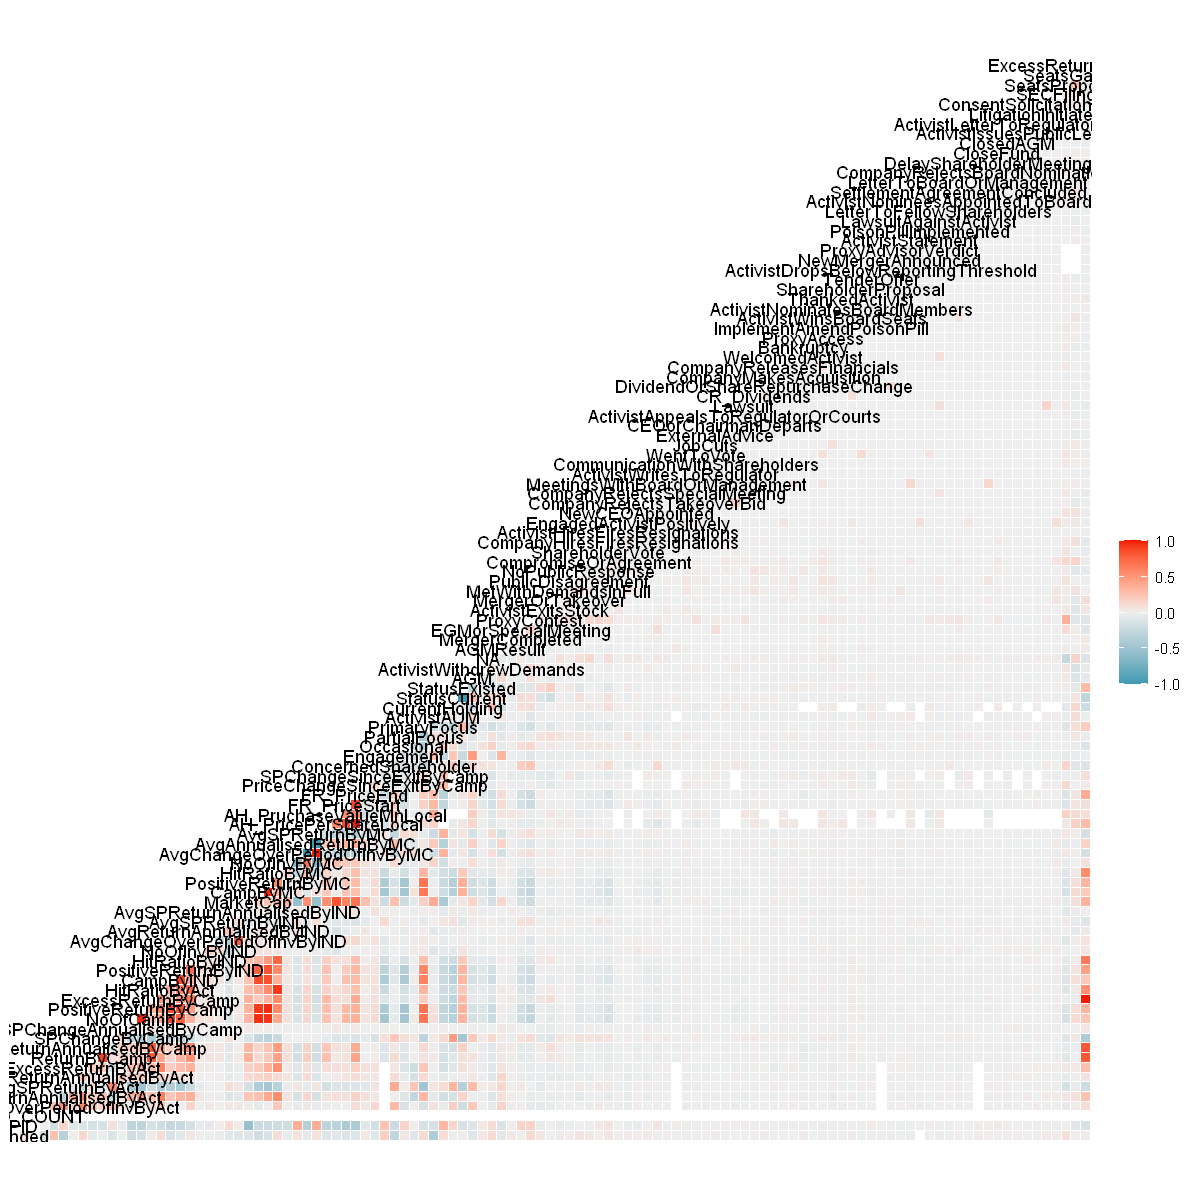

Warning message in ggcorr(df[, c(31:60, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'MarketCapCategory', 'Currency', 'ActivistAUMDate', 'ThirteenD', 'Date.First.Invested' are not numeric and were ignored"


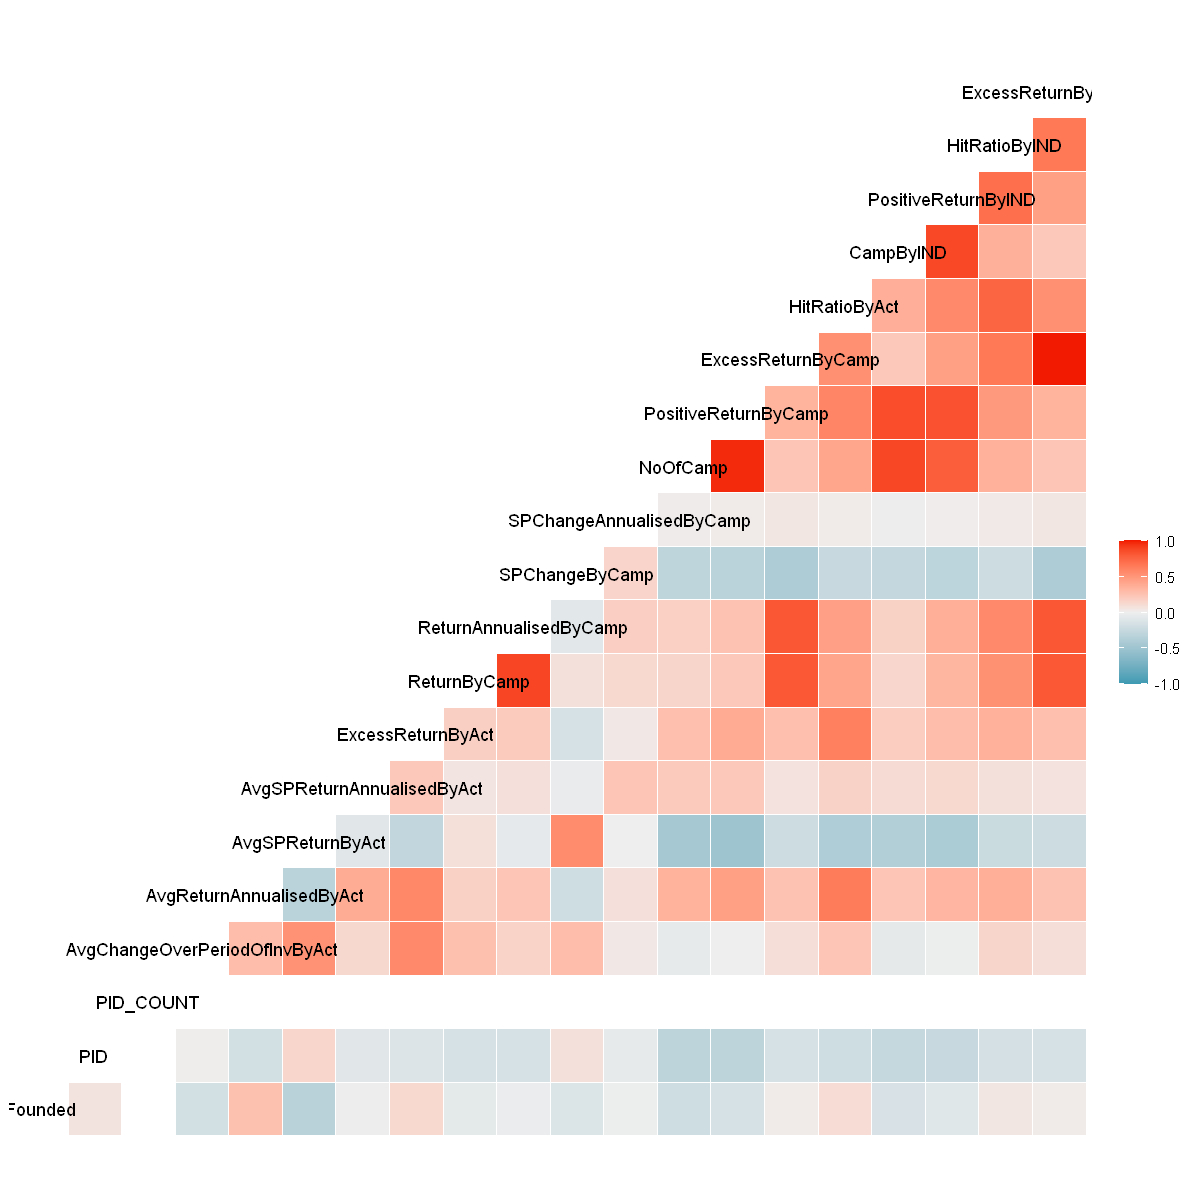

Warning message in ggcorr(df[, c(61:90, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'LongShort', 'DateExited', 'ExitType', 'GainBoardRepresentation', 'AdoptMajorityVoteStandard', 'AmendByLaw', 'AmendListingStatus', 'BoardIndependence', 'BusinessFocus', 'BusinessRestructuring', 'ChangeBoardComposition', 'ClosureOfBusinessUnit', 'Dividends', 'EliminateStaggeredBoard', 'EquityIssuance', 'ExcessCash', 'FocusOnGrowthStrategies', 'GeneralCostCutting', 'LackOfInaccurateInformationFromCompany', 'OperationalEfficiency', 'OpposeAcquisitionOfThirdParty', 'OpposeEquityIssuance', 'OpposeProxyContest', 'OpposeSaleOfCompany', 'PushForAcquisitionOfThirdParty', 'PushForCompanyDivision', 'PushForSaleOfCompany' are not numeric and were ignored"


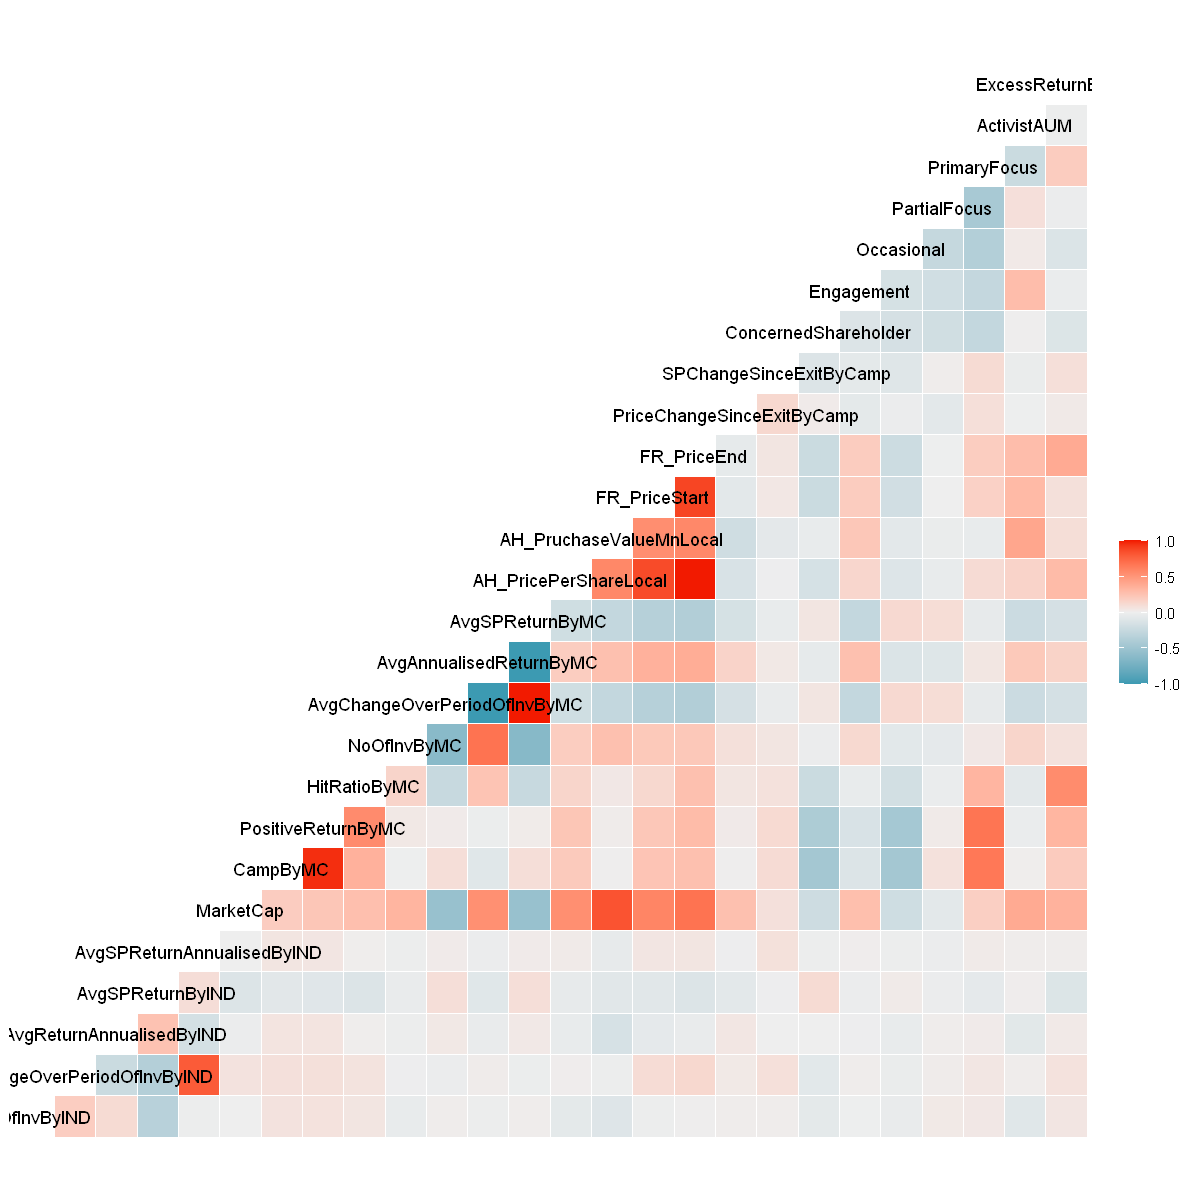

Warning message in ggcorr(df[, c(91:120, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'PushForOpposeMergingOfShares', 'Recapitalization', 'RedemptionAmendmentOfPoisonPill', 'REITorMLPConversion', 'RemovalOfCEOorOtherBoardMember', 'Remuneration', 'ReplaceAuditor', 'ReplaceManagement', 'RestructureDebt', 'ReturnCashToShareholders', 'SellOrRetainAssets', 'SeparateChairmanAndCEO', 'ShareRepurchase', 'SpinOffSaleOfBusinessDivision', 'SuccessionPlanning', 'TerminateInvestmentAdvisoryAgreement', 'UnderLeverage', 'UseUniversalBallot' are not numeric and were ignored"


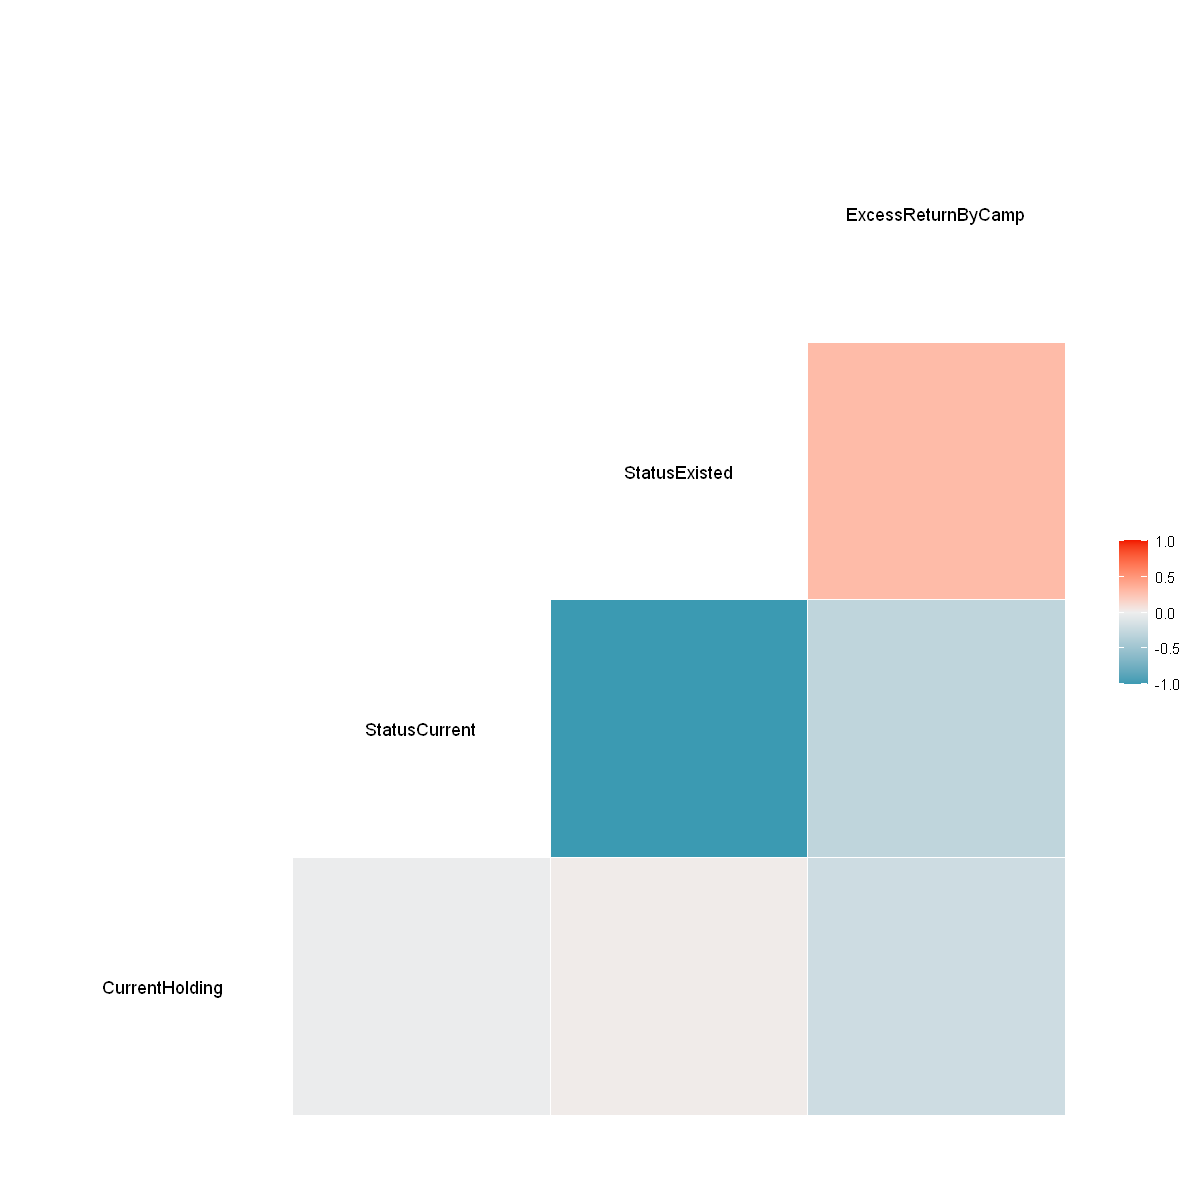

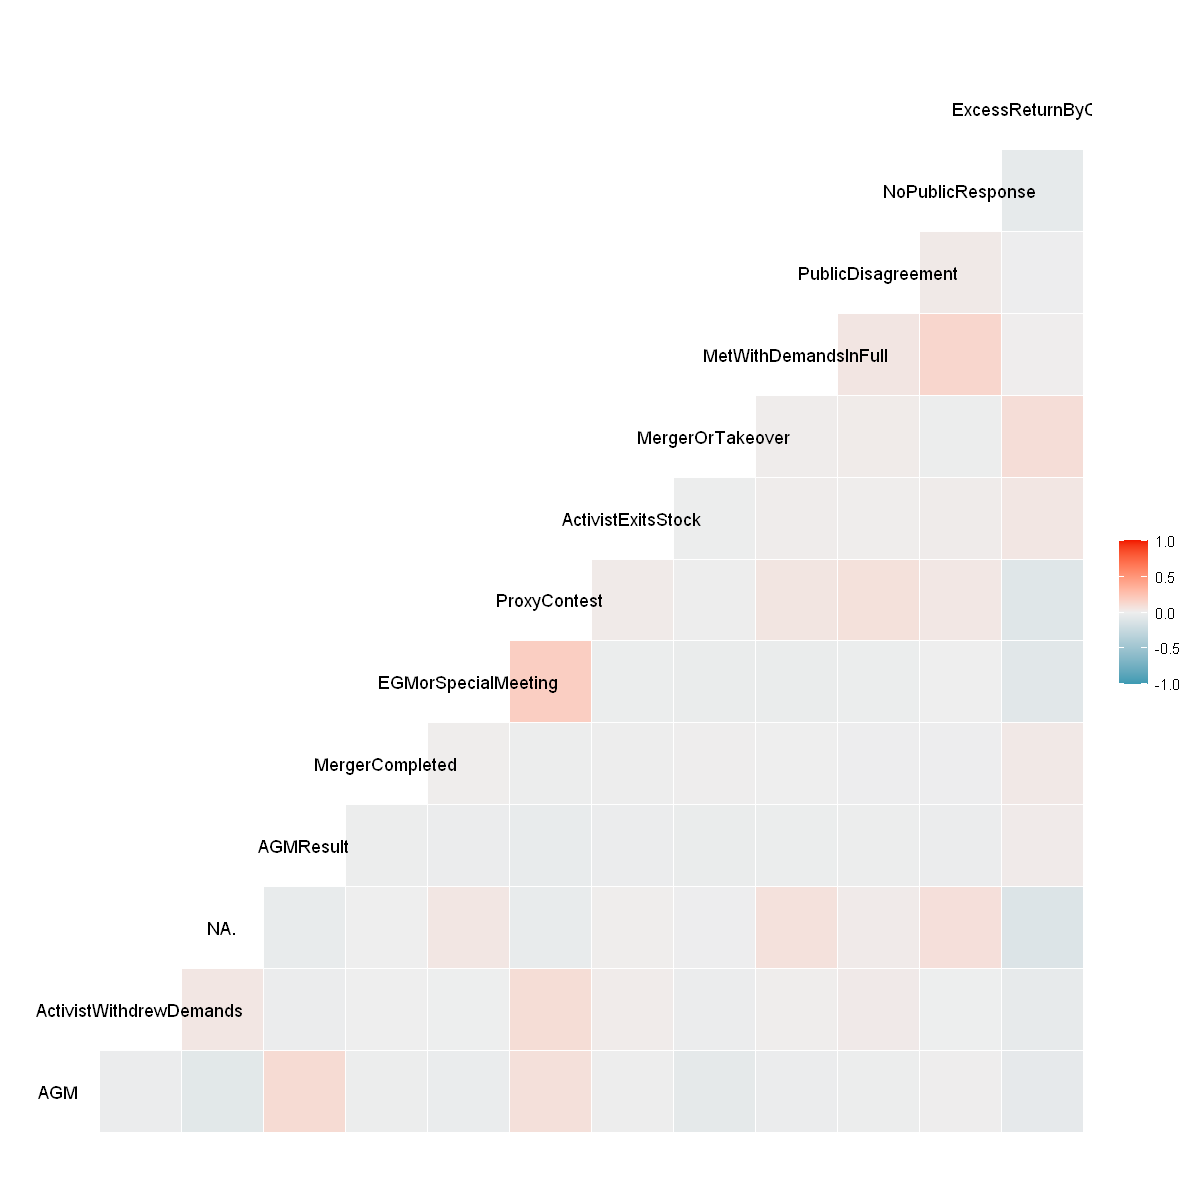

Warning message in ggcorr(df[, c(151:180, 24)], method = c("pairwise", "spearman"), :
"data in column(s) 'SeatsGainedMethod', 'Ongoing', 'WithdrewDemands', 'PartiallySuccessful', 'Successful', 'Unsuccessful', 'CompromiseOrSettlement', 'Unresolved', 'Buyer' are not numeric and were ignored"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"
Warning m

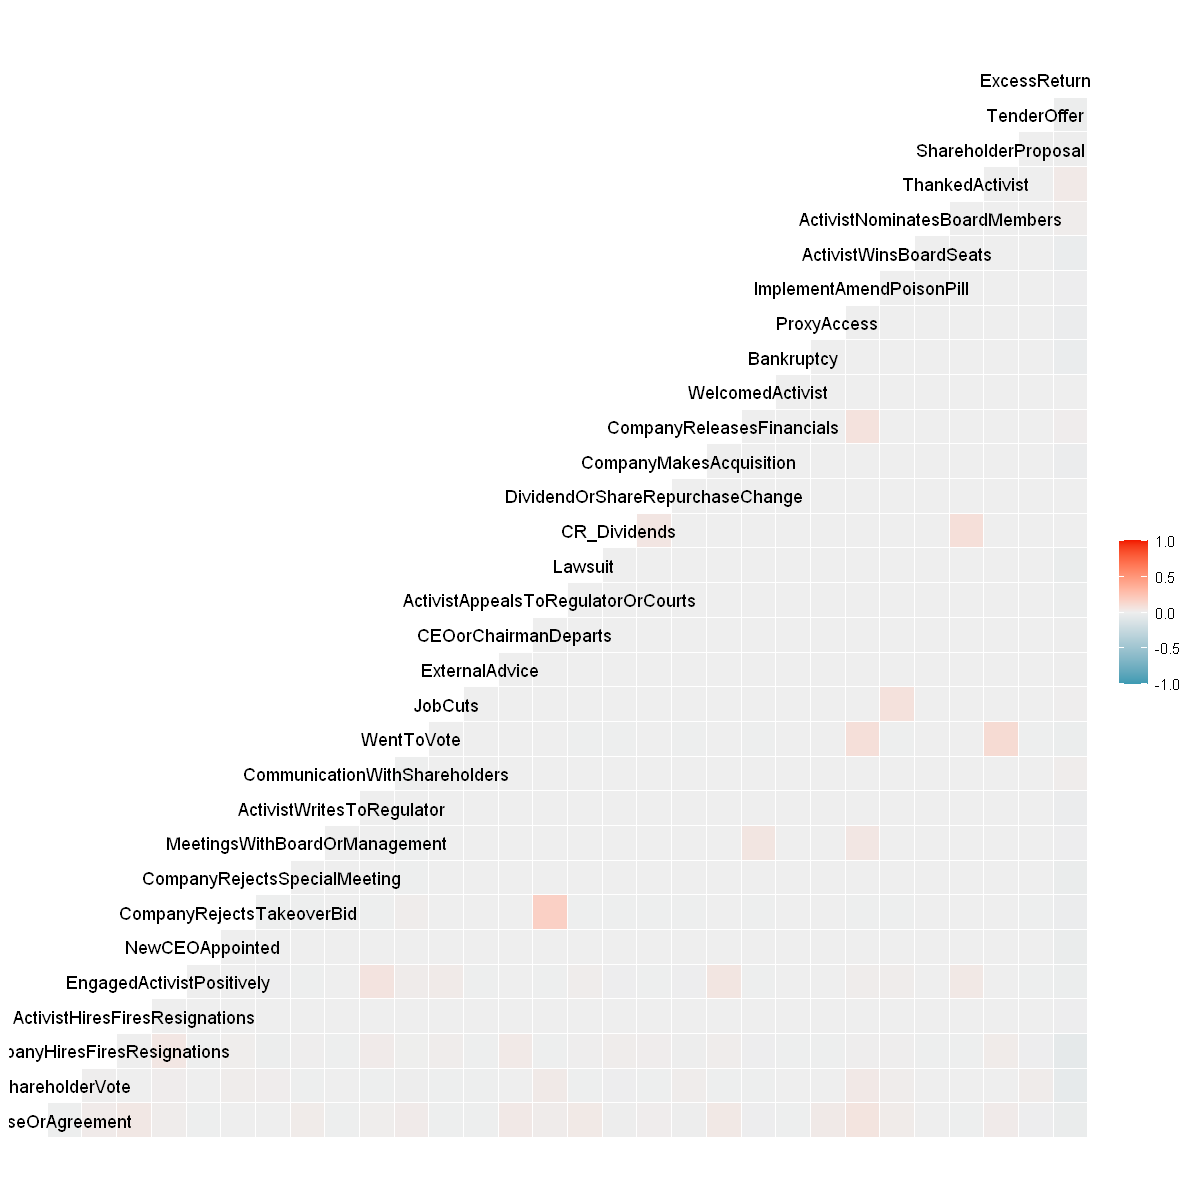

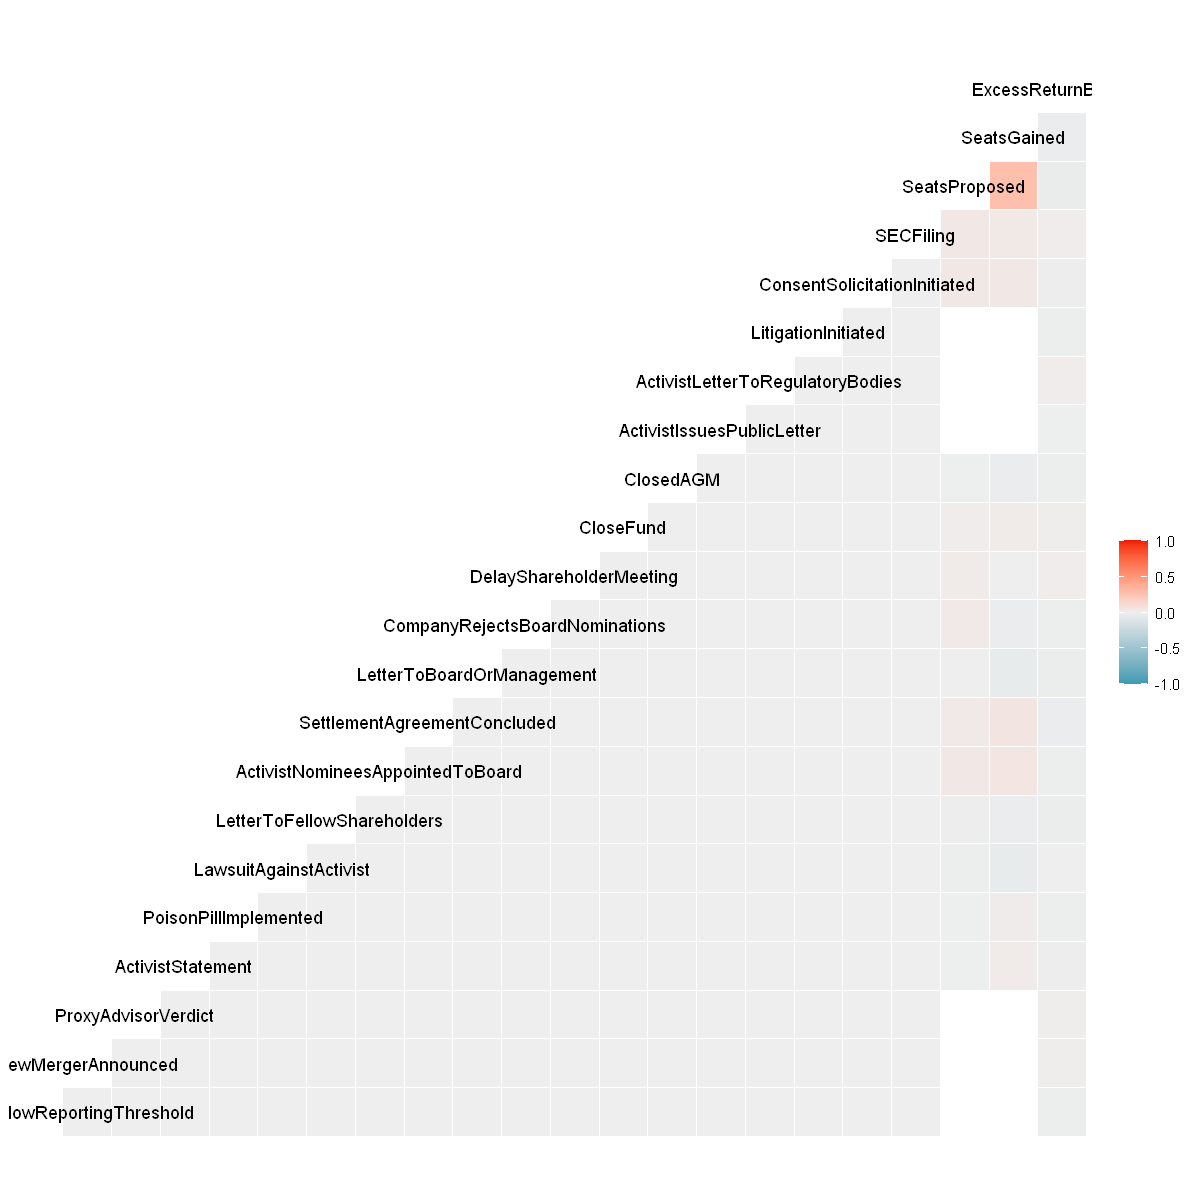

In [92]:
library(GGally)
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorr(df[,c(1:180,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(1:30,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(31:60,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(61:90,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(91:120,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(121:150,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)

ggcorr(df[,c(151:180,24)], method = c("pairwise", "spearman"),
  nbreaks = NULL, digits = 2, low = "#3B9AB2",
  mid = "#EEEEEE", high = "#F21A00",
  geom = "tile", label = FALSE,
  label_alpha = FALSE)



## Outliers

In [142]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- setdiff(names(data),c("Investor.ID","PID"))
    outdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            med <- median (data[[v]],na.rm=TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[[paste(v,'out',sep='_')]] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

df_outliers <- outlierMatrix(df)

In [143]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

Investor.ID Founded_out PID_COUNT_out AvgChangeOverPeriodOfInvByAct_out
1 2           0           0             0                                
2 2           0           0             0                                
3 2           0           0             0                                
4 2           0           0             0                                
5 14          1           0             0                                
6 14          1           0             0                                
  AvgReturnAnnualisedByAct_out AvgSPReturnByAct_out
1 0                            0                   
2 0                            0                   
3 0                            0                   
4 0                            0                   
5 0                            0                   
6 0                            0                   
  AvgSPReturnAnnualisedByAct_out ExcessReturnByAct_out ReturnByCamp_out
1 0                              1                     0               
2 0                              1                     0               
3 0                              1                     0               
4 0                              1                     0               
5 0                              0                     0               
6 0                              0                     0               
  ReturnAnnualisedByCamp_out ... DelayShareholderMeeting_out CloseFund_out
1 0                          ... 0                           0            
2 0                          ... 0                           0            
3 0                          ... 0                           0            
4 0                          ... 0                           0            
5 0                          ... 0                           0            
6 0                          ... 0                           0            
  ClosedAGM_out ActivistIssuesPublicLetter_out
1 0             0                             
2 0             0                             
3 0             0                             
4 0             0                             
5 0             0                             
6 0             0                             
  ActivistLetterToRegulatoryBodies_out LitigationInitiated_out
1 0                                    0                      
2 0                                    0                      
3 0                                    0                      
4 0                                    0                      
5 0                                    0                      
6 0                                    0                      
  ConsentSolicitationInitiated_out SECFiling_out SeatsProposed_out
1 0                                0             NA               
2 0                                0             NA               
3 0                                0             NA               
4 0                                0             NA               
5 0                                0             NA               
6 0                                0             NA               
  SeatsGained_out
1 NA             
2 NA             
3 NA             
4 NA             
5 NA             
6 NA

In [144]:
for (i in 2:length(df_outliers)){
    no_outliers <- df[[i]]
    no_outliers <- ifelse(df_outliers[[i]]==1, NA, no_outliers)
}


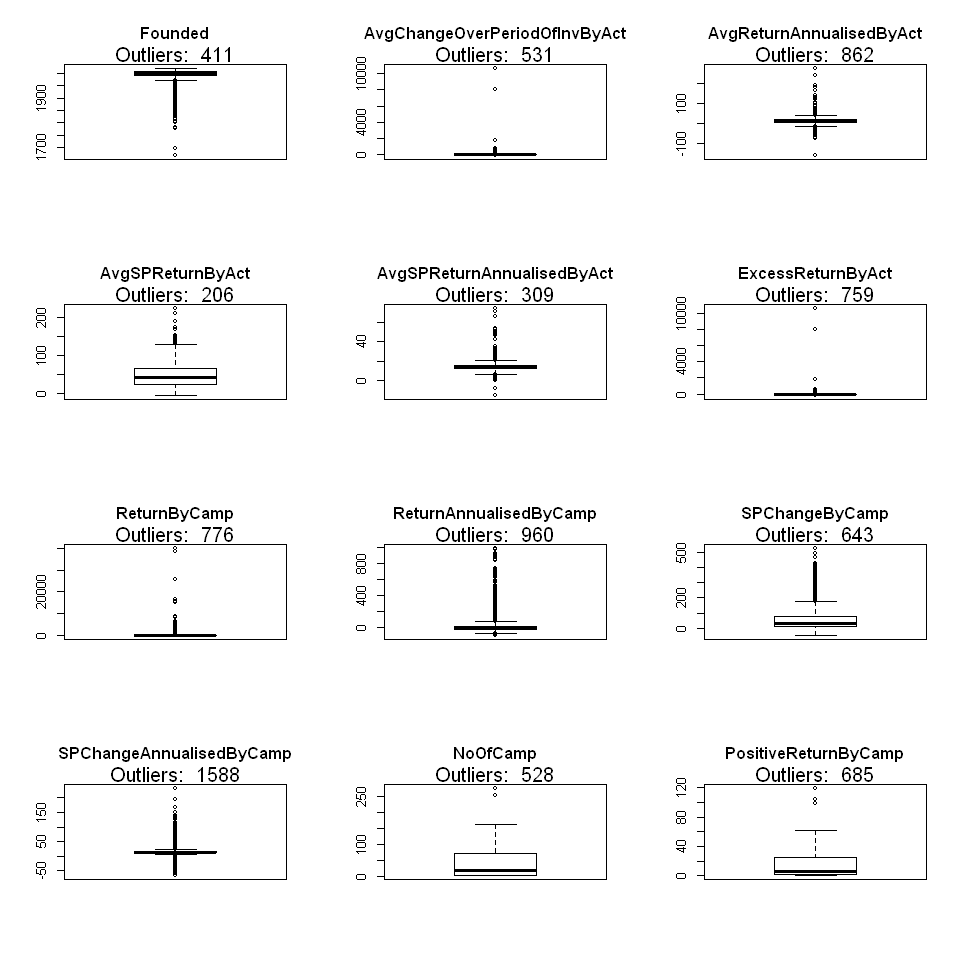

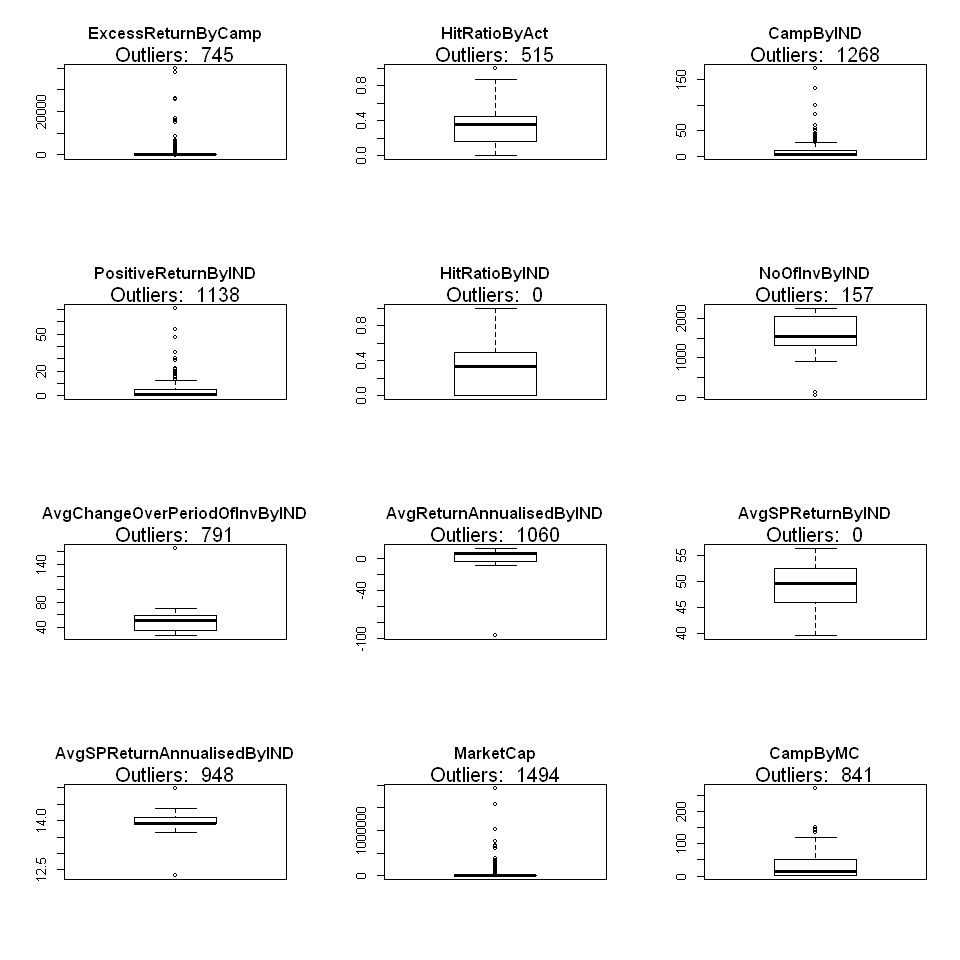

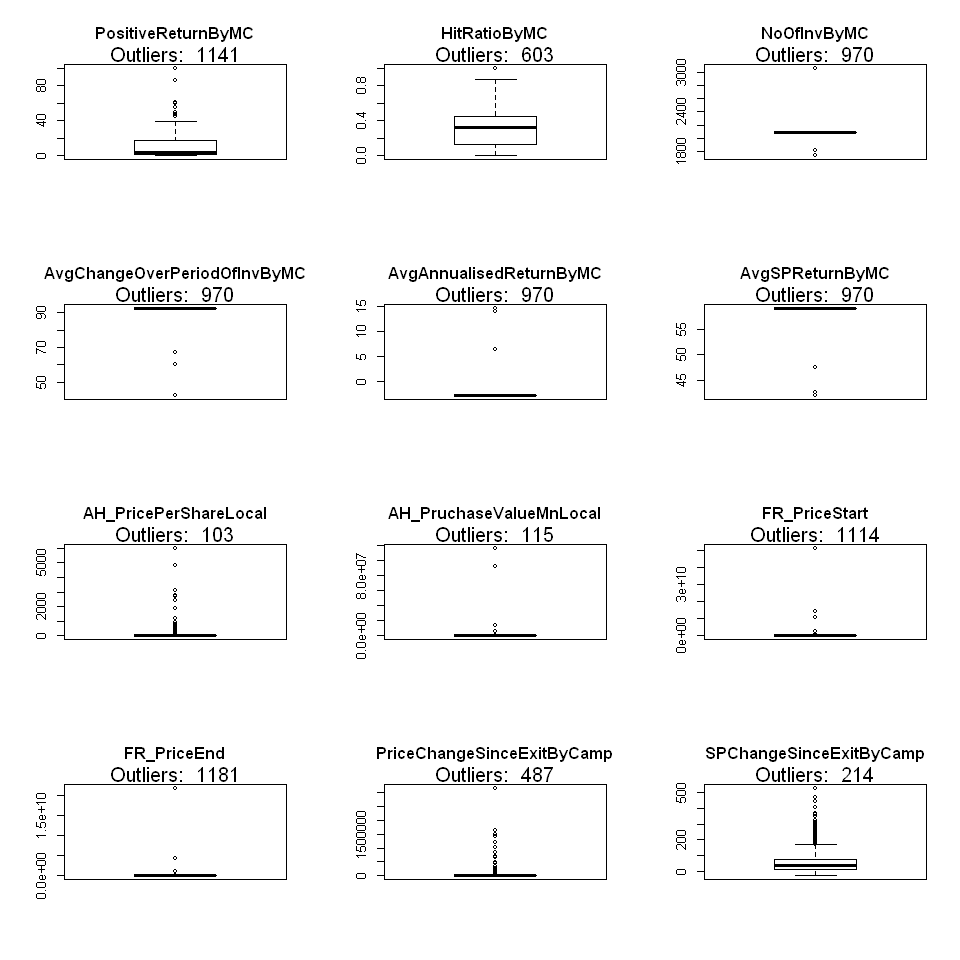

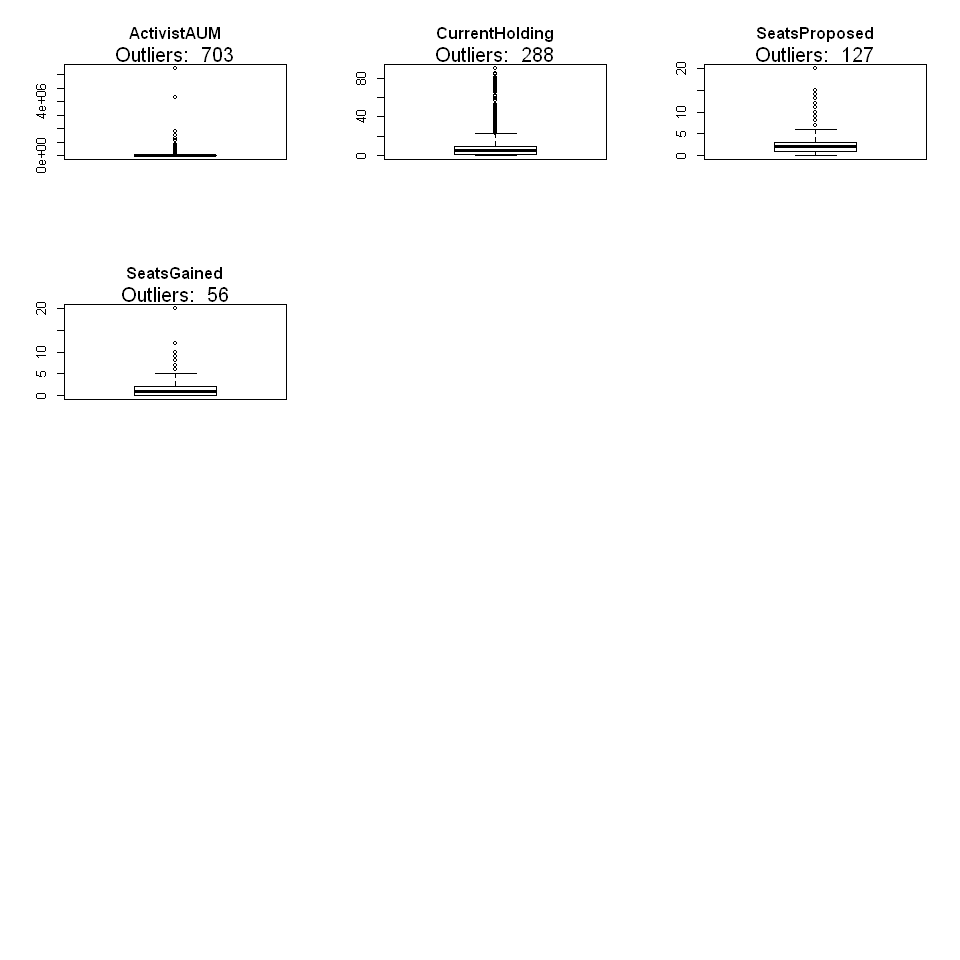

In [145]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(Activism_continuousV2)) {
    outlier_values <- boxplot.stats(Activism_continuousV2[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
 }
par(mfrow=c(1,1))

## Missingness

In [146]:
getMissingness(df)

list(var = c(47, 45, 180, 59, 171, 170, 62, 51, 50, 66), na_count = c(8385, 8220, 7866, 6845, 6669, 6624, 5863, 5758, 5030, 4531), rate = c(90.2, 88.4, 84.6, 73.6, 71.7, 71.2, 63, 61.9, 54.1, 48.7))This dataset has 0 (0%) complete rows. Original data has 9299 rows.



$missingness
                                    var na_count rate
1               AH_PruchaseValueMnLocal     8385 90.2
2                 AH_PricePerShareLocal     8220 88.4
3                                 Buyer     7866 84.6
4                             ThirteenD     6845 73.6
5                           SeatsGained     6669 71.7
6                         SeatsProposed     6624 71.2
7                        CurrentHolding     5863 63.0
8               SPChangeSinceExitByCamp     5758 61.9
9            PriceChangeSinceExitByCamp     5030 54.1
10                             ExitType     4531 48.7
11                           DateExited     4529 48.7
12                    SeatsGainedMethod     3994 43.0
13                             Currency     2850 30.6
14                          ActivistAUM     2850 30.6
15                      ActivistAUMDate     2850 30.6
16        AvgChangeOverPeriodOfInvByAct     2482 26.7
17             AvgReturnAnnualisedByAct     2482 26.7
18                     AvgSPReturnByAct     2482 26.7
19           AvgSPReturnAnnualisedByAct     2482 26.7
20                    ExcessReturnByAct     2482 26.7
21                              Founded     1552 16.7
22                       SPChangeByCamp      253  2.7
23             SPChangeAnnualisedByCamp      253  2.7
24                   ExcessReturnByCamp      253  2.7
25                            MarketCap      102  1.1
26                             Industry       13  0.1
27                           ActivistHQ        8  0.1
28                              LastInv        8  0.1
29         FirstDateInvestedByActivisit        7  0.1
30                               Sector        7  0.1
31                  Date.First.Invested        7  0.1
32                                  AGM        7  0.1
33              ActivistWithdrewDemands        7  0.1
34                                  NA.        7  0.1
35                            AGMResult        7  0.1
36                      MergerCompleted        7  0.1
37                  EGMorSpecialMeeting        7  0.1
38                         ProxyContest        7  0.1
39                   ActivistExitsStock        7  0.1
40                     MergerOrTakeover        7  0.1
41                 MetWithDemandsInFull        7  0.1
42                   PublicDisagreement        7  0.1
43                     NoPublicResponse        7  0.1
44                CompromiseOrAgreement        7  0.1
45                      ShareholderVote        7  0.1
46        CompanyHiresFiresResignations        7  0.1
47       ActivistHiresFiresResignations        7  0.1
48            EngagedActivistPositively        7  0.1
49                      NewCEOAppointed        7  0.1
50            CompanyRejectsTakeoverBid        7  0.1
51         CompanyRejectsSpecialMeeting        7  0.1
52        MeetingsWithBoardOrManagement        7  0.1
53            ActivistWritesToRegulator        7  0.1
54        CommunicationWithShareholders        7  0.1
55                           WentToVote        7  0.1
56                              JobCuts        7  0.1
57                       ExternalAdvice        7  0.1
58                 CEOorChairmanDeparts        7  0.1
59   ActivistAppealsToRegulatorOrCourts        7  0.1
60                              Lawsuit        7  0.1
61                         CR_Dividends        7  0.1
62      DividendOrShareRepurchaseChange        7  0.1
63              CompanyMakesAcquisition        7  0.1
64            CompanyReleasesFinancials        7  0.1
65                     WelcomedActivist        7  0.1
66                           Bankruptcy        7  0.1
67                          ProxyAccess        7  0.1
68             ImplementAmendPoisonPill        7  0.1
69               ActivistWinsBoardSeats        7  0.1
70        ActivistNominatesBoardMembers        7  0.1
71                      ThankedActivist        7  0.1
72                  ShareholderProposal        7  0.1
73                          TenderOffer      

In [95]:
missingMatrix <- function(data) {
    vn <- setdiff(names(data),"Investor.ID")
    missdata <- data.frame(Investor.ID=data$Investor.ID)
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}
df_missing <- missingMatrix(data=df)
head(df_missing)

Investor.ID Activist ActivistHQ ActivistRegion Founded
1 2           0        0          0              0      
2 2           0        0          0              0      
3 2           0        0          0              0      
4 2           0        0          0              0      
5 14          0        0          0              0      
6 14          0        0          0              0      
  FirstDateInvestedByActivisit Company PID PID_COUNT CompanyHQ ... SeatsGained
1 0                            0       0   0         0         ... 1          
2 0                            0       0   0         0         ... 1          
3 0                            0       0   0         0         ... 1          
4 0                            0       0   0         0         ... 1          
5 0                            0       0   0         0         ... 1          
6 0                            0       0   0         0         ... 1          
  SeatsGainedMethod Ongoing WithdrewDemands PartiallySuccessful Successful
1 0                 0       0               0                   0         
2 0                 0       0               0                   0         
3 0                 0       0               0                   0         
4 1                 0       0               0                   0         
5 0                 0       0               0                   0         
6 0                 0       0               0                   0         
  Unsuccessful CompromiseOrSettlement Unresolved Buyer
1 0            0                      0          1    
2 0            0                      0          1    
3 0            0                      0          0    
4 0            0                      0          1    
5 0            0                      0          1    
6 0            0                      0          1

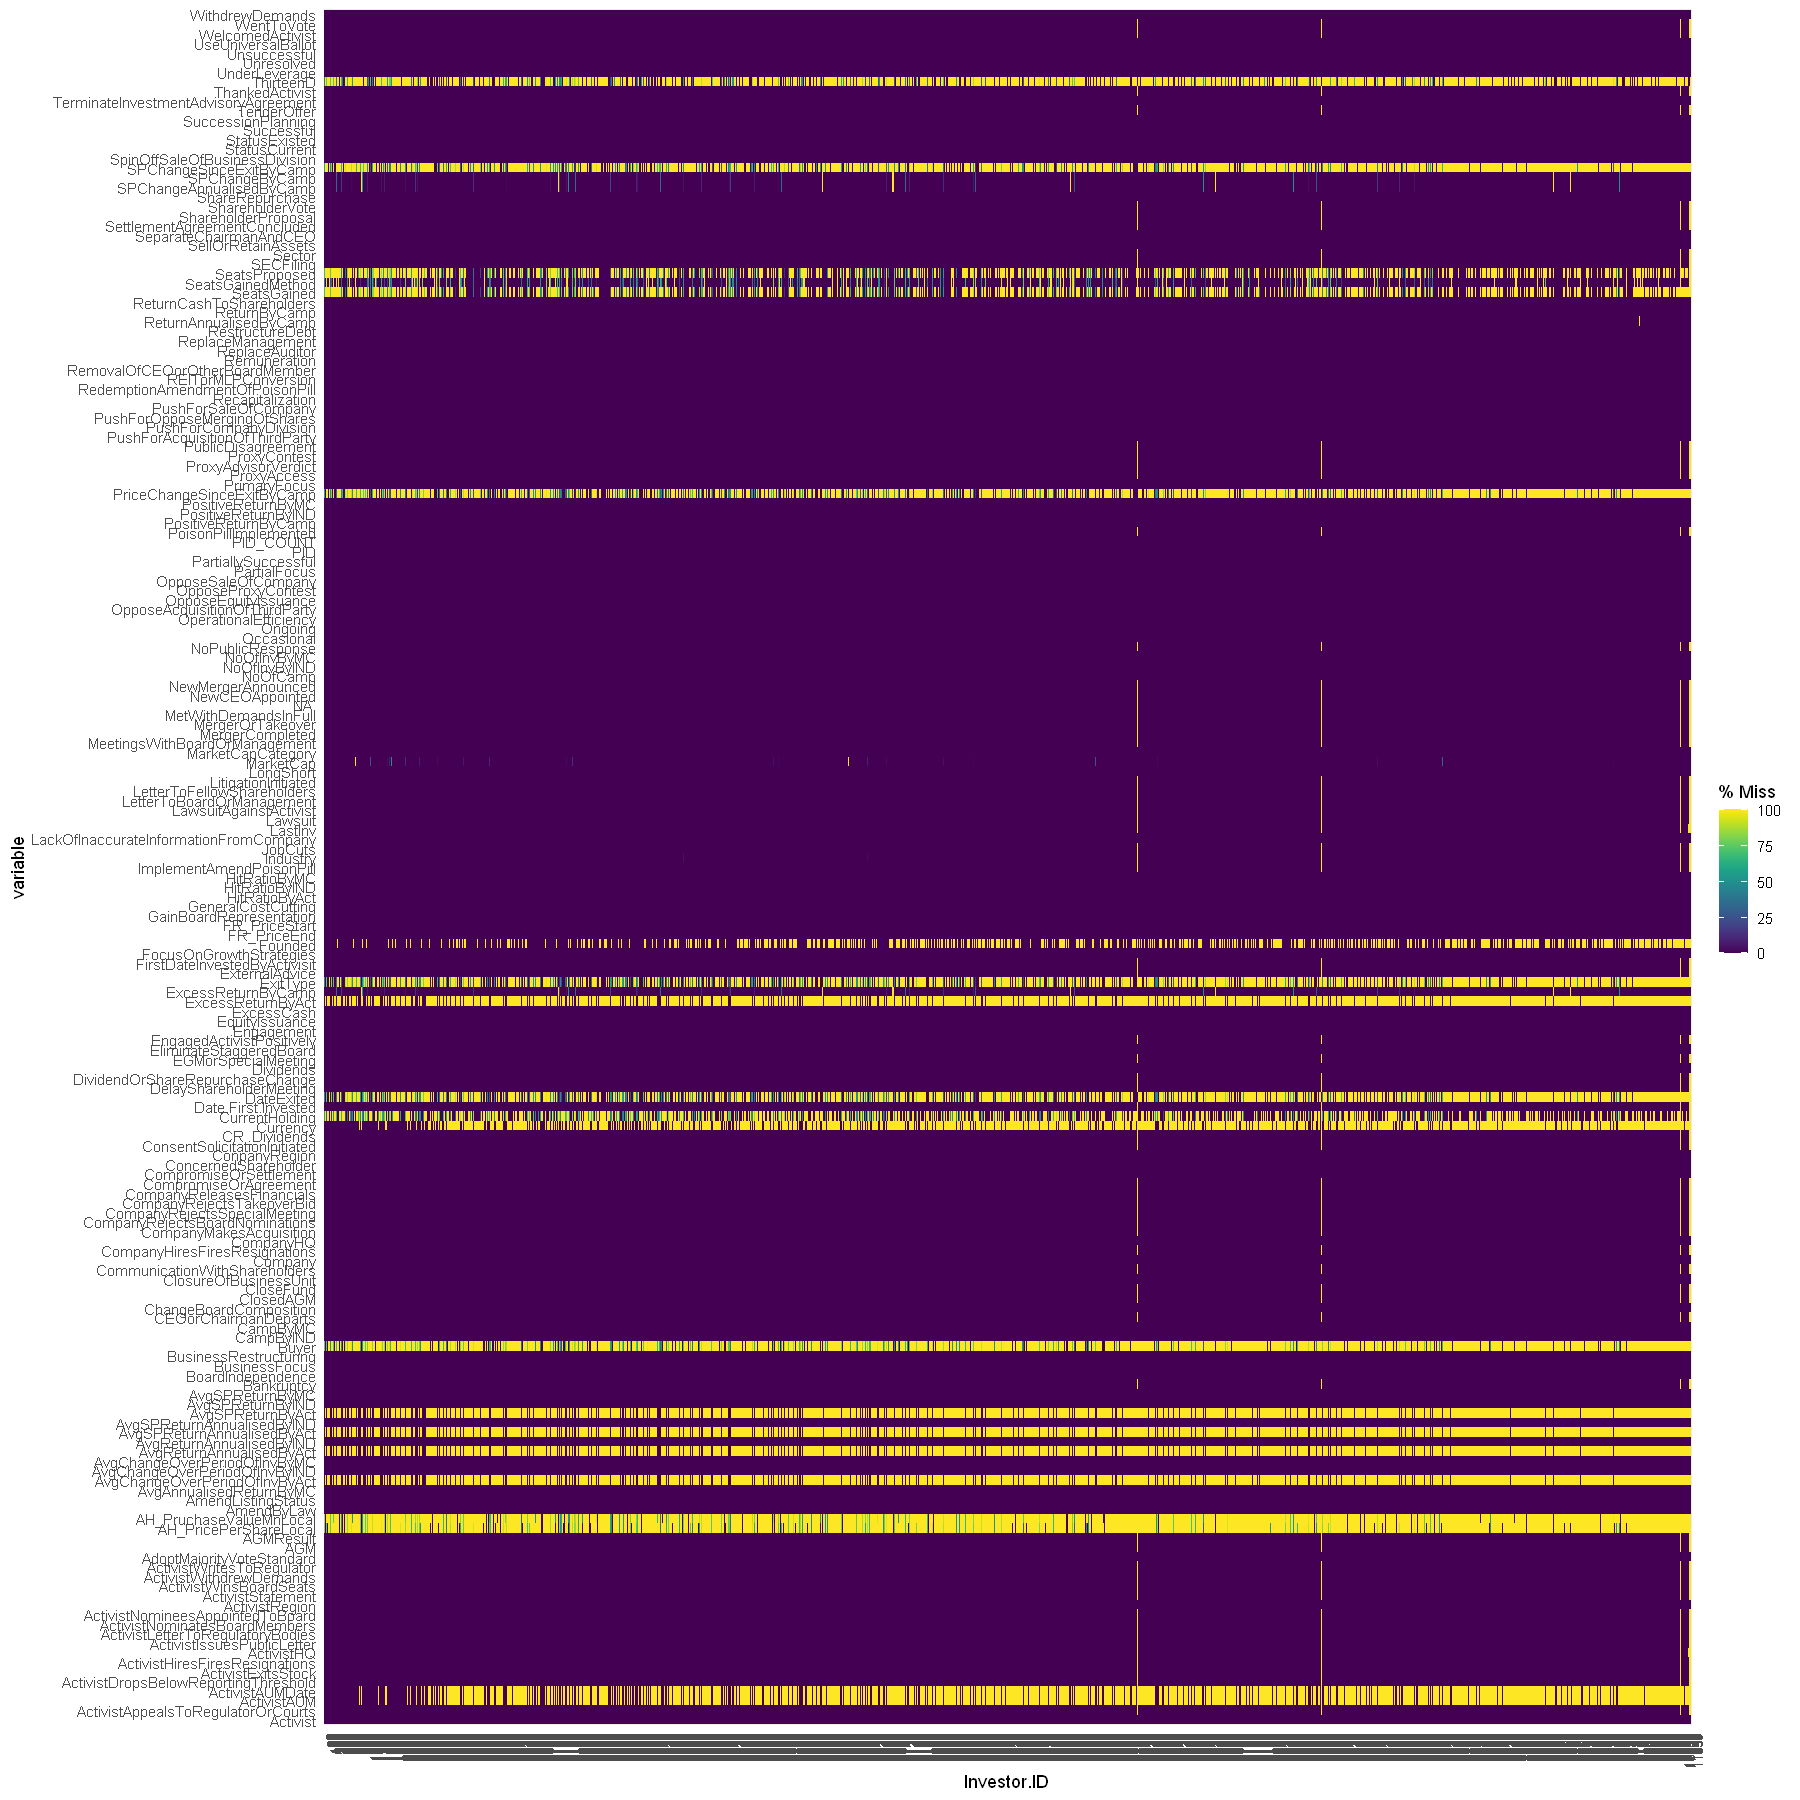

In [96]:
if(!require(naniar)) {install.packages("naniar");require(naniar)}
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 15)

gg_miss_fct(x=df, fct=Investor.ID) + 
theme(axis.text.x = element_text(angle=90, size=8))

# Data Cleansing

## Outliers

### For the variables where outliers were found, checking the distribution with(blue) / without outliers(red)

Joining, by = c("Founded", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 1552 rows containing non-finite values (stat_density)."
Joining, by = c("AvgChangeOverPeriodOfInvByAct", "outliers")

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2482 rows containing non-finite values (stat_density)."
Joining, by = c("AvgReturnAnnualisedByAct", "outliers")



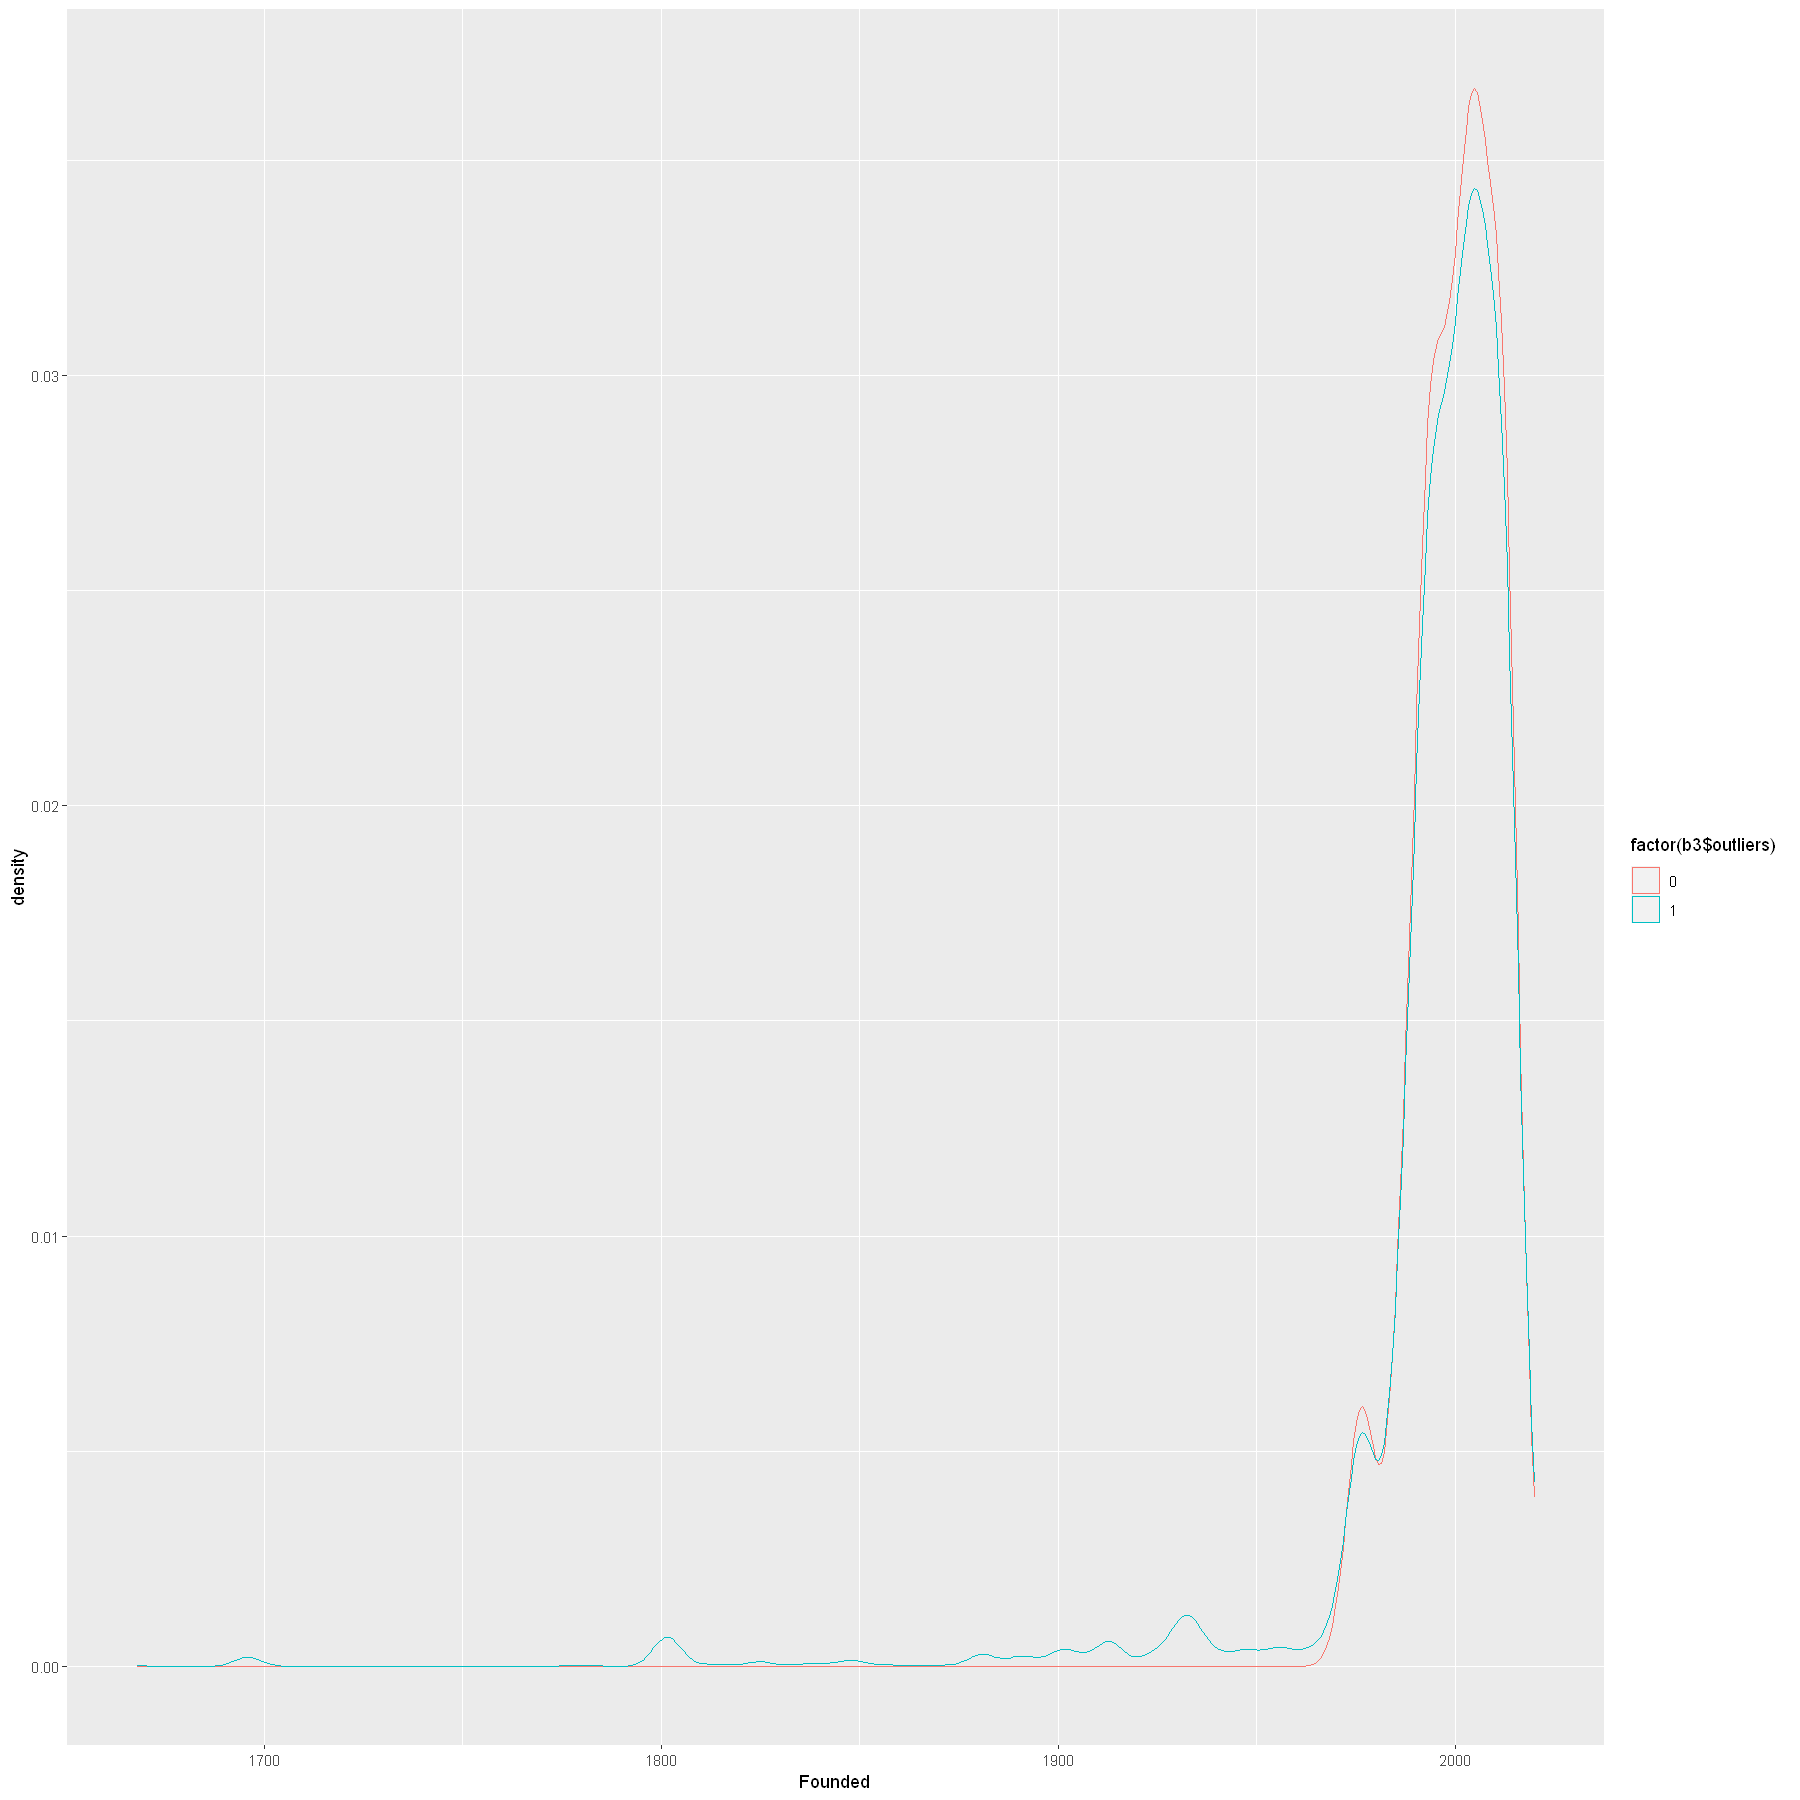

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2482 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnByAct", "outliers")



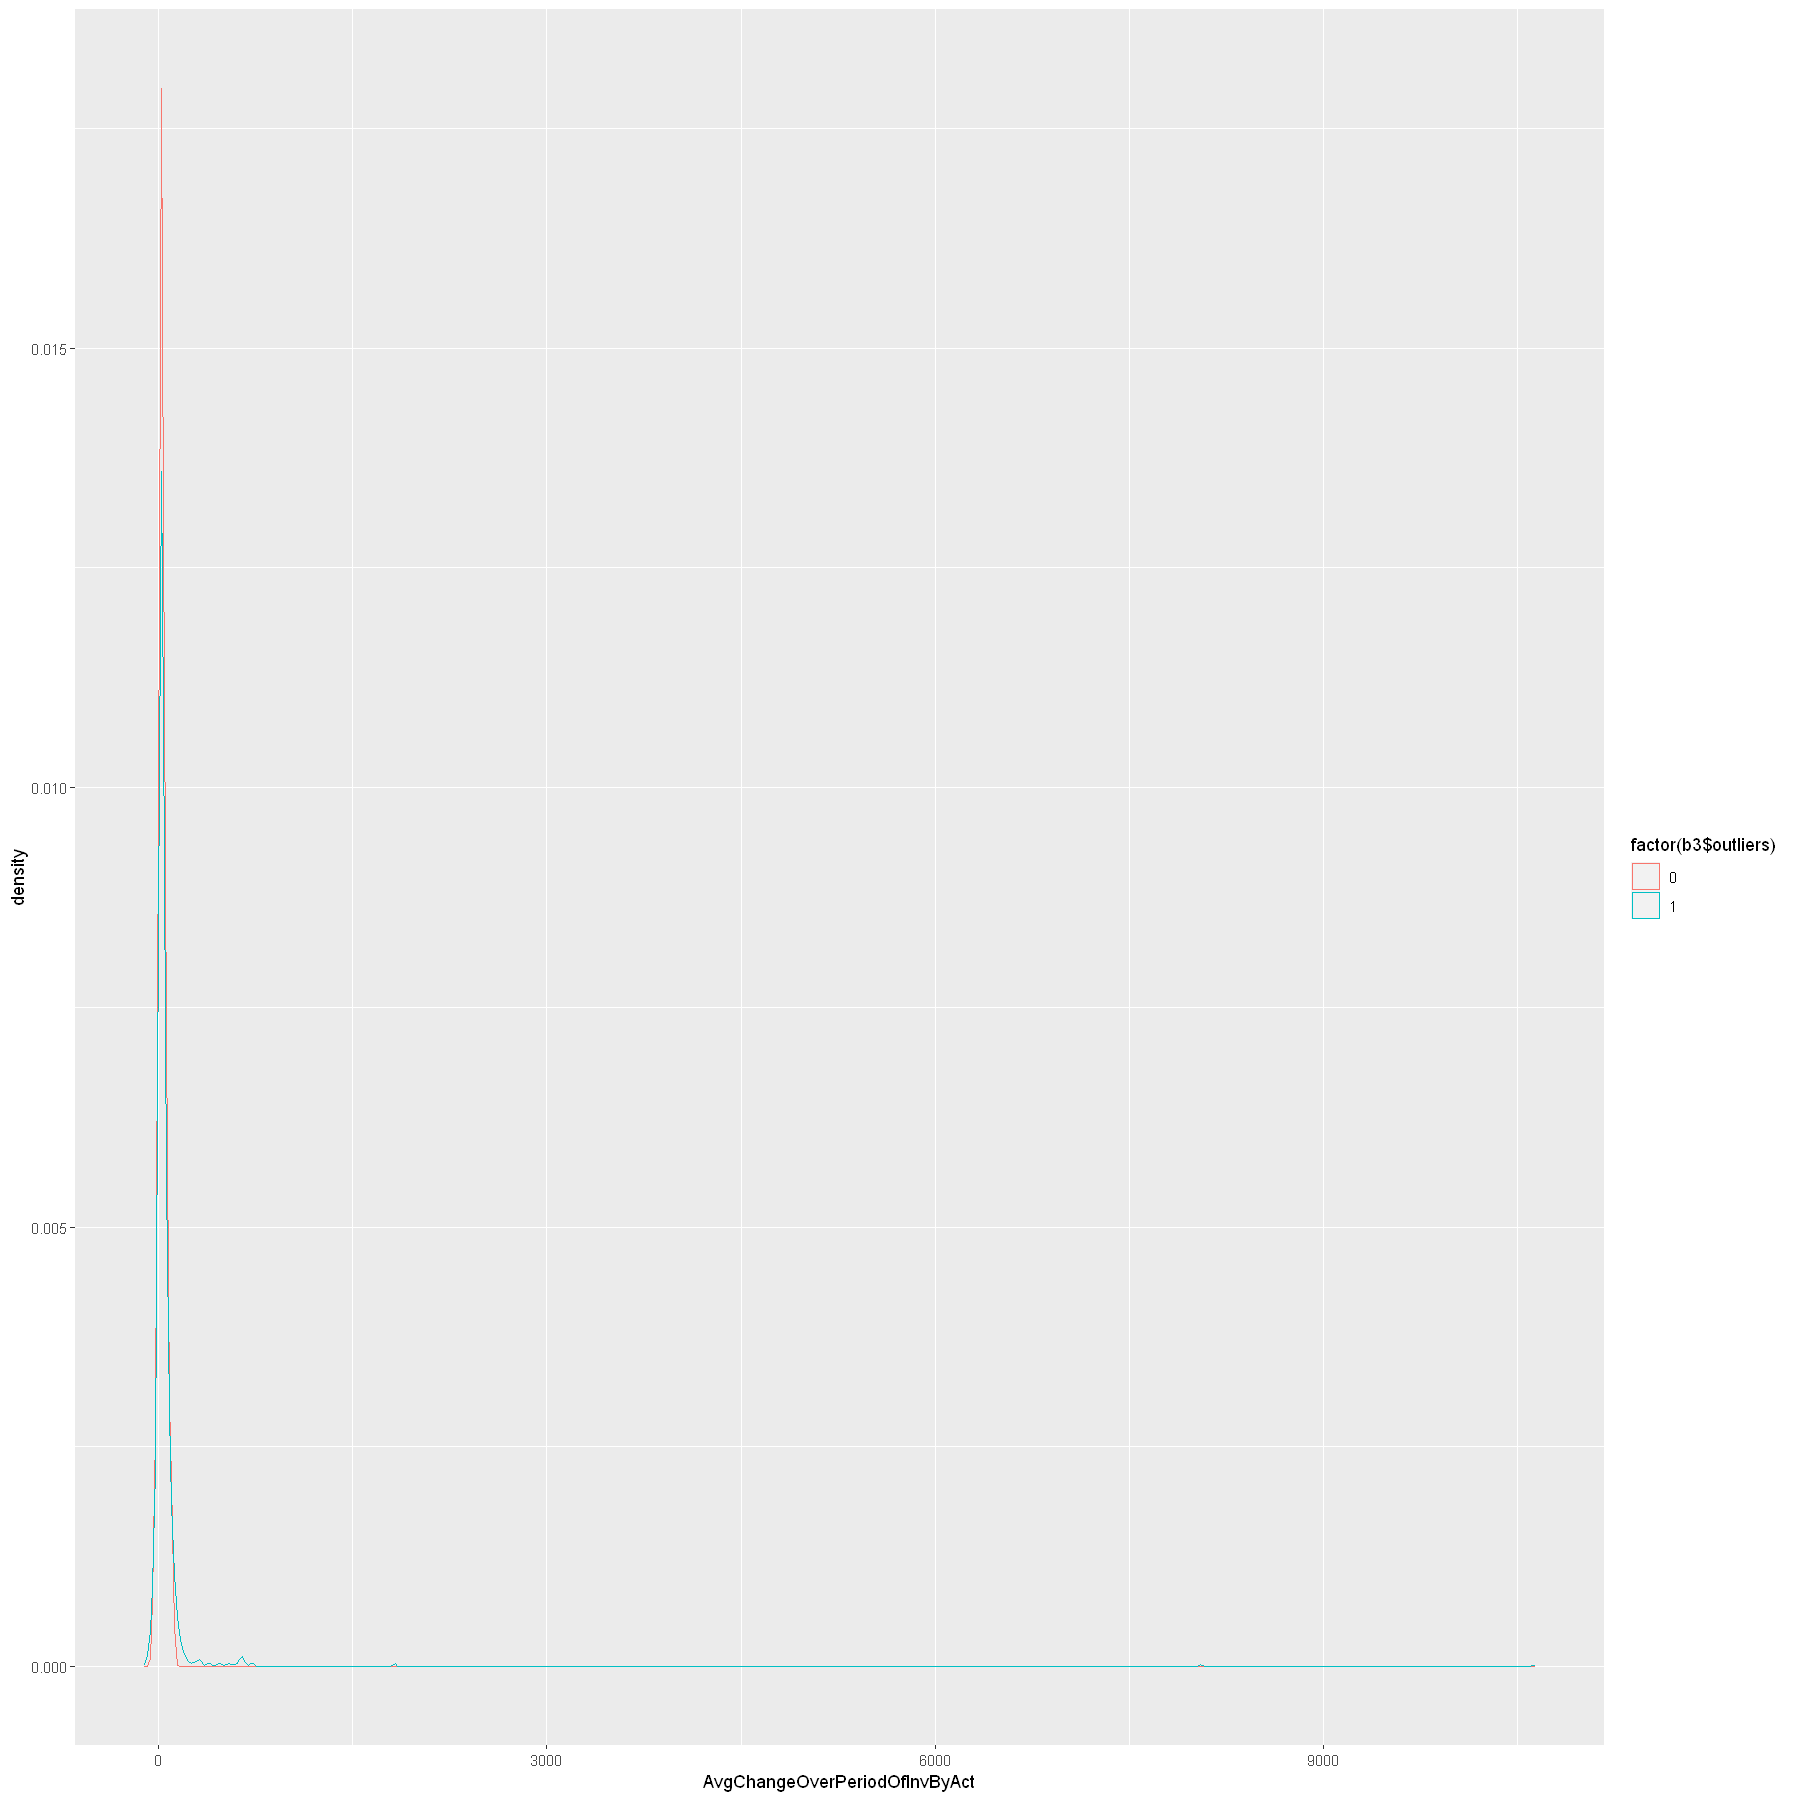

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2482 rows containing non-finite values (stat_density)."
Joining, by = c("AvgSPReturnAnnualisedByAct", "outliers")



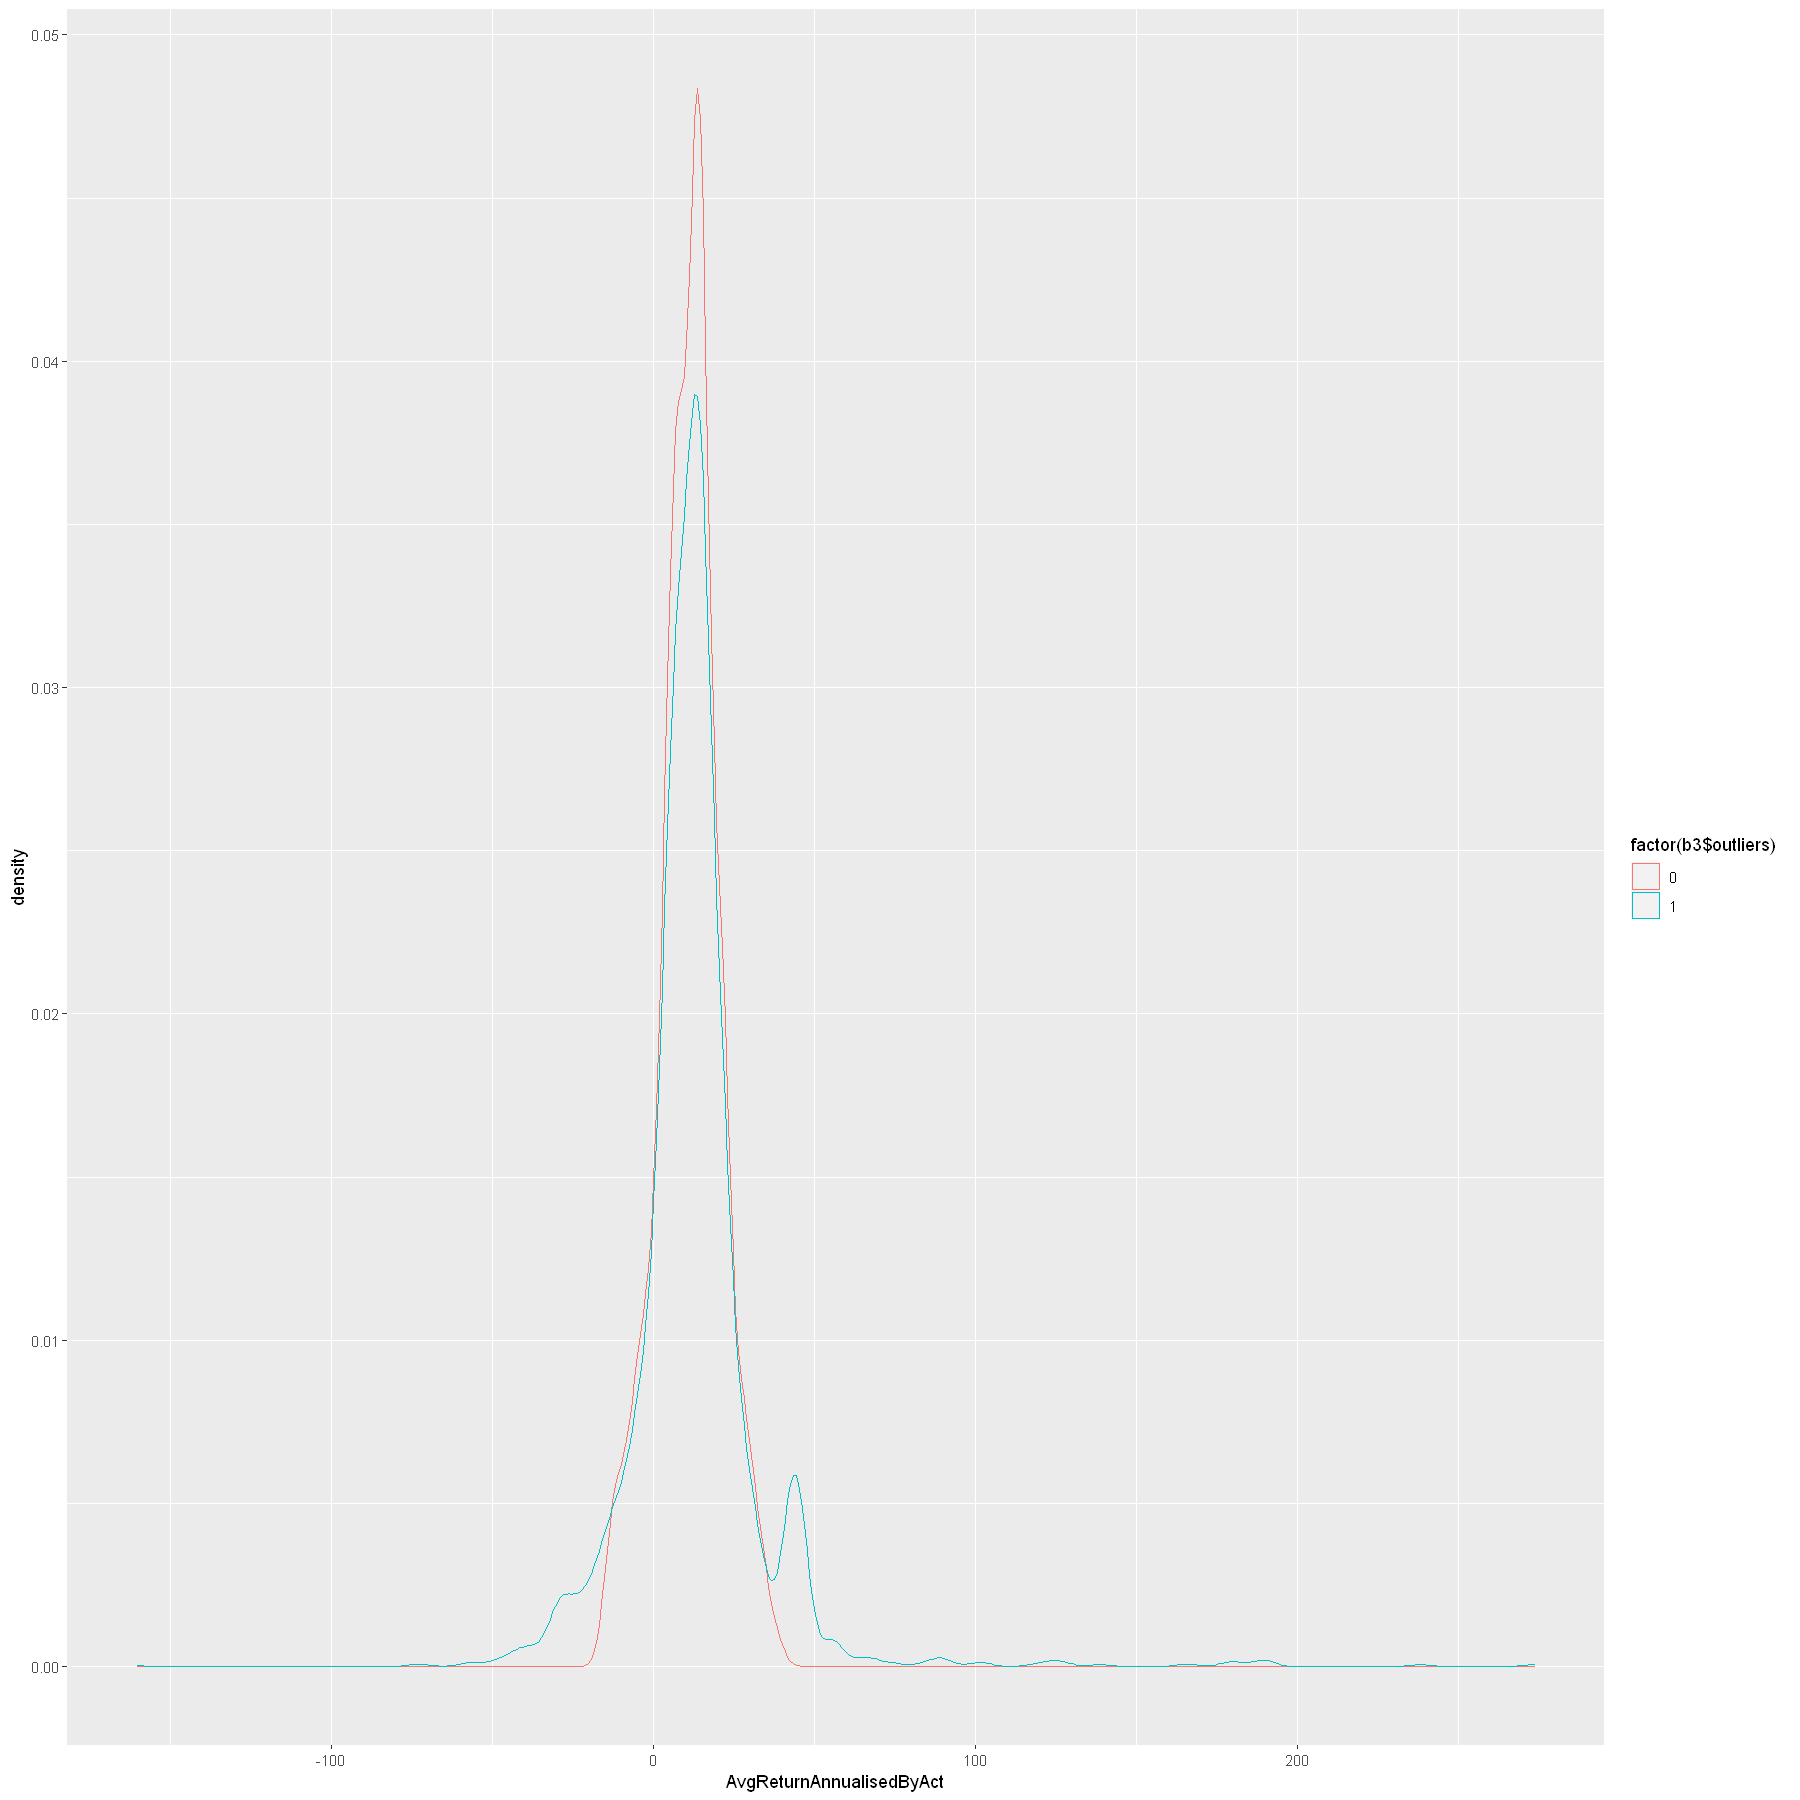

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2482 rows containing non-finite values (stat_density)."
Joining, by = c("ExcessReturnByAct", "outliers")



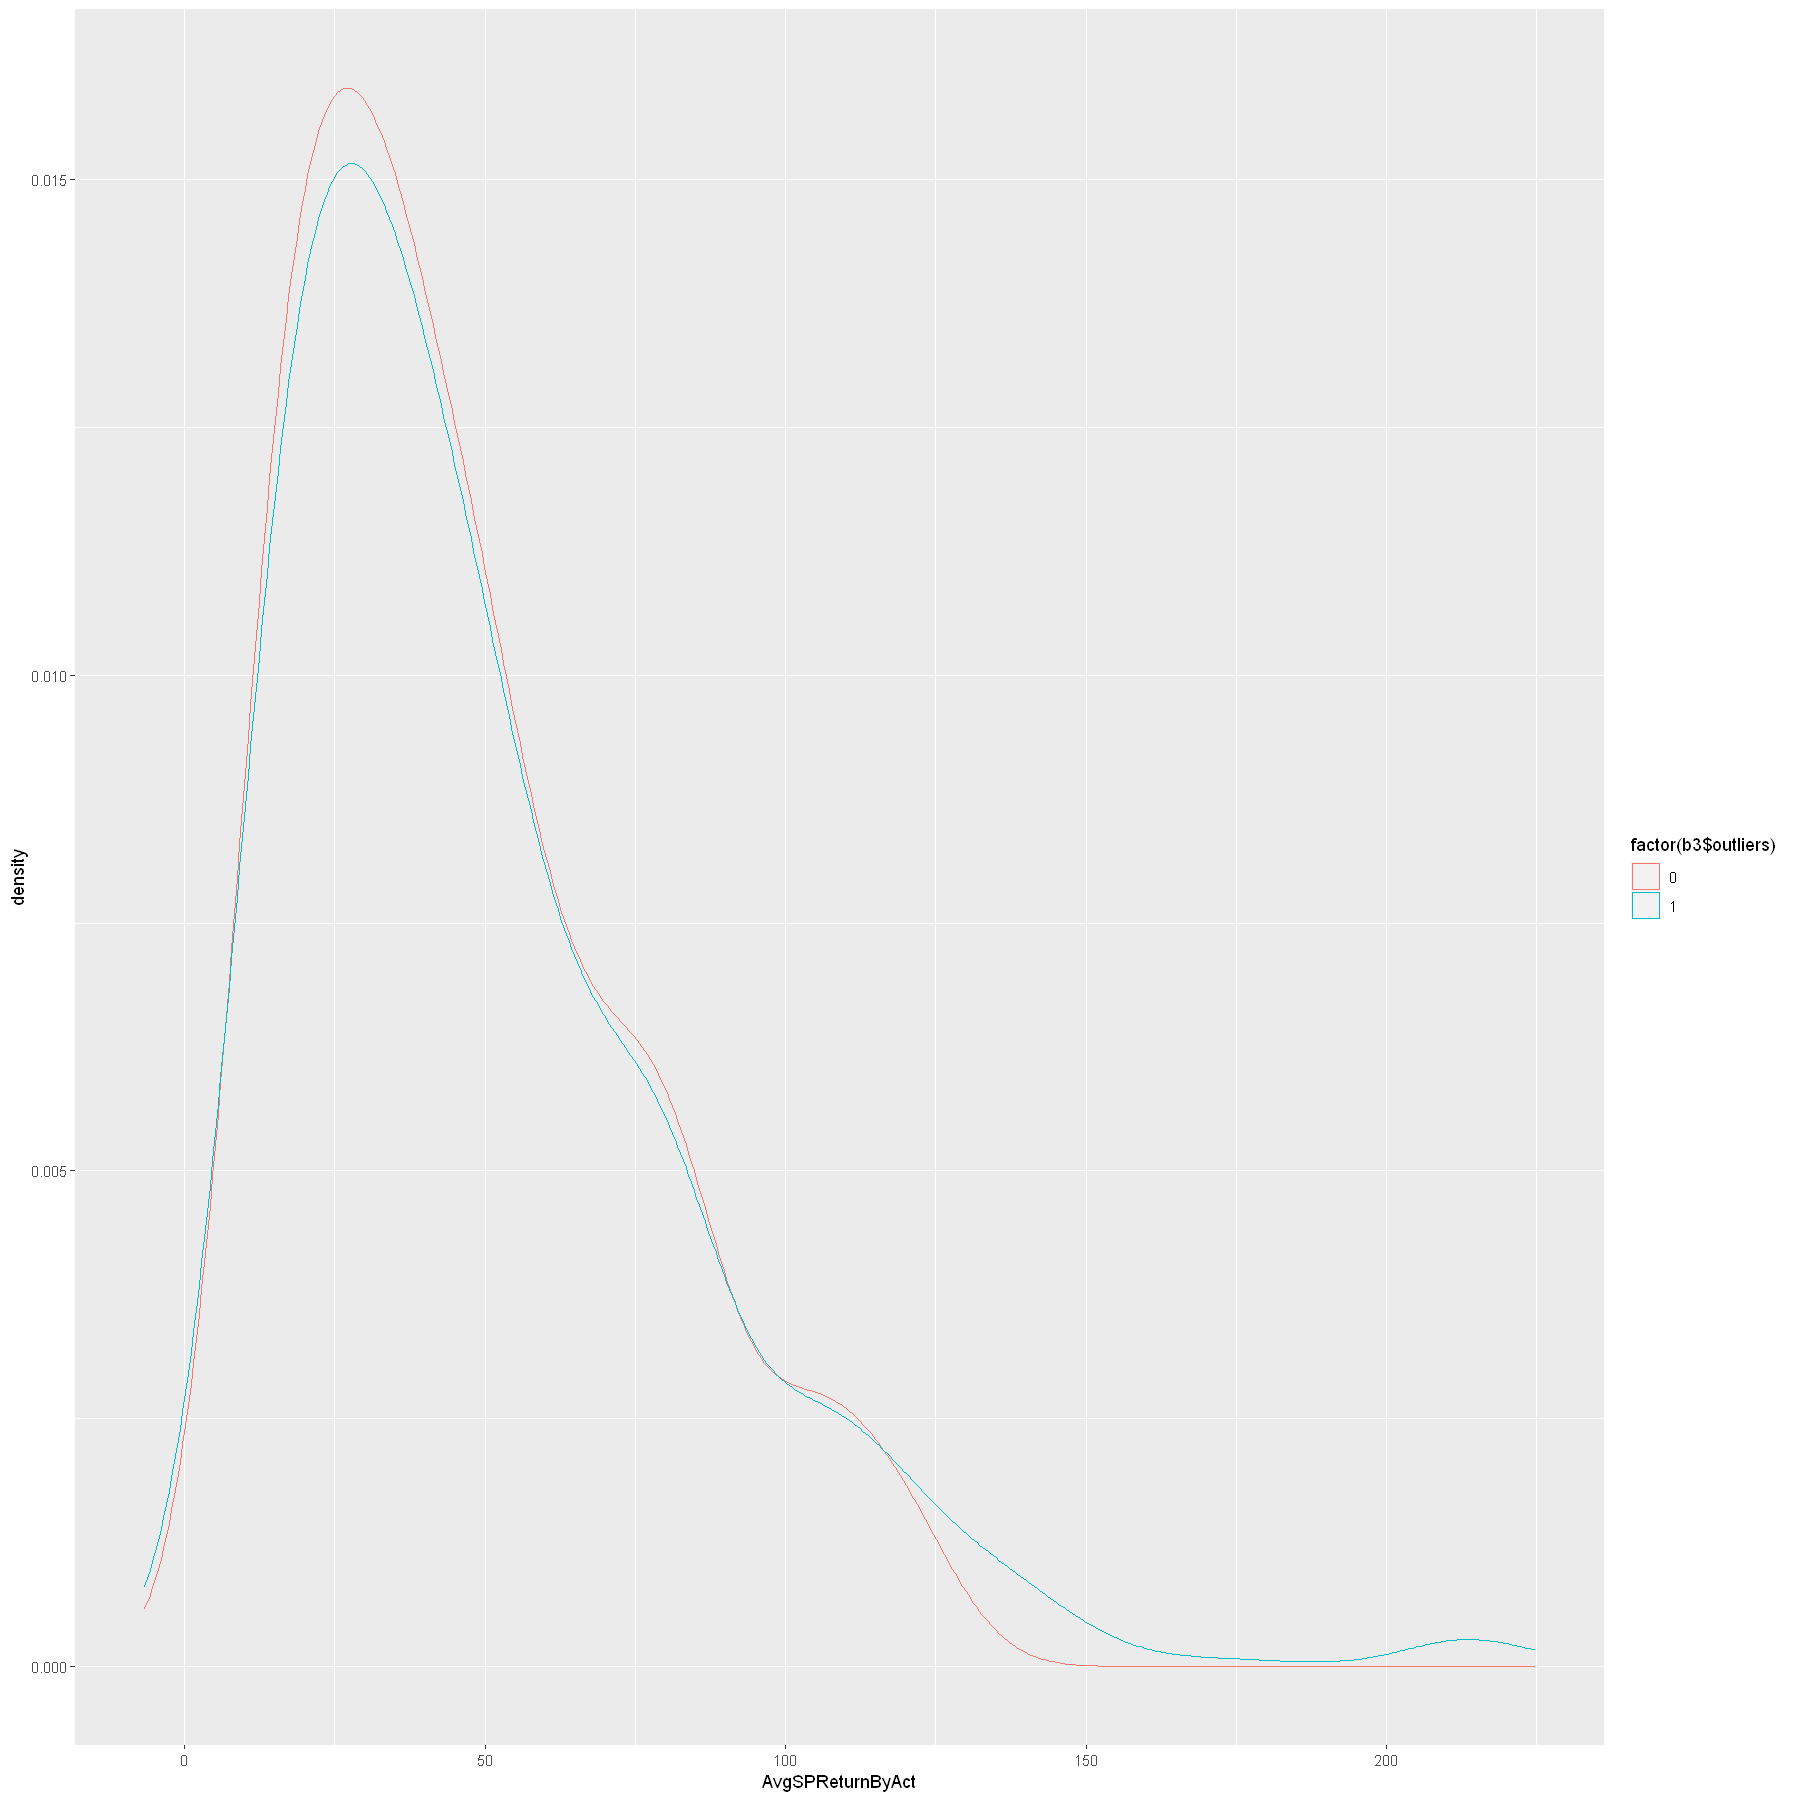

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2482 rows containing non-finite values (stat_density)."
Joining, by = c("ReturnByCamp", "outliers")



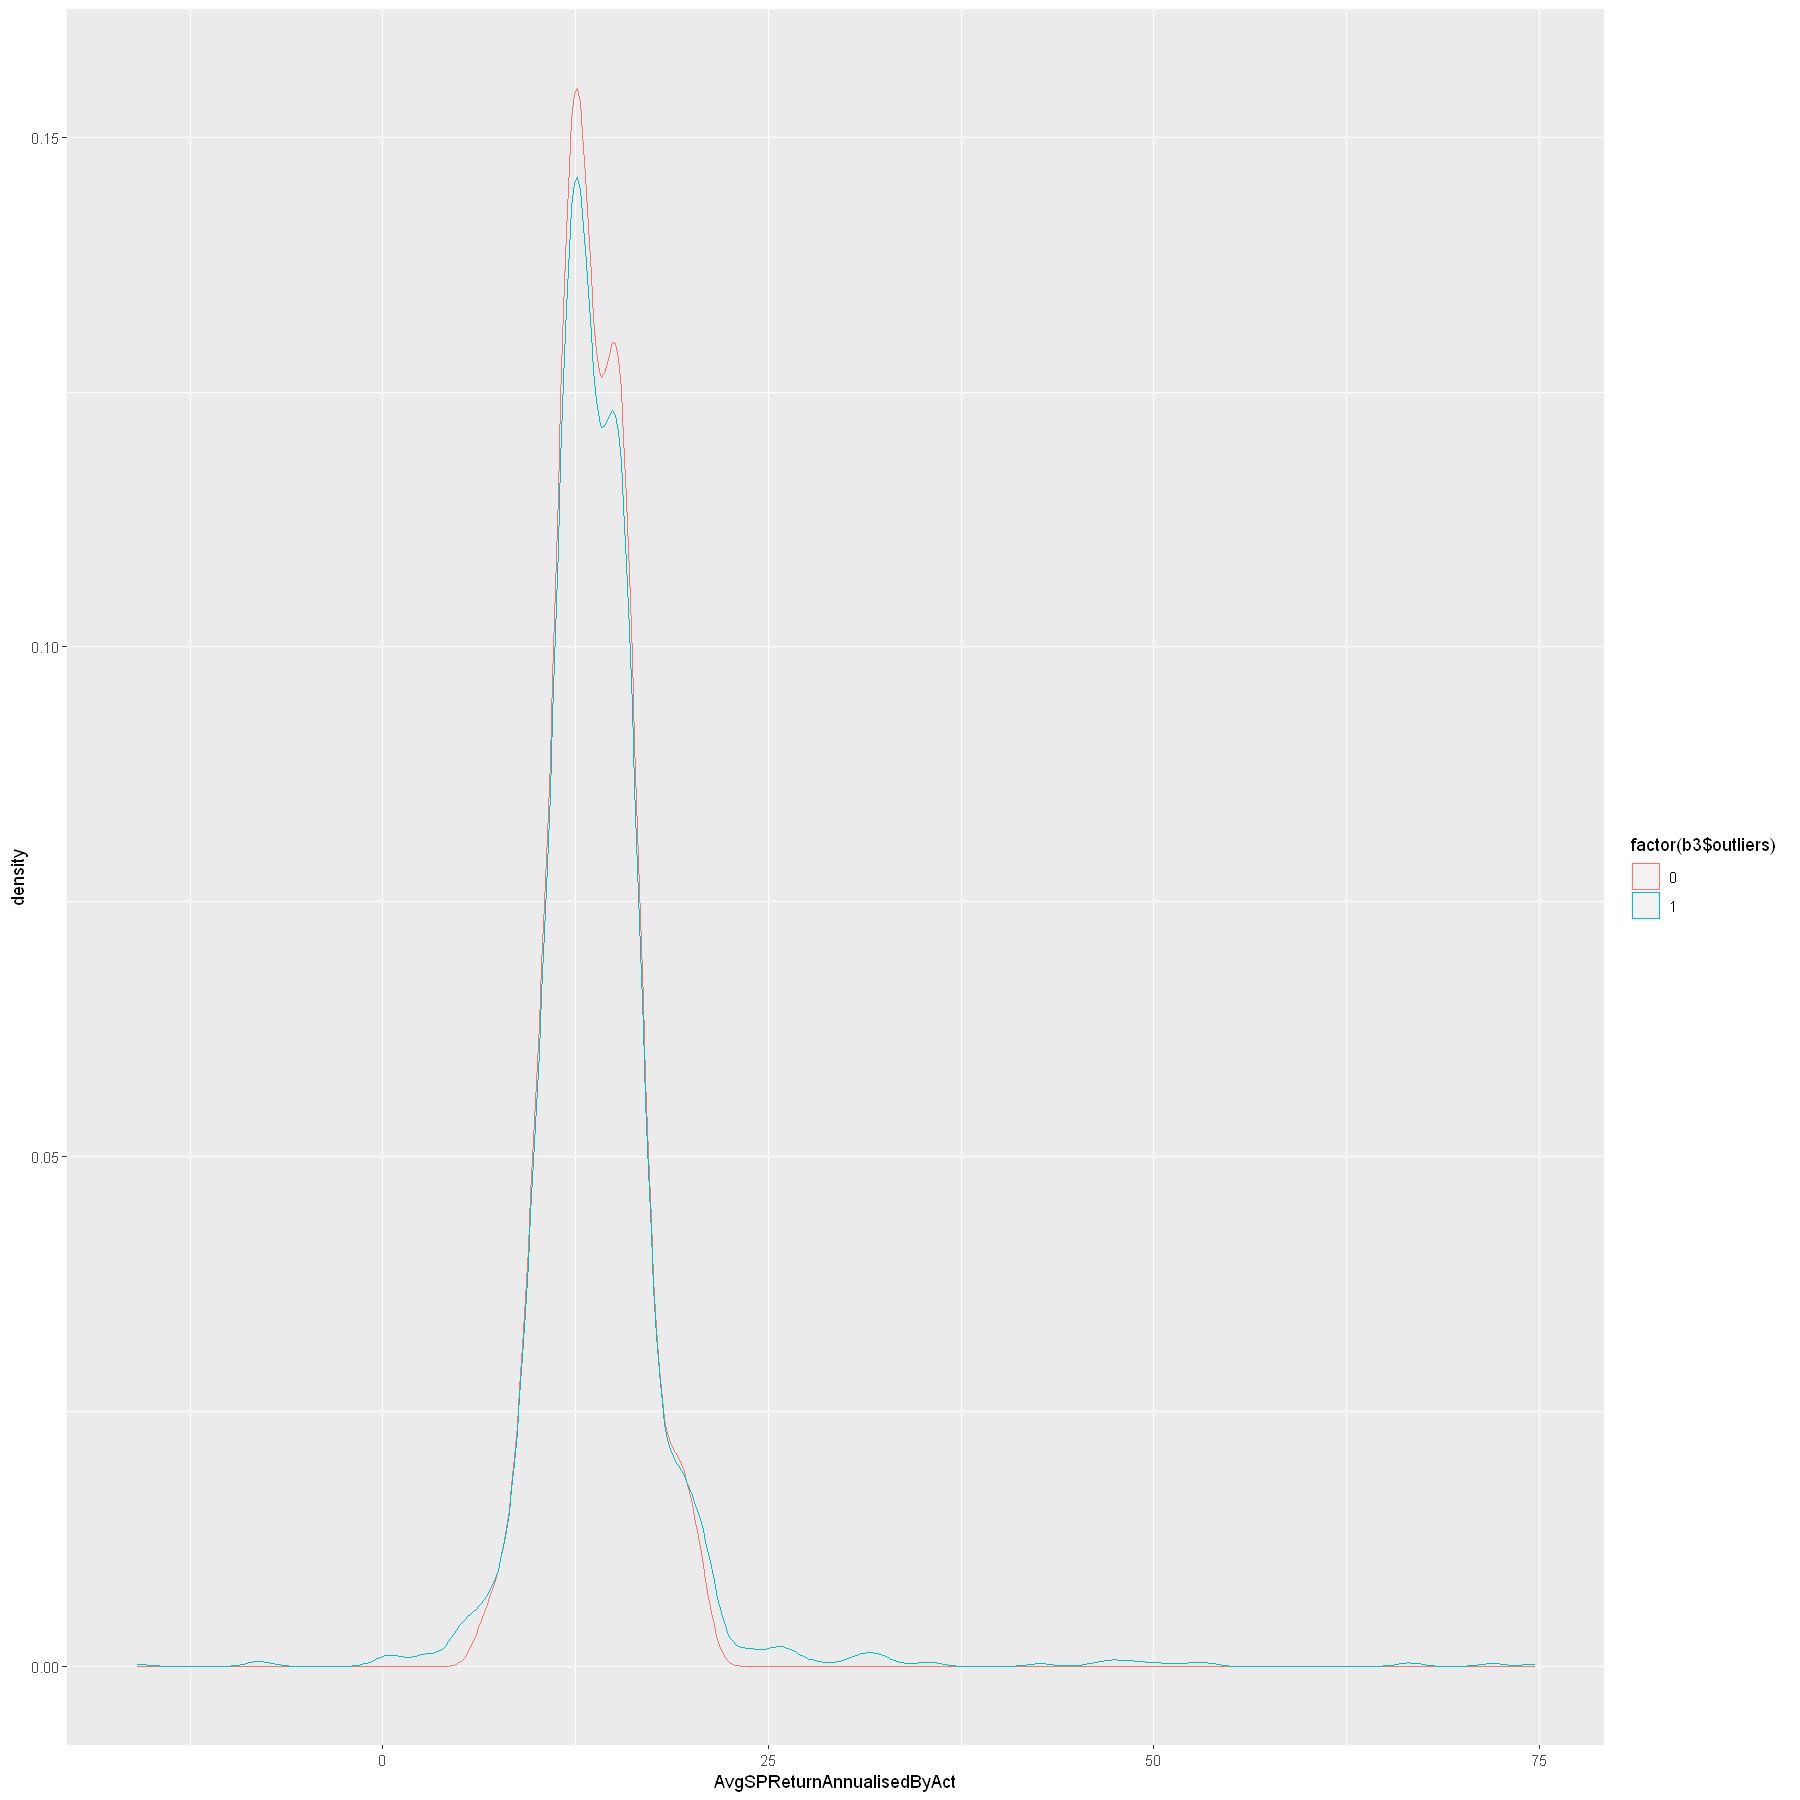

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ReturnAnnualisedByCamp", "outliers")



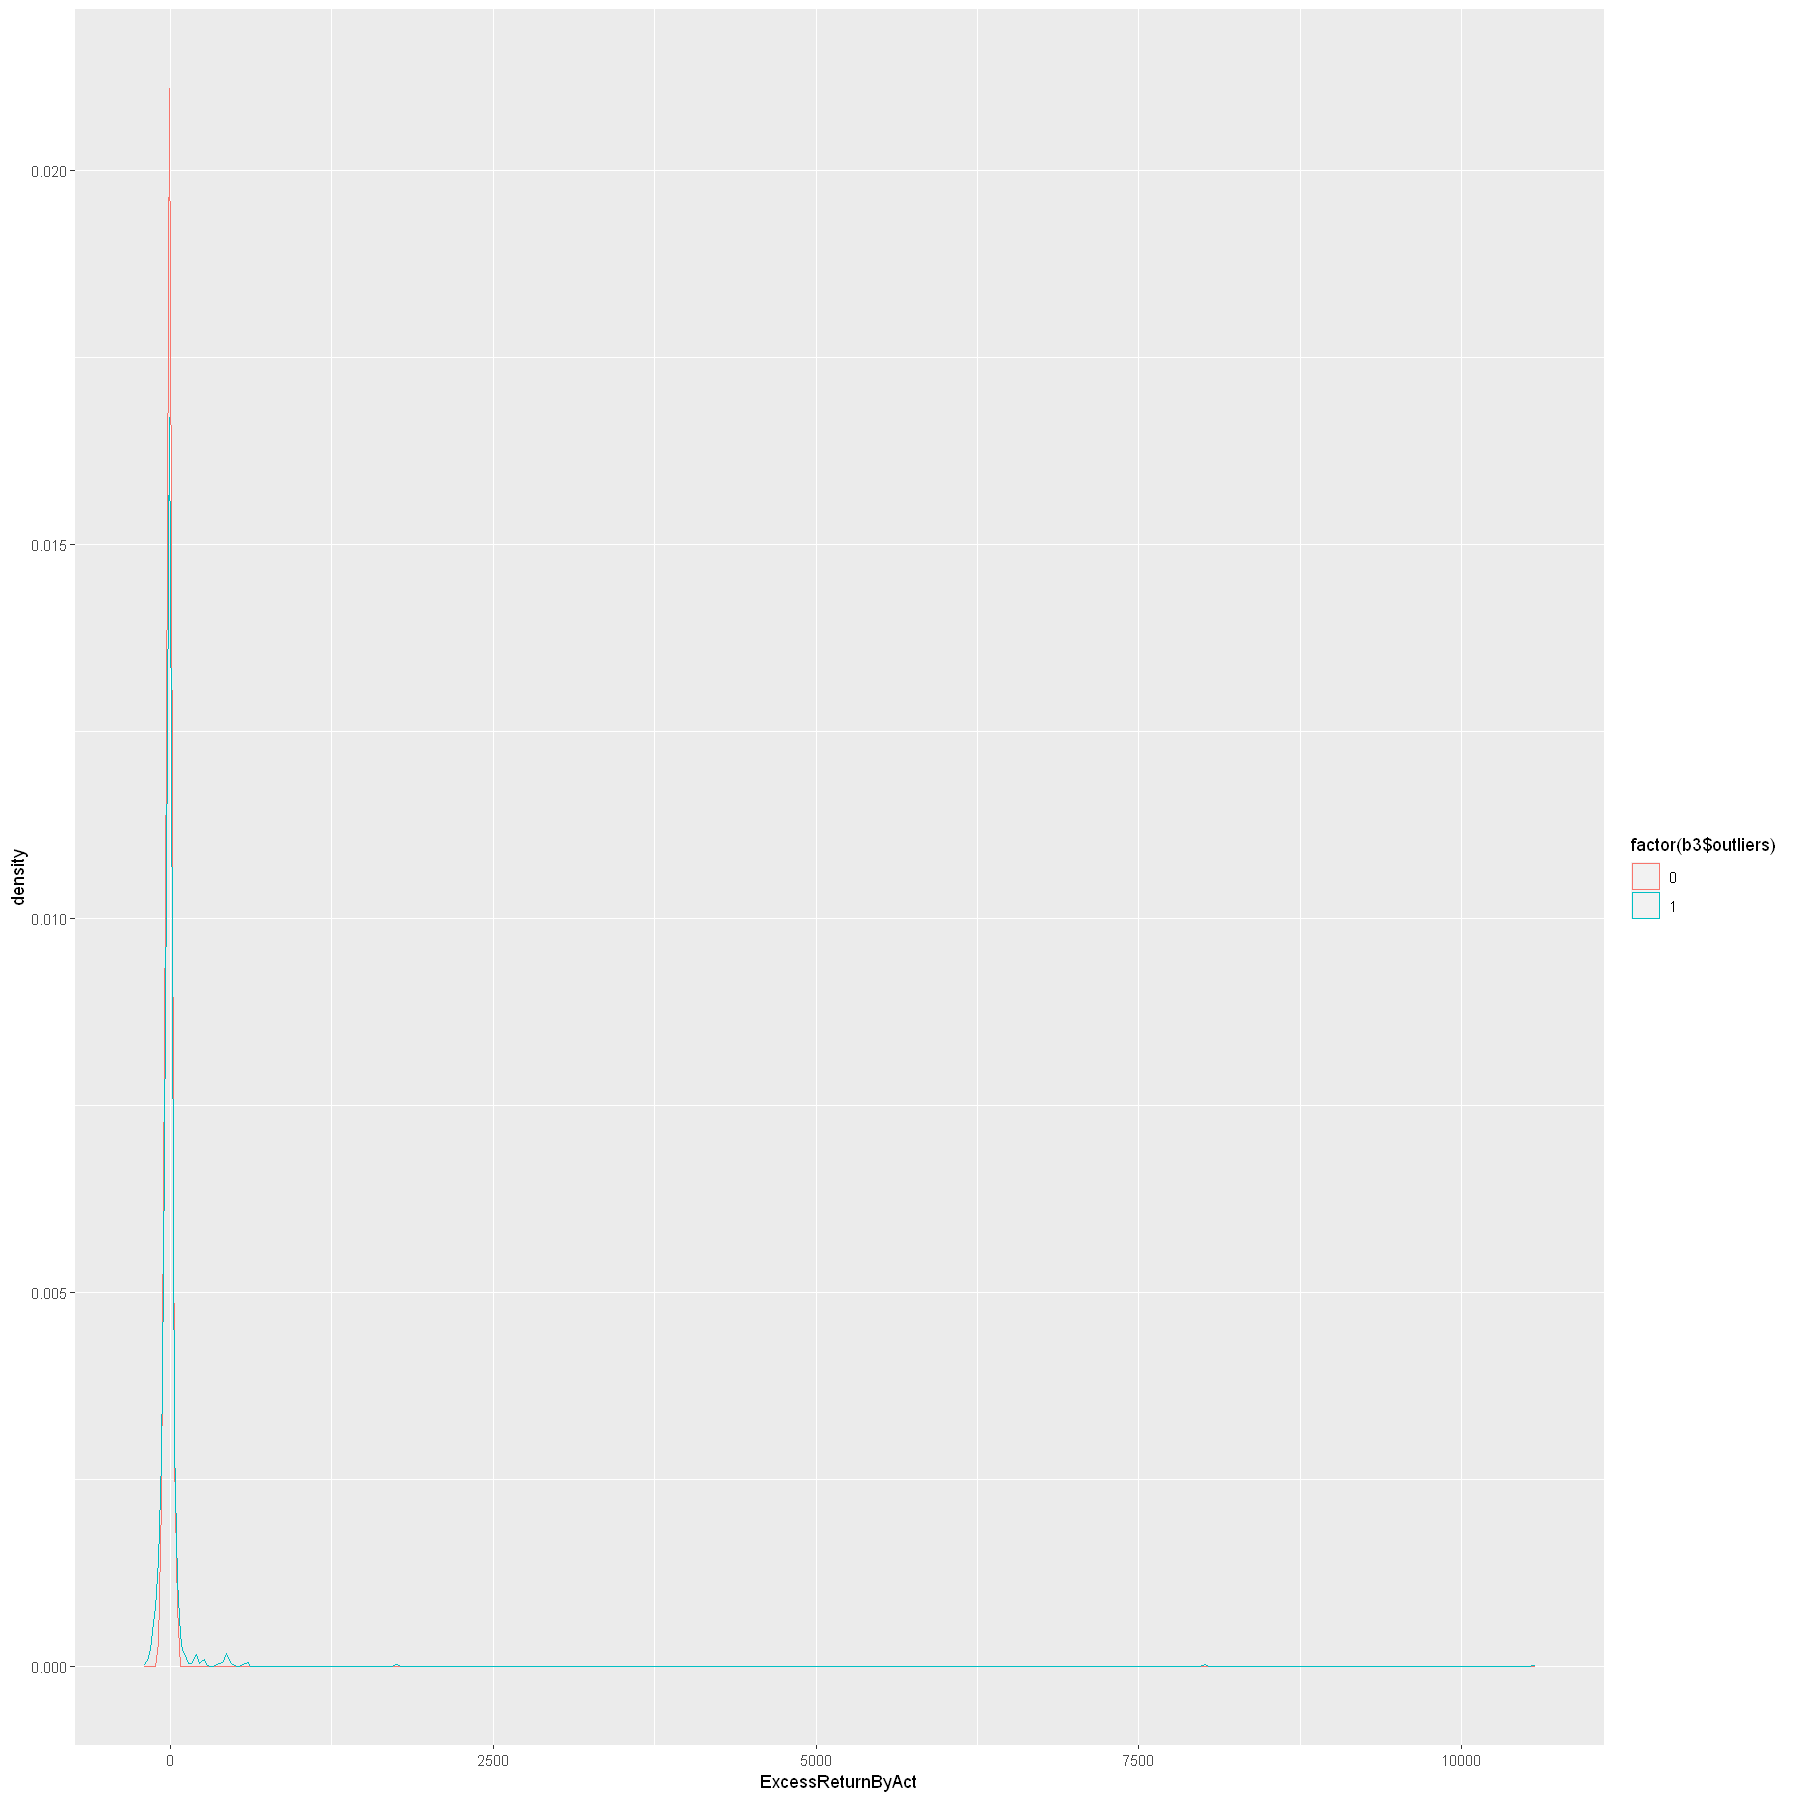

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 2 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeByCamp", "outliers")



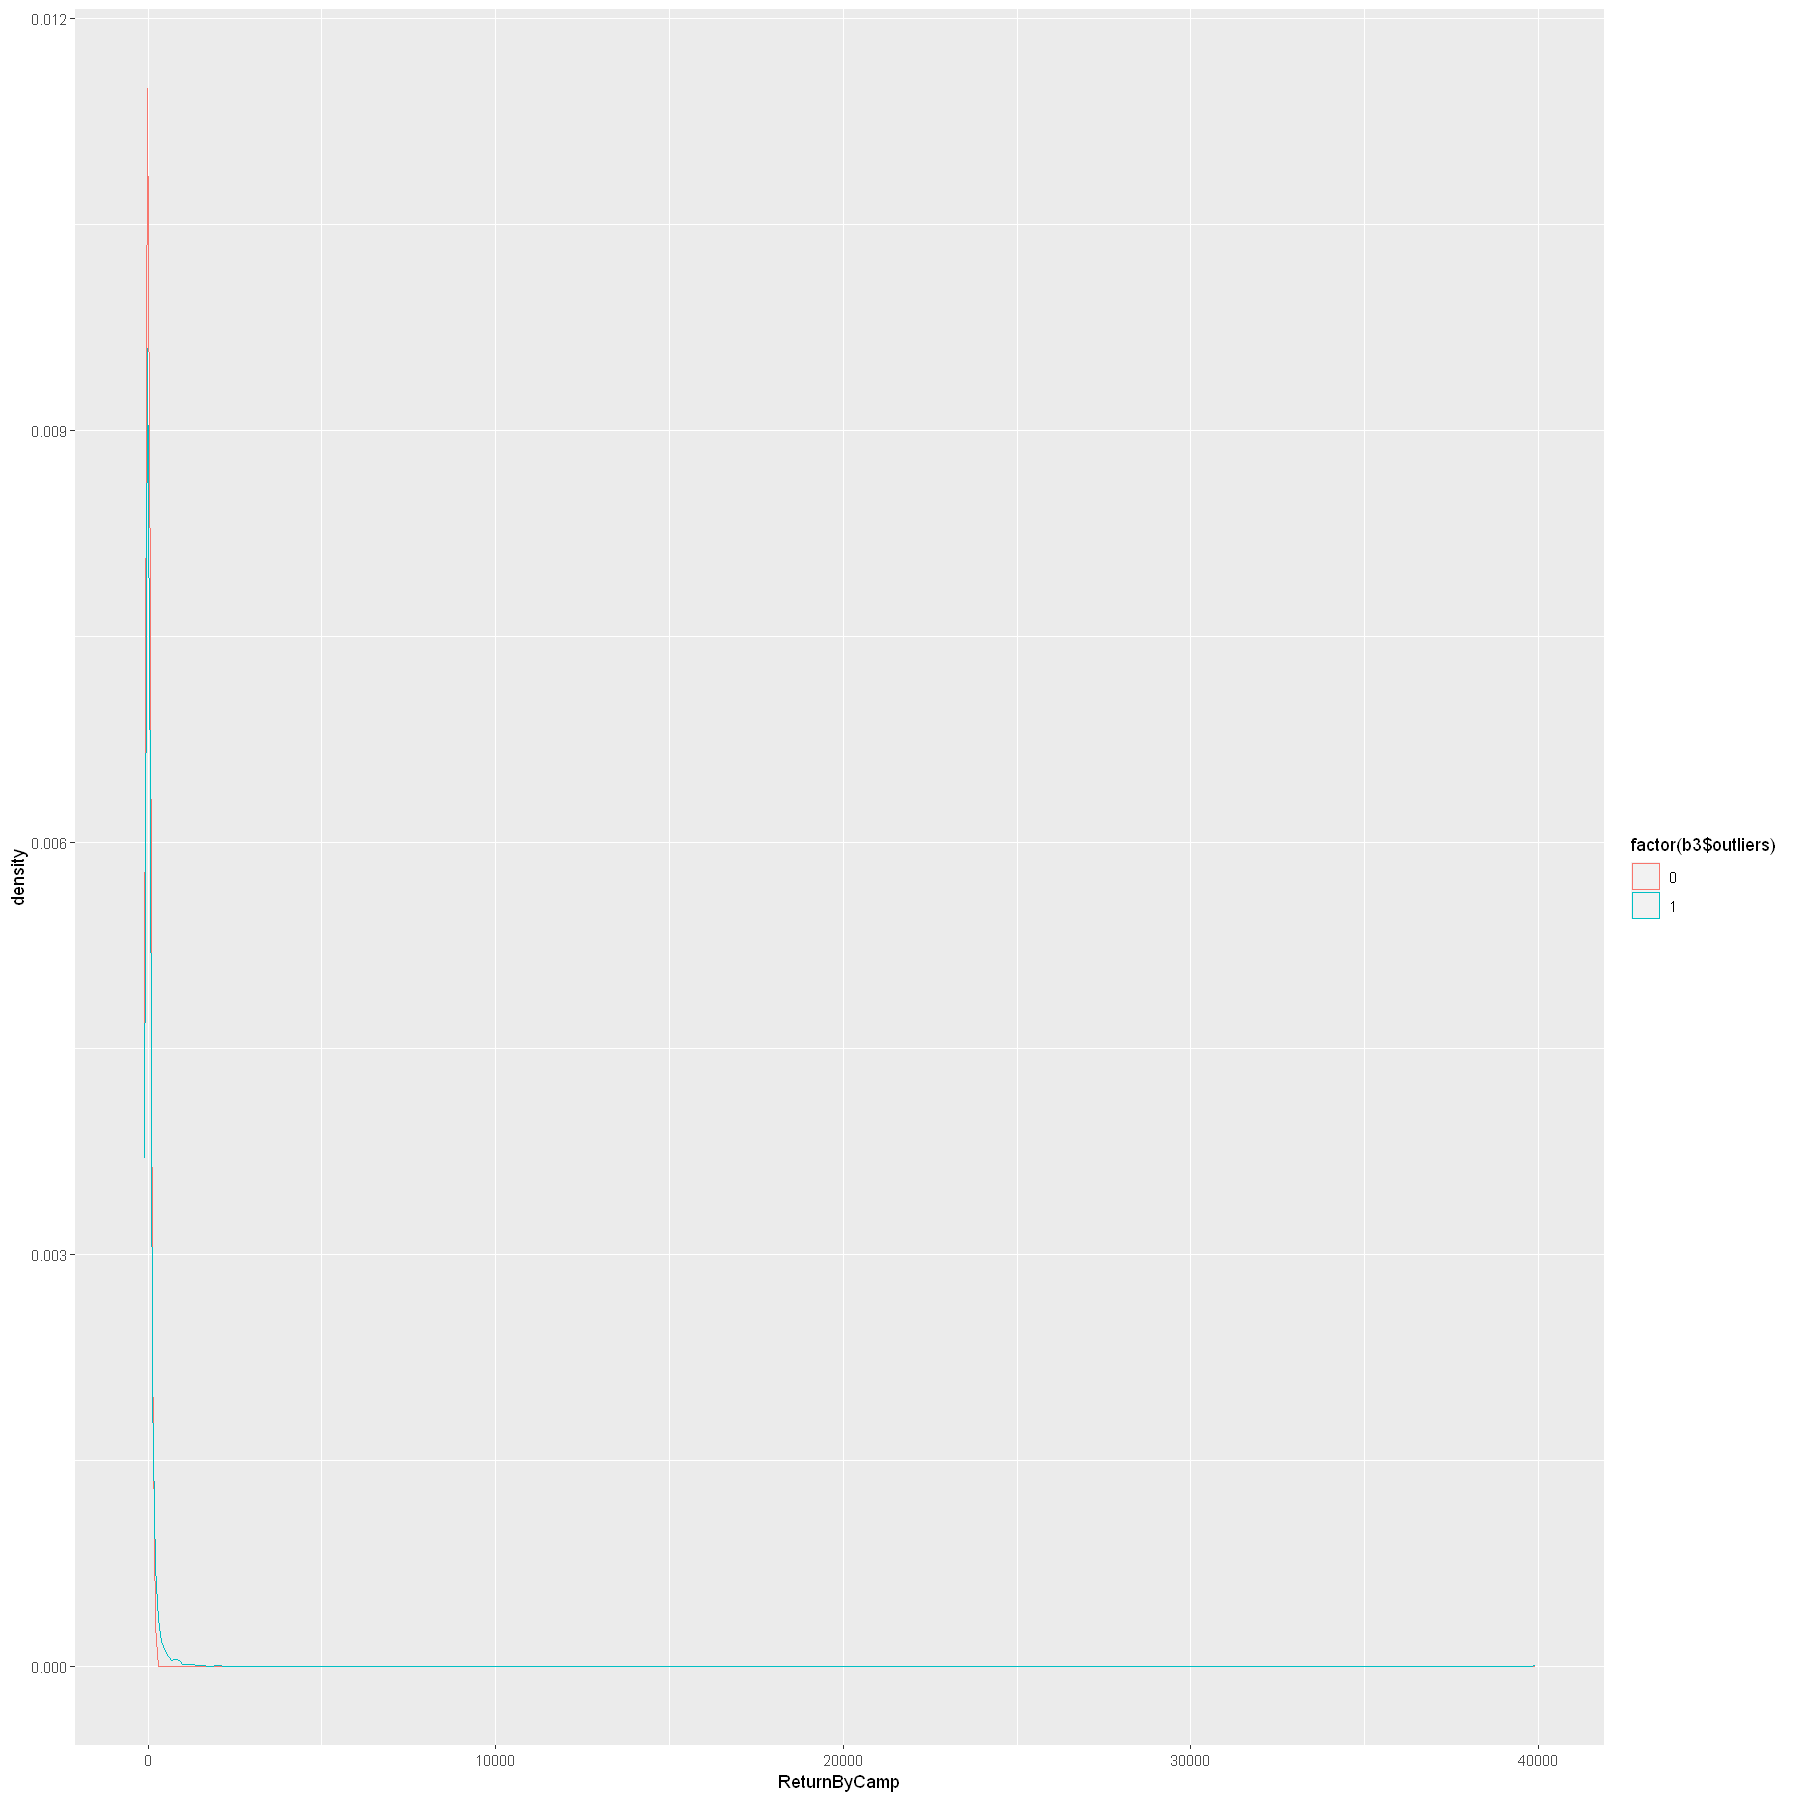

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 253 rows containing non-finite values (stat_density)."
Joining, by = c("SPChangeAnnualisedByCamp", "outliers")



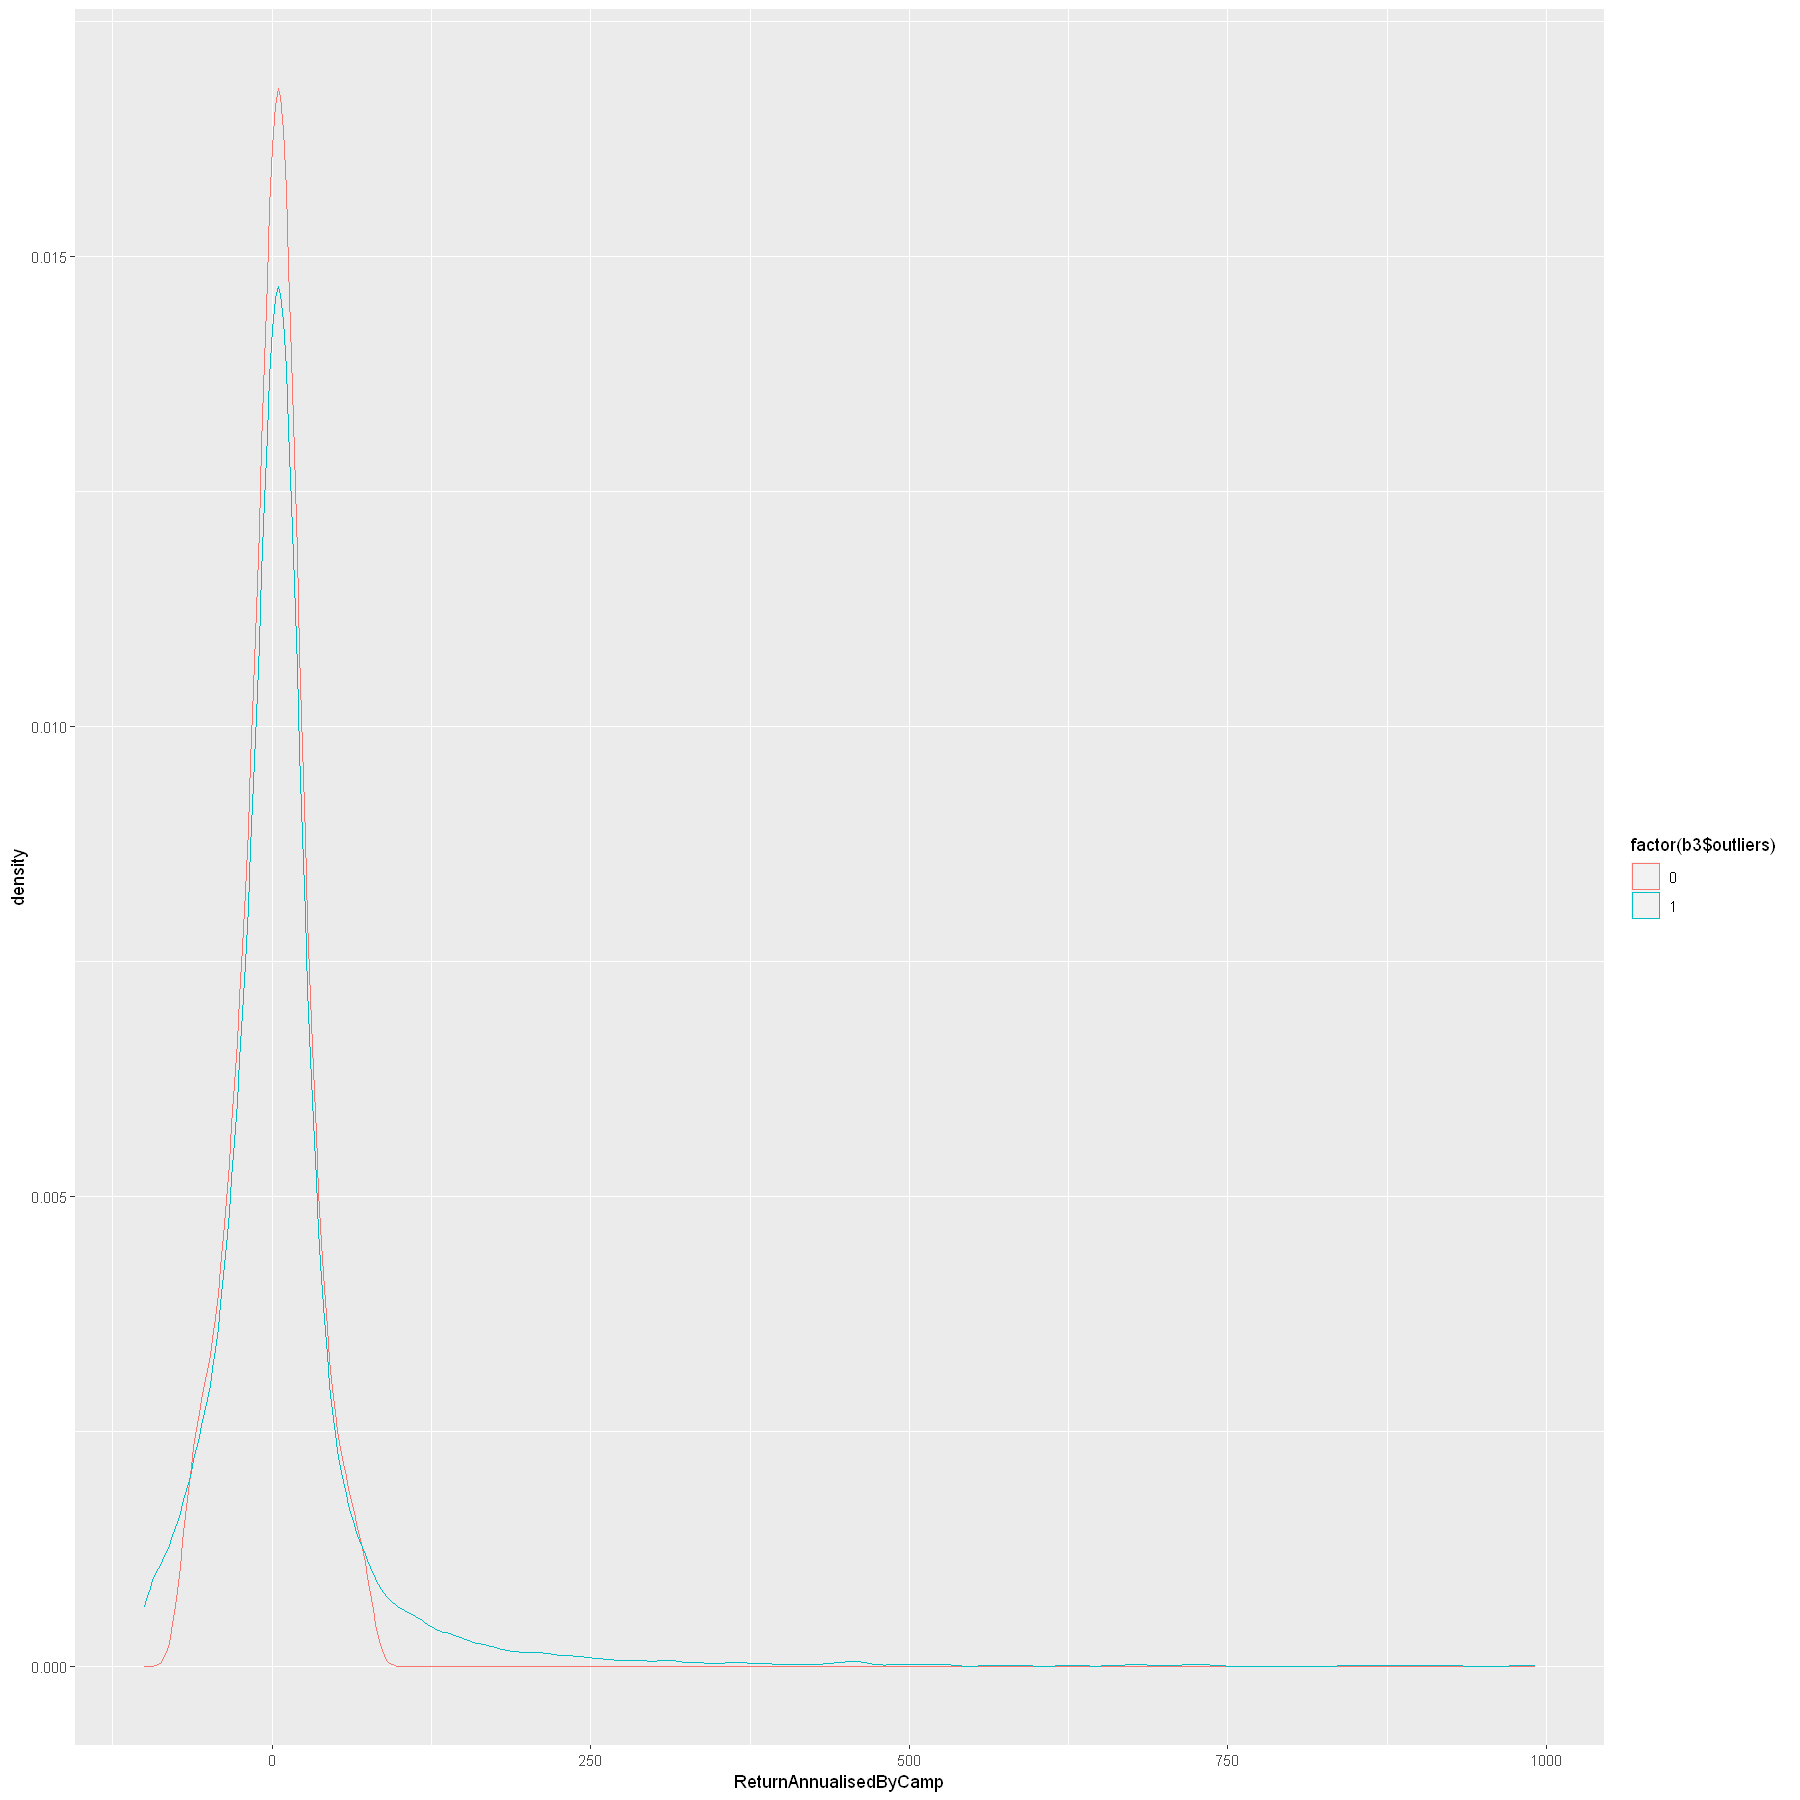

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 253 rows containing non-finite values (stat_density)."
Joining, by = c("NoOfCamp", "outliers")



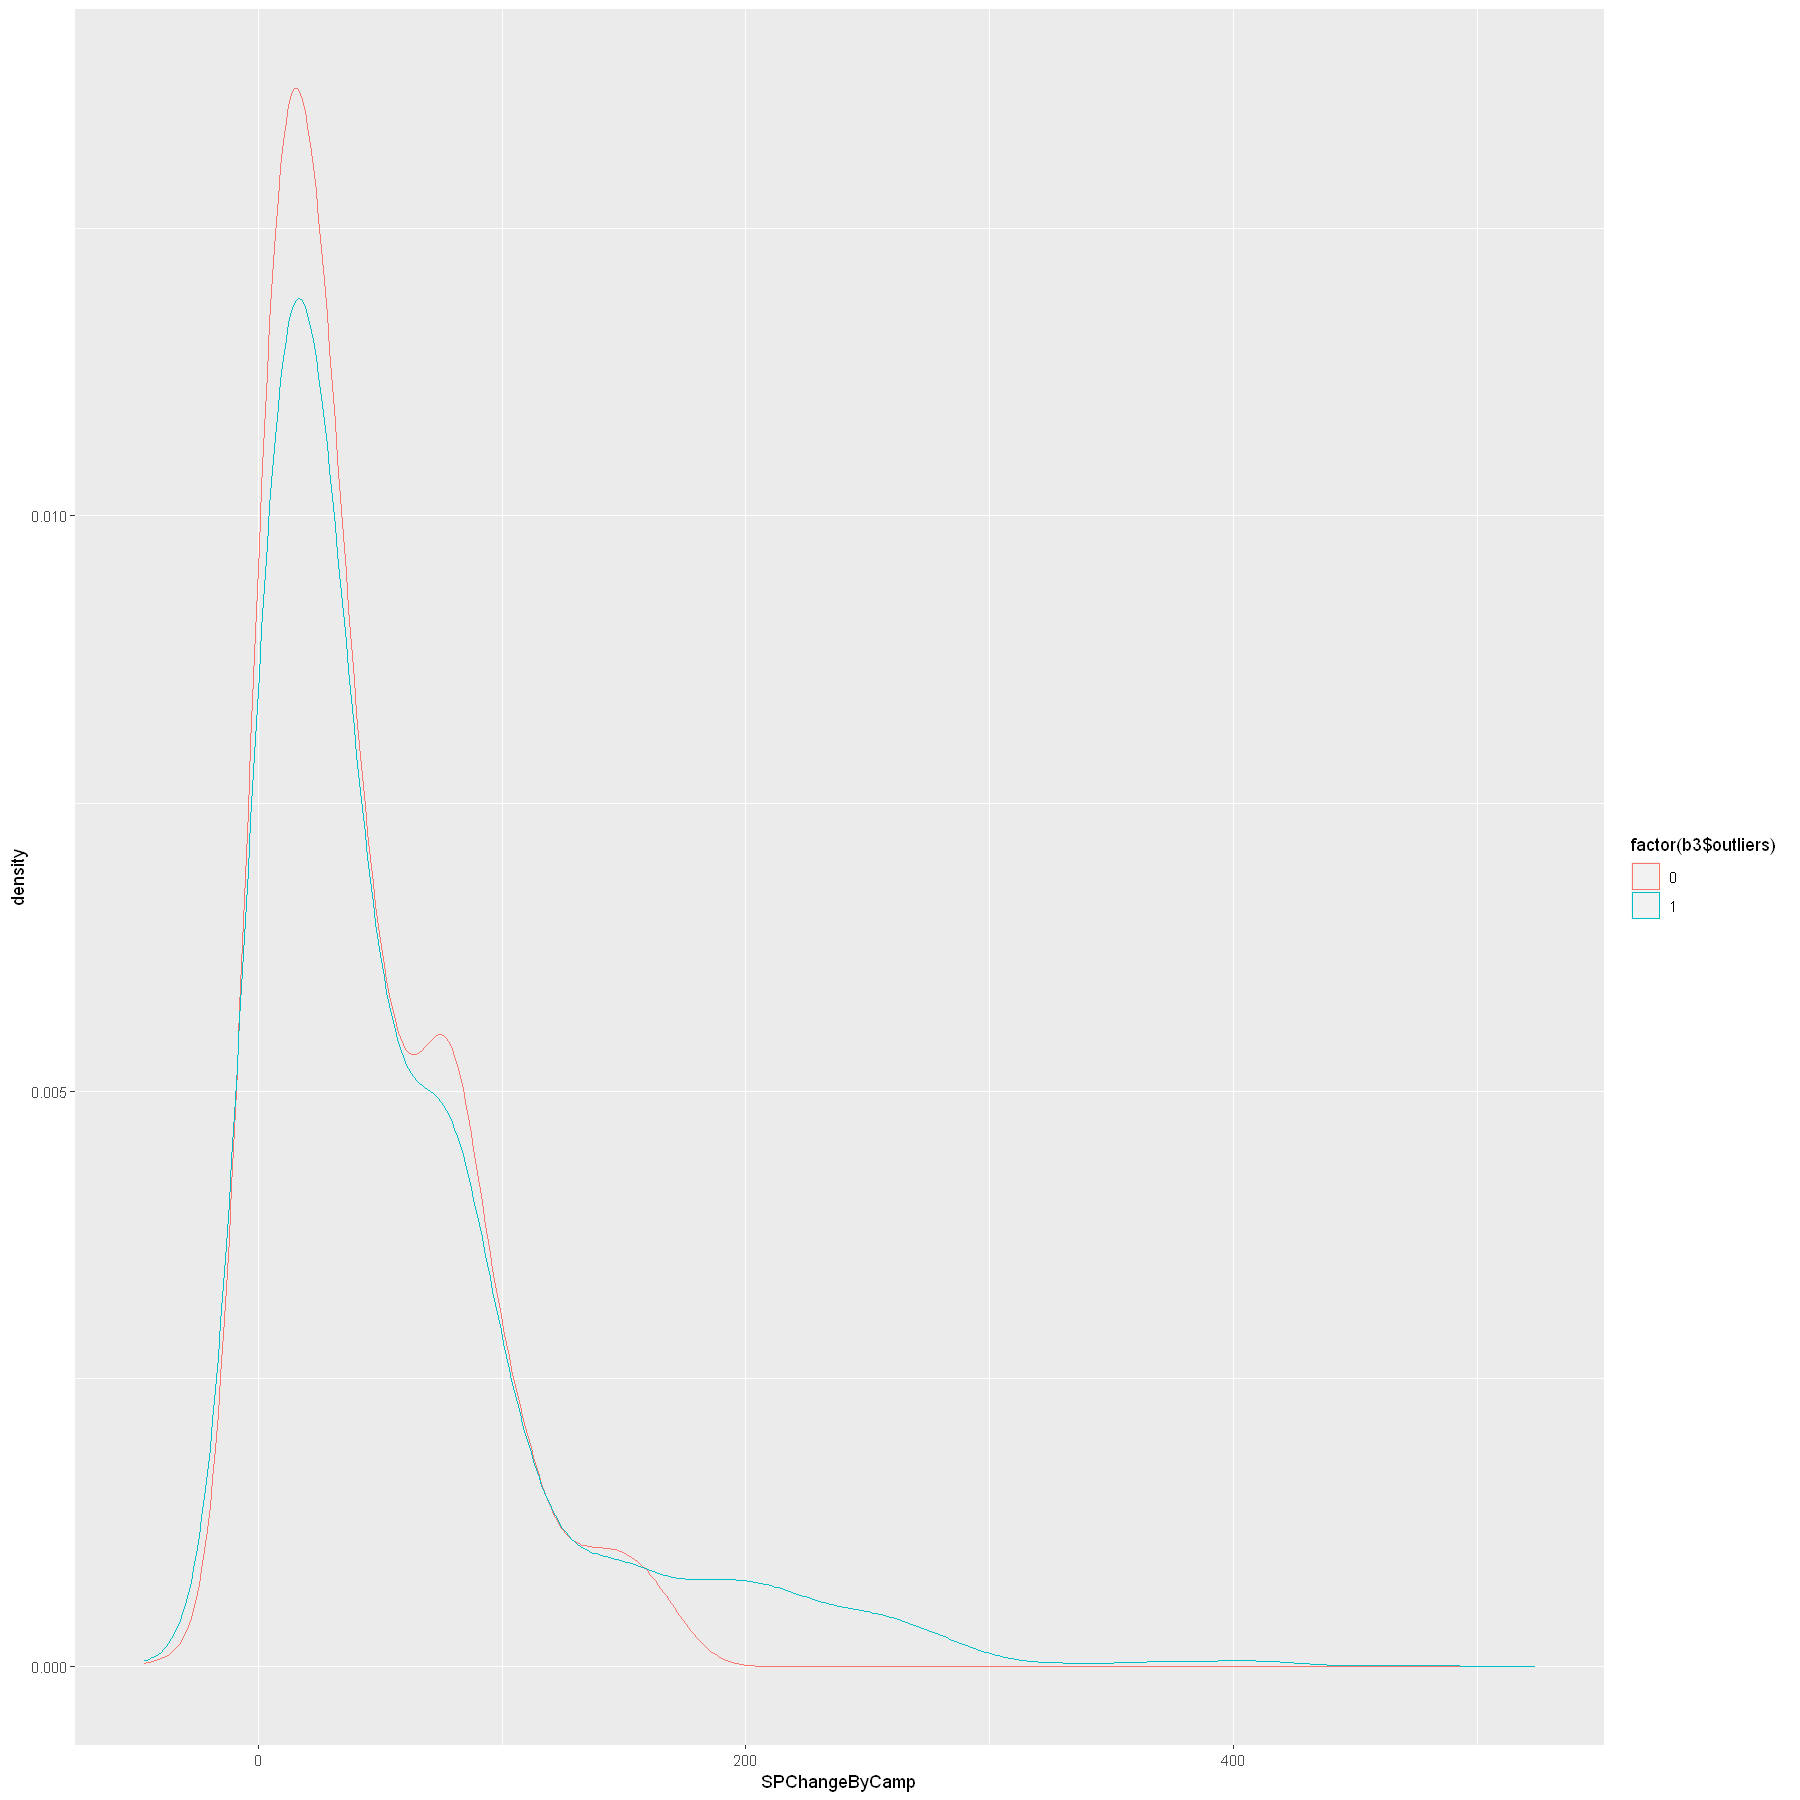

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("PositiveReturnByCamp", "outliers")



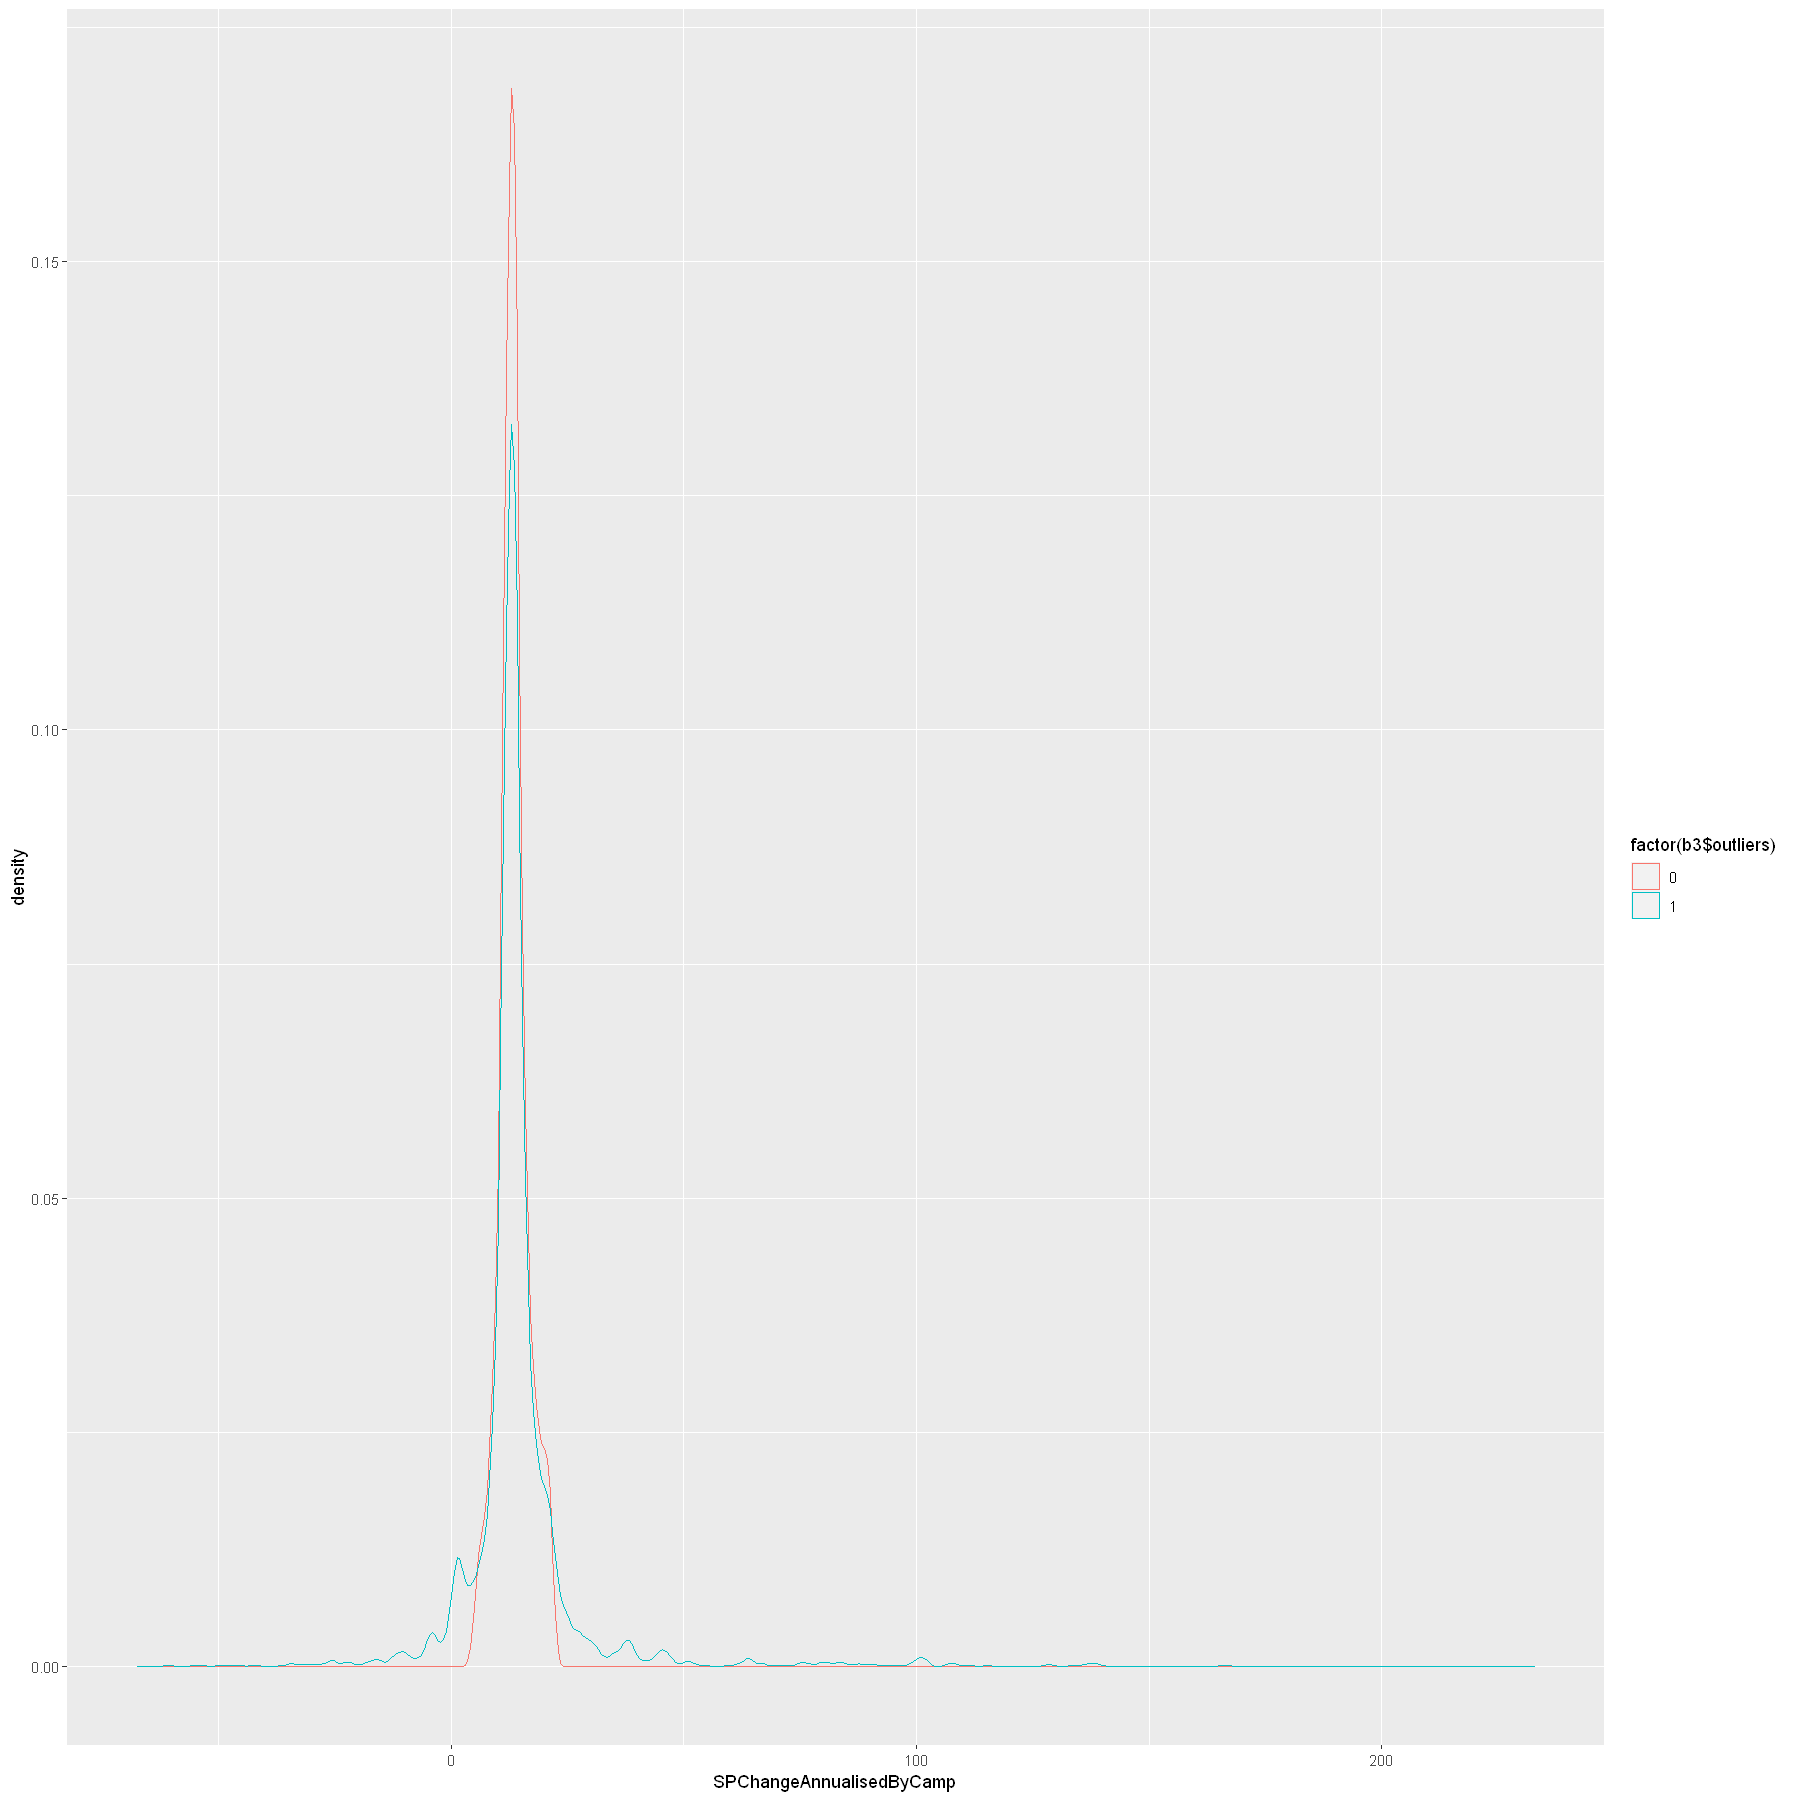

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Joining, by = c("ExcessReturnByCamp", "outliers")



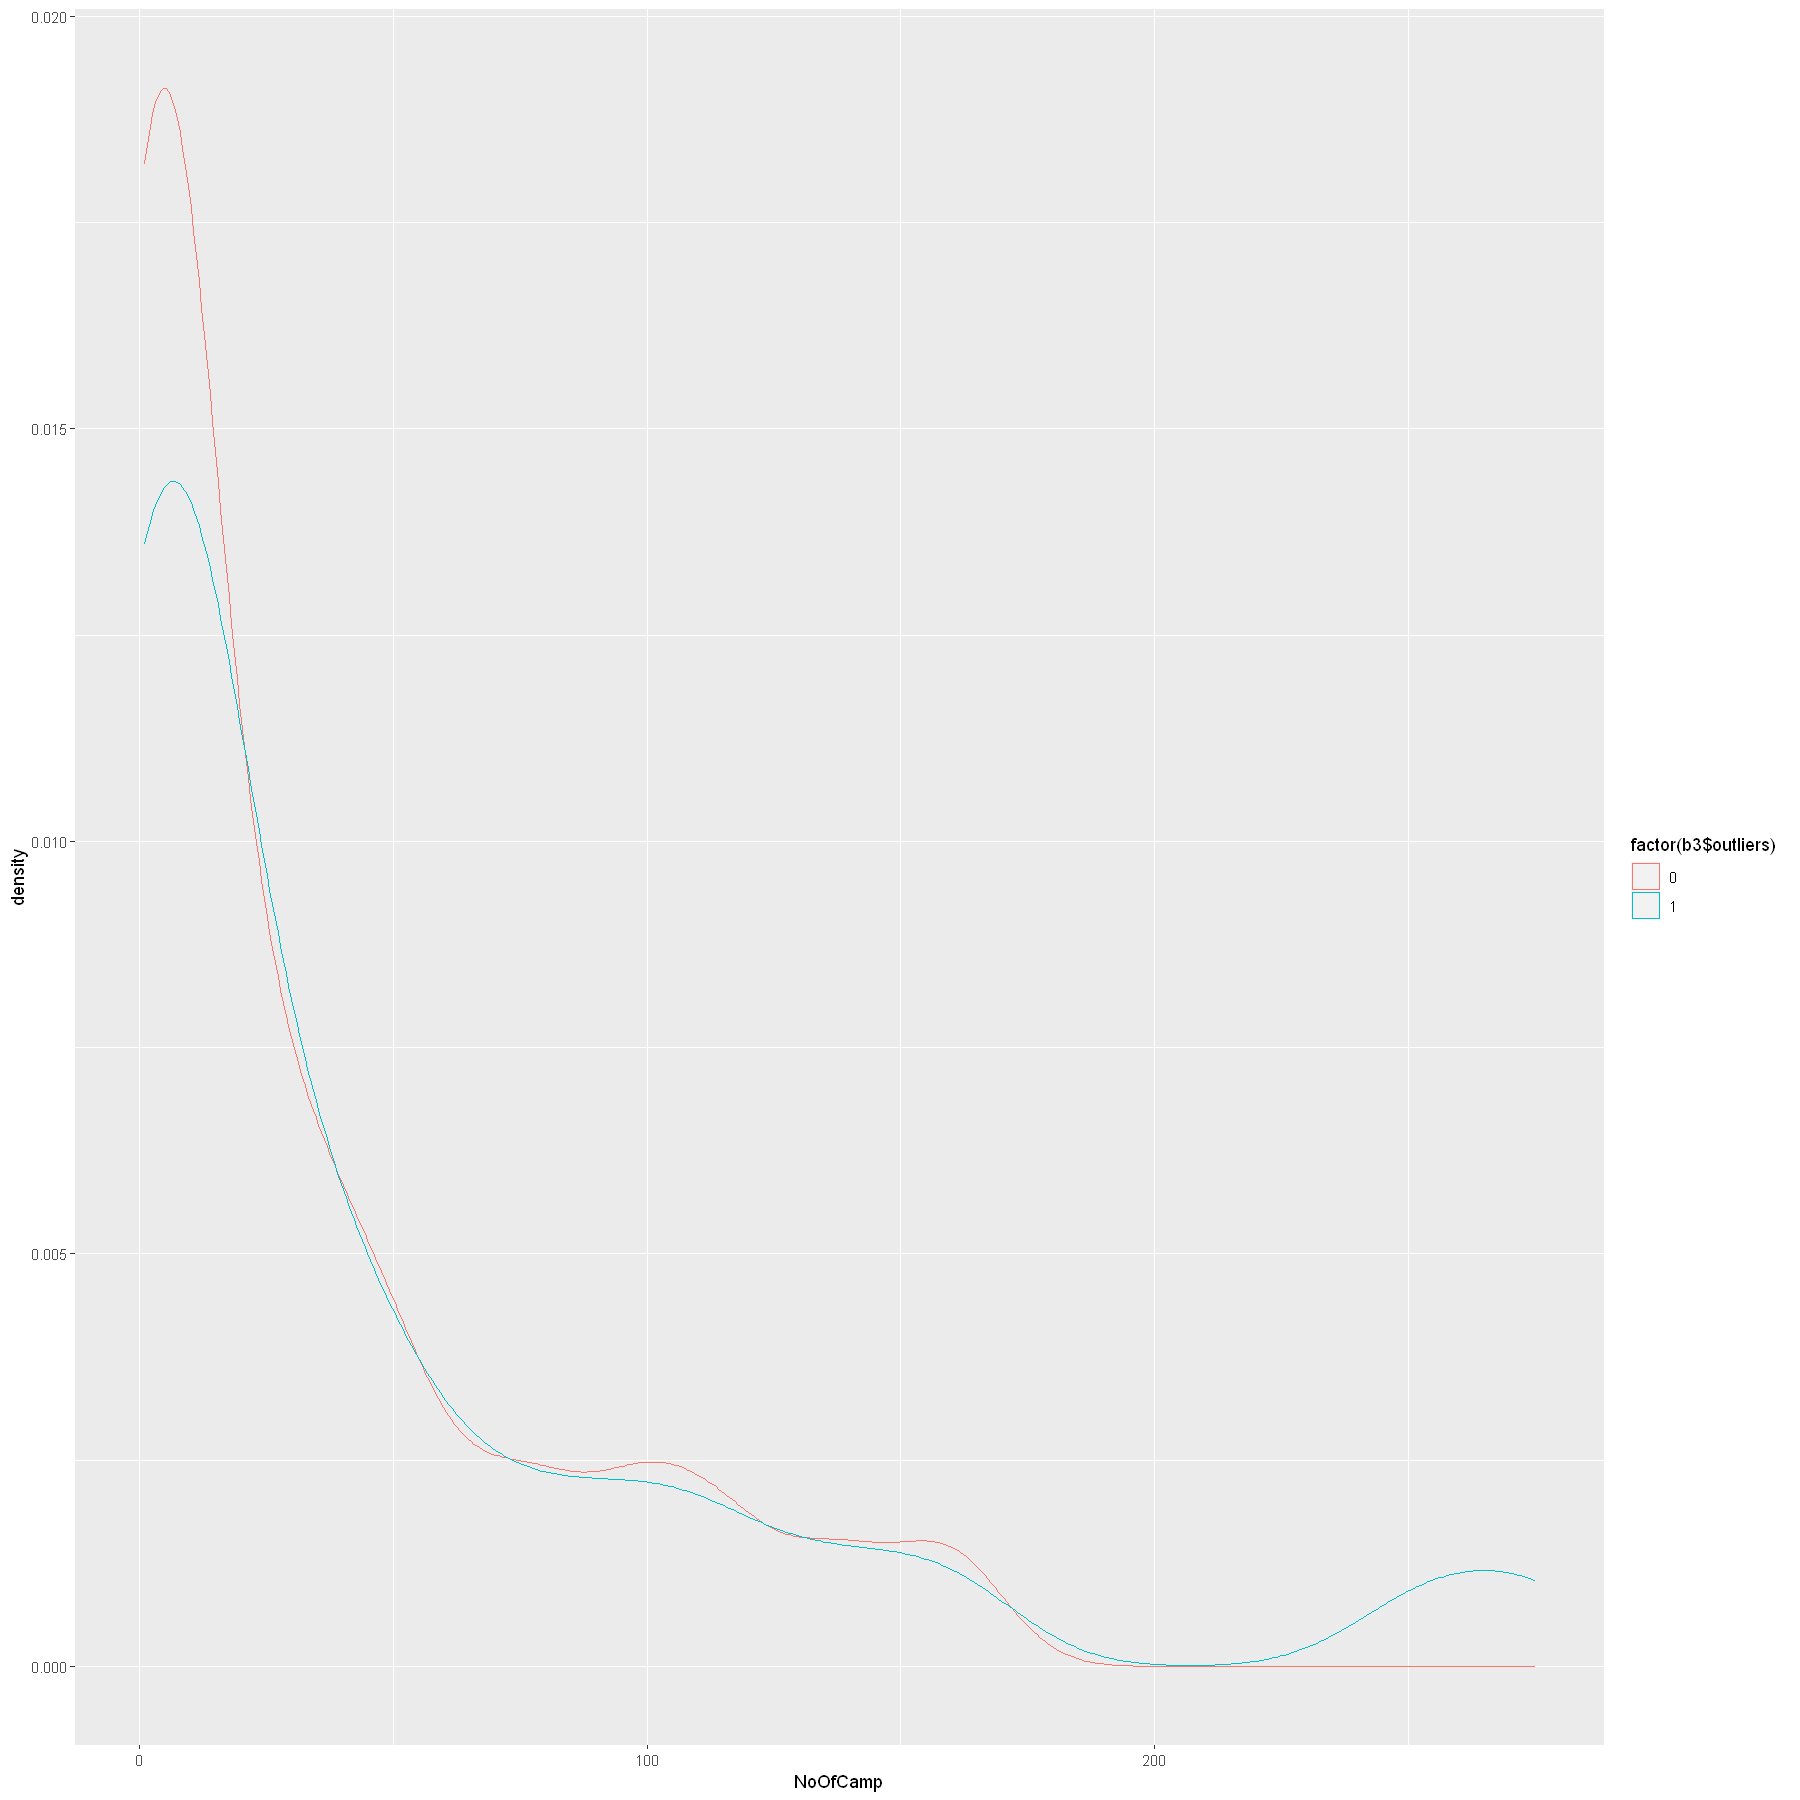

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Removed 253 rows containing non-finite values (stat_density)."
Joining, by = c("HitRatioByAct", "outliers")



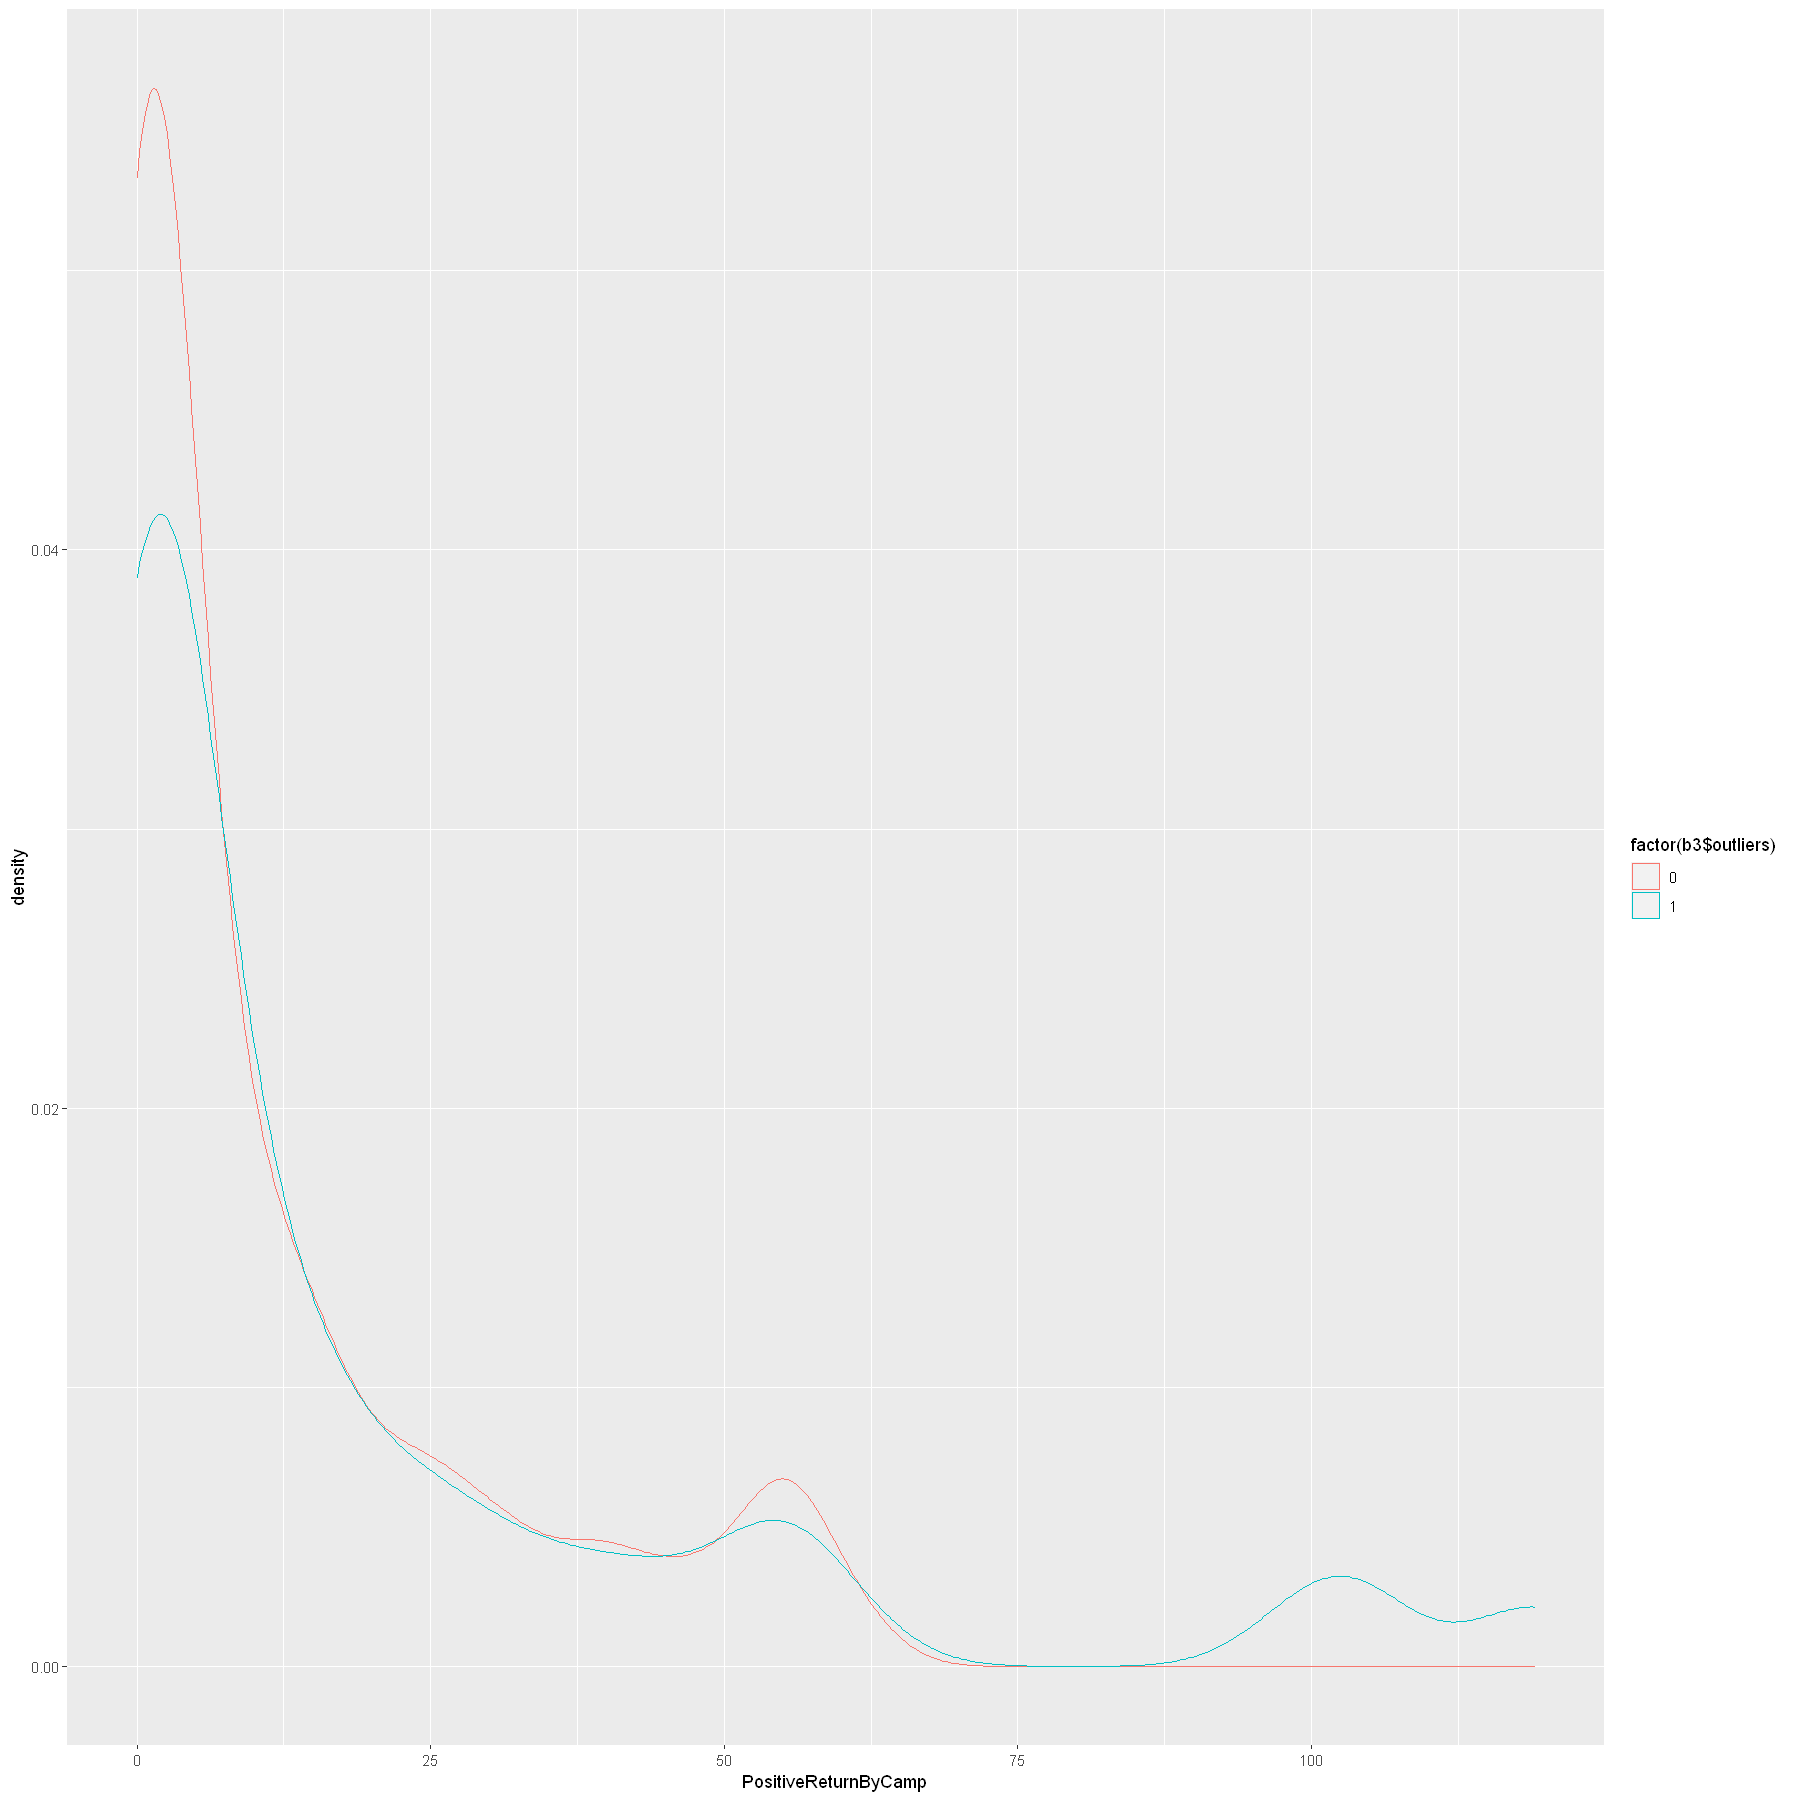

Warning message:
"Use of `b3[[v]]` is discouraged. Use `.data[[v]]` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message:
"Use of `b3$outliers` is discouraged. Use `outliers` instead."
Warning message in min(df[[v]], na.rm = TRUE):
"no non-missing arguments to min; returning Inf"
Warning message in max(df[[v]], na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


ERROR: Error: Unknown column `SPChangeByCamp.1` 


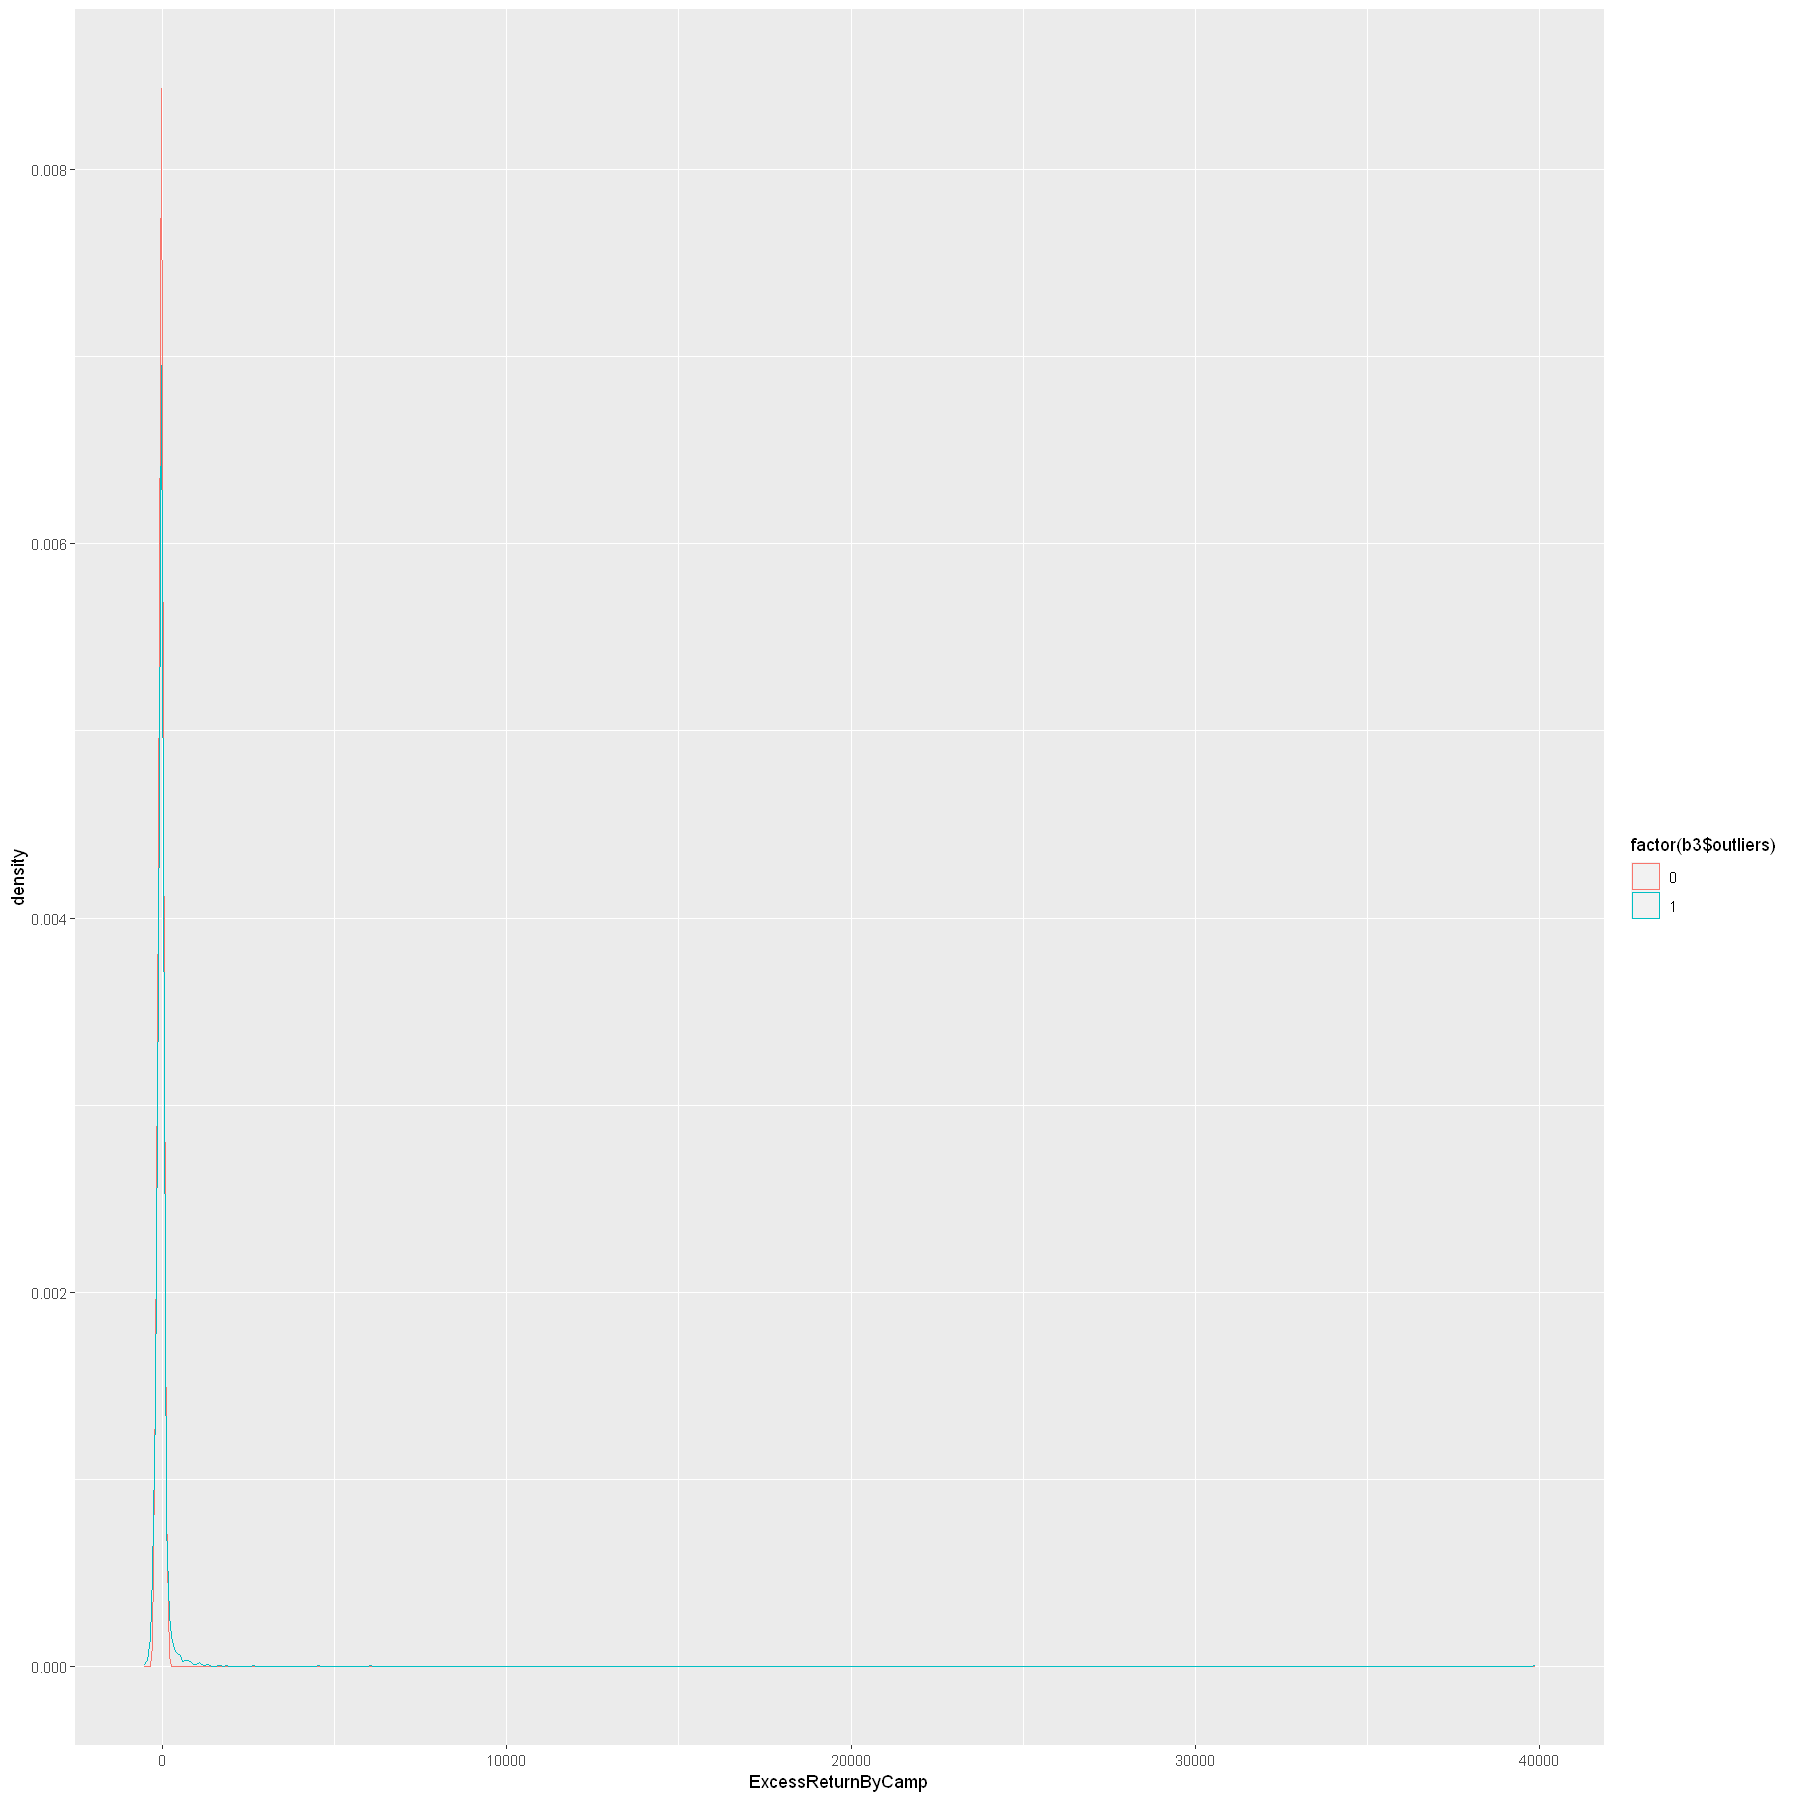

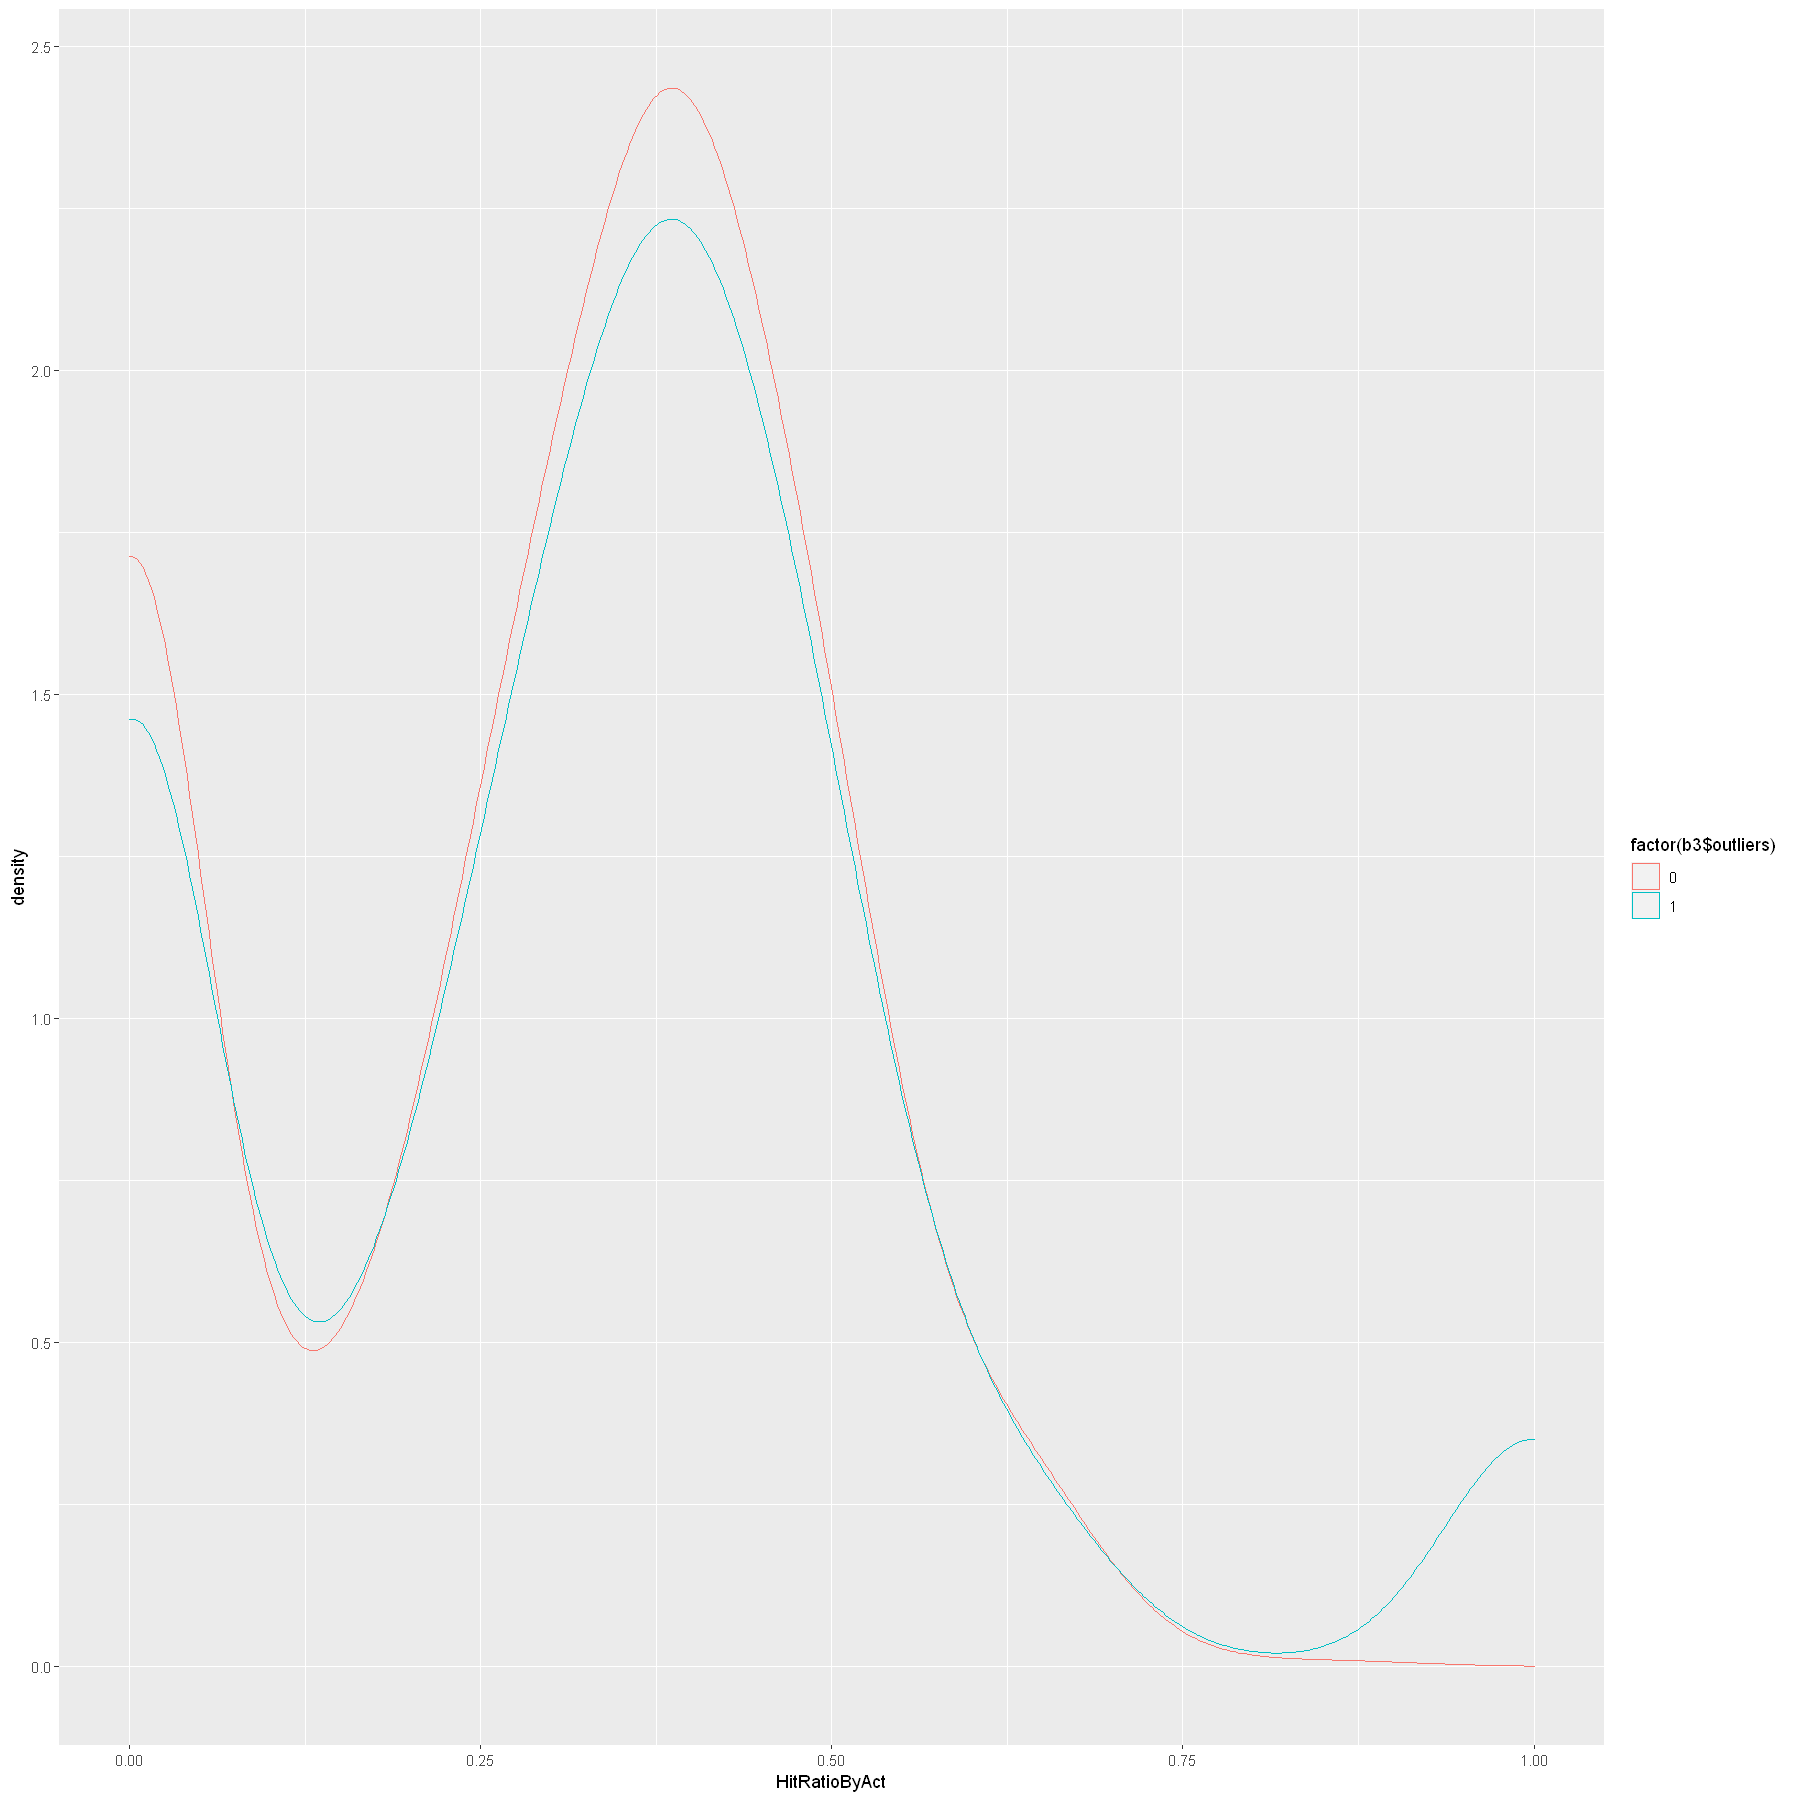

In [97]:
for (v in Activism_continuous) {
    a1 <- min(df[[v]],na.rm=TRUE)
    a2 <- max(df[[v]],na.rm=TRUE)
    b1 <- df %>% select(v) 
    b1$outliers <- 1
    b2 <- df %>% select(v) %>% filter(df_outliers[[paste(v,'out',sep='_')]]==0)
    b2$outliers <- 0
    b3 <- full_join(b1,b2)
    print(ggplot(b3,aes(x=b3[[v]], group=factor(b3$outliers),
                          color=factor(b3$outliers))) + xlab(v) +
    geom_density(adjust=2) + xlim(c(a1,a2)))
}
options(repr.plot.width = 5, repr.plot.height = 5)
par(mfrow=c(2,2))

Correlation matrix - Y + X(with outleirs) &  X(without outliers)

In [276]:
if(!require(float)) {install.packages("float");require(float)}

res <- NULL

for(i in Activism_continuous) {
     rw <- NULL
     rw <- cbind(rw,cor.test(x=df[[i]],y=df$ExcessReturnByCamp,method="spearman")$estimate)
     rw_pv <- cbind(rw,cor.test(x=df[[i]],y=df$ExcessReturnByCamp,method="spearman")$p.value)
    rwo <- cbind(rw_pv,cor.test(x=df.noout[[i]],y=df$ExcessReturnByCamp,method="spearman")$estimate)
    rwo_pv <- cbind(rwo,cor.test(x=df.noout[[i]],y=df$ExcessReturnByCamp,method="spearman")$p.value)
#   diff <- cbind(rwo,1-as.vector(rwo)/as.vector(rw))
#   drop <- cbind(diff, if (diff > 0.3) {'No'} else {'yes'})
    res <- rbind(res,rwo_pv)
    
}
row.names(res) <- Activism_continuous
colnames(res) <- c('with','pv_w','without','pv_wo')
res

Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessR

Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method 

Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessReturnByCamp, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(x = df.noout[[i]], y = df$ExcessR

with        pv_w          without     
Founded                        0.02447008  3.397179e-02 -0.002885733
AvgChangeOverPeriodOfInvByAct  0.09537587  8.421008e-15  0.060024133
AvgReturnAnnualisedByAct       0.25382696  1.808149e-97  0.194388531
AvgSPReturnByAct              -0.20973284  1.891091e-66 -0.195151021
AvgSPReturnAnnualisedByAct     0.06865267  2.400201e-08  0.081592516
ExcessReturnByAct              0.27072380 4.016611e-111  0.207964180
ReturnByCamp                   0.80506083  0.000000e+00  0.764739534
ReturnAnnualisedByCamp         0.81106515  0.000000e+00  0.785548077
SPChangeByCamp                -0.39837162  0.000000e+00 -0.369948014
SPChangeAnnualisedByCamp       0.04463031  2.172922e-05  0.051265440
NoOfCamp                       0.23784225 1.534838e-116  0.225980908
PositiveReturnByCamp           0.33581027 2.632052e-237  0.325578933
ExcessReturnByCamp             1.00000000  0.000000e+00  1.000000000
HitRatioByAct                  0.53328628  0.000000e+00  0.468708009
CampByIND                      0.21845671  3.551062e-98  0.177654793
PositiveReturnByIND            0.45273668  0.000000e+00  0.469764598
HitRatioByIND                  0.65397211  0.000000e+00  0.653972110
NoOfInvByIND                   0.05046093  1.576963e-06  0.055962046
AvgChangeOverPeriodOfInvByIND  0.06999116  2.675495e-11  0.089319821
AvgReturnAnnualisedByIND       0.02955315  4.942951e-03  0.065308285
AvgSPReturnByIND              -0.11053961  5.461957e-26 -0.110539613
AvgSPReturnAnnualisedByIND     0.01337371  2.034726e-01  0.012396942
MarketCap                      0.34268094 3.033921e-245  0.334160589
CampByMC                       0.20069543  7.593819e-83  0.184937811
PositiveReturnByMC             0.32275803 2.358382e-218  0.314299841
HitRatioByMC                   0.55618965  0.000000e+00  0.483201105
NoOfInvByMC                    0.07284101  4.027890e-12           NA
AvgChangeOverPeriodOfInvByMC  -0.16038871  3.433301e-53           NA
AvgAnnualisedReturnByMC        0.15711855  4.329150e-51           NA
AvgSPReturnByMC               -0.15930534  1.724442e-52           NA
AH_PricePerShareLocal          0.29248050  1.212396e-19  0.297488625
AH_PruchaseValueMnLocal        0.09339360  8.292996e-03  0.092475273
FR_PriceStart                  0.08316077  2.335499e-15  0.107911859
FR_PriceEnd                    0.38664775 2.146221e-320  0.414456884
PriceChangeSinceExitByCamp     0.02817042  6.829174e-02  0.113201991
SPChangeSinceExitByCamp        0.08762148  2.183701e-07  0.077937526
ActivistAUM                   -0.01108153  3.817586e-01  0.036619498
CurrentHolding                -0.20498188  9.742106e-34 -0.183220686
SeatsProposed                 -0.02643376  1.755154e-01 -0.023090406
SeatsGained                   -0.02327915  2.369245e-01 -0.012328690
                              pv_wo        
Founded                        8.078509e-01
AvgChangeOverPeriodOfInvByAct  2.834695e-06
AvgReturnAnnualisedByAct       4.861968e-50
AvgSPReturnByAct               6.636532e-56
AvgSPReturnAnnualisedByAct     8.829984e-11
ExcessReturnByAct              2.810053e-58
ReturnByCamp                   0.000000e+00
ReturnAnnualisedByCamp         0.000000e+00
SPChangeByCamp                7.539086e-271
SPChangeAnnualisedByCamp       9.473907e-06
NoOfCamp                       2.573259e-99
PositiveReturnByCamp          3.015505e-206
ExcessReturnByCamp             0.000000e+00
HitRatioByAct                  0.000000e+00
CampByIND                      1.820640e-56
PositiveReturnByIND            0.000000e+00
HitRatioByIND                  0.000000e+00
NoOfInvByIND                   1.290607e-07
AvgChangeOverPeriodOfInvByIND  4.010761e-16
AvgReturnAnnualisedByIND       4.873647e-09
AvgSPReturnByIND               5.461957e-26
AvgSPReturnAnnualisedByIND     2.640650e-01
MarketCap                     1.486900e-194
CampByMC                       2.785812e-64
PositiveReturnByMC            1.138403e-181
HitRatioByMC                   0.000000e+00
NoOfInvByMC  

In [272]:
cor.test(x=df[[i]],y=df$ExcessReturnByCamp,method="spearman")$p.value

Warning message in cor.test.default(x = df[[i]], y = df$ExcessReturnByCamp, method = "spearman"):
"Cannot compute exact p-value with ties"


[1] 0.2369245

In [265]:
res <- as.data.frame(res)
res$diff <- 1- abs(res$without/-res$with)
res$drop <- if (res$diff >= 0.3) {'No'} else {'yes'}
res

Warning message in if (res$diff >= 0.3) {:
"the condition has length > 1 and only the first element will be used"


with       without     diff         drop
Founded                       0.02447008 0.002885733  0.882070951 No  
AvgChangeOverPeriodOfInvByAct 0.09537587 0.060024133  0.370657067 No  
AvgReturnAnnualisedByAct      0.25382696 0.194388531  0.234169102 No  
AvgSPReturnByAct              0.20973284 0.195151021  0.069525686 No  
AvgSPReturnAnnualisedByAct    0.06865267 0.081592516 -0.188482827 No  
ExcessReturnByAct             0.27072380 0.207964180  0.231821593 No  
ReturnByCamp                  0.80506083 0.764739534  0.050084779 No  
ReturnAnnualisedByCamp        0.81106515 0.785548077  0.031461191 No  
SPChangeByCamp                0.39837162 0.369948014  0.071349481 No  
SPChangeAnnualisedByCamp      0.04463031 0.051265440 -0.148668712 No  
NoOfCamp                      0.23784225 0.225980908  0.049870616 No  
PositiveReturnByCamp          0.33581027 0.325578933  0.030467609 No  
ExcessReturnByCamp            1.00000000 1.000000000  0.000000000 No  
HitRatioByAct                 0.53328628 0.468708009  0.121094937 No  
CampByIND                     0.21845671 0.177654793  0.186773478 No  
PositiveReturnByIND           0.45273668 0.469764598 -0.037611094 No  
HitRatioByIND                 0.65397211 0.653972110  0.000000000 No  
NoOfInvByIND                  0.05046093 0.055962046 -0.109017338 No  
AvgChangeOverPeriodOfInvByIND 0.06999116 0.089319821 -0.276158599 No  
AvgReturnAnnualisedByIND      0.02955315 0.065308285 -1.209858754 No  
AvgSPReturnByIND              0.11053961 0.110539613  0.000000000 No  
AvgSPReturnAnnualisedByIND    0.01337371 0.012396942  0.073036358 No  
MarketCap                     0.34268094 0.334160589  0.024863813 No  
CampByMC                      0.20069543 0.184937811  0.078515080 No  
PositiveReturnByMC            0.32275803 0.314299841  0.026205970 No  
HitRatioByMC                  0.55618965 0.483201105  0.131229604 No  
NoOfInvByMC                   0.07284101          NA           NA No  
AvgChangeOverPeriodOfInvByMC  0.16038871          NA           NA No  
AvgAnnualisedReturnByMC       0.15711855          NA           NA No  
AvgSPReturnByMC               0.15930534          NA           NA No  
AH_PricePerShareLocal         0.29248050 0.297488625 -0.017122950 No  
AH_PruchaseValueMnLocal       0.09339360 0.092475273  0.009832885 No  
FR_PriceStart                 0.08316077 0.107911859 -0.297629414 No  
FR_PriceEnd                   0.38664775 0.414456884 -0.071923693 No  
PriceChangeSinceExitByCamp    0.02817042 0.113201991 -3.018470701 No  
SPChangeSinceExitByCamp       0.08762148 0.077937526  0.110520335 No  
ActivistAUM                   0.01108153 0.036619498 -2.304553284 No  
CurrentHolding                0.20498188 0.183220686  0.106161538 No  
SeatsProposed                 0.02643376 0.023090406  0.126480474 No  
SeatsGained                   0.02327915 0.012328690  0.470397777 No

### Influence on outcome

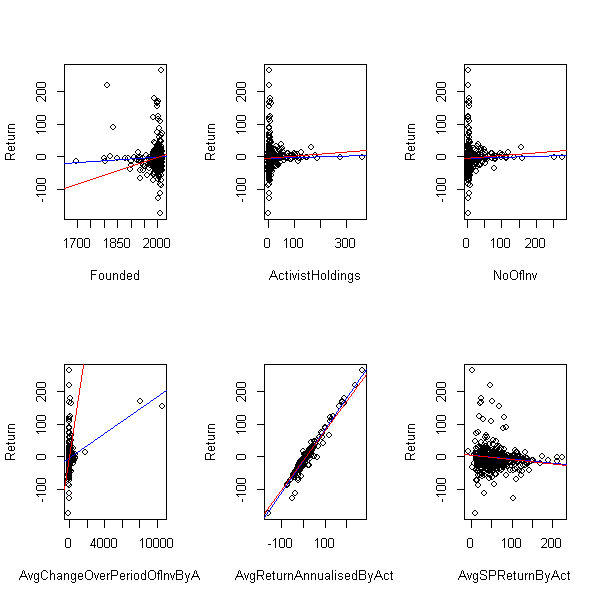

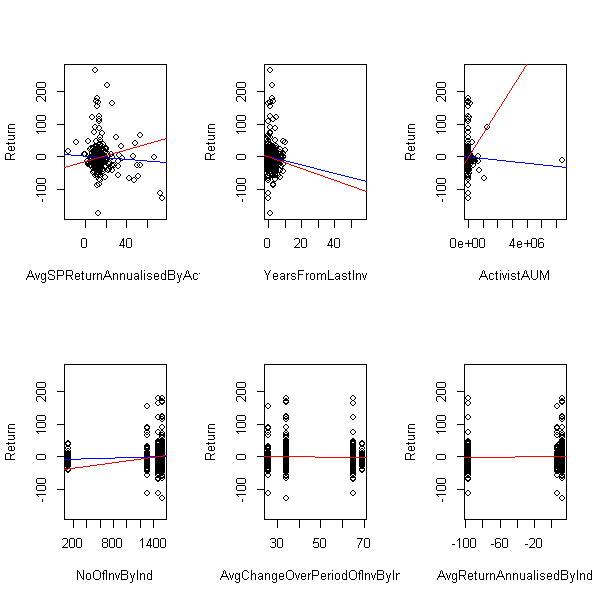

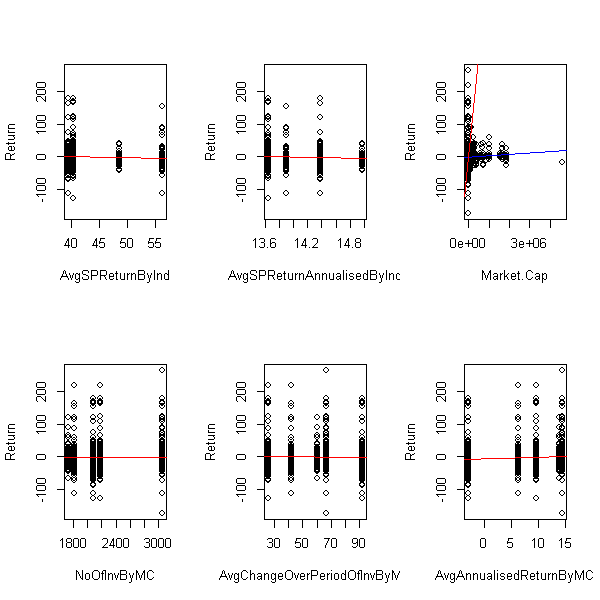

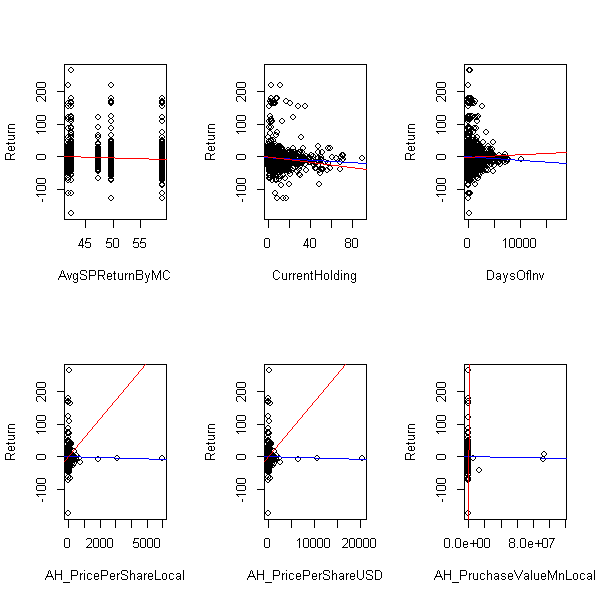

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): 'a' and 'b' must be finite


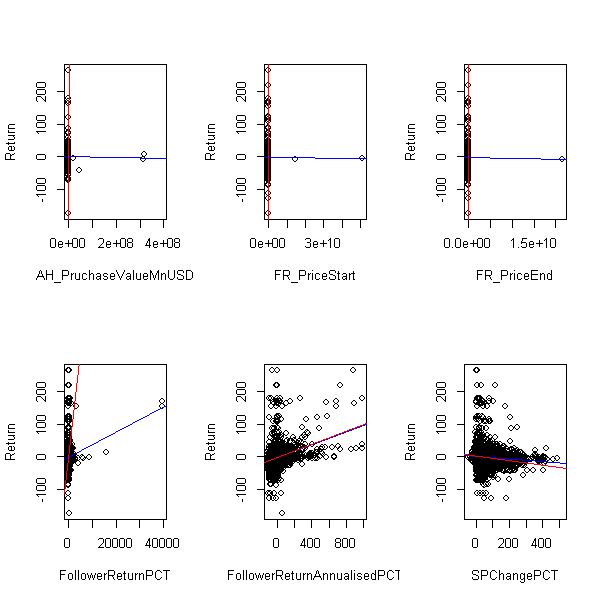

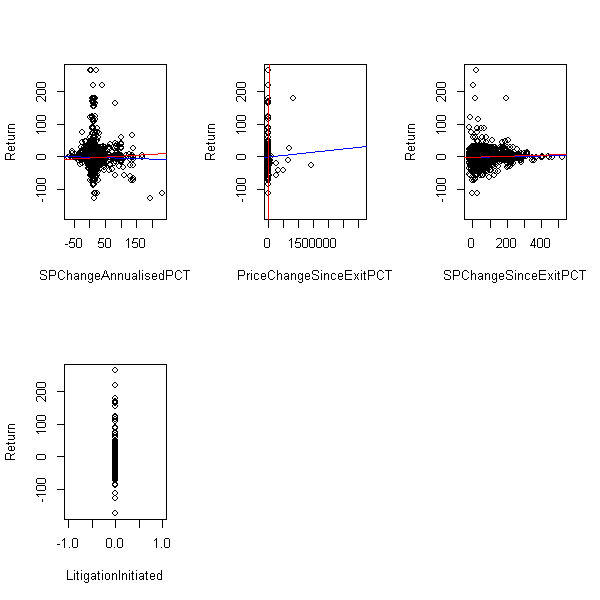

In [158]:
par(mfrow=c(2,3))
for (v in Activism_continuousV){
            a1 <- min(df[[v]],na.rm=TRUE)
            a2 <- max(df[[v]],na.rm=TRUE)
            b1 <- df %>% select(ExcessReturn,v)   
            b2 <- df %>% select(ExcessReturn,v) %>% filter(df_outliers[[paste(v,'out',sep='_')]]==0) 
            plot (b1[[v]],b1$ExcessReturn,xlab=v,ylab='Return',xlim=c(a1,a2))
            abline(coef(lm(b1$ExcessReturn~b1[[v]])), col='blue')
            if (length(unique(b2[[v]]))!=1){
            abline(coef(lm(b2$ExcessReturn~b2[[v]])), col = "red")}
    }


<head>
<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
</style>
</head>
<body>

<h2>Table with variables having outliers</h2>
<p>Comparing the distributions with/without outliers showed me that some of the distributions were about to change, transformation was done to avoid such case. In cases where the distribution and the result of the model didn’t change, I used categorization method.
Here are the conclusions for outliers’ treatment:</p>

<table>
<style>
th, td {
  padding: 15px;
}
th, tr, td {
  text-align: left;
}
table {
  border-spacing: 5px;
}
table, tr td:first-child {
  width: 100px;
}
table tr td:nth-child(2) {
  width: 200px;
}
table tr td:last-child {
  width: 300px;
}
</style>
  <tr>
    <th>Variable</th>
    <th>Treatment</th> 
    <th>Why</th>
  </tr>  
  <tr>
    <td>Founded</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>ActivistHoldings</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>NoOfInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByAct</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AvgSPReturnByAct</td>
    <td>Drop</td> 
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnAnnualisedByAct</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>YearsFromLastInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>ActivistAUM</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>NoOfInvByInd</td>
    <td>Drop</td>
    <td>It changes the assumption but dosen't change the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgReturnAnnualisedByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
  <td>AvgSPReturnAnnualisedByInd</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>Market.Cap</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>NoOfInvByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgChangeOverPeriodOfInvByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgAnnualisedReturnByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AvgSPReturnByMC</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>CurrentHolding</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>DaysOfInv</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>AH_PricePerShareLocal</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PricePerShareUSD</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PruchaseValueMnLocal</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>AH_PruchaseValueMnUSD</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FR_PriceStart</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FR_PriceEnd</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FollowerReturnPCT</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>FollowerReturnAnnualisedPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangePCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangeAnnualisedPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>PriceChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It changes the results but dosen't change the assumption</td>
  </tr>
  <tr>
    <td>SPChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SPChangeSinceExitPCT</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SeatsProposed</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
  <tr>
    <td>SeatsGained</td>
    <td>Drop</td>
    <td>It dosen't change the assumption nor the results</td>
  </tr>
</table>

</body>



In [62]:
#if(!require(dgof)) {install.packages("dgof");require(dgof)}

In [63]:
#x = df$NoOfInv
#y = df$AvgReturnAnnualisedByAct
#ks.test(x=x, y=y, alternative="two.sided",simulate.p.value=TRUE)

### Cleansed dataset for Outliers

In [153]:
l1 <- setdiff(Activism_continuous, "ExcessReturnByCamp")

In [154]:
l1

[1] "Founded"                       "AvgChangeOverPeriodOfInvByAct"
 [3] "AvgReturnAnnualisedByAct"      "AvgSPReturnByAct"             
 [5] "AvgSPReturnAnnualisedByAct"    "ExcessReturnByAct"            
 [7] "ReturnByCamp"                  "ReturnAnnualisedByCamp"       
 [9] "SPChangeByCamp"                "SPChangeAnnualisedByCamp"     
[11] "NoOfCamp"                      "PositiveReturnByCamp"         
[13] "HitRatioByAct"                 "CampByIND"                    
[15] "PositiveReturnByIND"           "HitRatioByIND"                
[17] "NoOfInvByIND"                  "AvgChangeOverPeriodOfInvByIND"
[19] "AvgReturnAnnualisedByIND"      "AvgSPReturnByIND"             
[21] "AvgSPReturnAnnualisedByIND"    "MarketCap"                    
[23] "CampByMC"                      "PositiveReturnByMC"           
[25] "HitRatioByMC"                  "NoOfInvByMC"                  
[27] "AvgChangeOverPeriodOfInvByMC"  "AvgAnnualisedReturnByMC"      
[29] "AvgSPReturnByMC"               "AH_PricePerShareLocal"        
[31] "AH_PruchaseValueMnLocal"       "FR_PriceStart"                
[33] "FR_PriceEnd"                   "PriceChangeSinceExitByCamp"   
[35] "SPChangeSinceExitByCamp"       "ActivistAUM"                  
[37] "CurrentHolding"                "SeatsProposed"                
[39] "SeatsGained"

In [155]:
## function which takes a dataframe and a vector of names and transforms outliers to NA
## at the features which are in the vector
outlierRepNAMatrix <- function(data,vec,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]]) & (v %in% vec)) {
            med <- median(data[[v]],na.rm = TRUE)
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]]  > outhigh & v!='Return',NA,data[[v]])
            outdata[v] <- mv
        } else {
            outdata[v] <- data[[v]]
        }
    }
    return(outdata)
}

In [156]:
df.noout <- outlierRepNAMatrix(df,l1) 

In [157]:
df.noout <- df.noout[,! names(df.noout) %in% c('row1')]

In [263]:
summary(df.noout)

  Investor.ID      Activist          ActivistHQ        ActivistRegion    
 Min.   :    2   Length:12326       Length:12326       Length:12326      
 1st Qu.: 5087   Class :character   Class :character   Class :character  
 Median : 5760   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 5438                                                           
 3rd Qu.: 6481                                                           
 Max.   :11052                                                           
                                                                         
    Founded     ActivistYaers     ActivistHoldings    NoOfInv     
 Min.   :1968   Min.   :-1.0000   Min.   :  1.00   Min.   :  3.0  
 1st Qu.:1993   1st Qu.: 0.0000   1st Qu.:  3.00   1st Qu.: 10.0  
 Median :2002   Median : 0.0000   Median : 19.00   Median : 32.0  
 Mean   :2000   Mean   :-0.0091   Mean   : 43.59   Mean   : 47.6  
 3rd Qu.:2009   3rd Qu.: 0.0000   3rd Qu.: 73.00   3rd Qu.: 76.0  
 Max. 

In [265]:
write.csv(df,"C:\\Users\\user\\Documents\\Activism\\ActivisimCleansedDF.csv",row.names = FALSE )

In [250]:
na.omit(df.noout$ExcessReturn)

[1]  -8.26  -8.26  -8.26  -8.26  -8.26  -8.26  -8.26 -14.25 -14.25 -14.25
  [11] -14.25 -14.25 -14.25 -14.25 -14.25 -14.25 -14.25 -14.25 -14.25 -14.25
  [21] -14.25 -14.25 -14.25 -14.25 -14.25  19.63  19.63  19.63  19.63  19.63
  [31]  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63
  [41]  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63
  [51]  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63
  [61]  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63
  [71]  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63  19.63
  [81]  19.63  19.63  19.63  19.63  19.63  19.63  -7.41  -7.41  -7.41  -7.41
  [91]  -7.41  -7.41  -7.41  -7.41  -7.41  -7.41  -7.41  -7.41  -7.41  -7.41
 [101] -10.60 -10.60 -10.60 -10.60 -14.32 -14.32 -14.32 -14.32 -14.32  -2.89
 [111]  -2.89  -2.89  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [121]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [131]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [141]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [151]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [161]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [171]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [181]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [191]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [201]  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82  -7.82
 [211]  -7.82 -10.53 -10.53 -10.53 -10.53 -10.53 -10.53  -4.14  -4.14  -4.14
 [221]  -4.14  -4.14  -4.14 -14.88 -14.88 -14.88 -14.88 -14.88 -14.88 -14.88
 [231] -14.88 -14.88 -14.88 -14.88 -14.88  12.13  12.13  12.13   0.02   0.02
 [241]   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02
 [251]   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02
 [261]   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02   0.02
 [271]   0.02   0.02   0.02   0.02   0.02   0.02  -1.48  -1.48  -1.48  -1.48
 [281]  -1.48  -1.48  -1.48  -1.48  -1.48  -1.48  -1.48  16.51  16.51  16.51
 [291] -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72
 [301] -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72 -13.72
 [311] -13.33 -13.33 -13.33 -13.33 -13.33 -13.33 -13.33 -13.33 -13.33 -24.19
 [321] -24.19 -24.19 -24.19 -24.19 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [331] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [341] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [351] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [361] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [371] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [381] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [391] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [401] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [411] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [421] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [431] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05
 [441] -13.05 -13.05 -13.05 -13.05 -13.05 -13.05 -13.05  -1.46  -1.46  -1.46
 [451]  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46
 [461]  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46
 [471]  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46
 [481]  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46
 [491]  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  -1.46  14.94
 [501]  14.94  14.94  14.94  14.94  14.94  14.94  14.94  -7.54  -7.54  -7.54
 [511] -22.99 -22.99 -22.99 -22.99 -22.99 -22.99 -22.99 -22.99 -22.99  14.79

In [251]:
summary(df.noout$ExcessReturn)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-25.350  -7.160  -2.570  -2.768   2.400  21.280    4435 

## Missing values

In [170]:
getMissingness(df.noout)

list(var = c(51, 52, 48, 50, 164, 165, 174, 39, 60, 42), na_count = c(11121, 11121, 10877, 10877, 10184, 10153, 10135, 8694, 8523, 8306), rate = c(90.2, 90.2, 88.2, 88.2, 82.6, 82.4, 82.2, 70.5, 69.1, 67.4))This dataset has 0 (0%) complete rows. Original data has 12326 rows.



$missingness
                                      var na_count rate
1                 AH_PruchaseValueMnLocal    11121 90.2
2                   AH_PruchaseValueMnUSD    11121 90.2
3                   AH_PricePerShareLocal    10877 88.2
4                     AH_PricePerShareUSD    10877 88.2
5                           SeatsProposed    10184 82.6
6                             SeatsGained    10153 82.4
7                                   Buyer    10135 82.2
8                               ThirteenD     8694 70.5
9                    SPChangeSinceExitPCT     8523 69.1
10                         CurrentHolding     8306 67.4
11                           NoOfInvByInd     8240 66.9
12          AvgChangeOverPeriodOfInvByInd     8035 65.2
13               AvgReturnAnnualisedByInd     8035 65.2
14                       AvgSPReturnByInd     8035 65.2
15             AvgSPReturnAnnualisedByInd     8035 65.2
16                PriceChangeSinceExitPCT     7977 64.7
17                             DateExited     5816 47.2
18                               ExitType     5812 47.2
19                      SeatsGainedMethod     5503 44.6
20                            ActivistAUM     4605 37.4
21                           ExcessReturn     4435 36.0
22               AvgReturnAnnualisedByAct     4084 33.1
23                  SPChangeAnnualisedPCT     3924 31.8
24          AvgChangeOverPeriodOfInvByAct     3756 30.5
25                                NoOfInv     3687 29.9
26             AvgSPReturnAnnualisedByAct     3472 28.2
27                        ActivistAUMDate     3465 28.1
28                               Currency     3465 28.1
29                       AvgSPReturnByAct     3164 25.7
30                            FR_PriceEnd     2998 24.3
31            FollowerReturnAnnualisedPCT     2993 24.3
32                            SPChangePCT     2925 23.7
33                          FR_PriceStart     2863 23.2
34                      FollowerReturnPCT     2675 21.7
35                                Founded     2615 21.2
36                             Market.Cap     2205 17.9
37                          ActivistYaers     1918 15.6
38                GainBoardRepresentation     1844 15.0
39              AdoptMajorityVoteStandard     1844 15.0
40                             AmendByLaw     1844 15.0
41                     AmendListingStatus     1844 15.0
42                      BoardIndependence     1844 15.0
43                          BusinessFocus     1844 15.0
44                  BusinessRestructuring     1844 15.0
45                 ChangeBoardComposition     1844 15.0
46                  ClosureOfBusinessUnit     1844 15.0
47                              Dividends     1844 15.0
48                EliminateStaggeredBoard     1844 15.0
49                         EquityIssuance     1844 15.0
50                             ExcessCash     1844 15.0
51                FocusOnGrowthStrategies     1844 15.0
52                     GeneralCostCutting     1844 15.0
53 LackOfInaccurateInformationFromCompany     1844 15.0
54                  OperationalEfficiency     1844 15.0
55          OpposeAcquisitionOfThirdParty     1844 15.0
56                   OpposeEquityIssuance     1844 15.0
57                     OpposeProxyContest     1844 15.0
58                    OpposeSaleOfCompany     1844 15.0
59         PushForAcquisitionOfThirdParty     1844 15.0
60                 PushForCompanyDivision     1844 15.0
61                   PushForSaleOfCompany     1844 15.0
62           PushForOpposeMergingOfShares     1844 15.0
63                       Recapitalization     1844 15.0
64        RedemptionAmendmentOfPoisonPill     1844 15.0
65                    REITorMLPConversion     1844 15.0
66         RemovalOfCEOorOtherBoardMember     1844 15.0
67                           Remuneration     1844 15.0
68                         ReplaceAuditor     1844 15.0
69                      ReplaceManagement     1844 15.0
70                        RestructureDebt     1844 15.0
71         

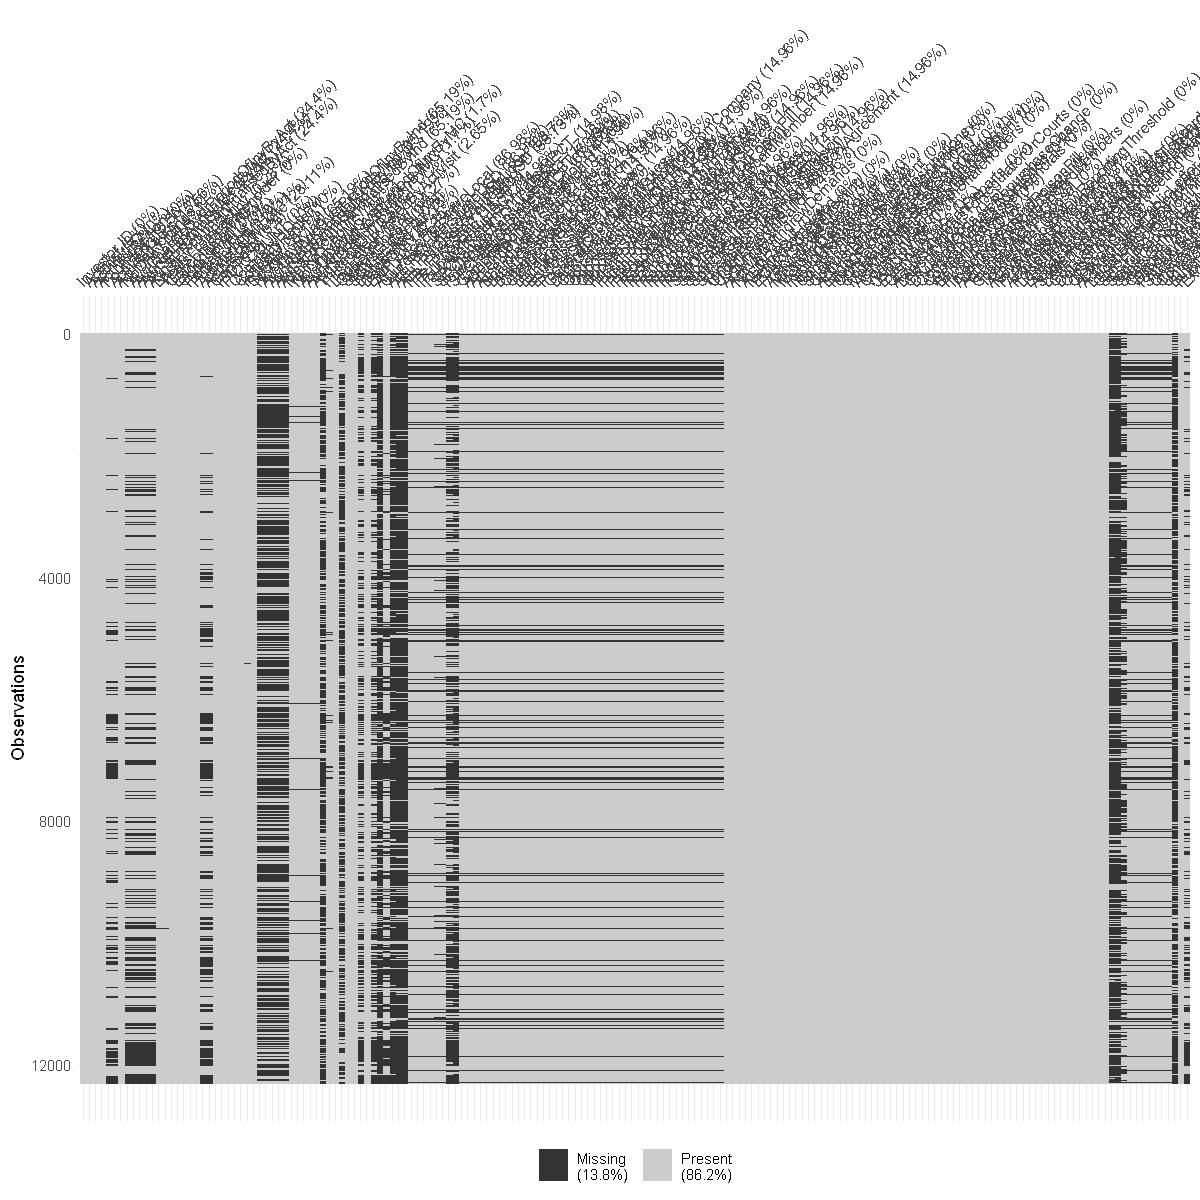

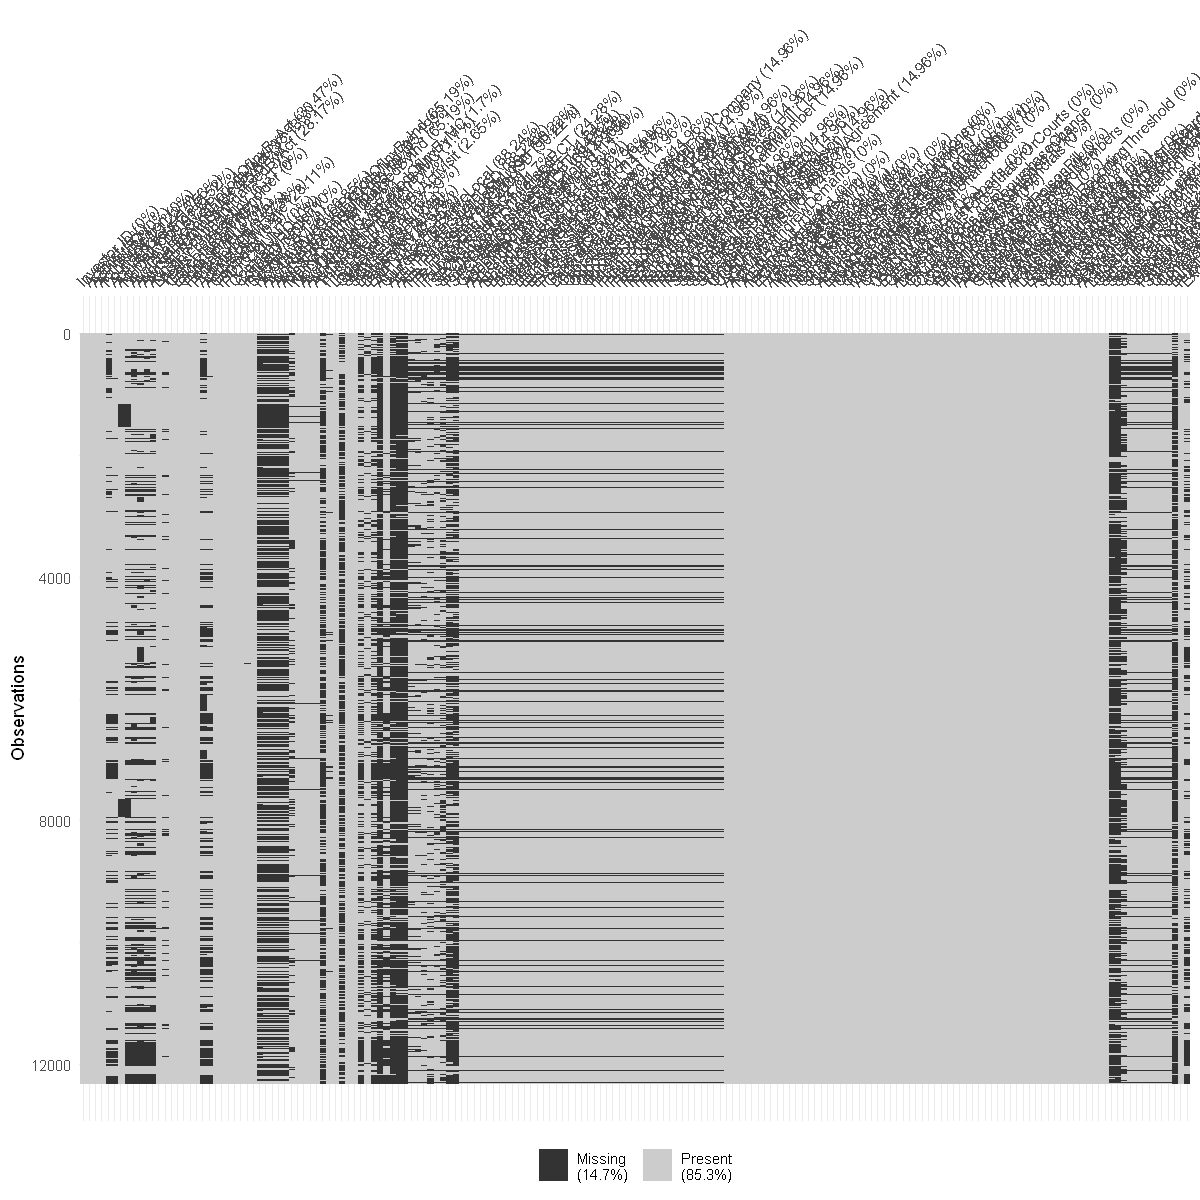

In [175]:

vis_miss(df,warn_large_data=FALSE)
vis_miss(df.noout,warn_large_data=FALSE)
par(mfrow=c(2,3))

In [176]:
## remade the missing matrix to include the new missing values generated by the outliers treatment
df.na <- df.noout
for(i in names(df.noout)) {
    df.na[,i] <- ifelse(is.na(df.na[,i])==T,1,0)
}

In [177]:
missing <- getMissingness(df.noout)
missing

list(var = c(51, 52, 48, 50, 164, 165, 174, 39, 60, 42), na_count = c(11121, 11121, 10877, 10877, 10184, 10153, 10135, 8694, 8523, 8306), rate = c(90.2, 90.2, 88.2, 88.2, 82.6, 82.4, 82.2, 70.5, 69.1, 67.4))This dataset has 0 (0%) complete rows. Original data has 12326 rows.



$missingness
                                      var na_count rate
1                 AH_PruchaseValueMnLocal    11121 90.2
2                   AH_PruchaseValueMnUSD    11121 90.2
3                   AH_PricePerShareLocal    10877 88.2
4                     AH_PricePerShareUSD    10877 88.2
5                           SeatsProposed    10184 82.6
6                             SeatsGained    10153 82.4
7                                   Buyer    10135 82.2
8                               ThirteenD     8694 70.5
9                    SPChangeSinceExitPCT     8523 69.1
10                         CurrentHolding     8306 67.4
11                           NoOfInvByInd     8240 66.9
12          AvgChangeOverPeriodOfInvByInd     8035 65.2
13               AvgReturnAnnualisedByInd     8035 65.2
14                       AvgSPReturnByInd     8035 65.2
15             AvgSPReturnAnnualisedByInd     8035 65.2
16                PriceChangeSinceExitPCT     7977 64.7
17                             DateExited     5816 47.2
18                               ExitType     5812 47.2
19                      SeatsGainedMethod     5503 44.6
20                            ActivistAUM     4605 37.4
21                           ExcessReturn     4435 36.0
22               AvgReturnAnnualisedByAct     4084 33.1
23                  SPChangeAnnualisedPCT     3924 31.8
24          AvgChangeOverPeriodOfInvByAct     3756 30.5
25                                NoOfInv     3687 29.9
26             AvgSPReturnAnnualisedByAct     3472 28.2
27                        ActivistAUMDate     3465 28.1
28                               Currency     3465 28.1
29                       AvgSPReturnByAct     3164 25.7
30                            FR_PriceEnd     2998 24.3
31            FollowerReturnAnnualisedPCT     2993 24.3
32                            SPChangePCT     2925 23.7
33                          FR_PriceStart     2863 23.2
34                      FollowerReturnPCT     2675 21.7
35                                Founded     2615 21.2
36                             Market.Cap     2205 17.9
37                          ActivistYaers     1918 15.6
38                GainBoardRepresentation     1844 15.0
39              AdoptMajorityVoteStandard     1844 15.0
40                             AmendByLaw     1844 15.0
41                     AmendListingStatus     1844 15.0
42                      BoardIndependence     1844 15.0
43                          BusinessFocus     1844 15.0
44                  BusinessRestructuring     1844 15.0
45                 ChangeBoardComposition     1844 15.0
46                  ClosureOfBusinessUnit     1844 15.0
47                              Dividends     1844 15.0
48                EliminateStaggeredBoard     1844 15.0
49                         EquityIssuance     1844 15.0
50                             ExcessCash     1844 15.0
51                FocusOnGrowthStrategies     1844 15.0
52                     GeneralCostCutting     1844 15.0
53 LackOfInaccurateInformationFromCompany     1844 15.0
54                  OperationalEfficiency     1844 15.0
55          OpposeAcquisitionOfThirdParty     1844 15.0
56                   OpposeEquityIssuance     1844 15.0
57                     OpposeProxyContest     1844 15.0
58                    OpposeSaleOfCompany     1844 15.0
59         PushForAcquisitionOfThirdParty     1844 15.0
60                 PushForCompanyDivision     1844 15.0
61                   PushForSaleOfCompany     1844 15.0
62           PushForOpposeMergingOfShares     1844 15.0
63                       Recapitalization     1844 15.0
64        RedemptionAmendmentOfPoisonPill     1844 15.0
65                    REITorMLPConversion     1844 15.0
66         RemovalOfCEOorOtherBoardMember     1844 15.0
67                           Remuneration     1844 15.0
68                         ReplaceAuditor     1844 15.0
69                      ReplaceManagement     1844 15.0
70                        RestructureDebt     1844 15.0
71         

In [213]:
missing_85_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(rate > 85)
    }
na_85_pct <-missing_85_pct(df.noout)
na_85_pct

var                     na.count rate
1 AH_PruchaseValueMnLocal 11121    90.2
2 AH_PruchaseValueMnUSD   11121    90.2
3 AH_PricePerShareLocal   10877    88.2
4 AH_PricePerShareUSD     10877    88.2

Delete Variables with more than 85% missing

In [217]:
drop <- c("AH_PruchaseValueMnLocal","AH_PruchaseValueMnUSD","AH_PricePerShareLocal","AH_PricePerShareUSD")
df.noout = df.noout[,!(names(df.noout) %in% drop)]

In [195]:
missing_5_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(between(rate, 5, 85))
    }
na_5_pct <-missing_5_pct(df.noout)
na_5_pct

var                                  na.count rate
1   SeatsProposed                        10184    82.6
2   SeatsGained                          10153    82.4
3   Buyer                                10135    82.2
4   ThirteenD                             8694    70.5
5   SPChangeSinceExitPCT                  8523    69.1
6   CurrentHolding                        8306    67.4
7   NoOfInvByInd                          8240    66.9
8   AvgChangeOverPeriodOfInvByInd         8035    65.2
9   AvgReturnAnnualisedByInd              8035    65.2
10  AvgSPReturnByInd                      8035    65.2
11  AvgSPReturnAnnualisedByInd            8035    65.2
12  PriceChangeSinceExitPCT               7977    64.7
13  DateExited                            5816    47.2
14  ExitType                              5812    47.2
15  SeatsGainedMethod                     5503    44.6
16  ActivistAUM                           4605    37.4
17  ExcessReturn                          4435    36.0
18  AvgReturnAnnualisedByAct              4084    33.1
19  SPChangeAnnualisedPCT                 3924    31.8
20  AvgChangeOverPeriodOfInvByAct         3756    30.5
21  NoOfInv                               3687    29.9
22  AvgSPReturnAnnualisedByAct            3472    28.2
23  ActivistAUMDate                       3465    28.1
24  Currency                              3465    28.1
25  AvgSPReturnByAct                      3164    25.7
26  FR_PriceEnd                           2998    24.3
27  FollowerReturnAnnualisedPCT           2993    24.3
28  SPChangePCT                           2925    23.7
29  FR_PriceStart                         2863    23.2
30  FollowerReturnPCT                     2675    21.7
... ...                                  ...      ... 
56  PushForCompanyDivision               1844     15.0
57  PushForSaleOfCompany                 1844     15.0
58  PushForOpposeMergingOfShares         1844     15.0
59  Recapitalization                     1844     15.0
60  RedemptionAmendmentOfPoisonPill      1844     15.0
61  REITorMLPConversion                  1844     15.0
62  RemovalOfCEOorOtherBoardMember       1844     15.0
63  Remuneration                         1844     15.0
64  ReplaceAuditor                       1844     15.0
65  ReplaceManagement                    1844     15.0
66  RestructureDebt                      1844     15.0
67  ReturnCashToShareholders             1844     15.0
68  SellOrRetainAssets                   1844     15.0
69  SeparateChairmanAndCEO               1844     15.0
70  ShareRepurchase                      1844     15.0
71  SpinOffSaleOfBusinessDivision        1844     15.0
72  SuccessionPlanning                   1844     15.0
73  TerminateInvestmentAdvisoryAgreement 1844     15.0
74  UnderLeverage                        1844     15.0
75  UseUniversalBallot                   1844     15.0
76  Ongoing                              1844     15.0
77  WithdrewDemands                      1844     15.0
78  PartiallySuccessful                  1844     15.0
79  Successful                           1844     15.0
80  Unsuccessful                         1844     15.0
81  CompromiseOrSettlement               1844     15.0
82  Unresolved                           1844     15.0
83  DaysOfInv                            1069      8.7
84  YearsFromLastInv                      778      6.3
85  ActivistHoldings                      680      5.5

In [186]:
missing_less_5_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(rate < 5)
    }
na_less_5_pct <-missing_less_5_pct(df.noout)
na_less_5_pct

var                                  na.count rate
1   FirstDateInvestedByActivisit         327      2.7 
2   NoOfInvByMC                          209      1.7 
3   AvgChangeOverPeriodOfInvByMC         209      1.7 
4   AvgAnnualisedReturnByMC              209      1.7 
5   AvgSPReturnByMC                      209      1.7 
6   LastInv                               35      0.3 
7   Industry                               9      0.1 
8   Sector                                 1      0.0 
9   Investor.ID                            0      0.0 
10  Activist                               0      0.0 
11  ActivistHQ                             0      0.0 
12  ActivistRegion                         0      0.0 
13  ConcernedShareholder                   0      0.0 
14  Engagement                             0      0.0 
15  Occasional                             0      0.0 
16  PartialFocus                           0      0.0 
17  PrimaryFocus                           0      0.0 
18  Company                                0      0.0 
19  PID                                    0      0.0 
20  PID_COUNT                              0      0.0 
21  CompanyHQ                              0      0.0 
22  ConpanyRegion                          0      0.0 
23  LongShort                              0      0.0 
24  StatusCurrent                          0      0.0 
25  StatusExisted                          0      0.0 
26  AGM                                    0      0.0 
27  ActivistWithdrewDemands                0      0.0 
28  NA.                                    0      0.0 
29  AGMResult                              0      0.0 
30  MergerCompleted                        0      0.0 
... ...                                  ...      ... 
58  CompanyReleasesFinancials            0        0   
59  WelcomedActivist                     0        0   
60  Bankruptcy                           0        0   
61  ProxyAccess                          0        0   
62  ImplementAmendPoisonPill             0        0   
63  ActivistWinsBoardSeats               0        0   
64  ActivistNominatesBoardMembers        0        0   
65  ThankedActivist                      0        0   
66  ShareholderProposal                  0        0   
67  TenderOffer                          0        0   
68  ActivistDropsBelowReportingThreshold 0        0   
69  NewMergerAnnounced                   0        0   
70  ProxyAdvisorVerdict                  0        0   
71  ActivistStatement                    0        0   
72  PoisonPillImplemented                0        0   
73  LawsuitAgainstActivist               0        0   
74  LetterToFellowShareholders           0        0   
75  ActivistNomineesAppointedToBoard     0        0   
76  SettlementAgreementConcluded         0        0   
77  LetterToBoardOrManagement            0        0   
78  CompanyRejectsBoardNominations       0        0   
79  DelayShareholderMeeting              0        0   
80  CloseFund                            0        0   
81  ClosedAGM                            0        0   
82  ActivistIssuesPublicLetter           0        0   
83  ActivistLetterToRegulatoryBodies     0        0   
84  LitigationInitiated                  0        0   
85  ConsentSolicitationInitiated         0        0   
86  SECFiling                            0        0   
87  PublicDemand                         0        0

Delete rows with less than 5% missings

In [235]:
for (i in na_less_5_pct$var) {
    df.noout <- na.omit(df.noout[[i]])
}


ERROR: Error in df.noout[[i]]: subscript out of bounds


In [232]:
missing_less_5_pct <- function (data, getRows = FALSE) {
       l <- nrow(data)
      vn <- names(data)
    nadf <- data
     cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(rate < 5)
    }
na_less_5_pct <-missing_less_5_pct(df.noout)
na_less_5_pct

var                                  na.count rate
1   FirstDateInvestedByActivisit         327      2.7 
2   NoOfInvByMC                          209      1.7 
3   AvgChangeOverPeriodOfInvByMC         209      1.7 
4   AvgAnnualisedReturnByMC              209      1.7 
5   AvgSPReturnByMC                      209      1.7 
6   LastInv                               35      0.3 
7   Industry                               9      0.1 
8   Sector                                 1      0.0 
9   Investor.ID                            0      0.0 
10  Activist                               0      0.0 
11  ActivistHQ                             0      0.0 
12  ActivistRegion                         0      0.0 
13  ConcernedShareholder                   0      0.0 
14  Engagement                             0      0.0 
15  Occasional                             0      0.0 
16  PartialFocus                           0      0.0 
17  PrimaryFocus                           0      0.0 
18  Company                                0      0.0 
19  PID                                    0      0.0 
20  PID_COUNT                              0      0.0 
21  CompanyHQ                              0      0.0 
22  ConpanyRegion                          0      0.0 
23  LongShort                              0      0.0 
24  StatusCurrent                          0      0.0 
25  StatusExisted                          0      0.0 
26  AGM                                    0      0.0 
27  ActivistWithdrewDemands                0      0.0 
28  NA.                                    0      0.0 
29  AGMResult                              0      0.0 
30  MergerCompleted                        0      0.0 
... ...                                  ...      ... 
58  CompanyReleasesFinancials            0        0   
59  WelcomedActivist                     0        0   
60  Bankruptcy                           0        0   
61  ProxyAccess                          0        0   
62  ImplementAmendPoisonPill             0        0   
63  ActivistWinsBoardSeats               0        0   
64  ActivistNominatesBoardMembers        0        0   
65  ThankedActivist                      0        0   
66  ShareholderProposal                  0        0   
67  TenderOffer                          0        0   
68  ActivistDropsBelowReportingThreshold 0        0   
69  NewMergerAnnounced                   0        0   
70  ProxyAdvisorVerdict                  0        0   
71  ActivistStatement                    0        0   
72  PoisonPillImplemented                0        0   
73  LawsuitAgainstActivist               0        0   
74  LetterToFellowShareholders           0        0   
75  ActivistNomineesAppointedToBoard     0        0   
76  SettlementAgreementConcluded         0        0   
77  LetterToBoardOrManagement            0        0   
78  CompanyRejectsBoardNominations       0        0   
79  DelayShareholderMeeting              0        0   
80  CloseFund                            0        0   
81  ClosedAGM                            0        0   
82  ActivistIssuesPublicLetter           0        0   
83  ActivistLetterToRegulatoryBodies     0        0   
84  LitigationInitiated                  0        0   
85  ConsentSolicitationInitiated         0        0   
86  SECFiling                            0        0   
87  PublicDemand                         0        0

## Determinate the Missingness Generation Mechanism
 
There are three mechanisms that generate Missing values:
 
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
 
We will investigate the missingness mechanisms using different techniques.


Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA AH_PruchaseValueMnUSD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8616, df = 183, p-value = 0.06427
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -105765.4 3639517.0
sample estimates:
   mean of x    mean of y 
1767875.2120     999.4141 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


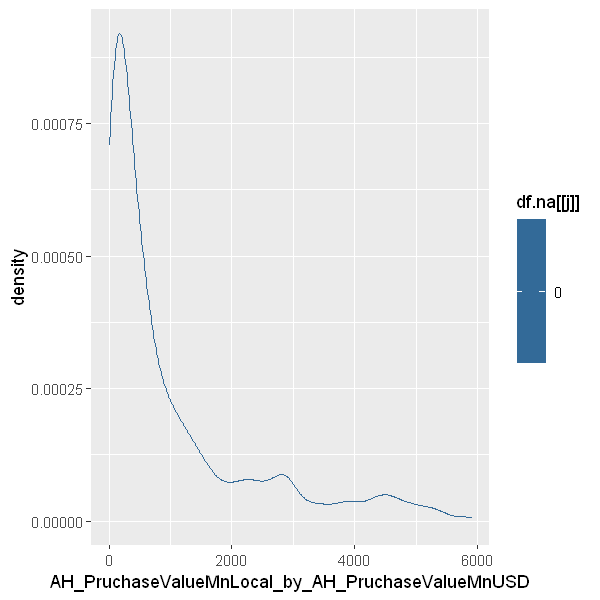

[1] "AH_PruchaseValueMnLocal by NA AH_PricePerShareLocal"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.63614, df = 344.3, p-value = 0.5251
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -499288.4  976640.8
sample estimates:
mean of x mean of y 
 428025.0  189348.8 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


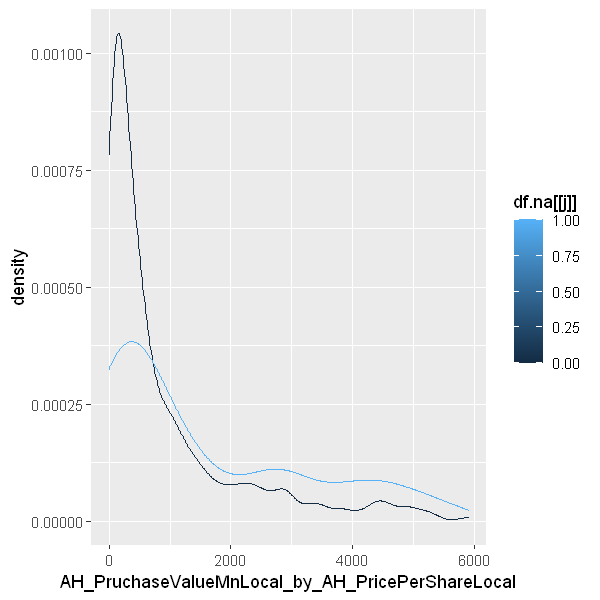

[1] "AH_PruchaseValueMnLocal by NA AH_PricePerShareUSD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.63614, df = 344.3, p-value = 0.5251
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -499288.4  976640.8
sample estimates:
mean of x mean of y 
 428025.0  189348.8 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


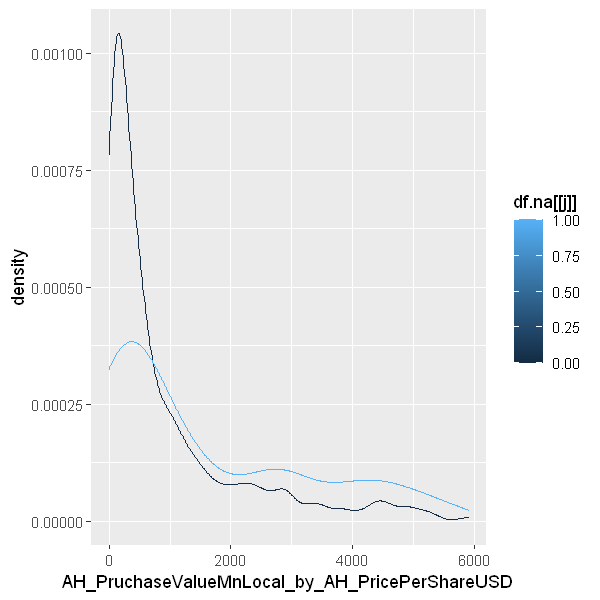

[1] "AH_PruchaseValueMnLocal by NA SeatsProposed"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8422, df = 1139, p-value = 0.06571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18470.54 586047.20
sample estimates:
mean of x mean of y 
285929.90   2141.57 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


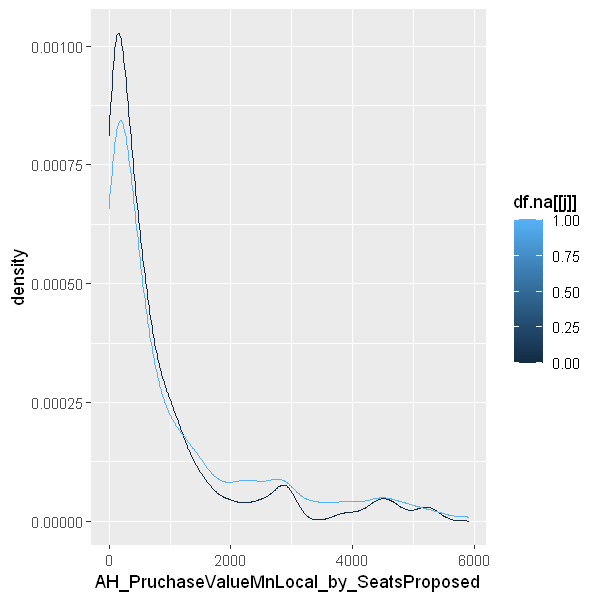

[1] "AH_PruchaseValueMnLocal by NA SeatsGained"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 1.8414, df = 1122, p-value = 0.06583
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18871.73 594797.23
sample estimates:
 mean of x  mean of y 
290202.609   2239.861 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


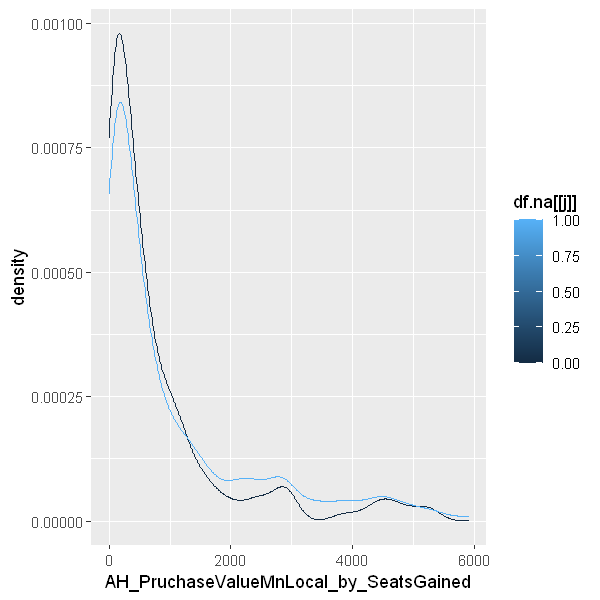

[1] "AH_PruchaseValueMnLocal by NA Buyer"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.70498, df = 6.3097, p-value = 0.506
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1380537  2516768
sample estimates:
mean of x mean of y 
 800308.7  232193.3 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


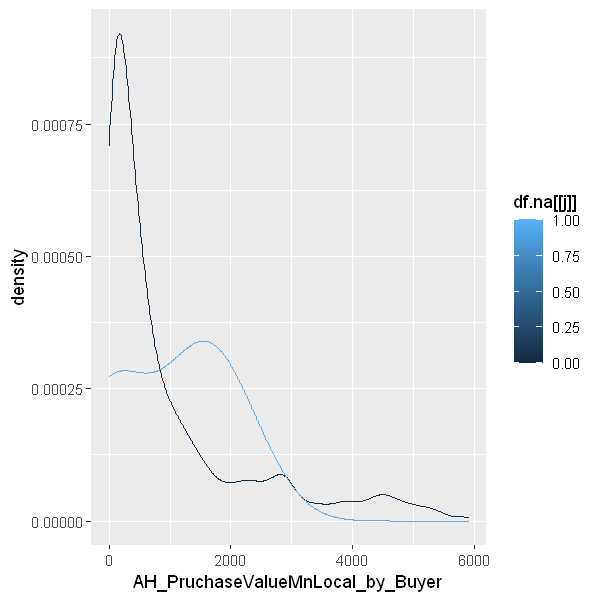

[1] "AH_PruchaseValueMnLocal by NA ThirteenD"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = 0.34432, df = 1335.3, p-value = 0.7307
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -397100.7  566172.3
sample estimates:
mean of x mean of y 
 267982.2  183446.3 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


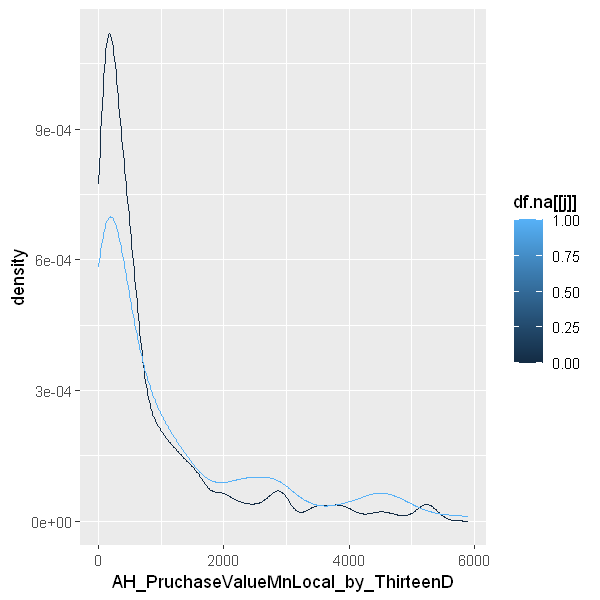

[1] "AH_PruchaseValueMnLocal by NA SPChangeSinceExitPCT"

	Welch Two Sample t-test

data:  b1[[i]] and b2[[i]]
t = -1.2249, df = 318.59, p-value = 0.2215
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1597361.0   371537.7
sample estimates:
mean of x mean of y 
 102236.8  715148.4 



Warning message:
"Use of `df.noout[[i]]` is discouraged. Use `.data[[i]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


[1] "AH_PruchaseValueMnLocal by NA CurrentHolding"


ERROR: Error in t.test.default(b1[[i]], b2[[i]]): not enough 'y' observations


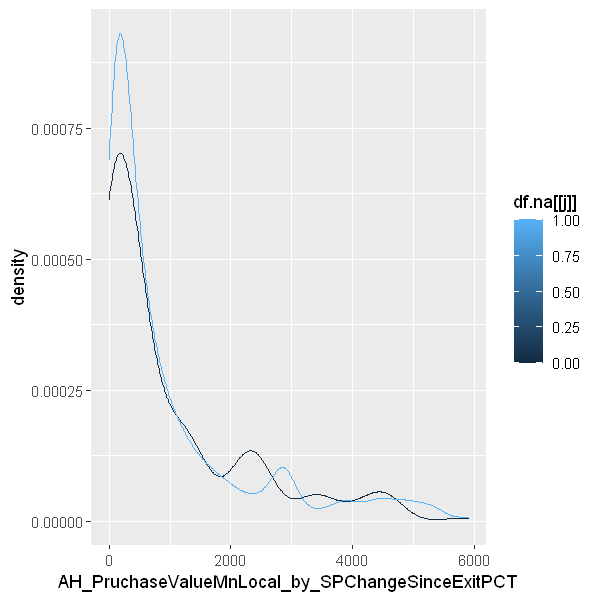

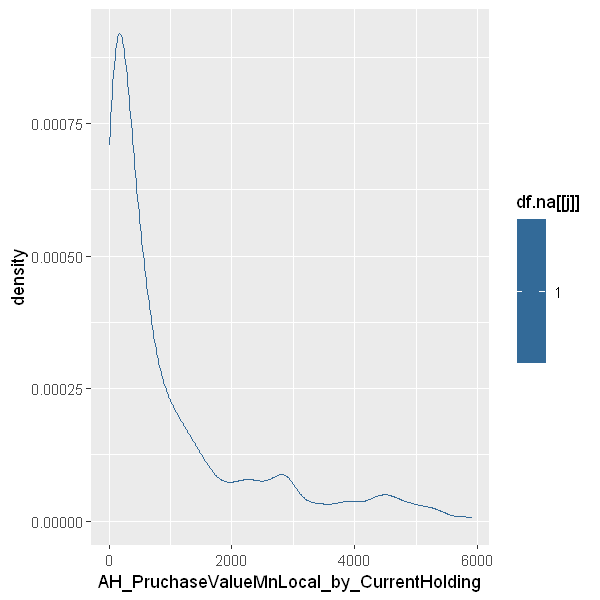

In [183]:
options(repr.plot.width = 5, repr.plot.height = 5)
for (i in (na_5_pct$var)) {
    for (j in (na_5_pct$var)) {
       if(i!=j){
           print(ggplot(df.noout,aes(x=df.noout[[i]],
                                     group=df.na[[j]],
                                     color=df.na[[j]]))+
                 geom_density()+
                 labs(x=paste(i,'_by_',j,sep='')))     
           b1 <- df %>% select (i,j) %>% filter(df.na[j]==1)
           b2 <- df %>% select (i,j) %>% filter(df.na[j]==0)
           print(paste(i,' by NA ', j,sep=''))
           print(t.test(b1[[i]],b2[[i]]))
           
       } 
    }
}


In [188]:
df.miss1<- missingMatrix(df.noout)

Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 680 rows containing non-finite values (stat_density)."



	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 10.71, df = 4062.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.58920 15.33487
sample estimates:
mean of x mean of y 
 46.49817  33.53614 

[1] "ActivistHoldings by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3687 rows containing non-finite values (stat_density)."


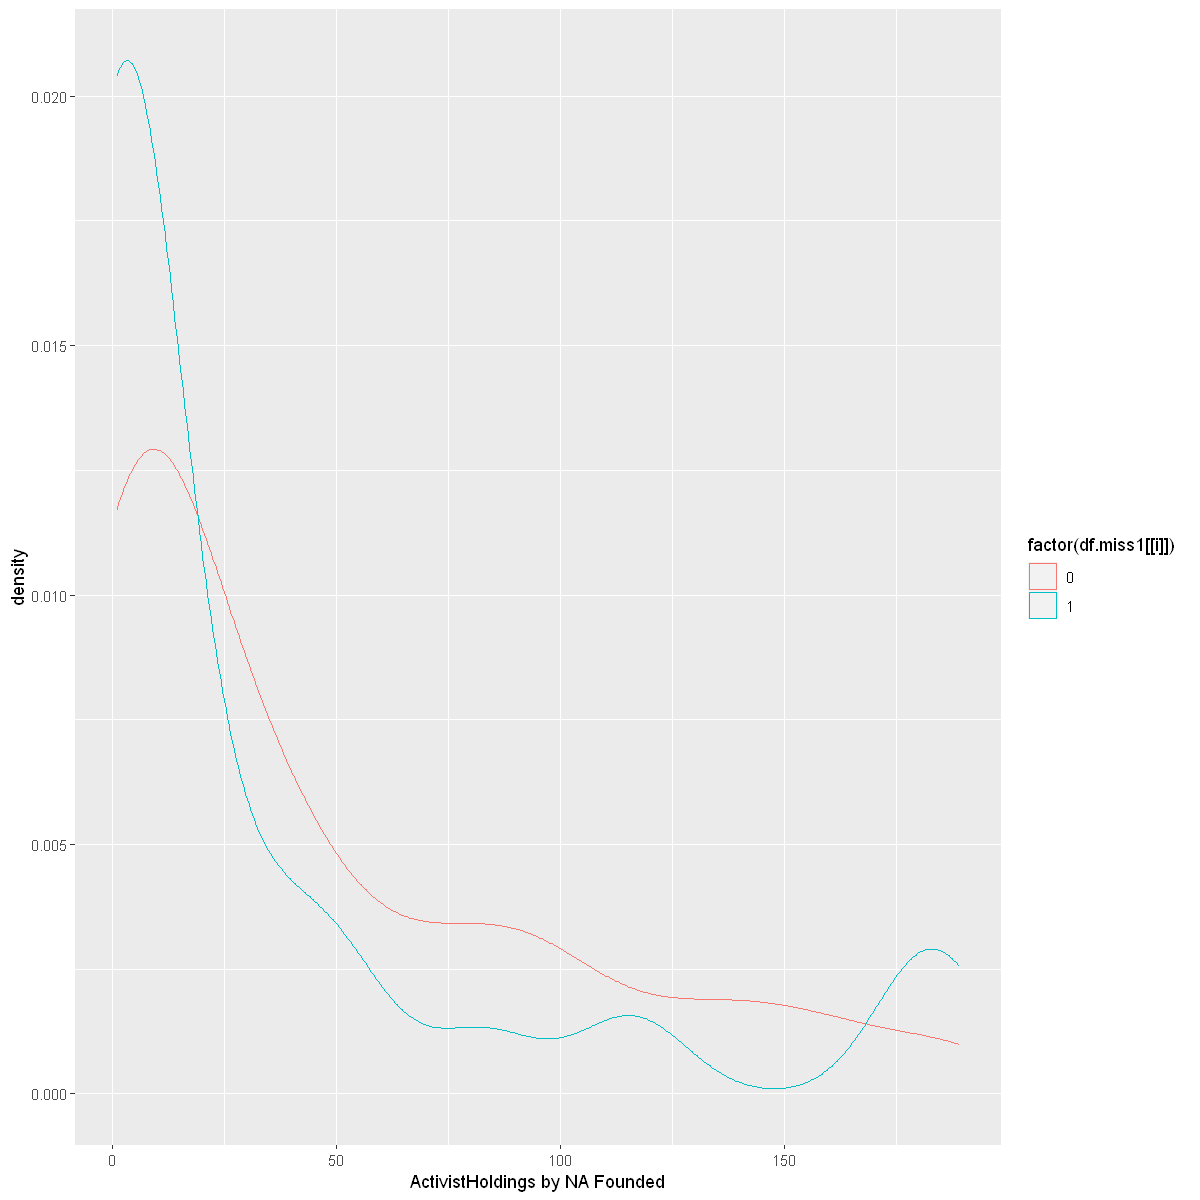


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 12.545, df = 2474.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.20100 15.35158
sample estimates:
mean of x mean of y 
 49.60911  36.33282 

[1] "NoOfInv by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3756 rows containing non-finite values (stat_density)."


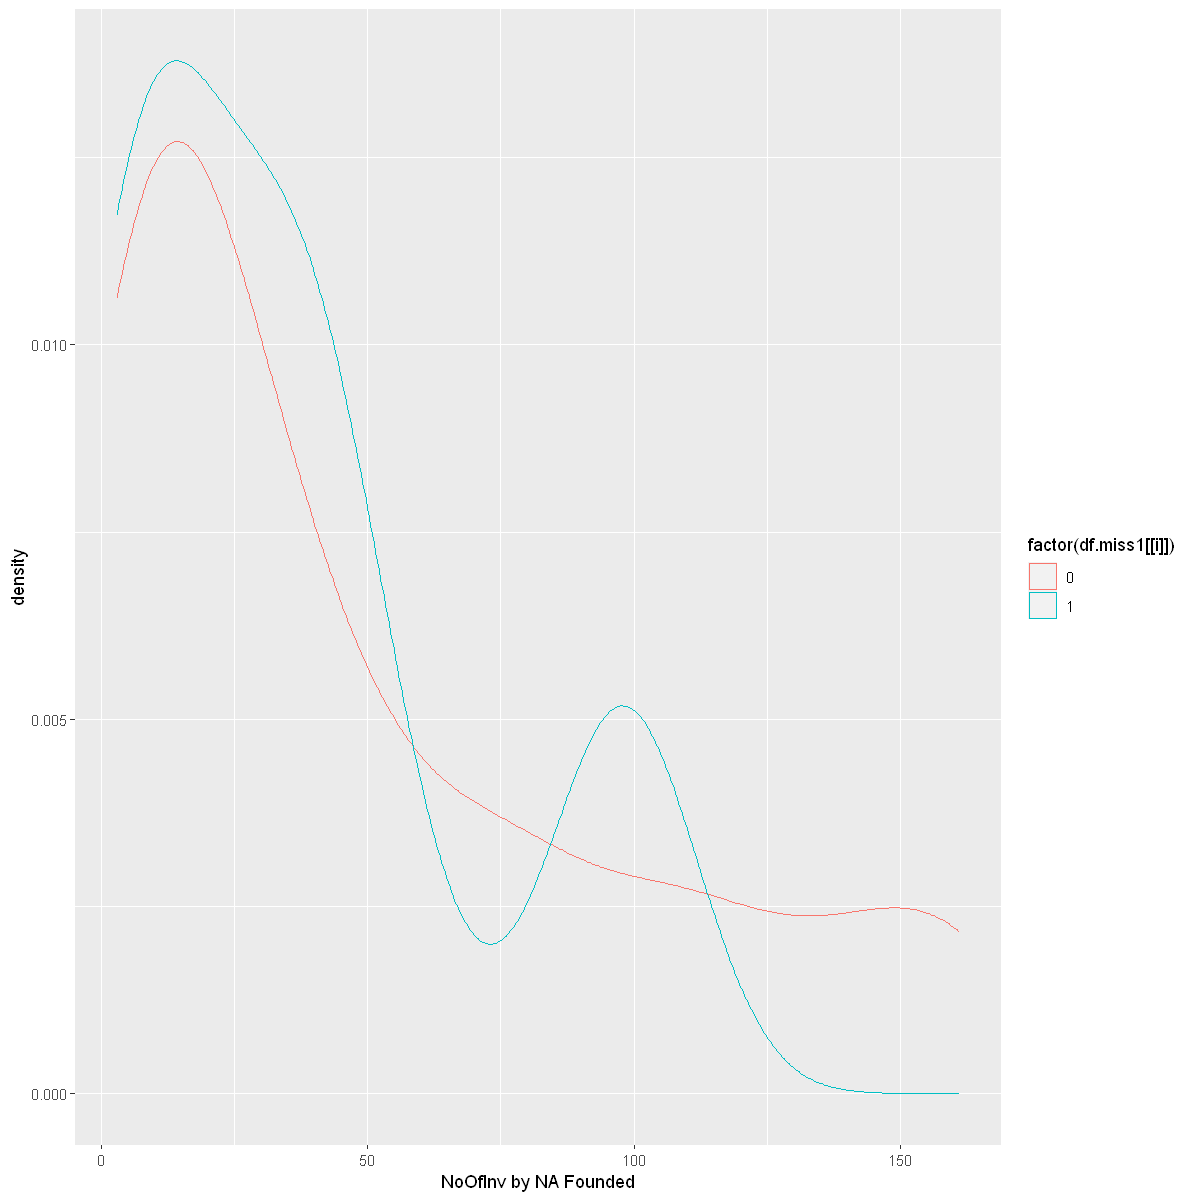


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -28.924, df = 1253.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -37.40514 -32.65319
sample estimates:
mean of x mean of y 
 23.73809  58.76725 

[1] "AvgChangeOverPeriodOfInvByAct by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 4084 rows containing non-finite values (stat_density)."


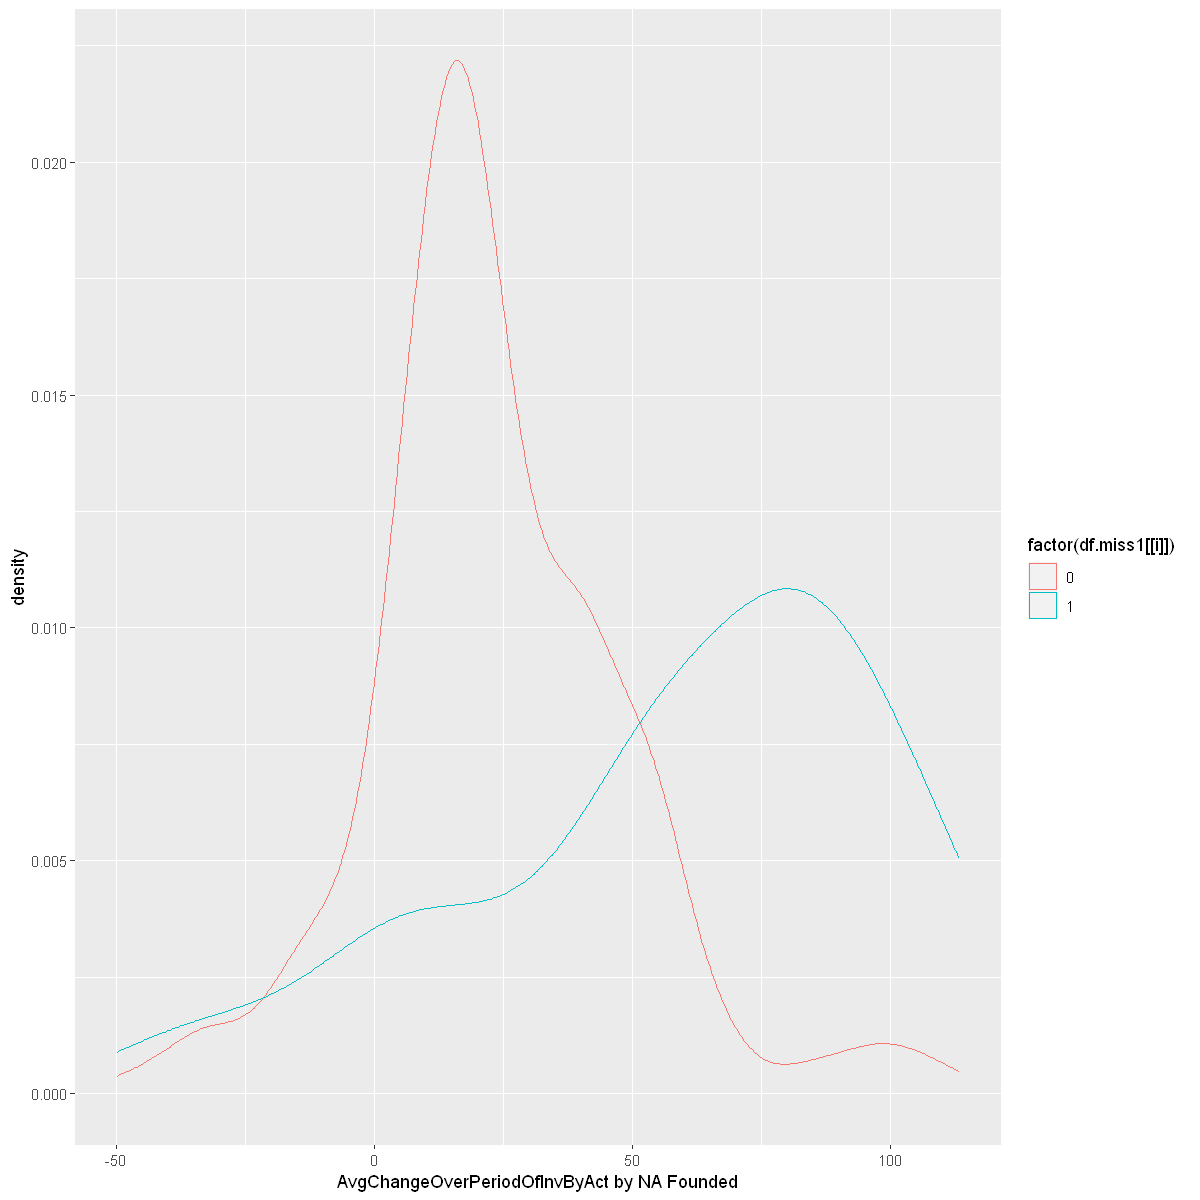


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.5891, df = 1540.2, p-value = 0.0003422
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.5332032 1.8183520
sample estimates:
mean of x mean of y 
10.686915  9.511137 

[1] "AvgReturnAnnualisedByAct by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3164 rows containing non-finite values (stat_density)."


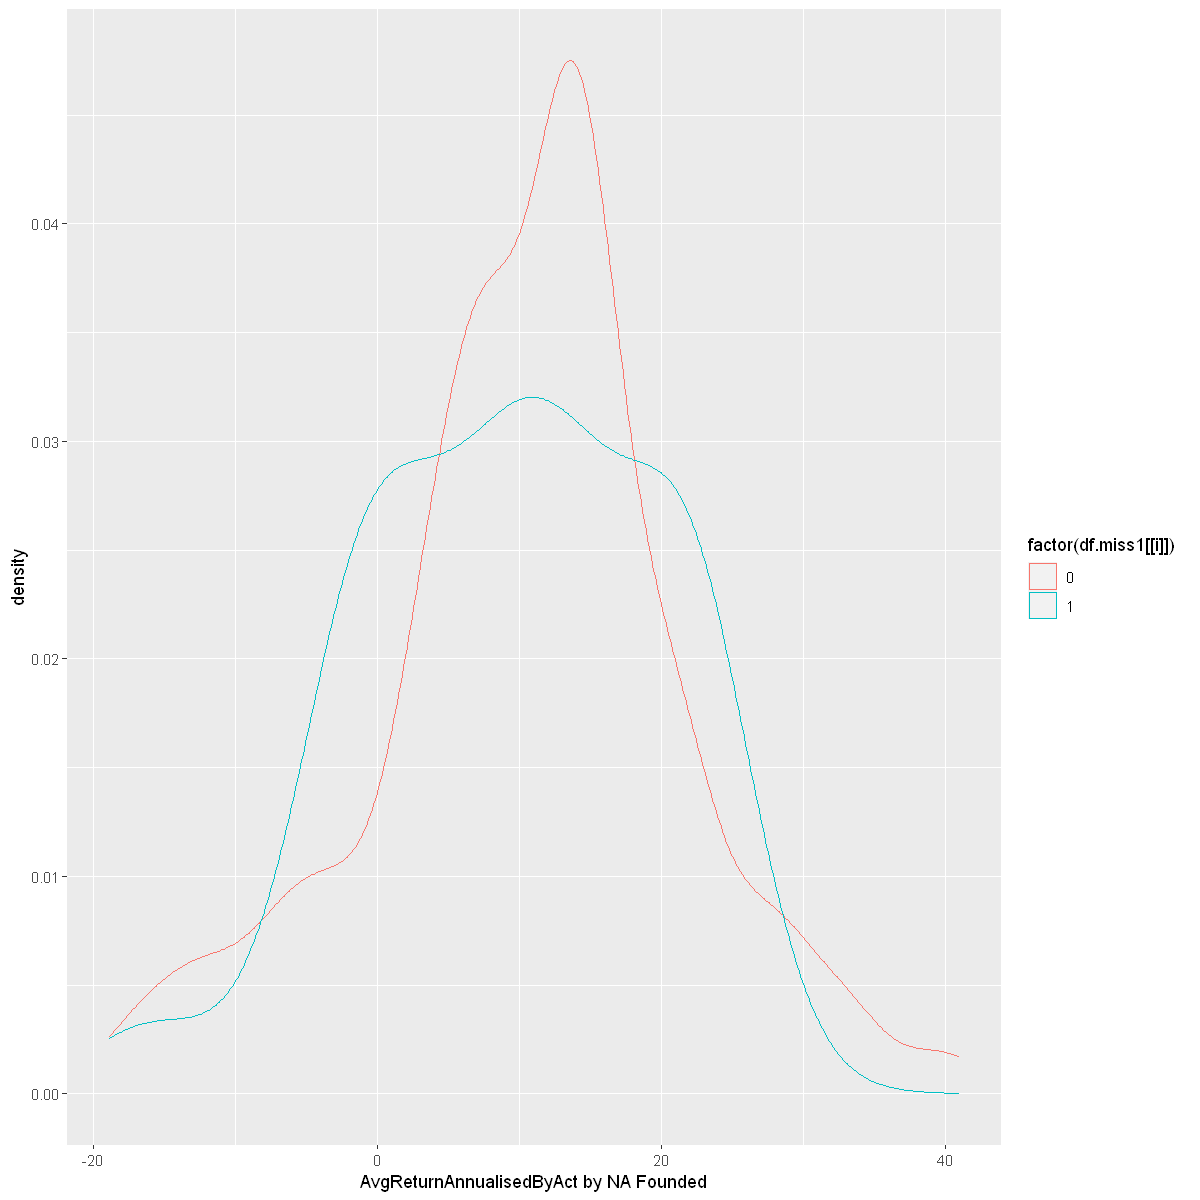


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -42.412, df = 1541.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -40.34733 -36.78026
sample estimates:
mean of x mean of y 
 44.59862  83.16241 

[1] "AvgSPReturnByAct by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3472 rows containing non-finite values (stat_density)."


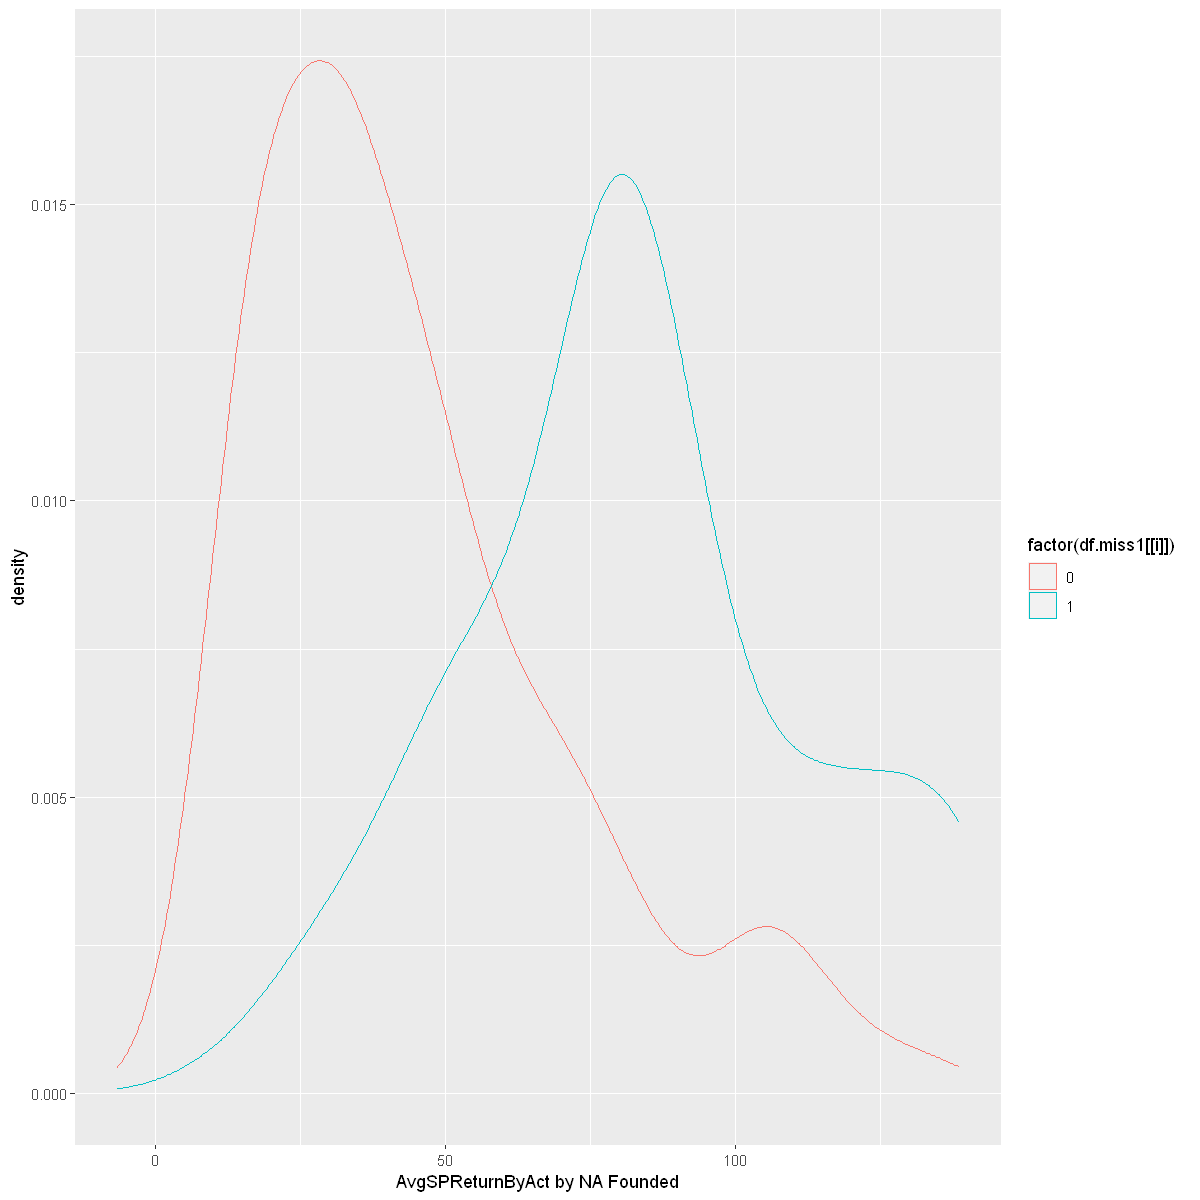


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -8.8635, df = 1407.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0589569 -0.6751659
sample estimates:
mean of x mean of y 
 13.46607  14.33313 

[1] "AvgSPReturnAnnualisedByAct by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 778 rows containing non-finite values (stat_density)."


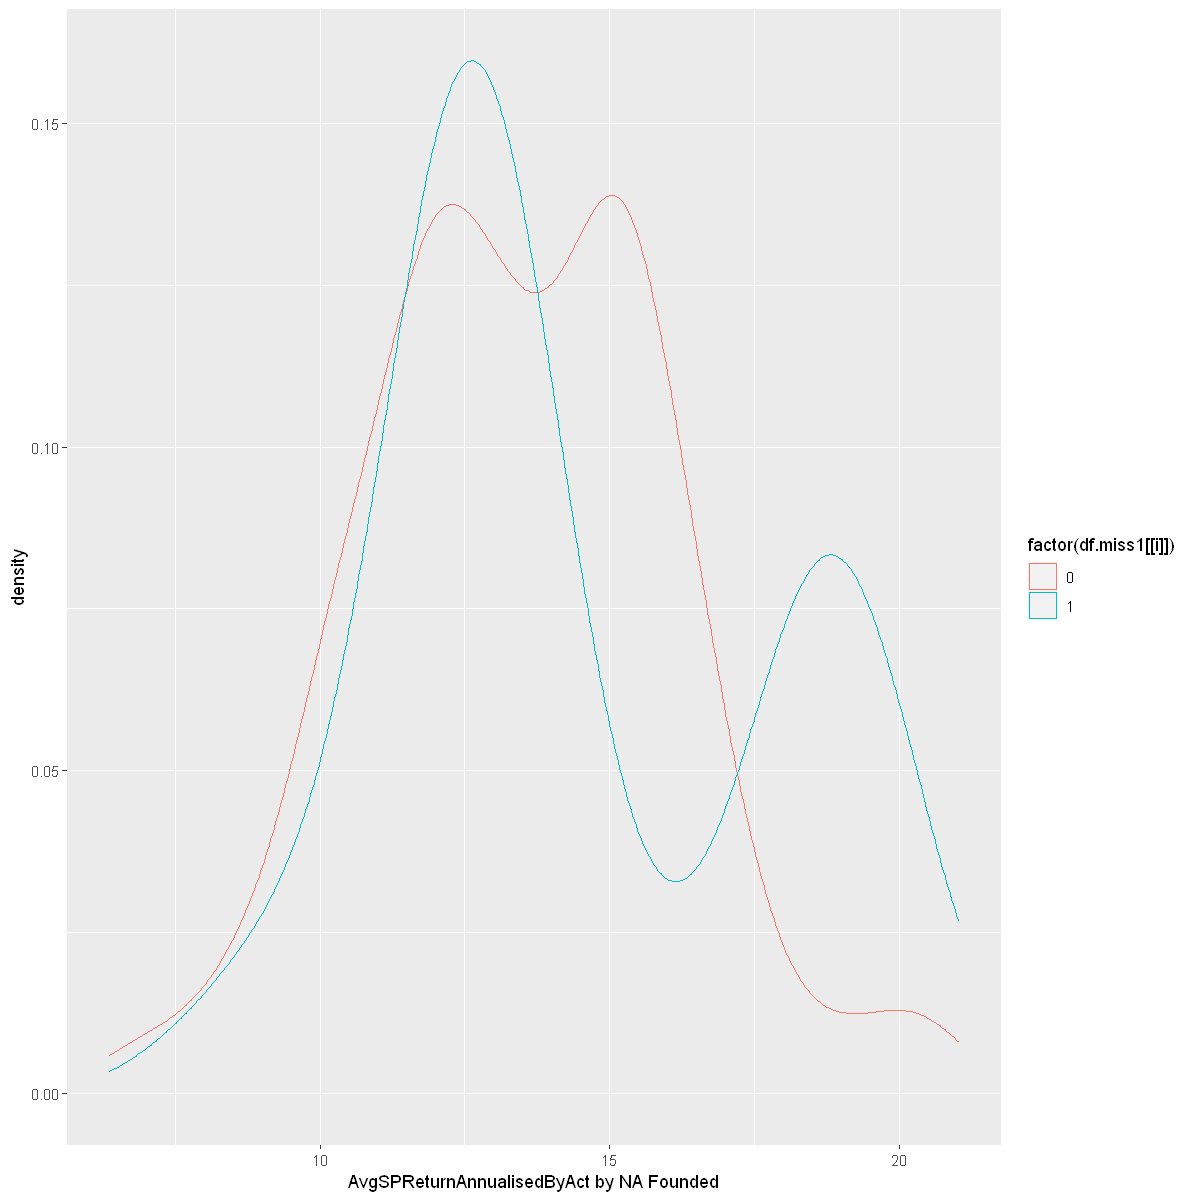


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -11.642, df = 3169.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6705024 -0.4772143
sample estimates:
mean of x mean of y 
 1.582515  2.156373 

[1] "YearsFromLastInv by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 4605 rows containing non-finite values (stat_density)."


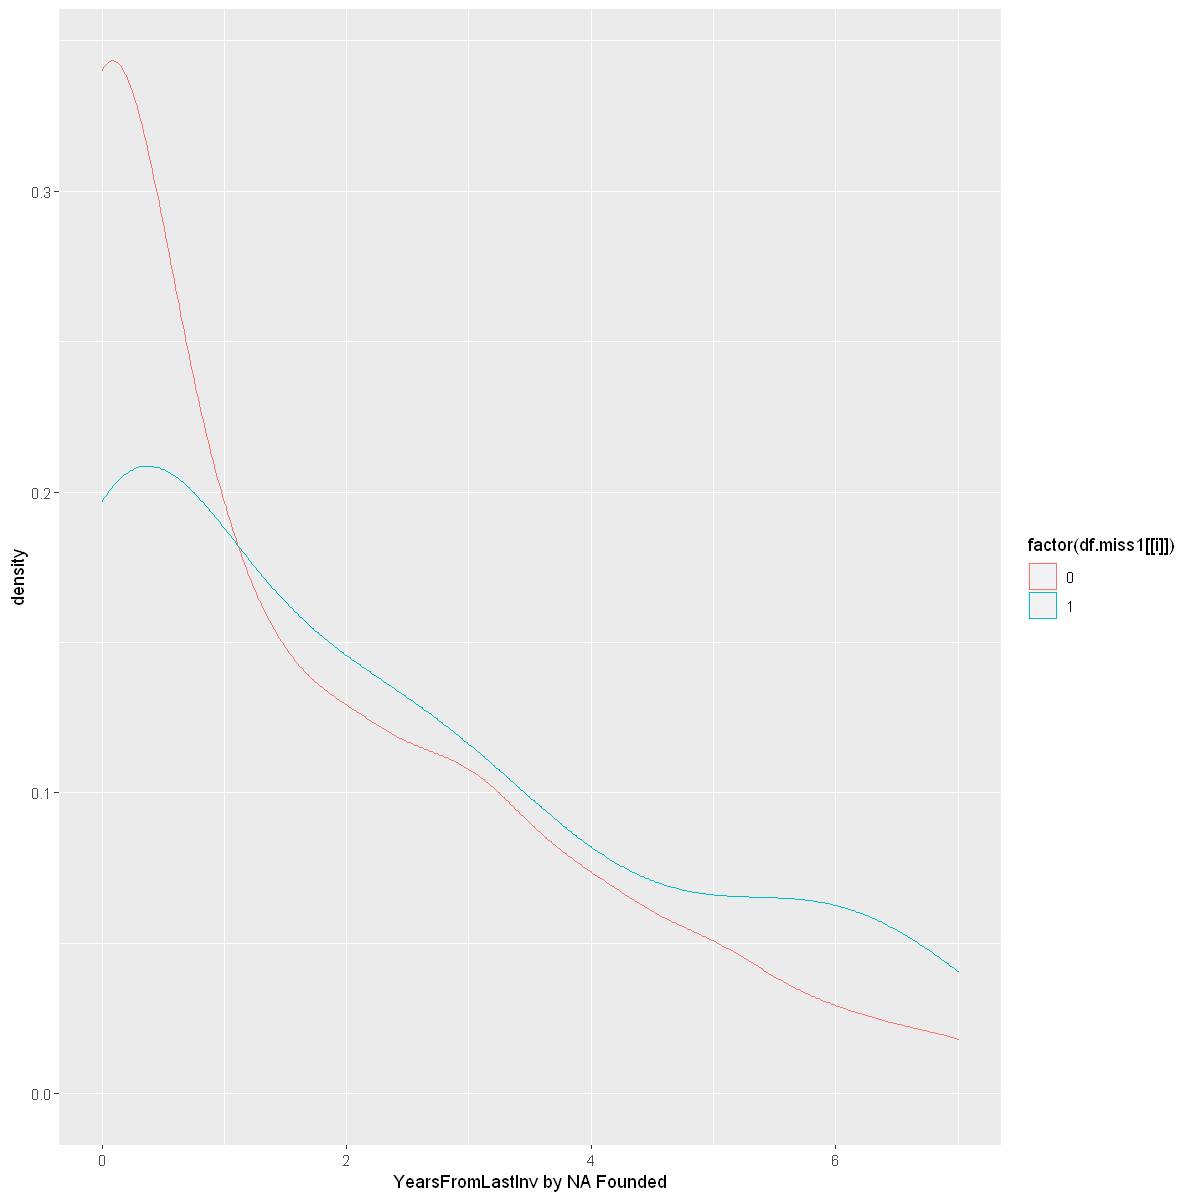


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -0.81673, df = 212.6, p-value = 0.415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -908.7118  376.2917
sample estimates:
mean of x mean of y 
 3405.041  3671.251 

[1] "ActivistAUM by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8240 rows containing non-finite values (stat_density)."


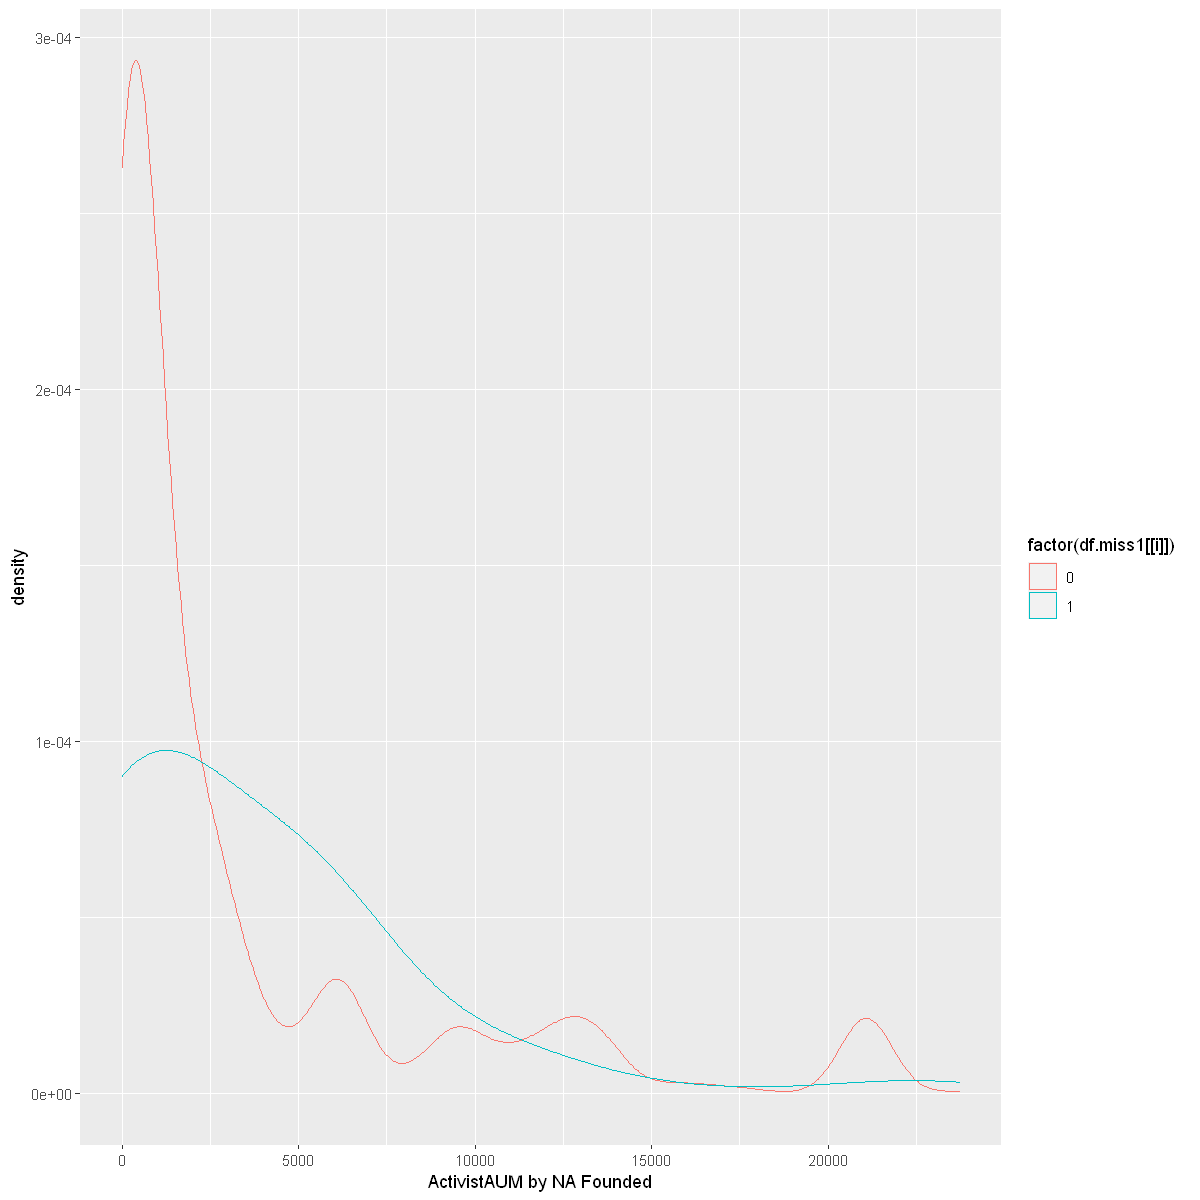


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.18, df = 1252.4, p-value = 6.905e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 22.57402 36.81852
sample estimates:
mean of x mean of y 
 1471.821  1442.125 

[1] "NoOfInvByInd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8035 rows containing non-finite values (stat_density)."


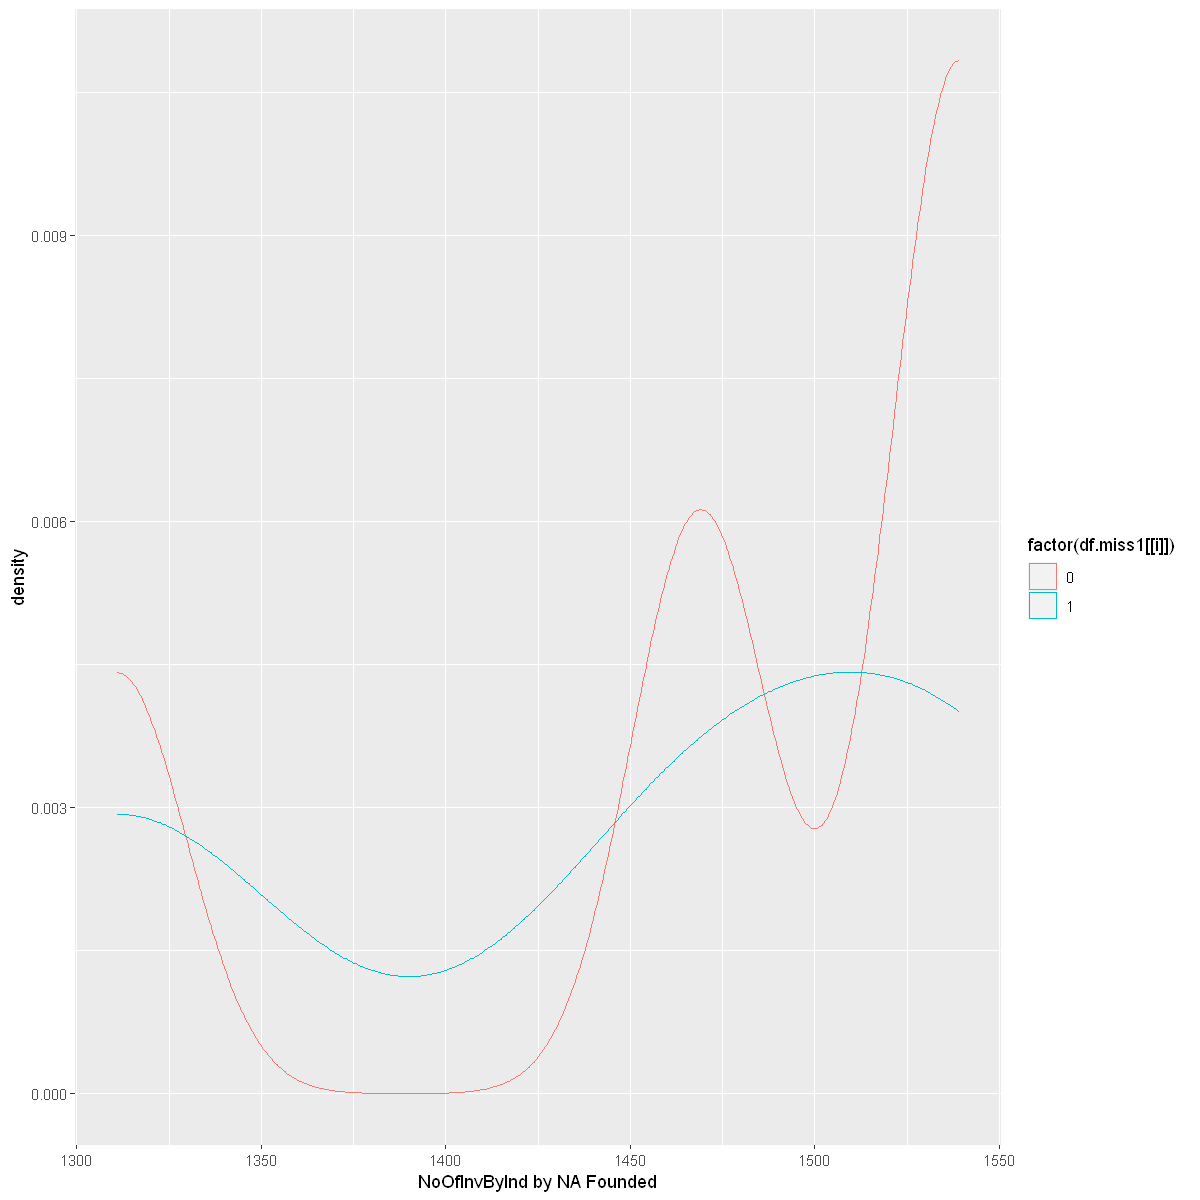


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -2.4981, df = 1404.4, p-value = 0.0126
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.8275266 -0.3400913
sample estimates:
mean of x mean of y 
 42.44559  44.02940 

[1] "AvgChangeOverPeriodOfInvByInd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8035 rows containing non-finite values (stat_density)."


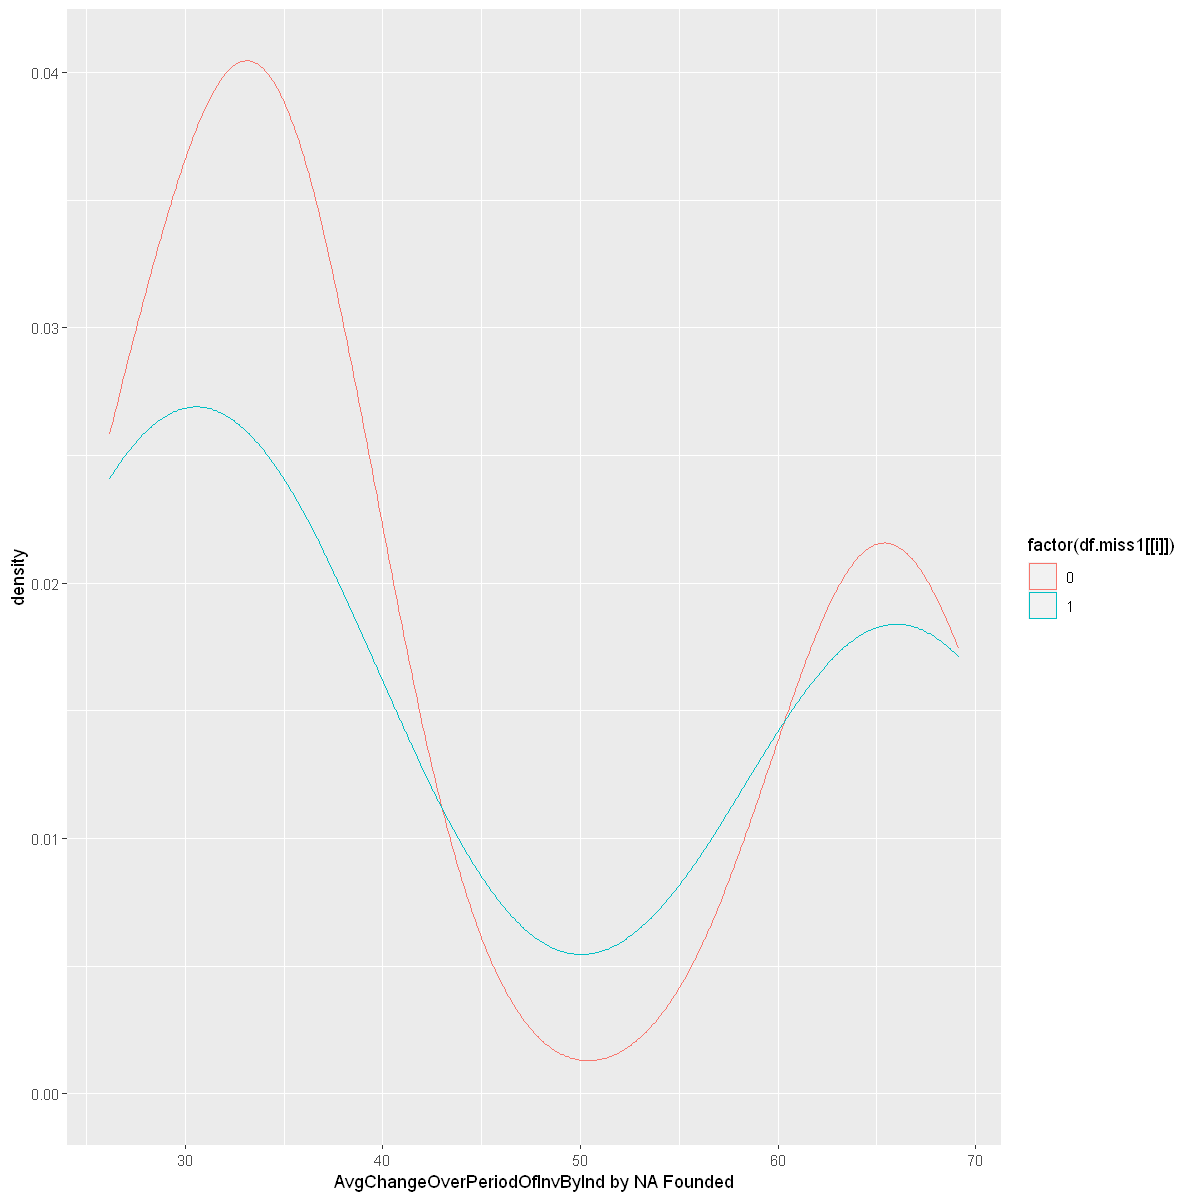


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 0.86268, df = 1527.3, p-value = 0.3885
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.944293  4.997130
sample estimates:
mean of x mean of y 
-18.75373 -20.28015 

[1] "AvgReturnAnnualisedByInd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8035 rows containing non-finite values (stat_density)."


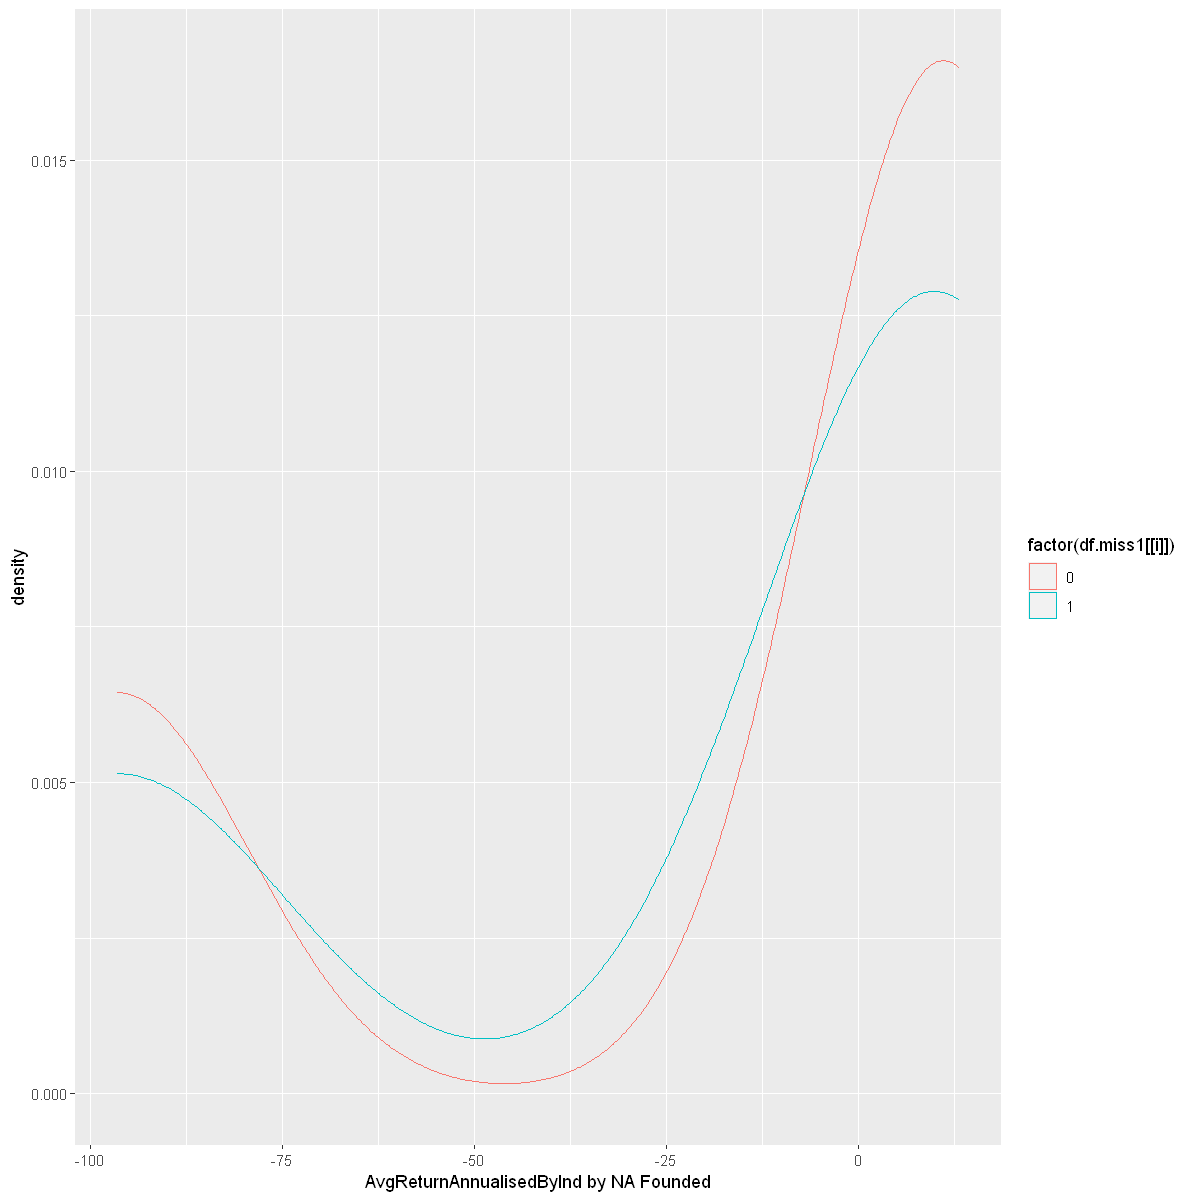


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.7432, df = 1396.5, p-value = 1.851e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.567180 -1.529361
sample estimates:
mean of x mean of y 
 43.68194  45.73021 

[1] "AvgSPReturnByInd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8035 rows containing non-finite values (stat_density)."


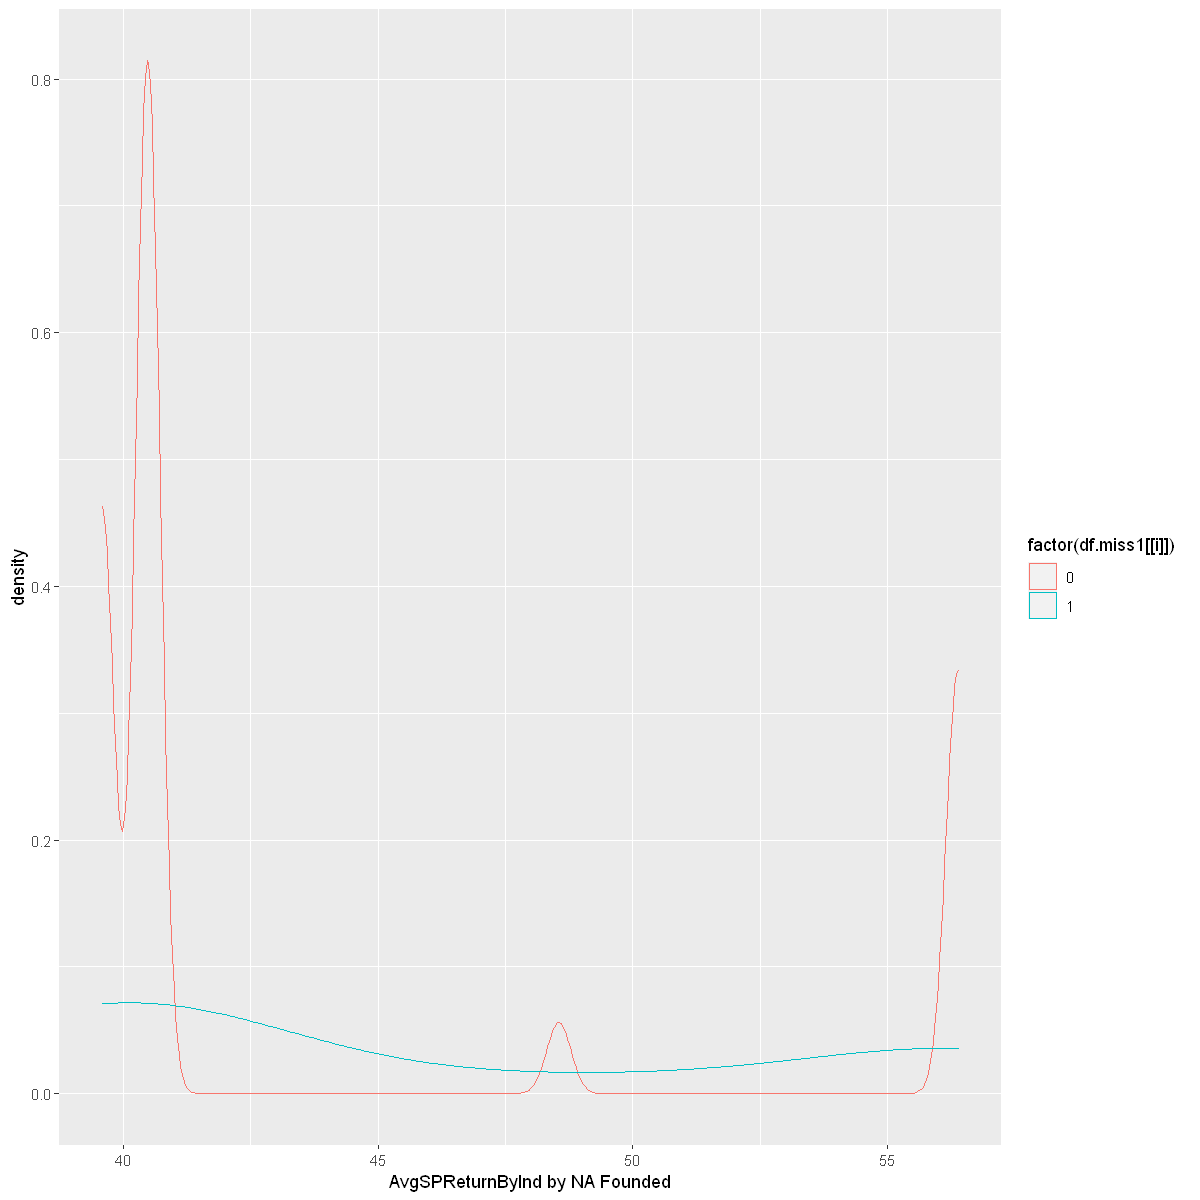


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -7.5891, df = 1378.6, p-value = 5.902e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.14241874 -0.08391462
sample estimates:
mean of x mean of y 
 13.94681  14.05998 

[1] "AvgSPReturnAnnualisedByInd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2205 rows containing non-finite values (stat_density)."


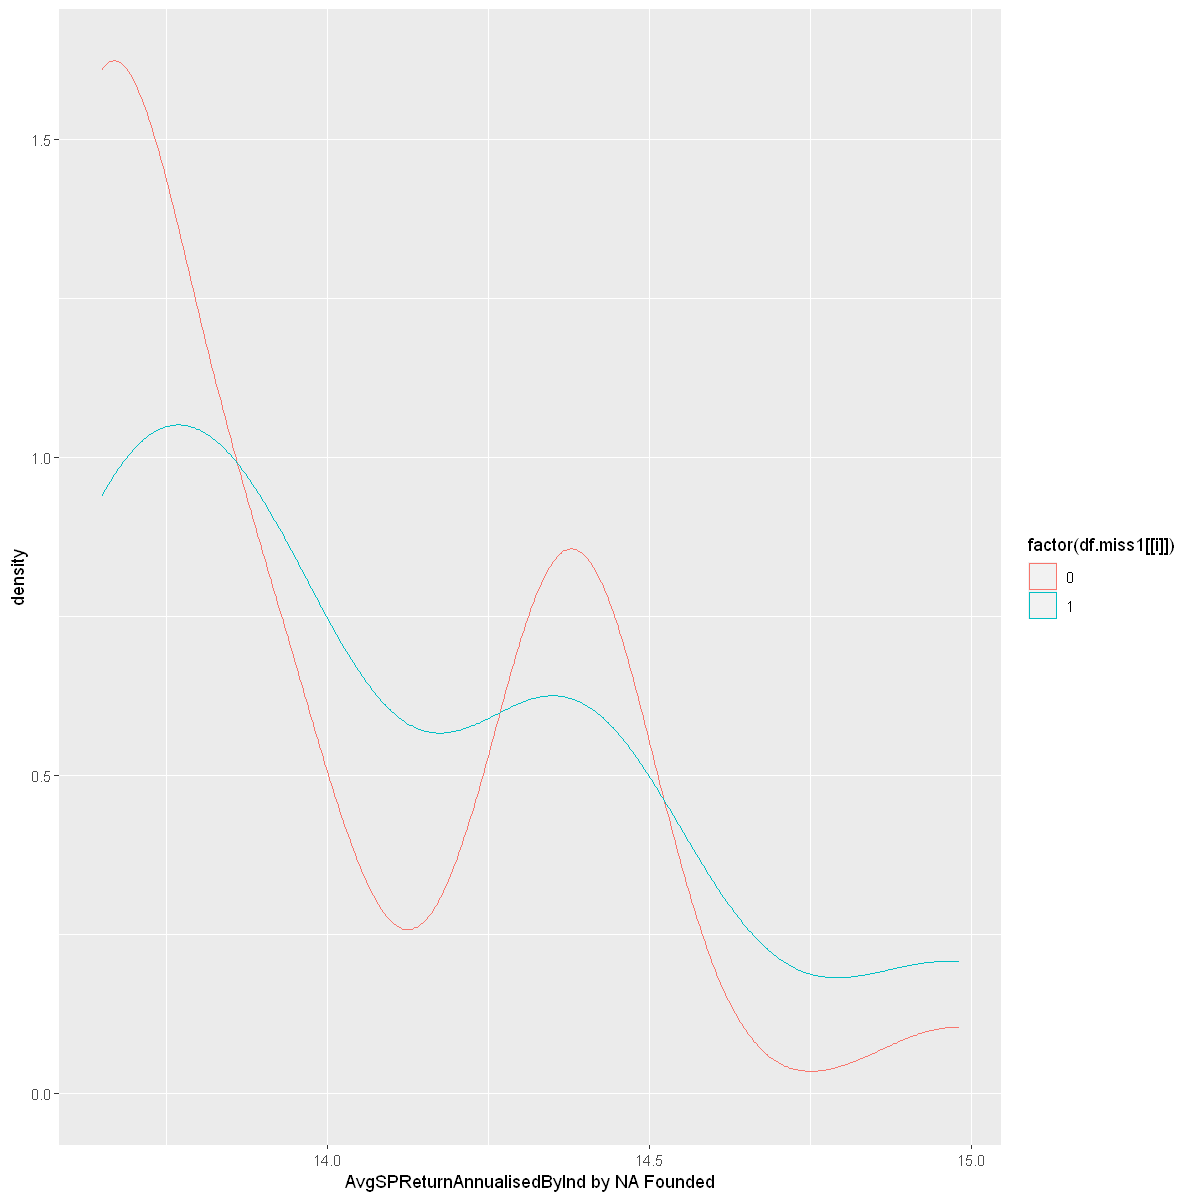


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -0.20696, df = 2581.9, p-value = 0.8361
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -133.0783  107.6687
sample estimates:
mean of x mean of y 
 1349.519  1362.224 

[1] "Market.Cap by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 209 rows containing non-finite values (stat_density)."


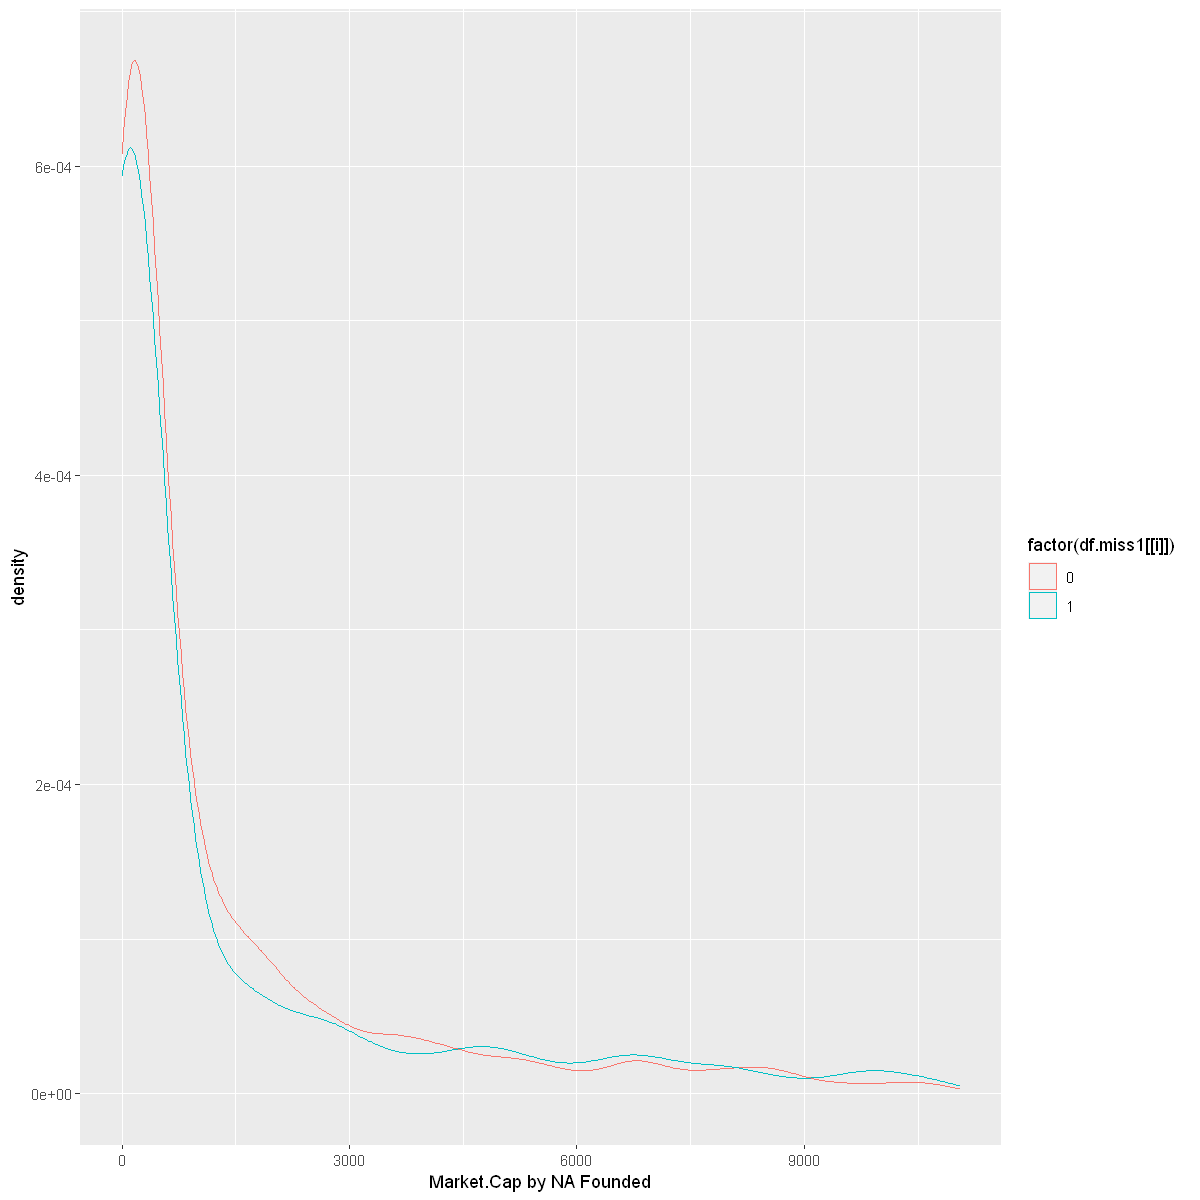


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 18.215, df = 4681.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 165.9866 206.0262
sample estimates:
mean of x mean of y 
 2303.000  2116.993 

[1] "NoOfInvByMC by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 209 rows containing non-finite values (stat_density)."


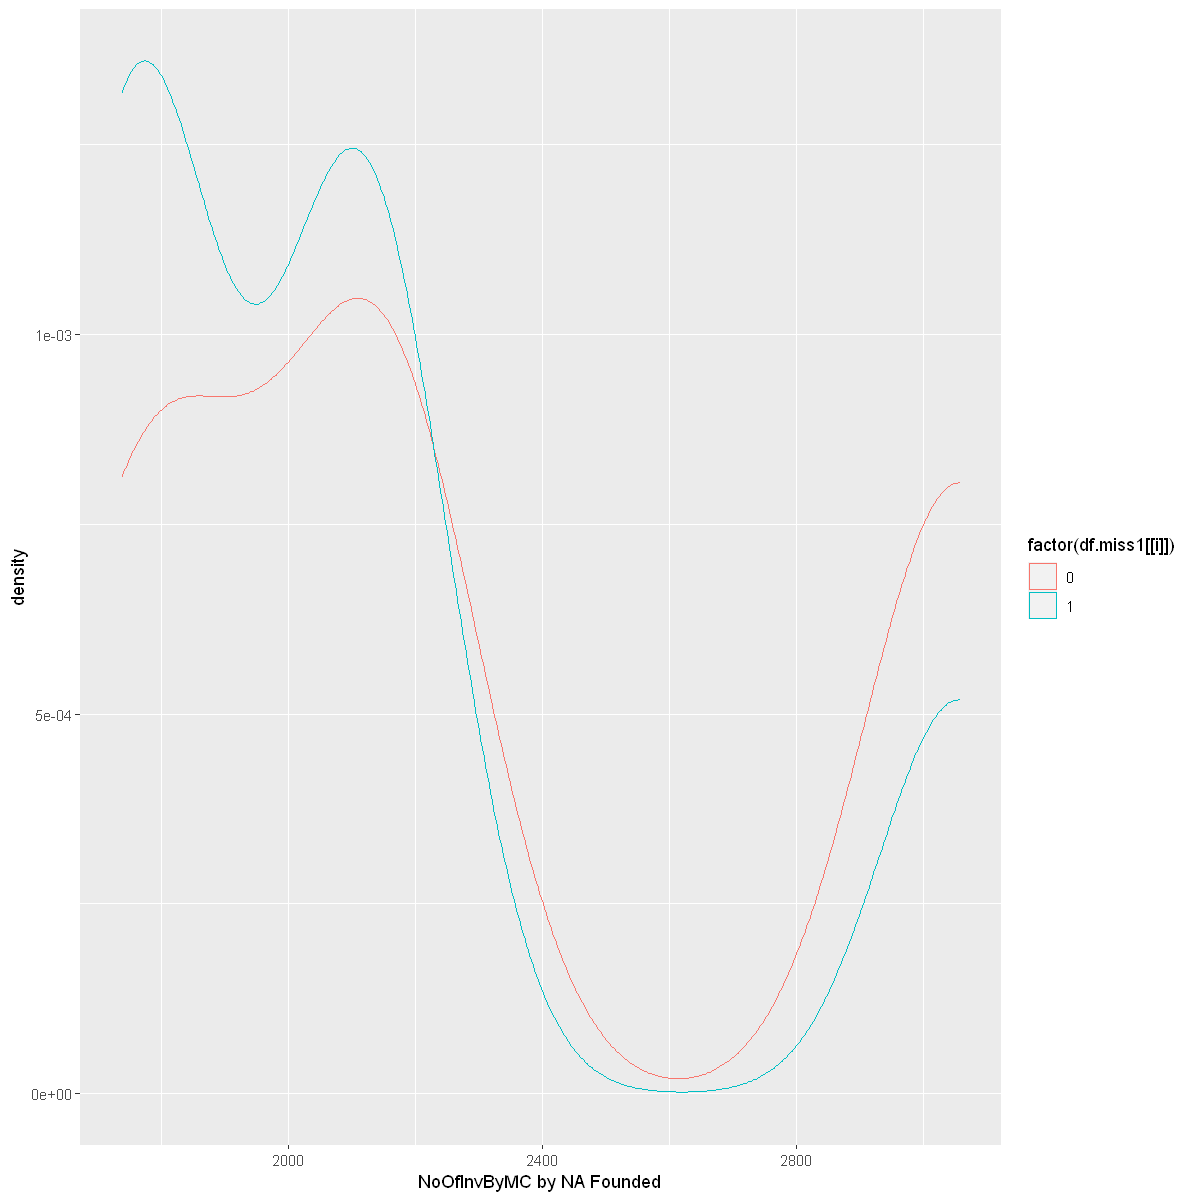


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -10.824, df = 4139.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.284396 -4.357005
sample estimates:
mean of x mean of y 
 57.09751  62.41821 

[1] "AvgChangeOverPeriodOfInvByMC by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 209 rows containing non-finite values (stat_density)."


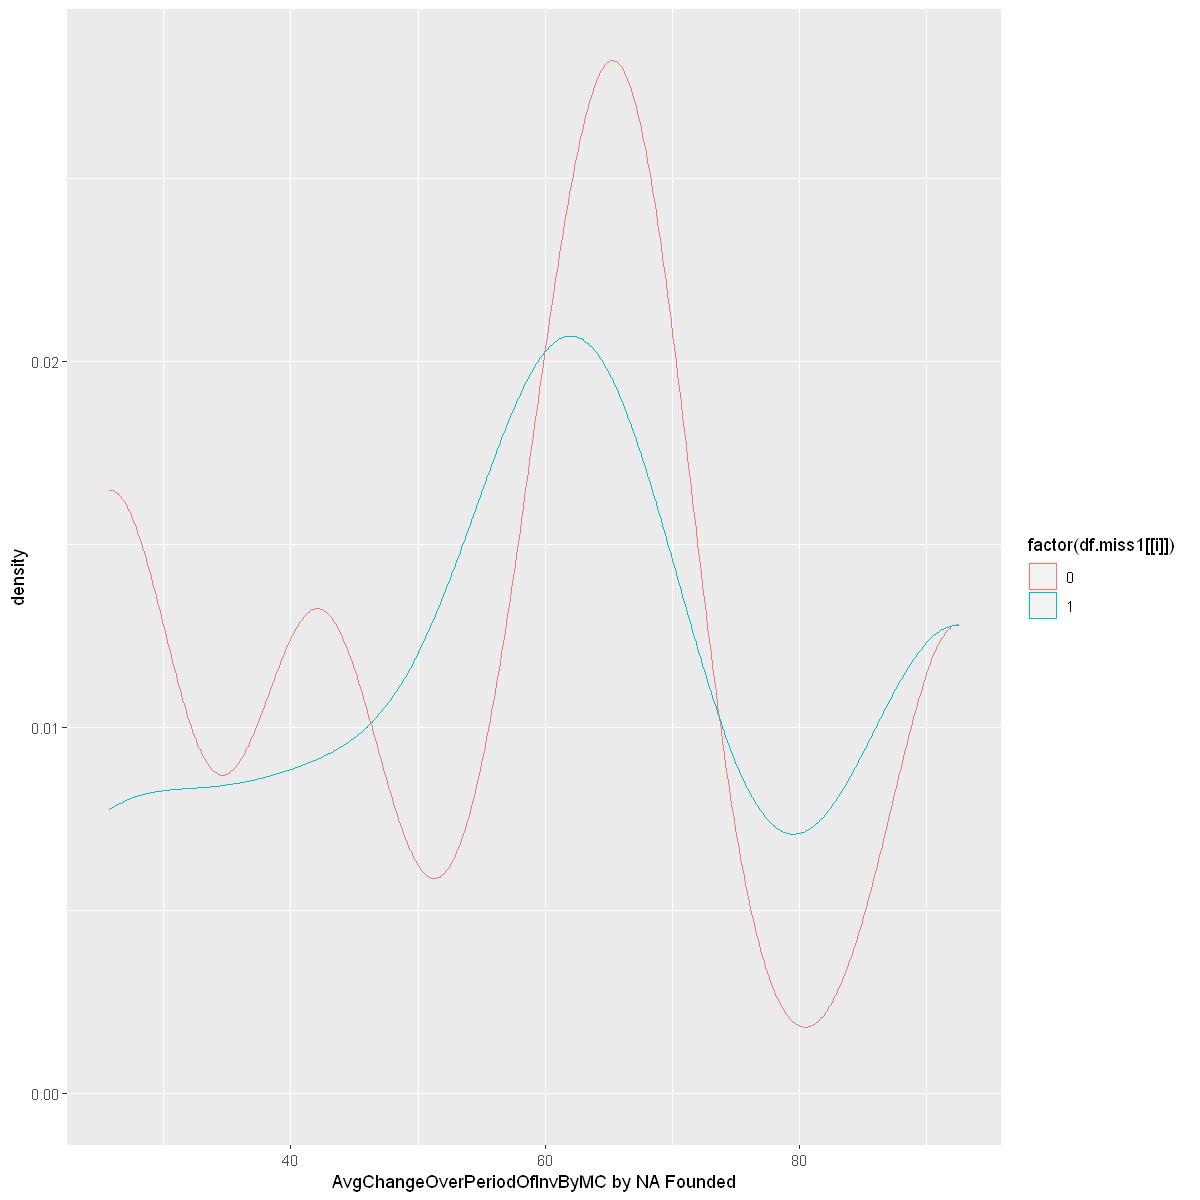


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.1028, df = 3760.3, p-value = 1.455e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7788672 1.3727880
sample estimates:
mean of x mean of y 
 9.002715  7.926887 

[1] "AvgAnnualisedReturnByMC by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 209 rows containing non-finite values (stat_density)."


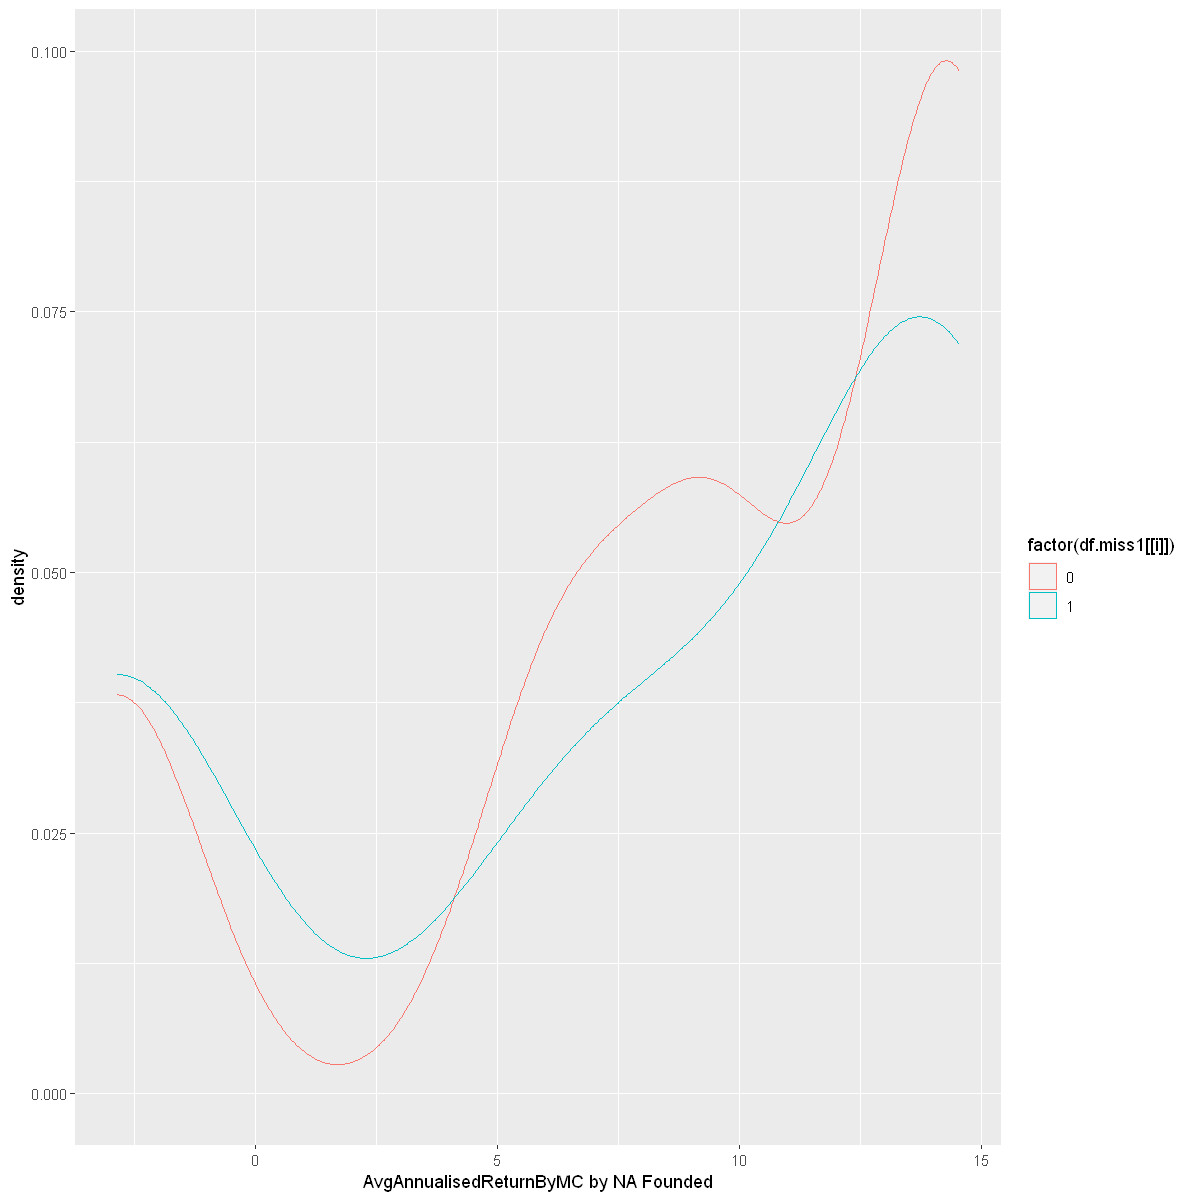


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -12.664, df = 3946.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.055395 -1.504317
sample estimates:
mean of x mean of y 
 47.45935  49.23921 

[1] "AvgSPReturnByMC by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8306 rows containing non-finite values (stat_density)."


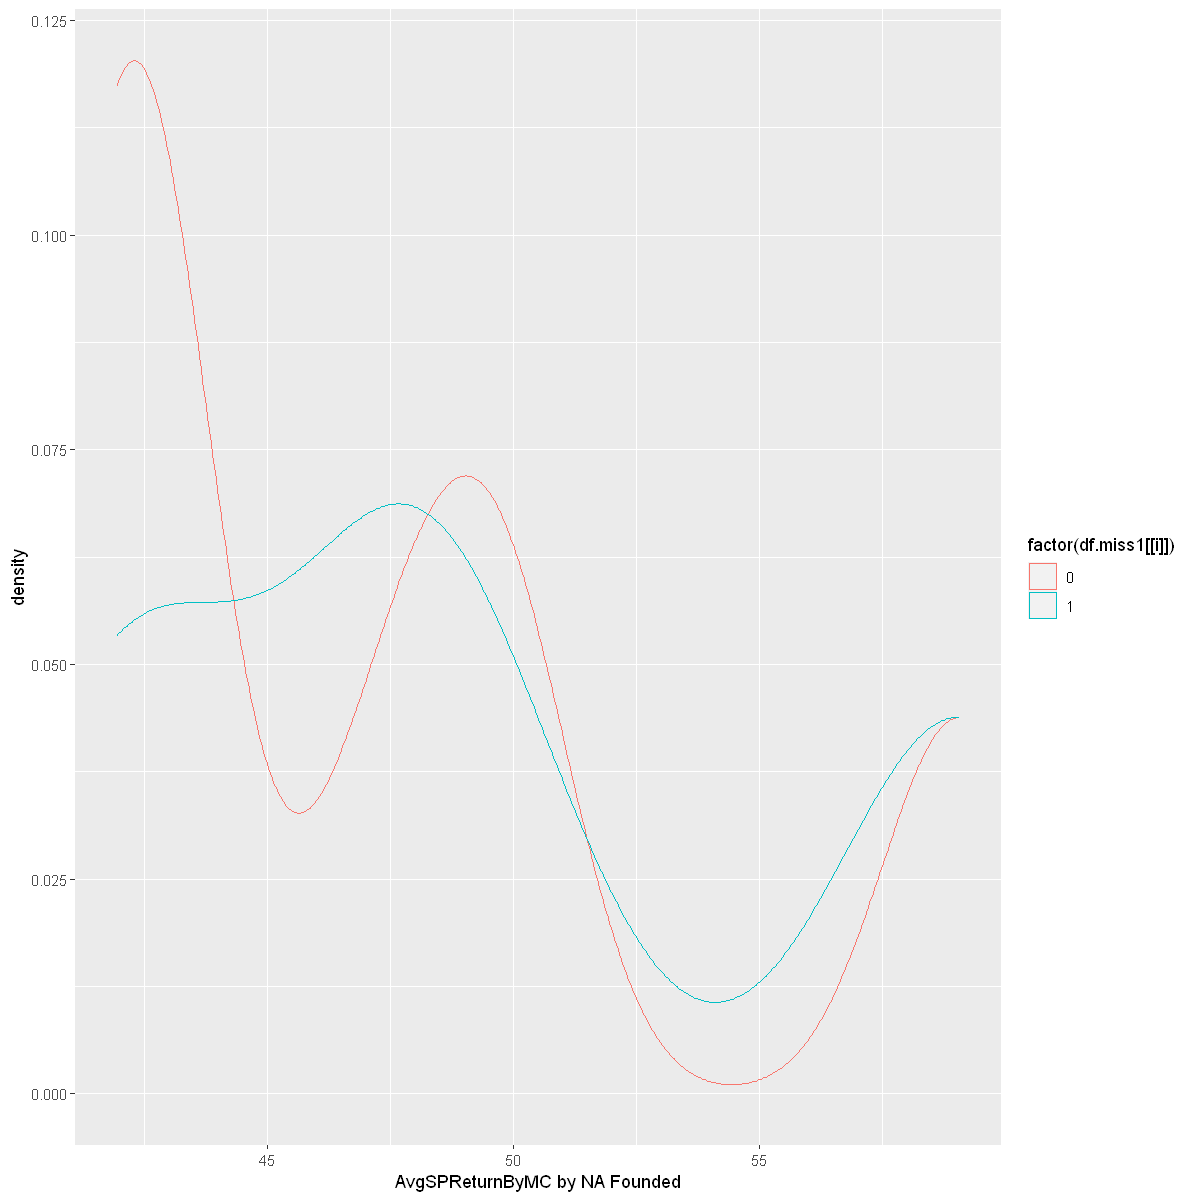


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 7.2276, df = 1903.9, p-value = 7.083e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.089480 1.900925
sample estimates:
mean of x mean of y 
 6.180452  4.685250 

[1] "CurrentHolding by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 1069 rows containing non-finite values (stat_density)."


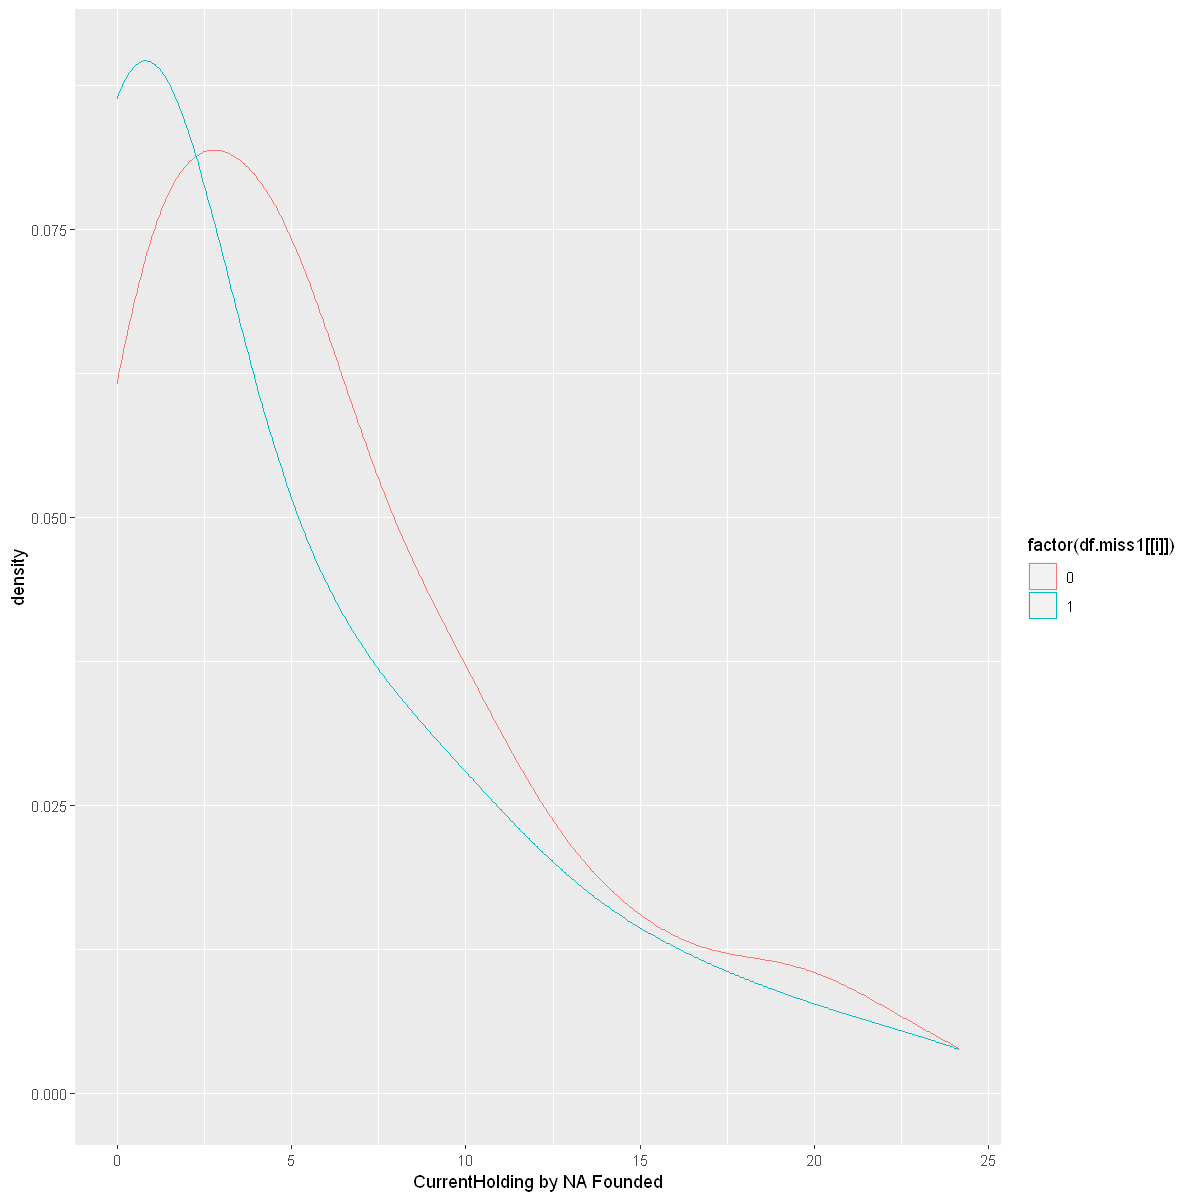


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 30.69, df = 5819.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 207.8583 236.2250
sample estimates:
mean of x mean of y 
314.14479  92.10311 

[1] "DaysOfInv by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 10877 rows containing non-finite values (stat_density)."


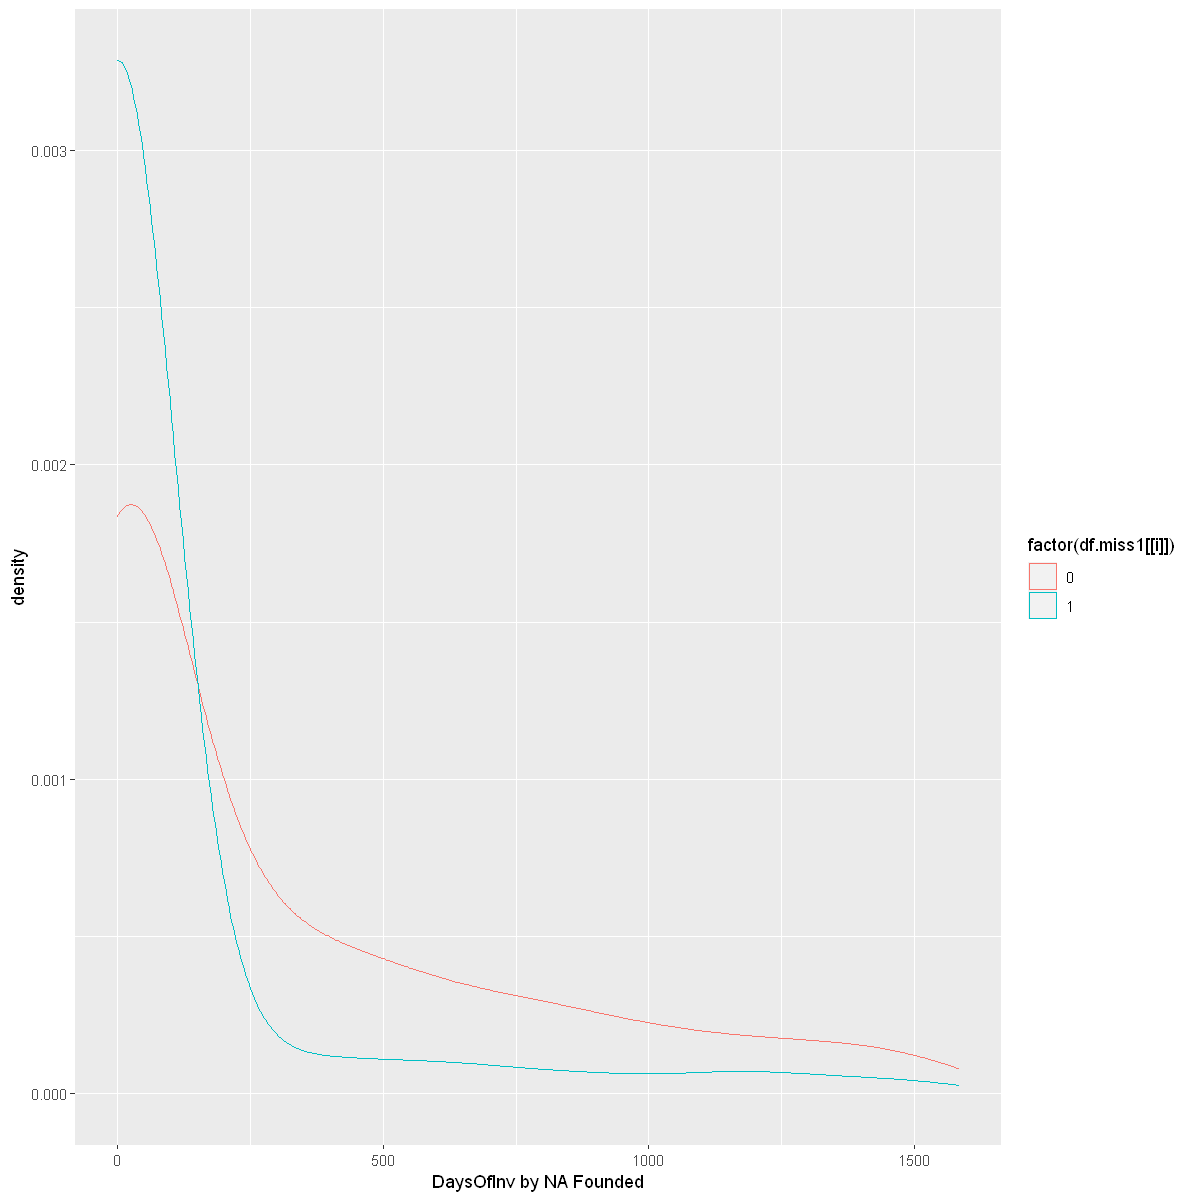


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 0.21585, df = 243.37, p-value = 0.8293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.115429  2.636107
sample estimates:
mean of x mean of y 
 15.98359  15.72325 

[1] "AH_PricePerShareLocal by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 10877 rows containing non-finite values (stat_density)."


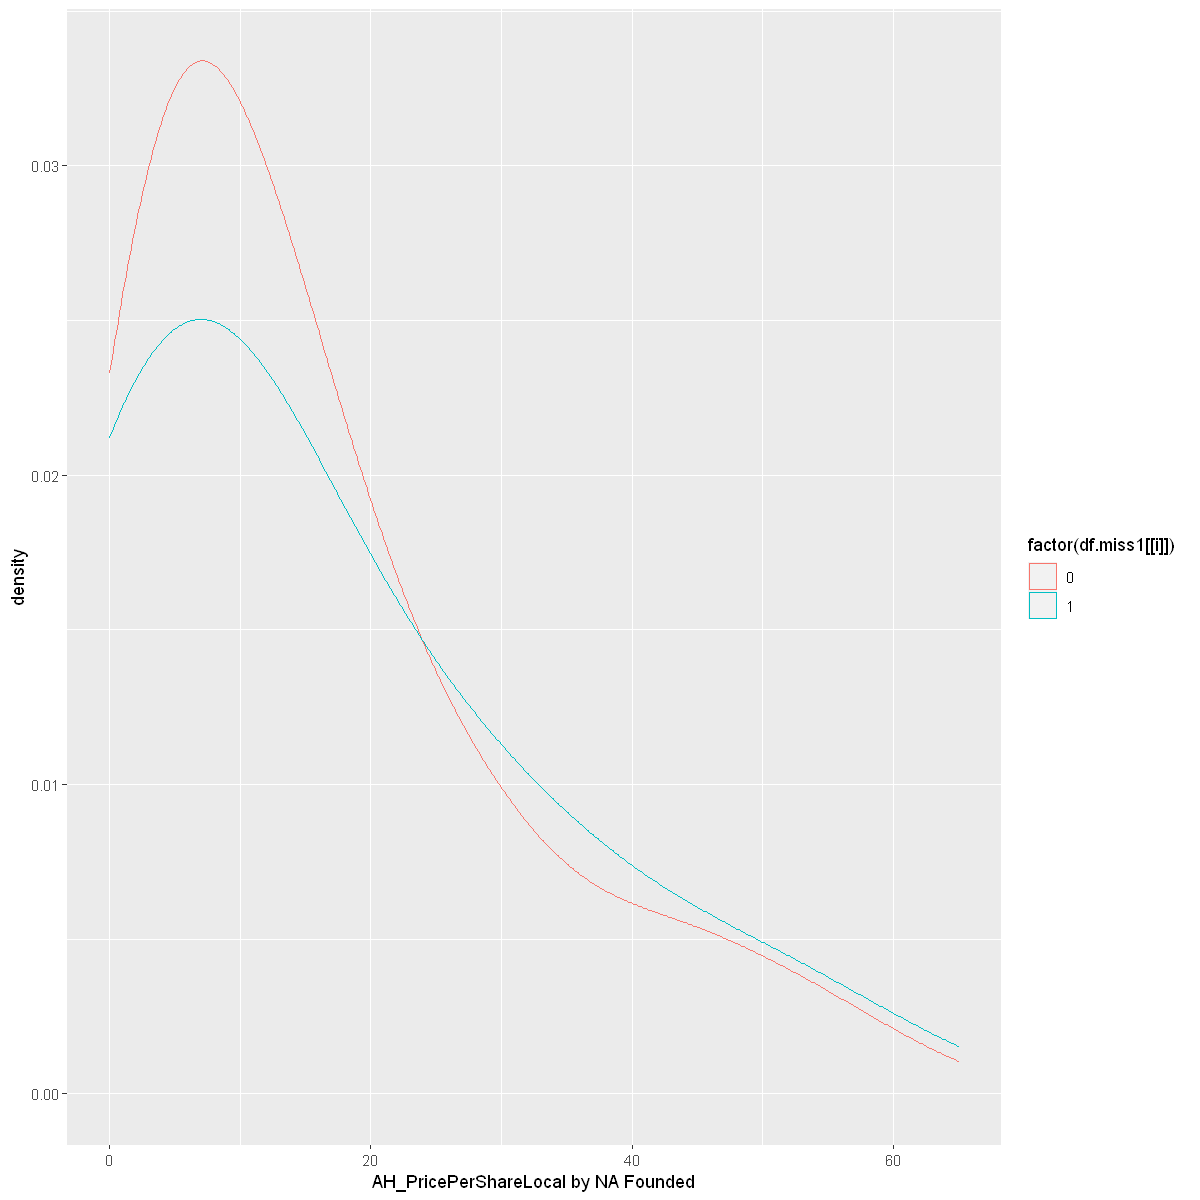


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 0.21585, df = 243.37, p-value = 0.8293
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.209381  8.983852
sample estimates:
mean of x mean of y 
 54.47206  53.58482 

[1] "AH_PricePerShareUSD by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


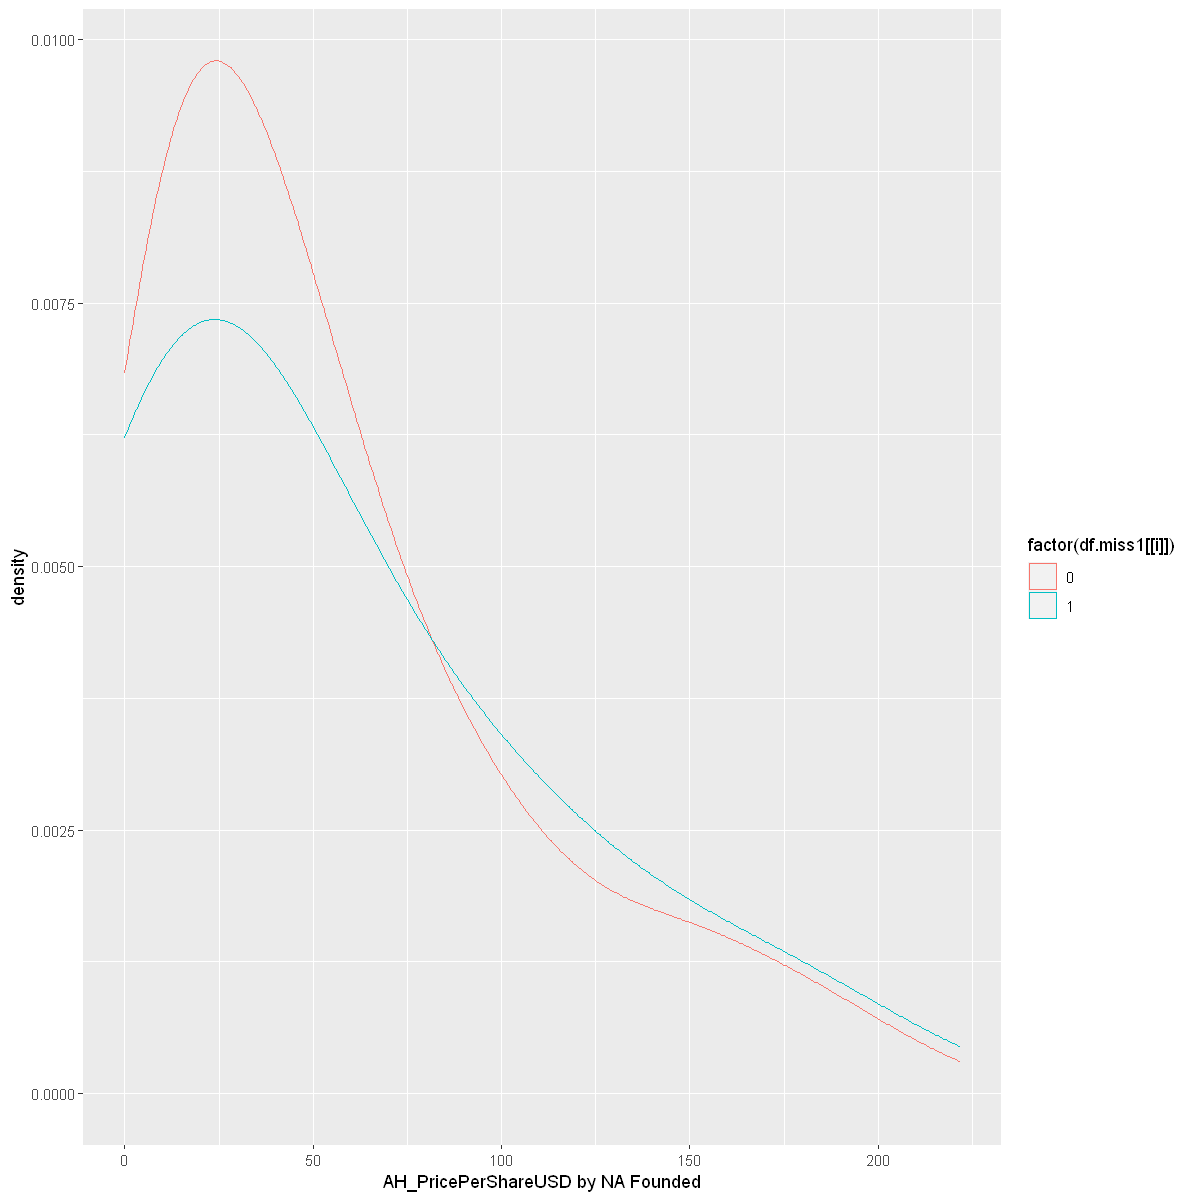


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.3383, df = 178.38, p-value = 0.1825
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -439.49292   84.27149
sample estimates:
mean of x mean of y 
 977.1575 1154.7682 

[1] "AH_PruchaseValueMnLocal by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 11121 rows containing non-finite values (stat_density)."


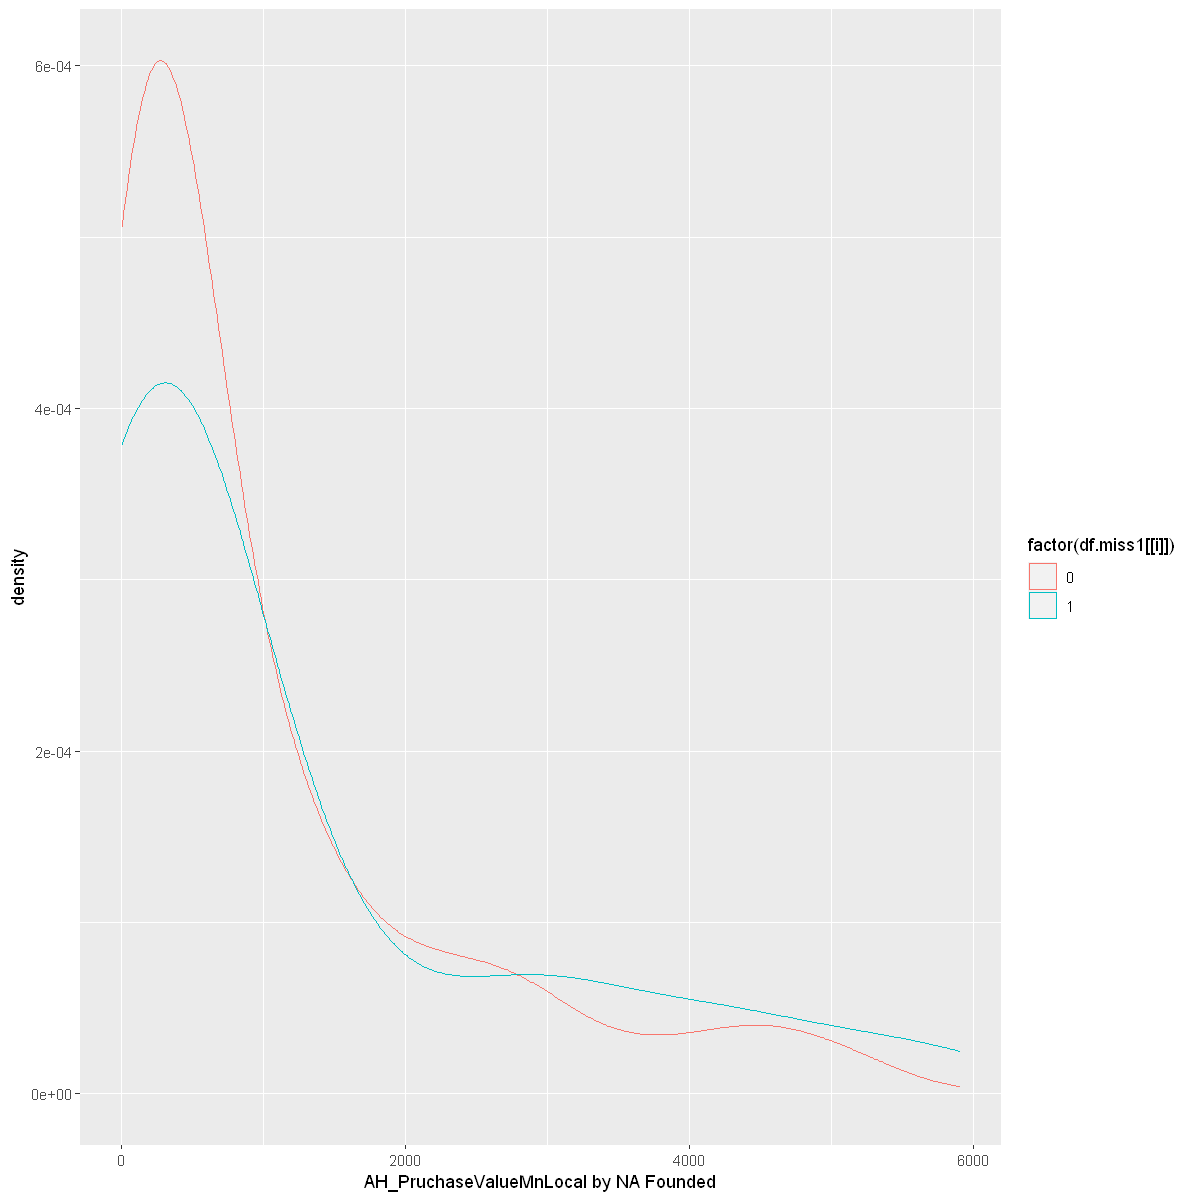


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -1.3383, df = 178.38, p-value = 0.1825
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1497.7919   287.1972
sample estimates:
mean of x mean of y 
 3330.153  3935.450 

[1] "AH_PruchaseValueMnUSD by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2863 rows containing non-finite values (stat_density)."


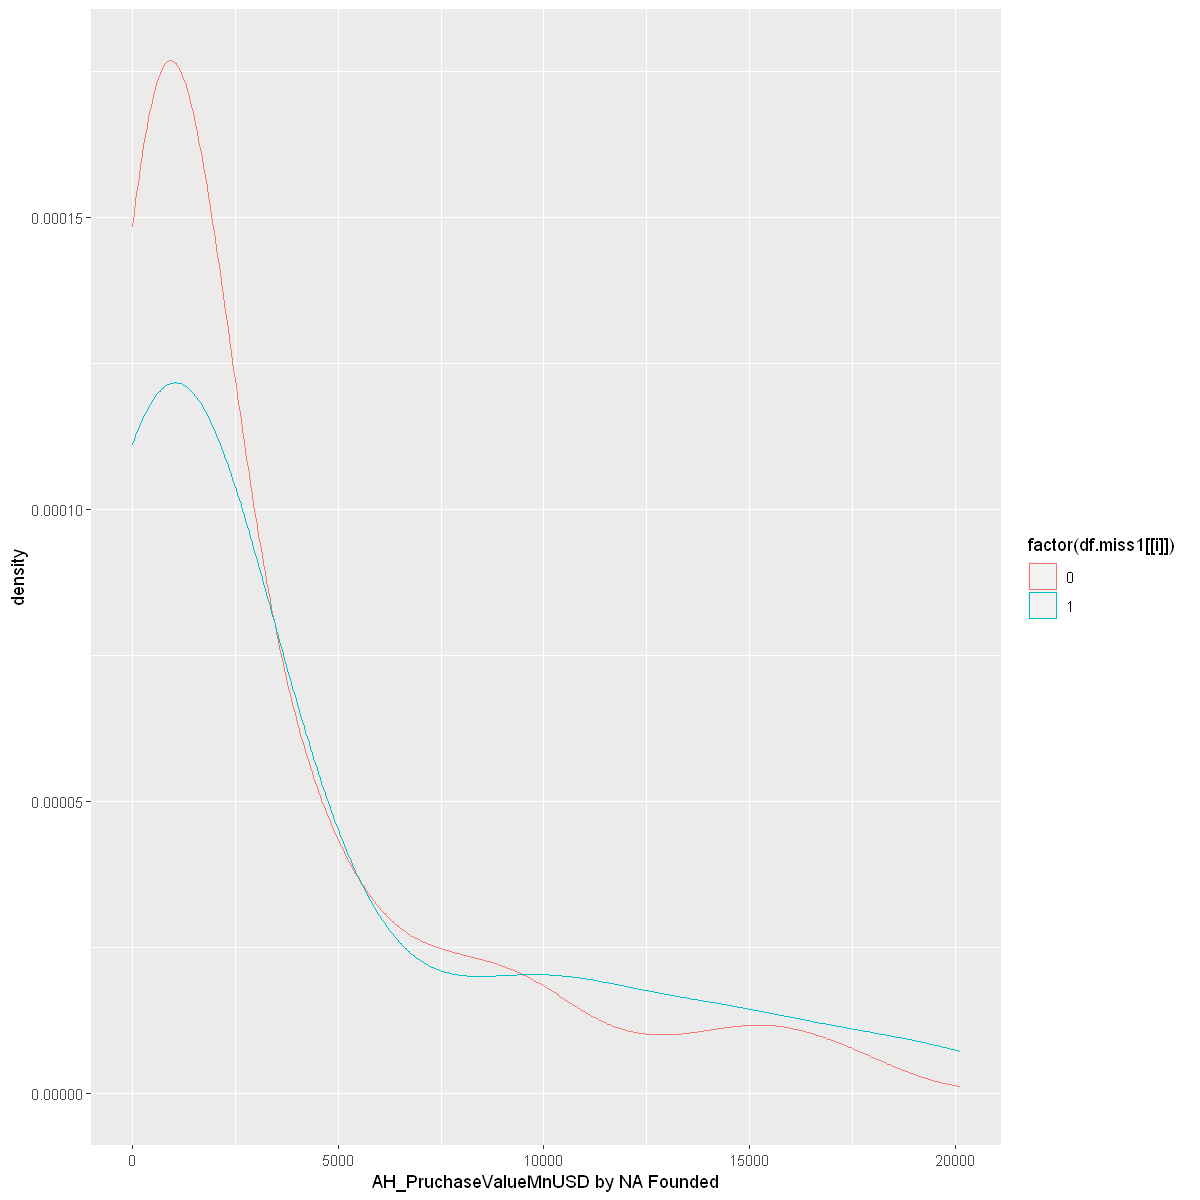


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -0.0046675, df = 2201.8, p-value = 0.9963
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.124271  1.118932
sample estimates:
mean of x mean of y 
 18.18516  18.18783 

[1] "FR_PriceStart by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2998 rows containing non-finite values (stat_density)."


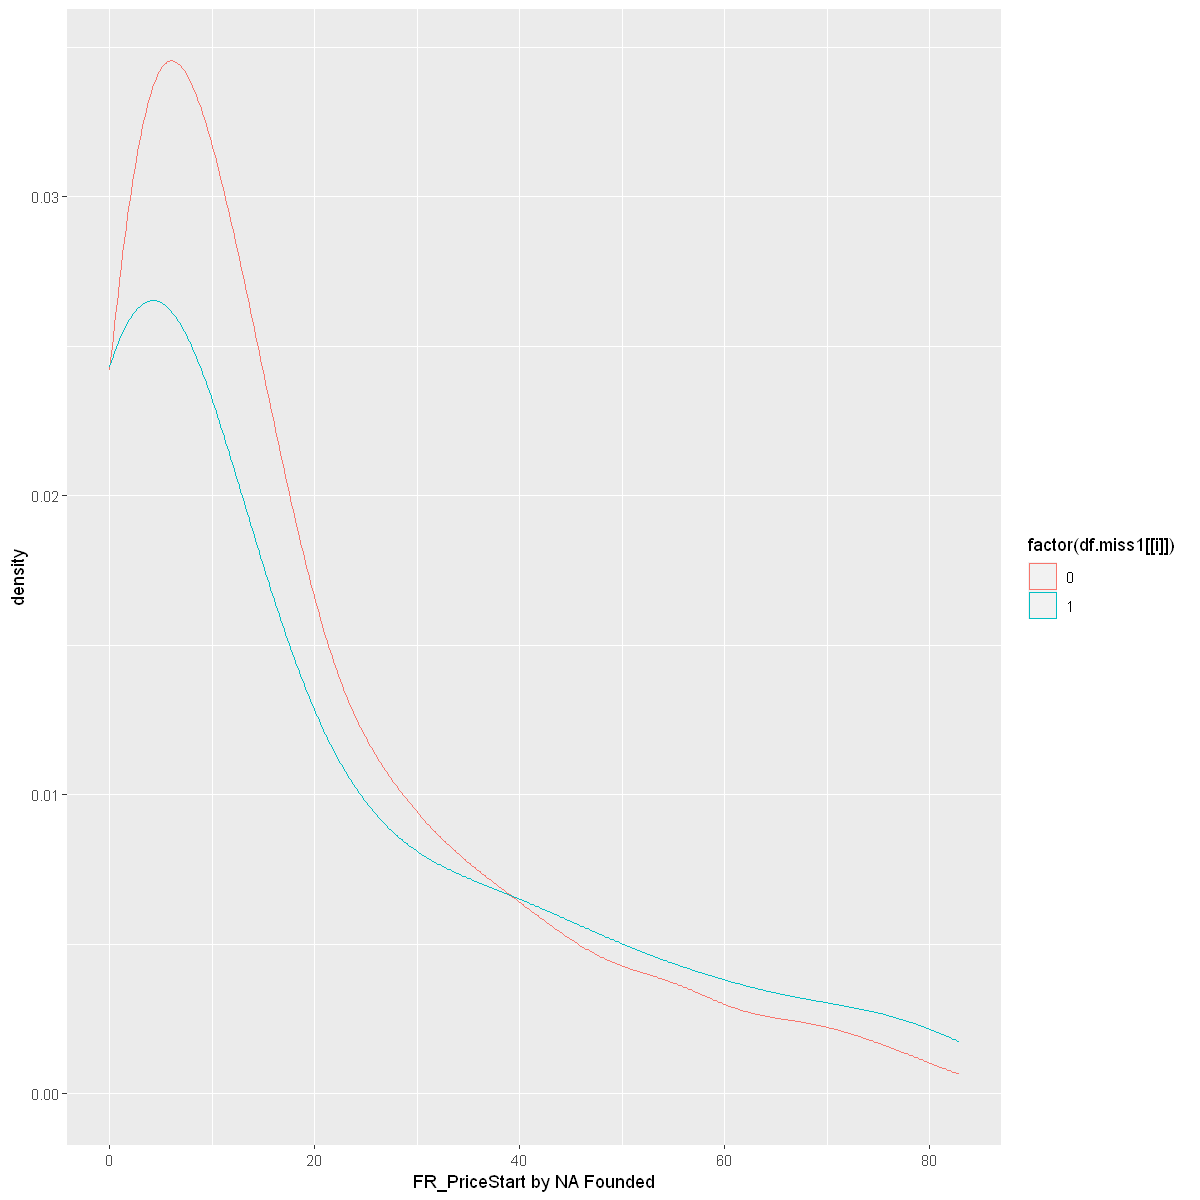


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 4.0444, df = 2200.9, p-value = 5.427e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.212323 3.494666
sample estimates:
mean of x mean of y 
 18.12293  15.76944 

[1] "FR_PriceEnd by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2675 rows containing non-finite values (stat_density)."


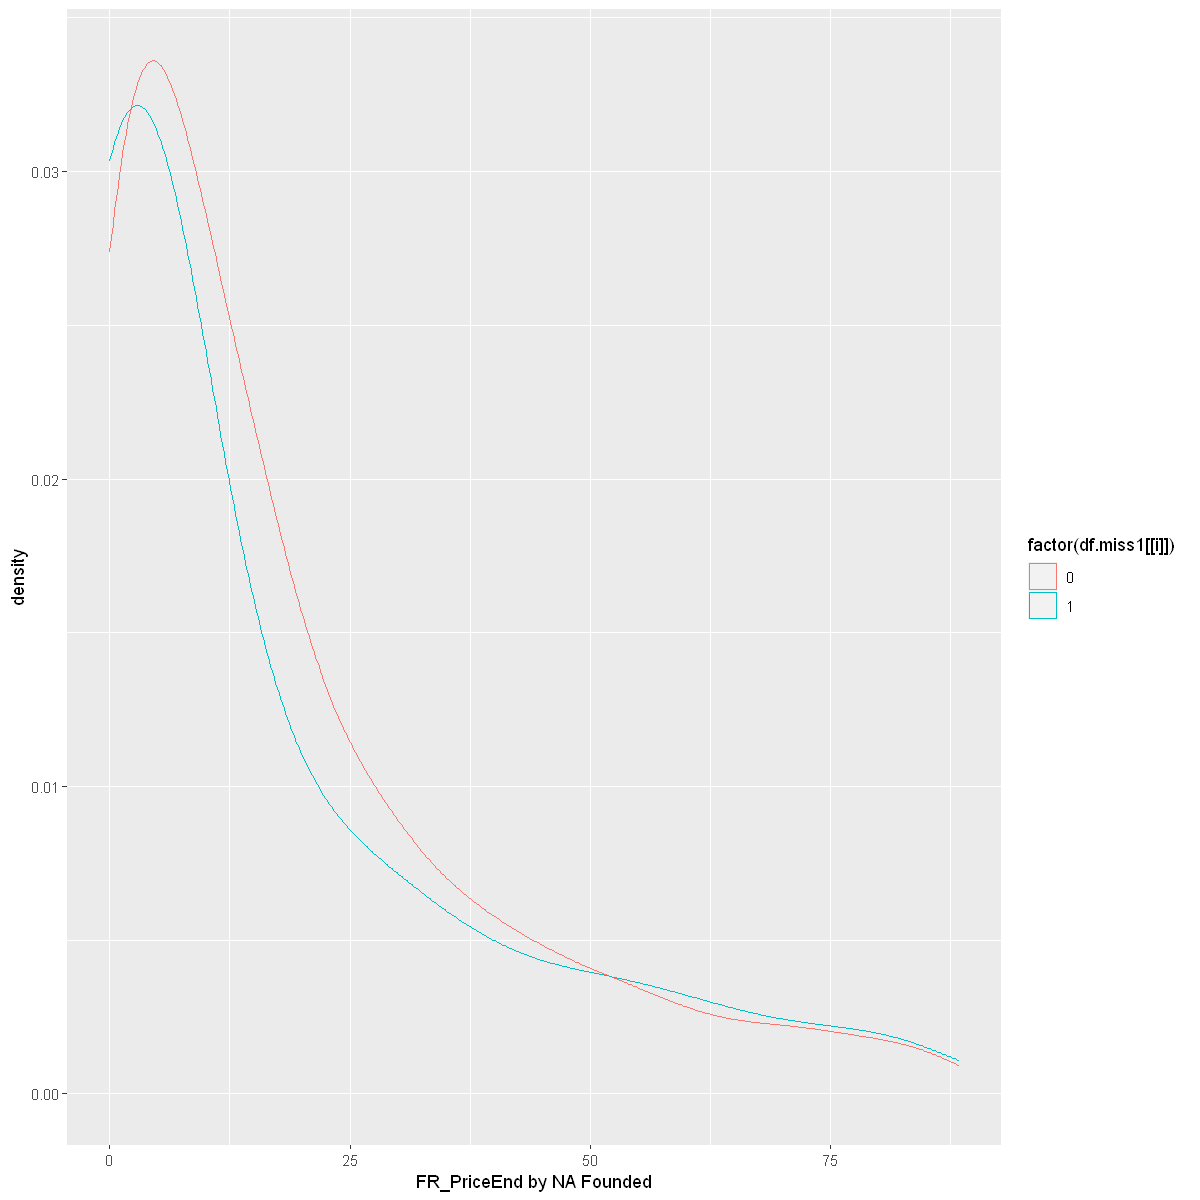


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 1.7622, df = 2270.3, p-value = 0.07817
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3473645  6.5045770
sample estimates:
mean of x mean of y 
 4.937409  1.858803 

[1] "FollowerReturnPCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2993 rows containing non-finite values (stat_density)."


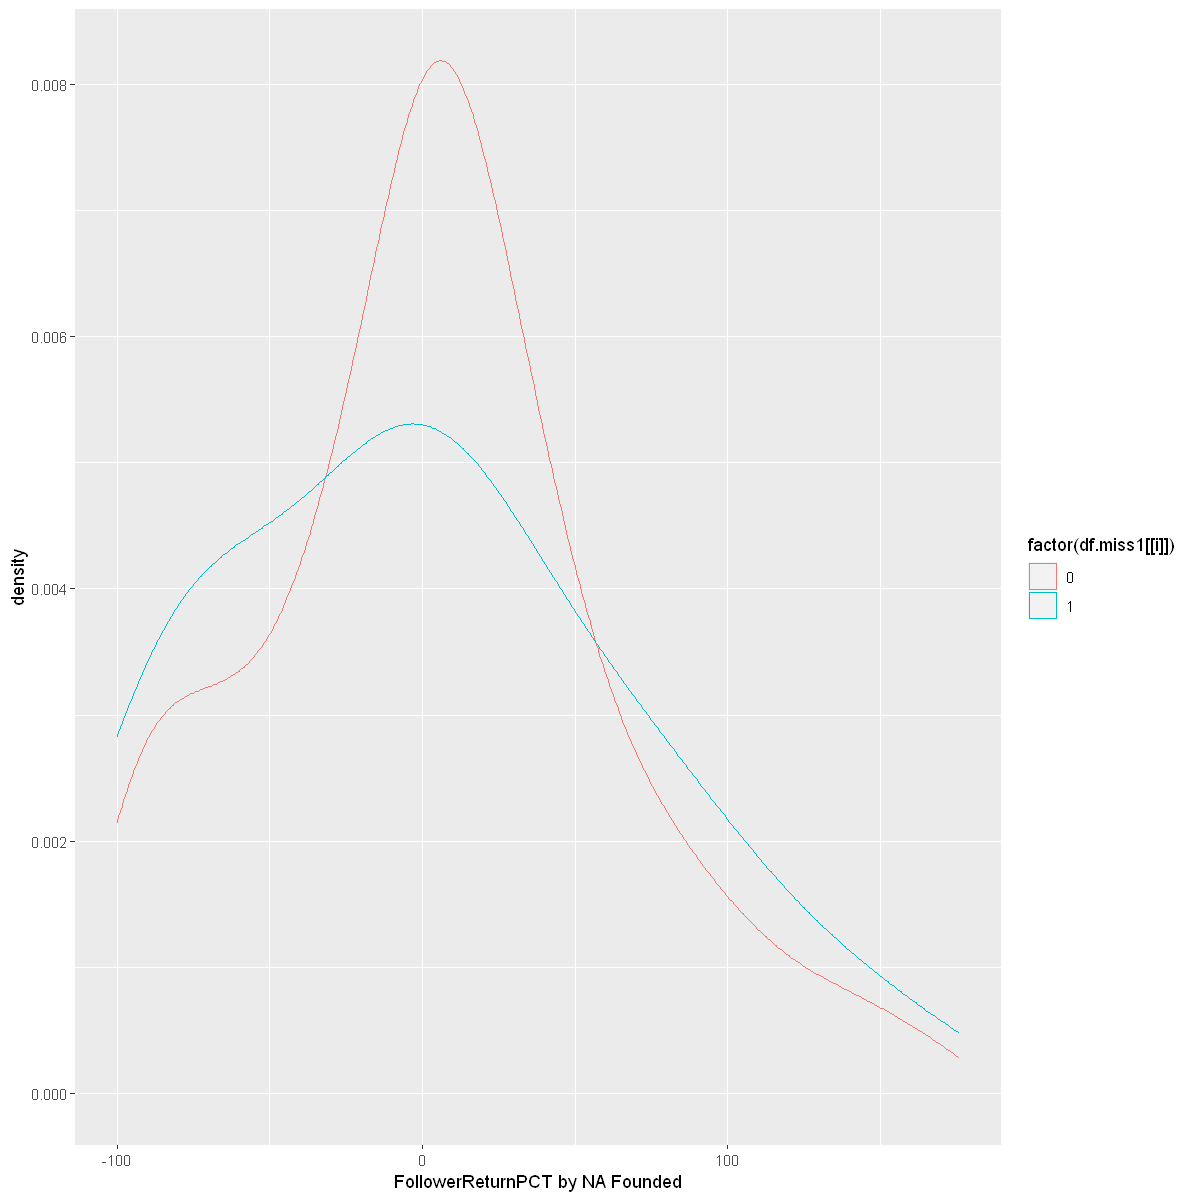


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.3092, df = 2745.4, p-value = 0.0009477
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9303453 3.6361743
sample estimates:
 mean of x  mean of y 
 2.0773281 -0.2059317 

[1] "FollowerReturnAnnualisedPCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2925 rows containing non-finite values (stat_density)."


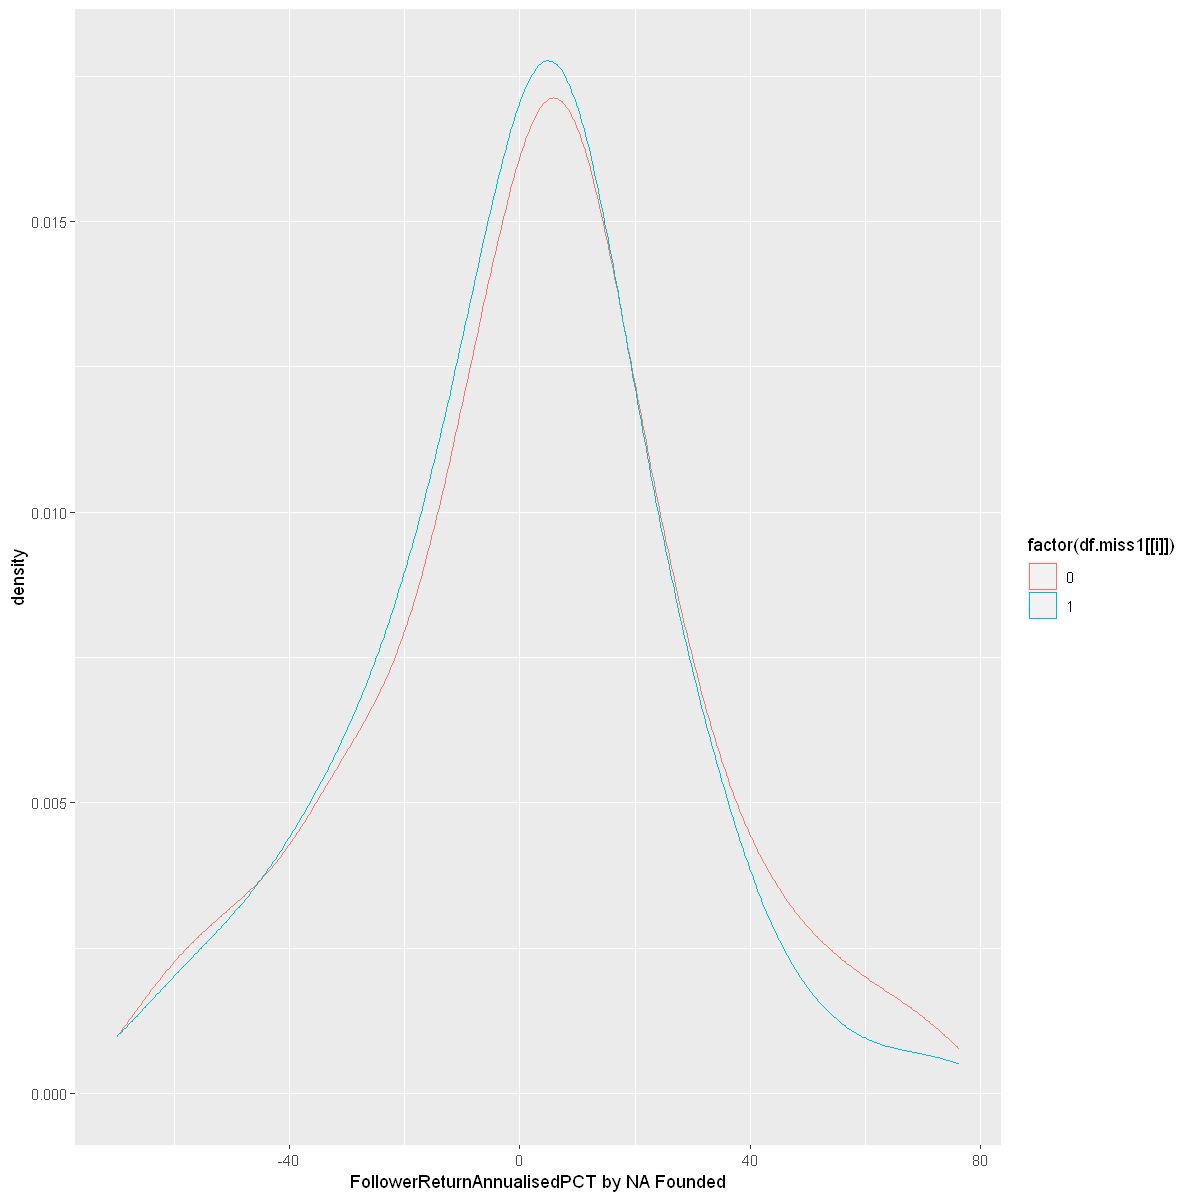


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -14.051, df = 2259.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.01593 -13.60314
sample estimates:
mean of x mean of y 
 40.60390  56.41343 

[1] "SPChangePCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3924 rows containing non-finite values (stat_density)."


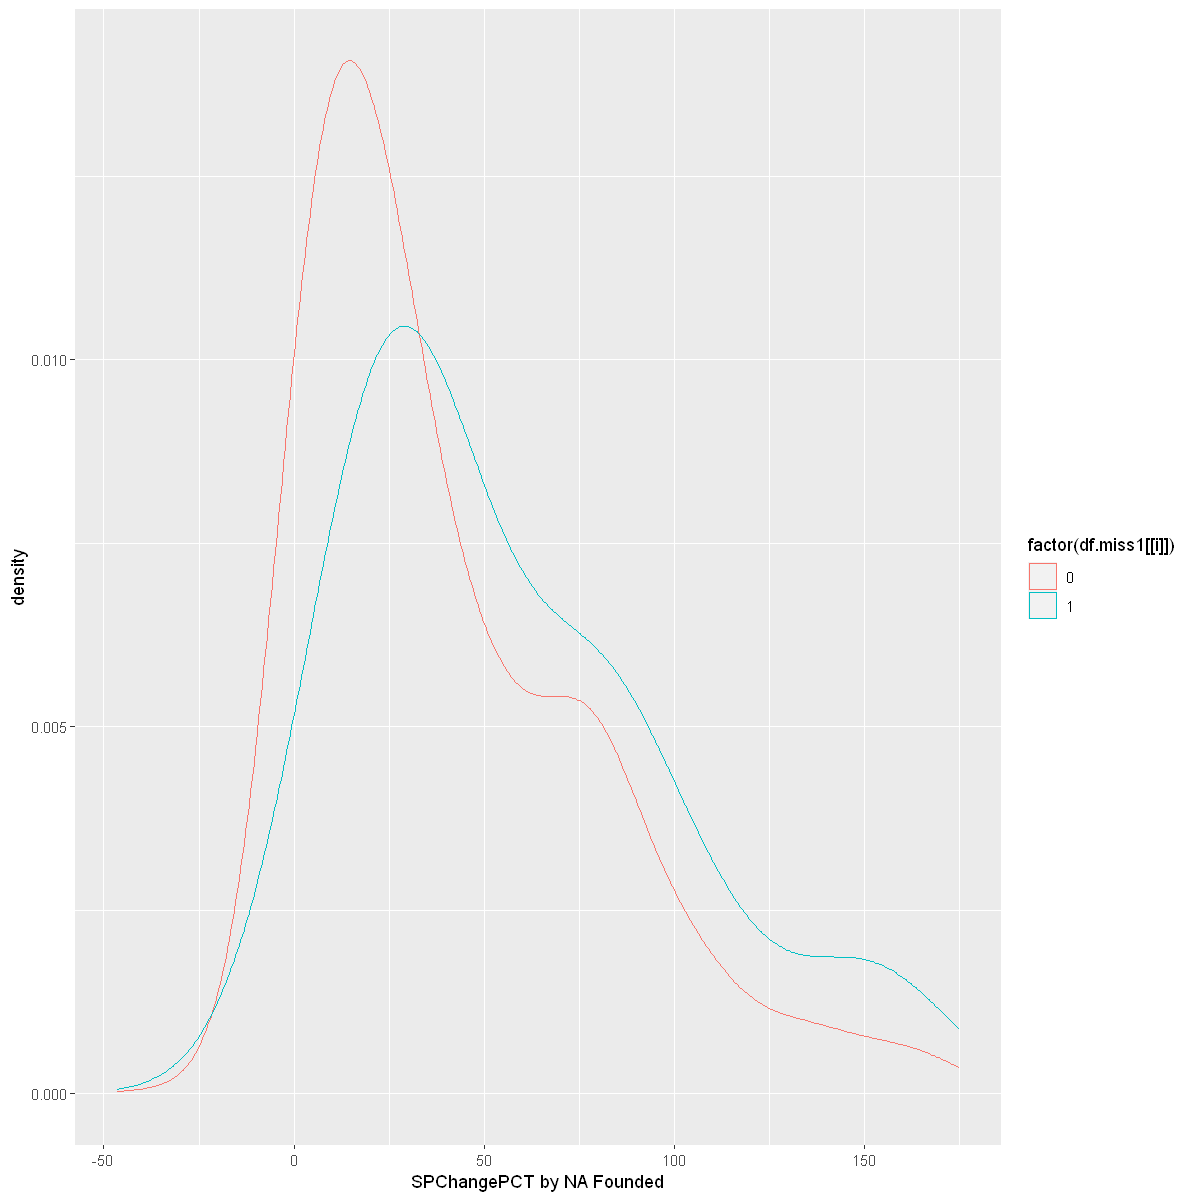


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.9336, df = 3969.3, p-value = 8.512e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1288349 0.3848780
sample estimates:
mean of x mean of y 
 13.44225  13.18540 

[1] "SPChangeAnnualisedPCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 7977 rows containing non-finite values (stat_density)."


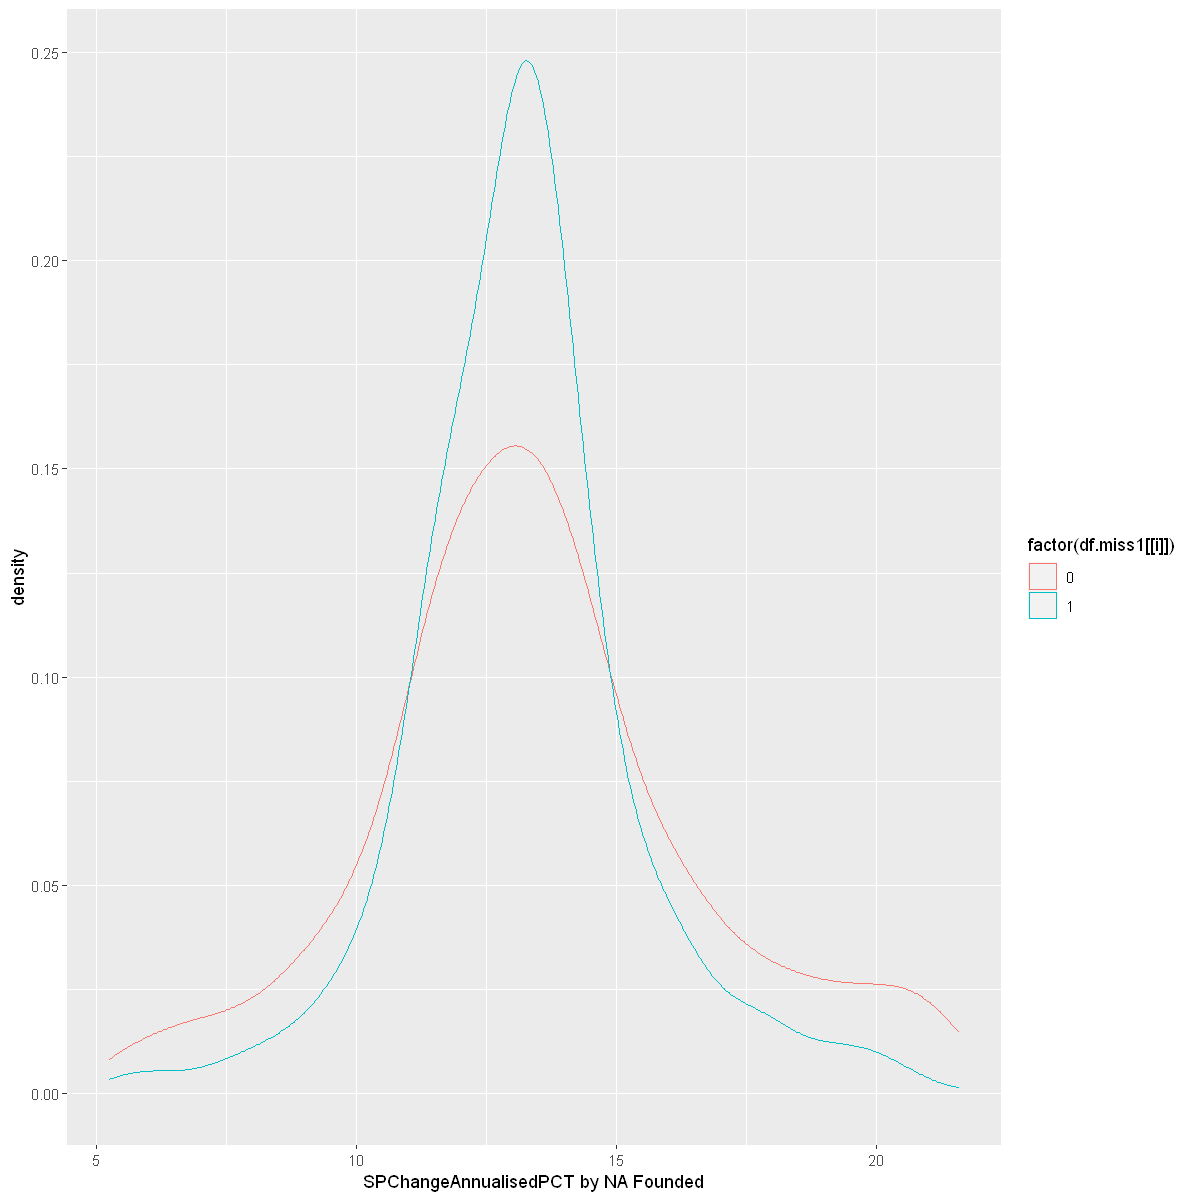


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 6.0979, df = 313.02, p-value = 3.164e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 13.27597 25.92471
sample estimates:
  mean of x   mean of y 
 -0.8032051 -20.4035448 

[1] "PriceChangeSinceExitPCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 8523 rows containing non-finite values (stat_density)."


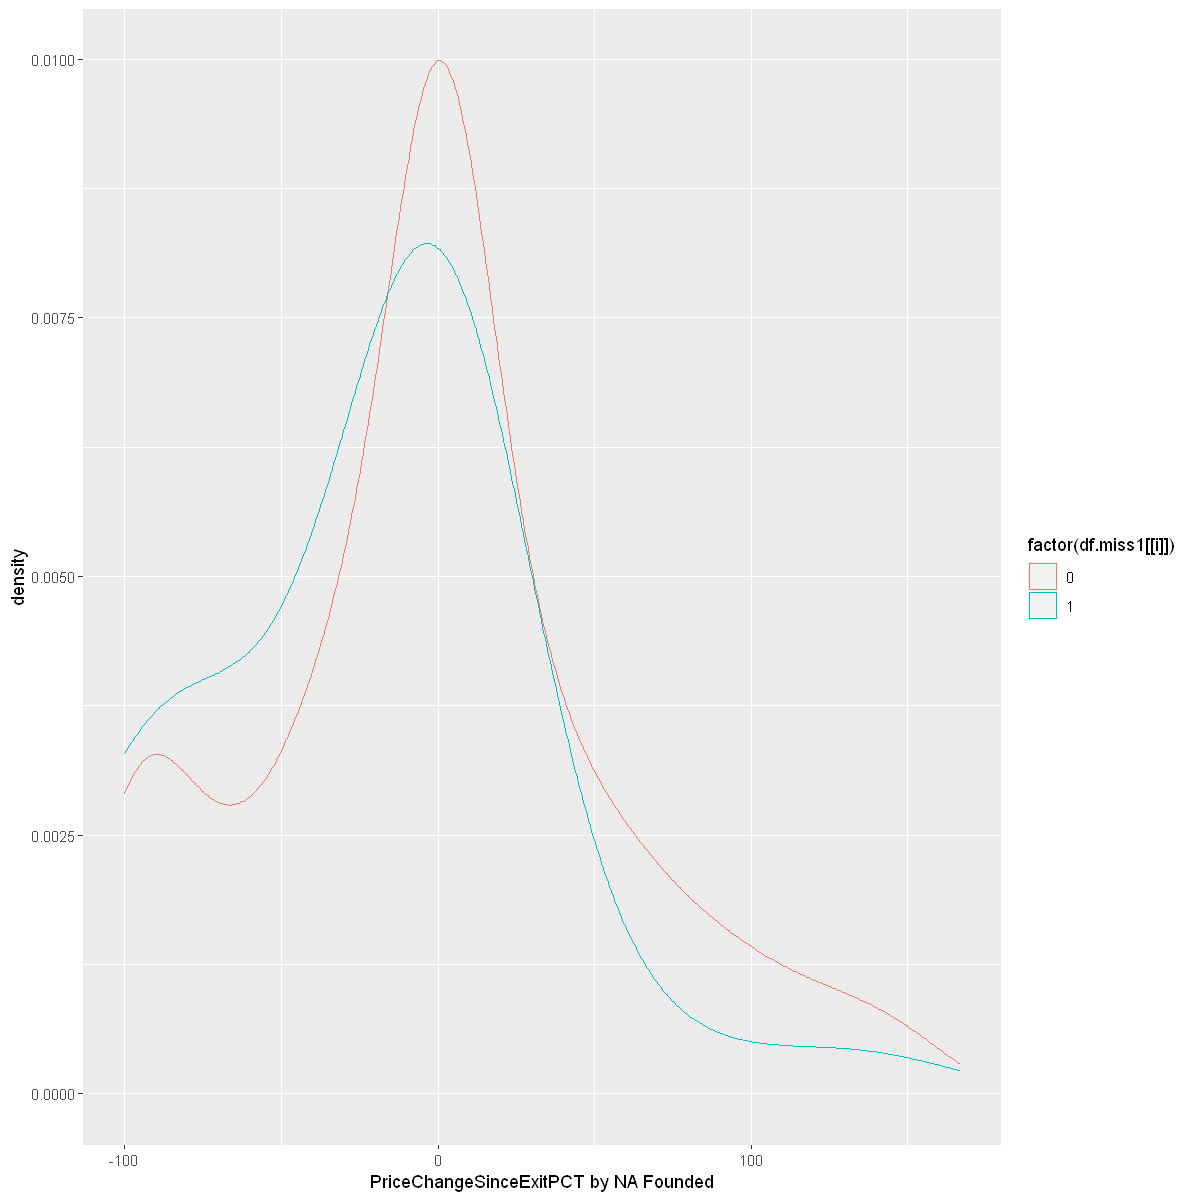


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 3.7025, df = 197.7, p-value = 0.0002769
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.035328 16.511982
sample estimates:
mean of x mean of y 
 45.42919  34.65553 

[1] "SPChangeSinceExitPCT by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."


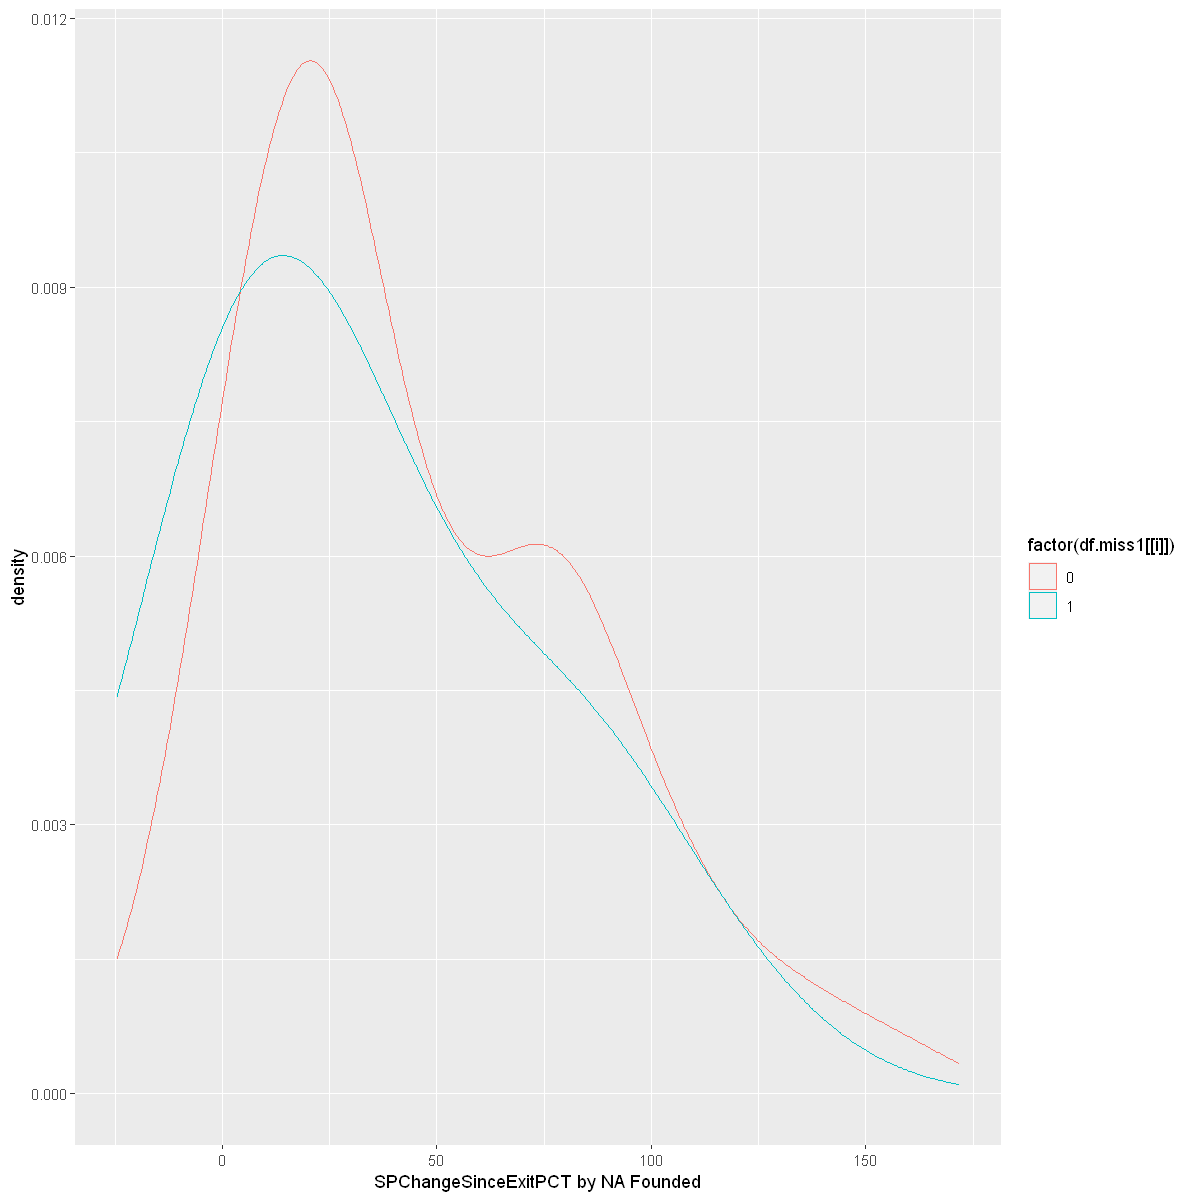


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = NaN, df = NaN, p-value = NA
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 NaN NaN
sample estimates:
mean of x mean of y 
        0         0 

[1] "LitigationInitiated by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 10184 rows containing non-finite values (stat_density)."


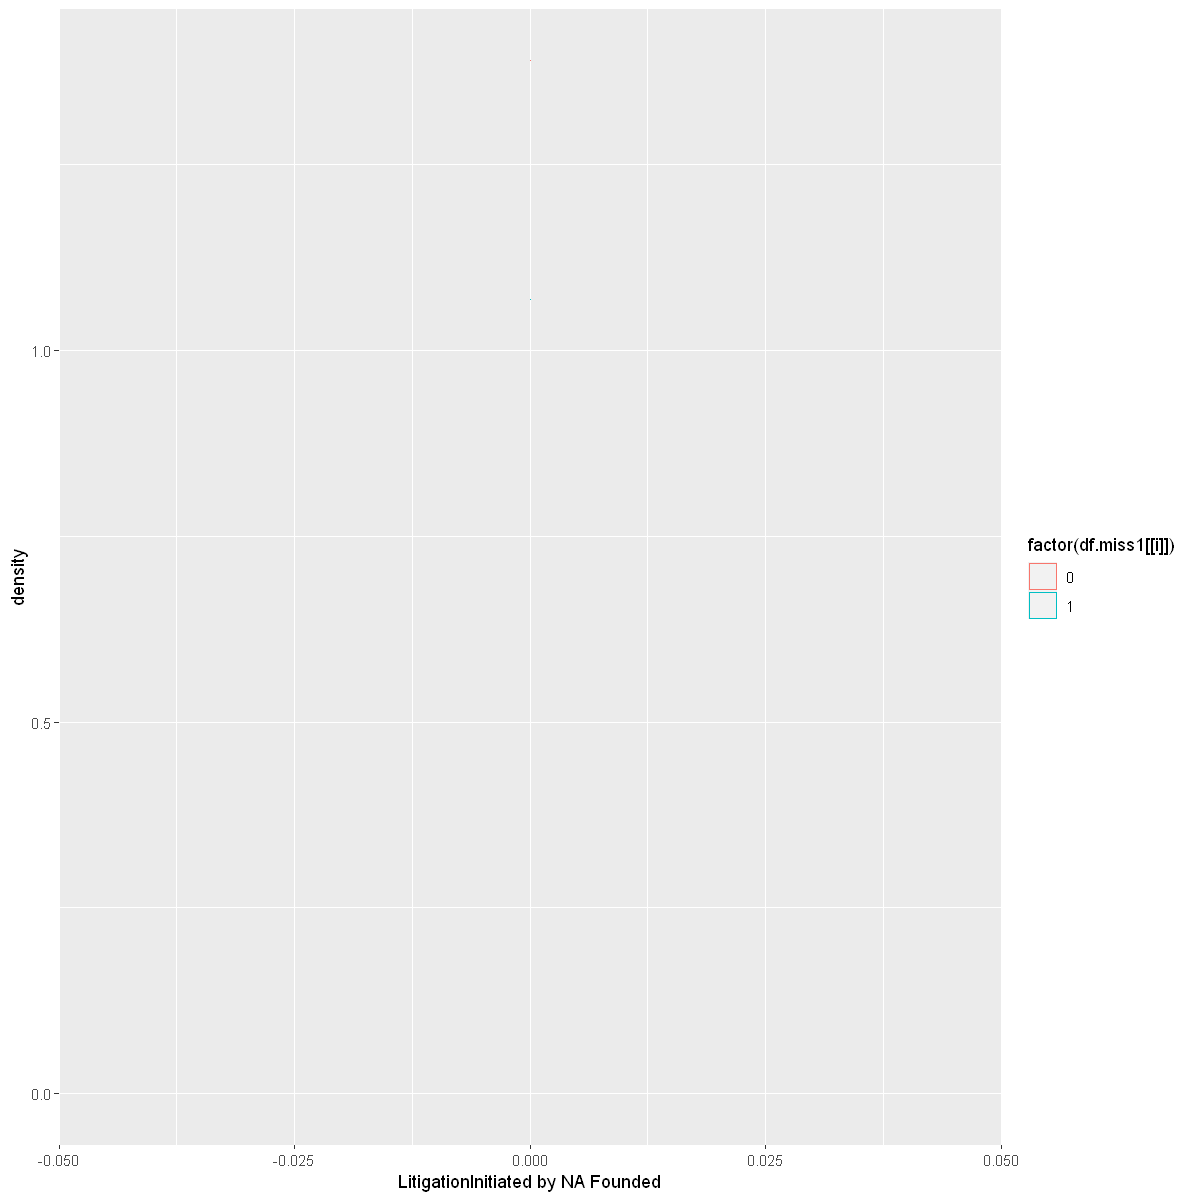


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = -4.5244, df = 560.99, p-value = 7.396e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5232291 -0.2064512
sample estimates:
mean of x mean of y 
  2.23516   2.60000 

[1] "SeatsProposed by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 10153 rows containing non-finite values (stat_density)."


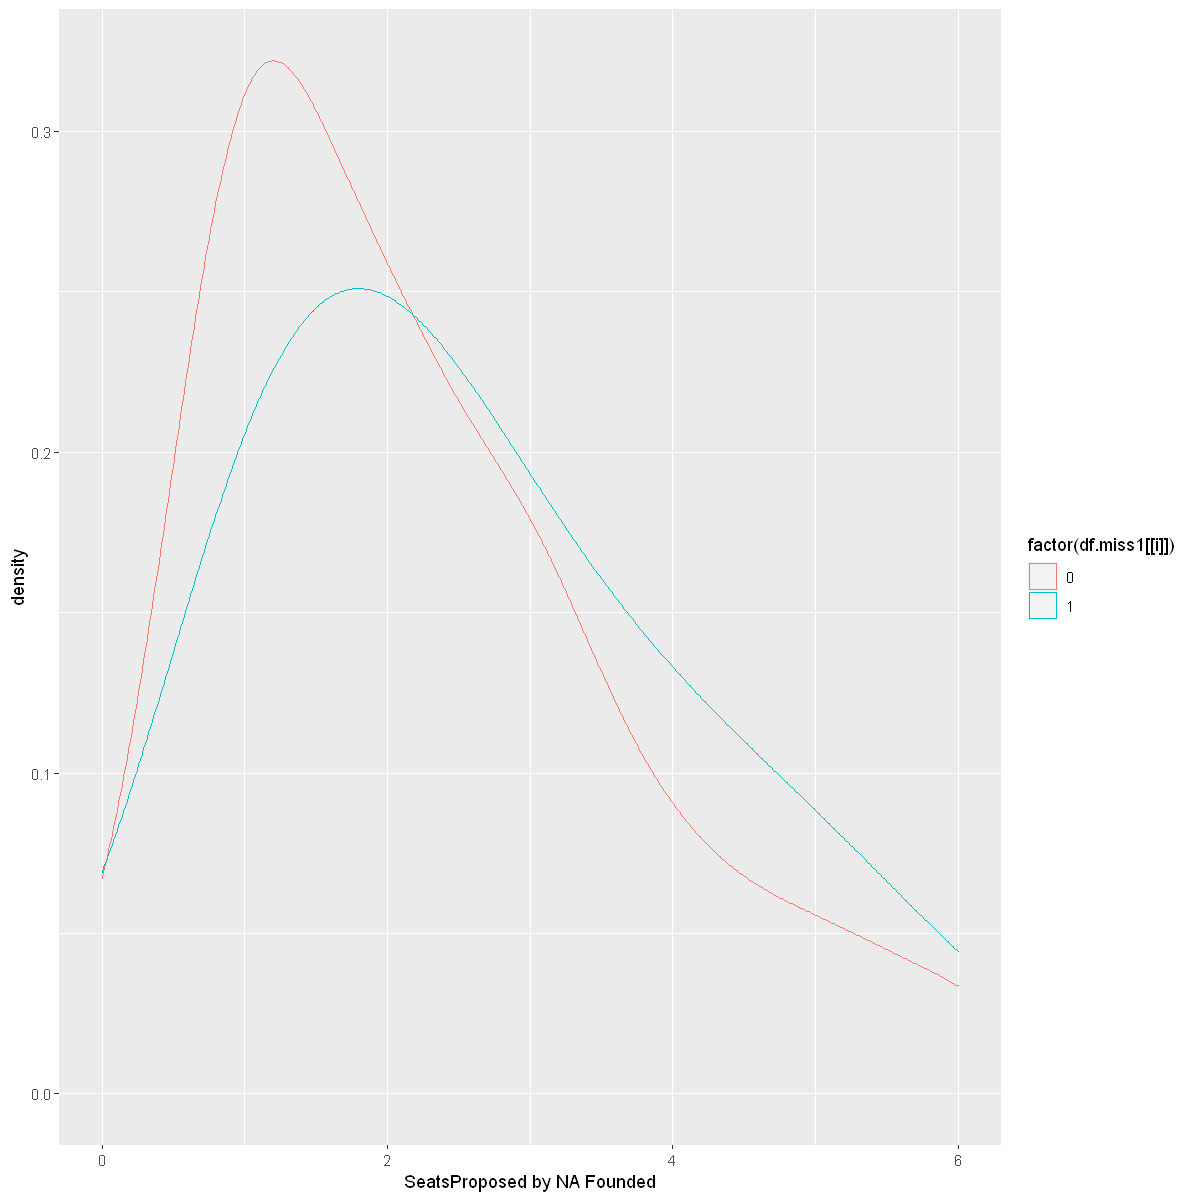


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 0.84783, df = 503.63, p-value = 0.3969
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08208497  0.20671119
sample estimates:
mean of x mean of y 
 1.234637  1.172324 

[1] "SeatsGained by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 4435 rows containing non-finite values (stat_density)."


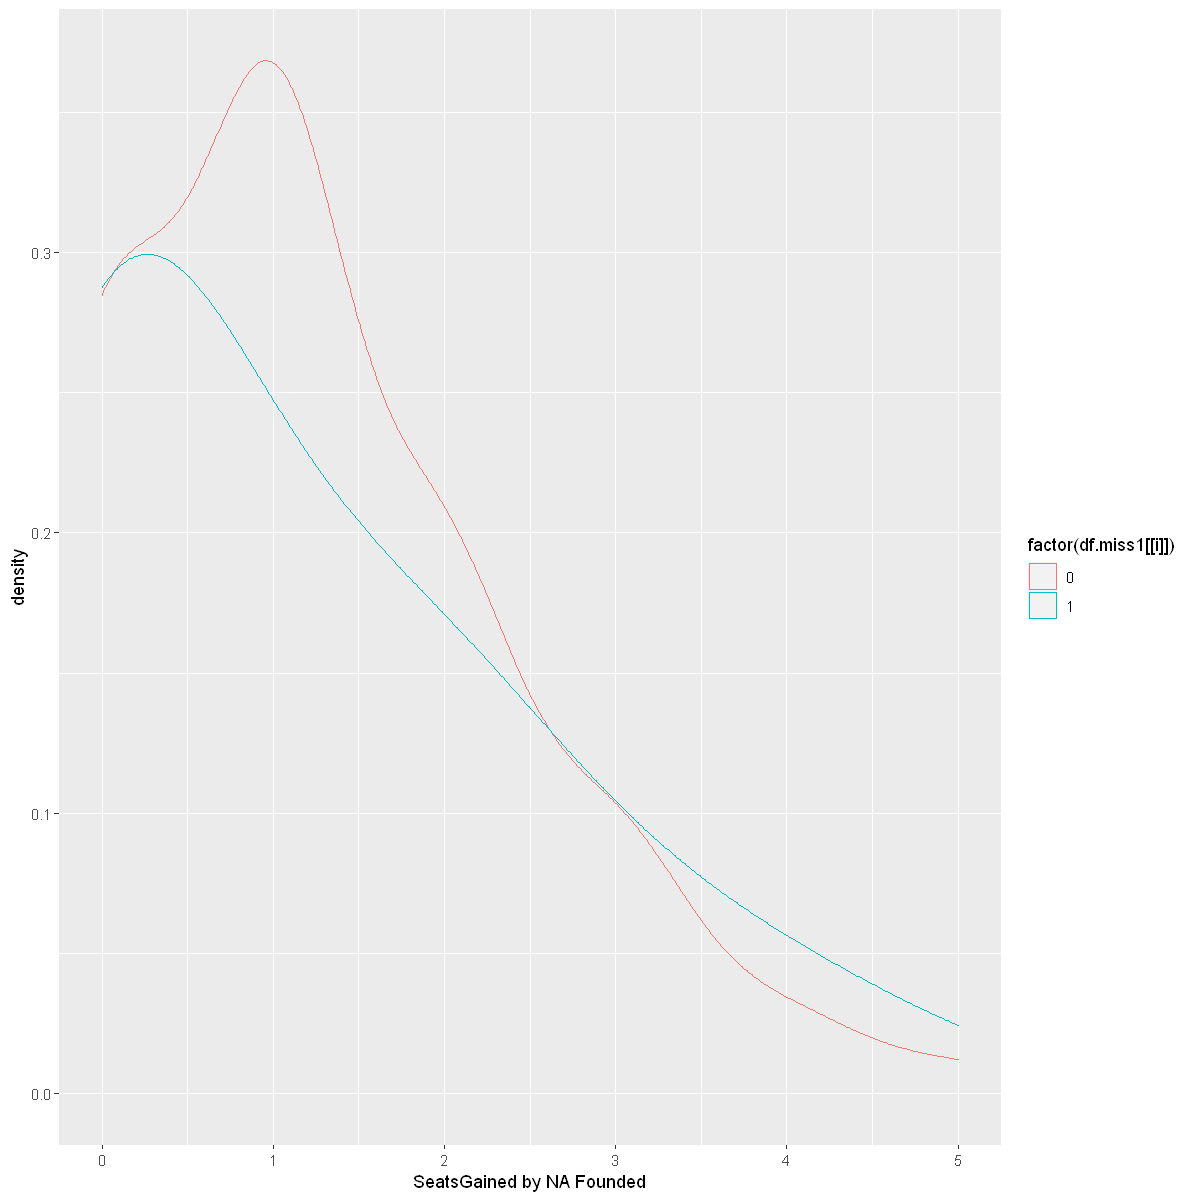


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.7424, df = 1624.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.656657 2.615046
sample estimates:
mean of x mean of y 
-2.482218 -4.618070 

[1] "ExcessReturn by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 4435 rows containing non-finite values (stat_density)."


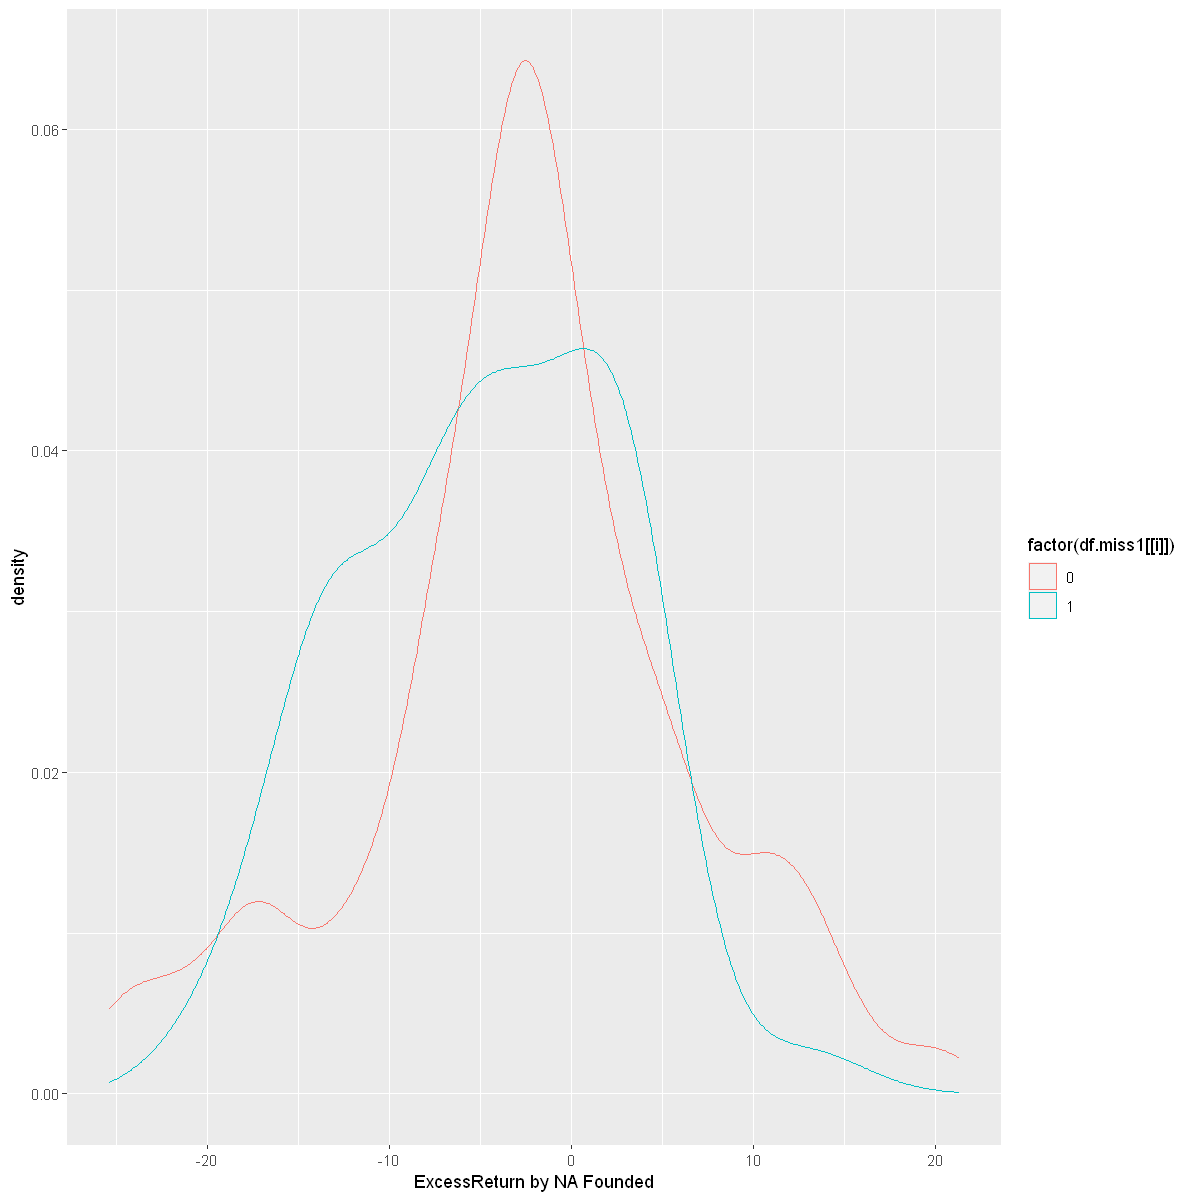


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 8.7424, df = 1624.2, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.656657 2.615046
sample estimates:
mean of x mean of y 
-2.482218 -4.618070 

[1] "ExcessReturn by NA Founded"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 2615 rows containing non-finite values (stat_density)."


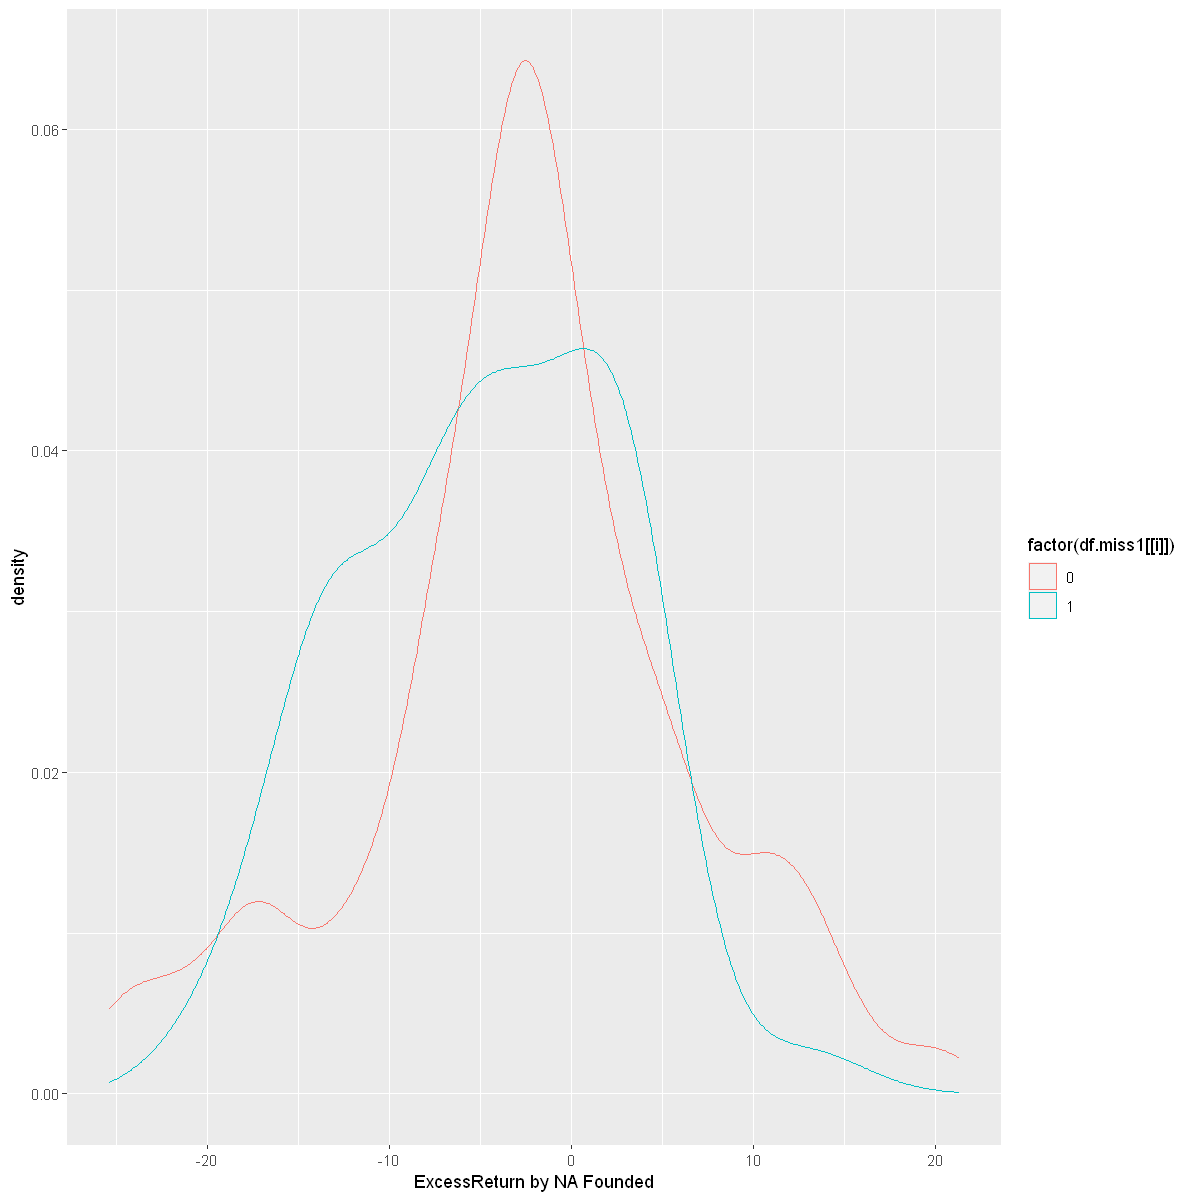


	Welch Two Sample t-test

data:  b1[[j]] and b2[[j]]
t = 61.779, df = 7341, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 7.361815 7.844311
sample estimates:
mean of x mean of y 
 2000.900  1993.297 

[1] "Founded by NA ActivistHoldings"


Warning message:
"Use of `df.noout[[j]]` is discouraged. Use `.data[[j]]` instead."
Warning message:
"Removed 3687 rows containing non-finite values (stat_density)."


ERROR: Error in t.test.default(b1[[j]], b2[[j]]): not enough 'y' observations


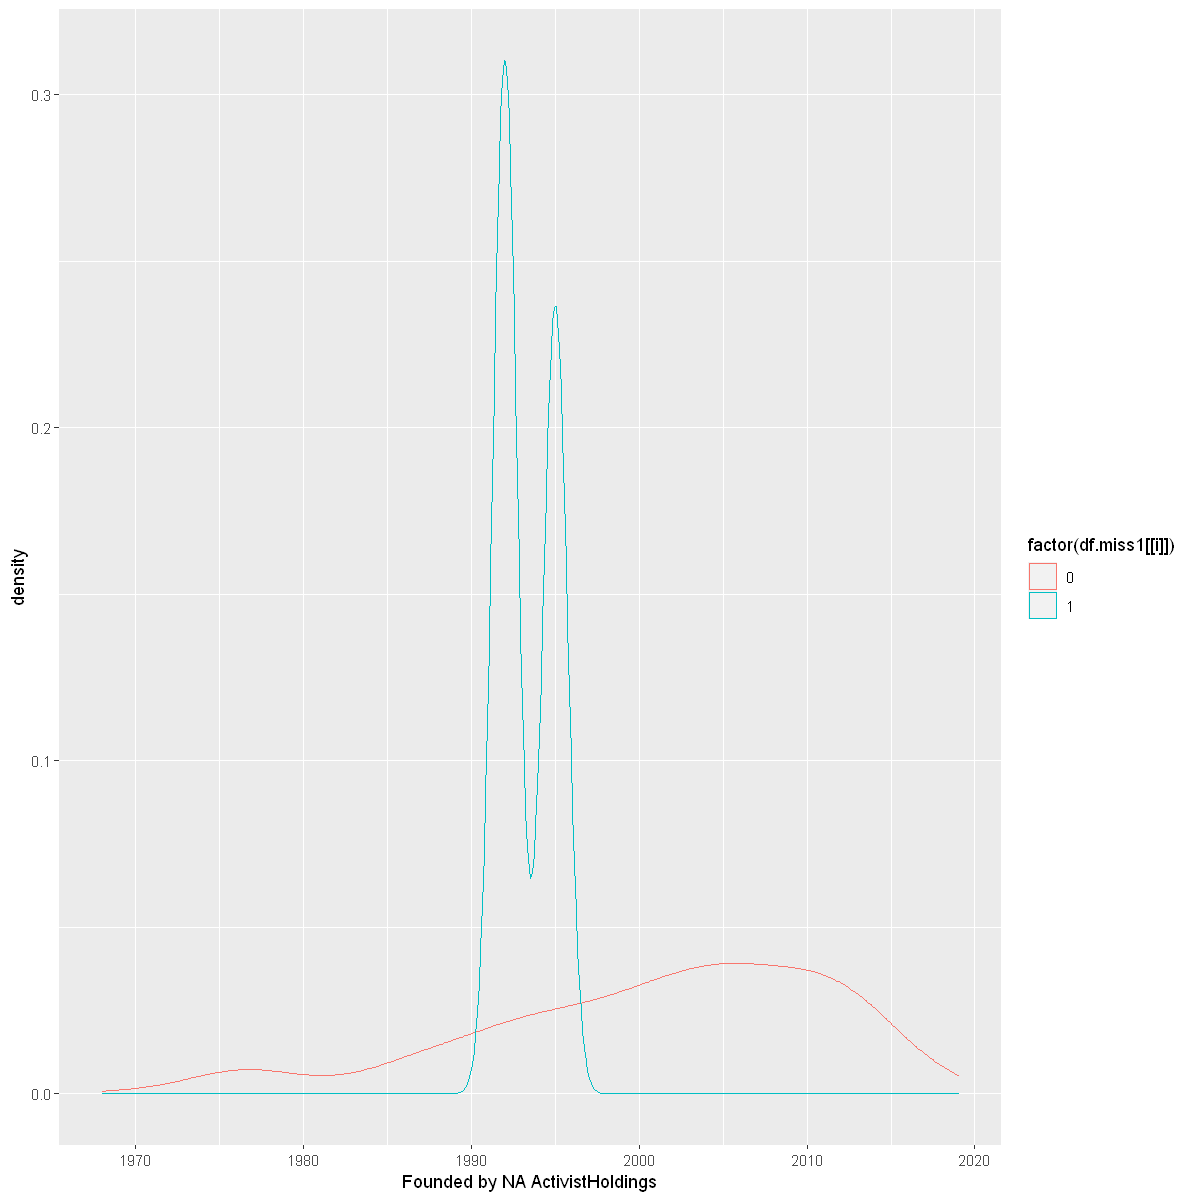

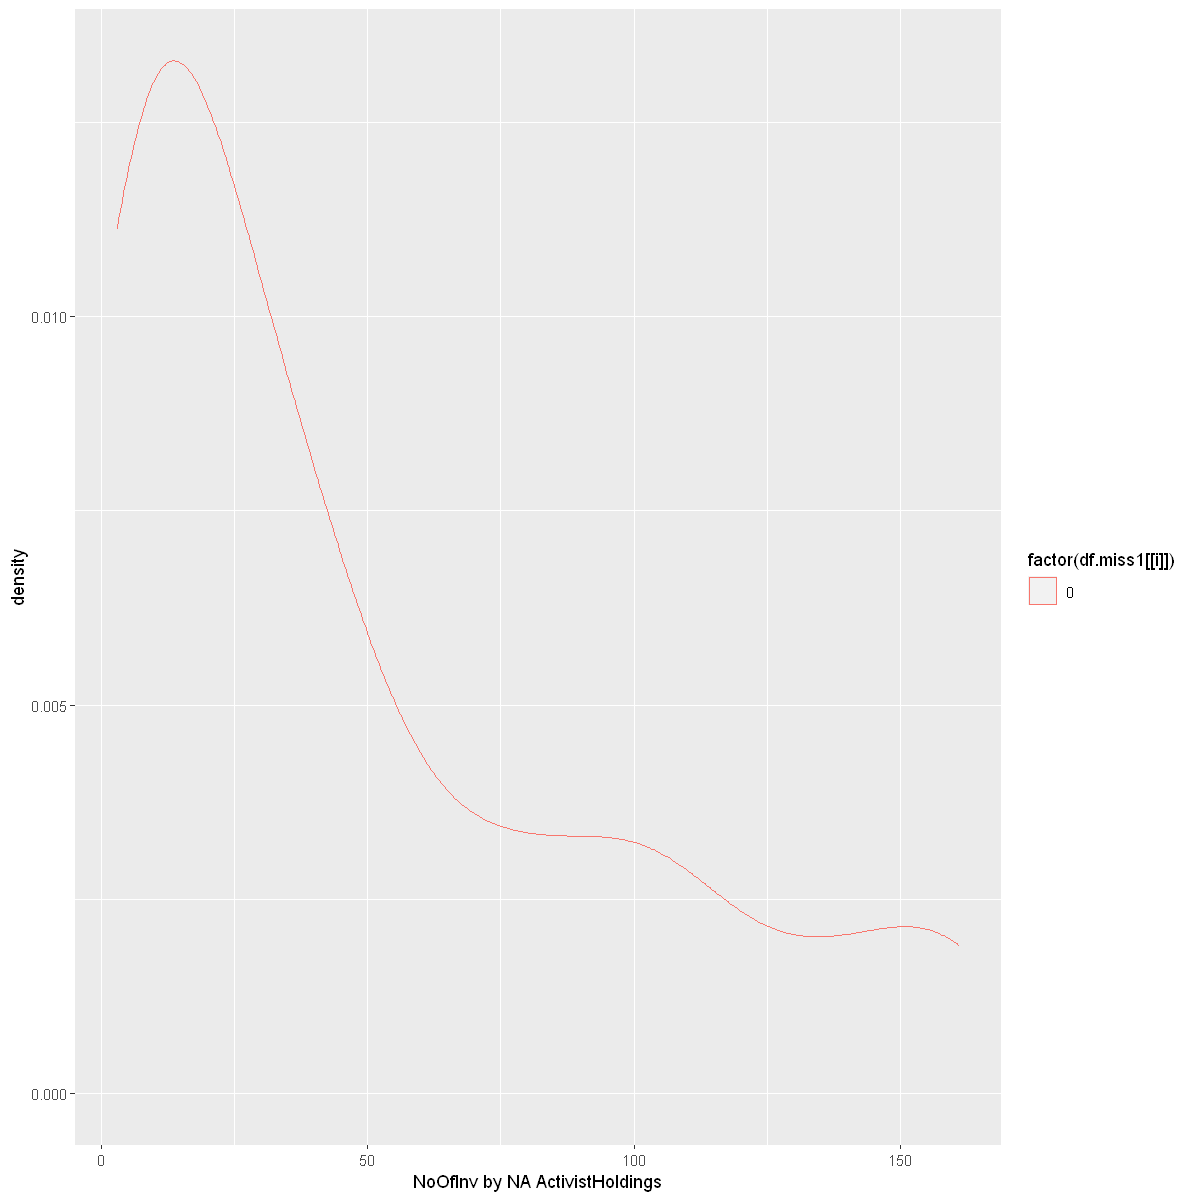

In [189]:
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(2,2))
for (i in l1){
    for (j in l1){
        if (i!=j) {
        print(ggplot(df.noout,aes(x=df.noout[[j]], group=factor(df.miss1[[i]]),
                             color=factor(df.miss1[[i]]))) +
geom_density(adjust=2)+labs(x=paste(j,'by NA',i,sep=' ')))
         b1<- df.noout %>% select(j,i) %>% filter(df.miss1[i]==0)  
         b2<- df.noout %>% select(j,i) %>% filter(df.miss1[i]==1) 
         print(t.test(b1[[j]],b2[[j]]))  
         print(paste(j,'by NA',i,sep=' '))
       }
    }
}

By the distribution above and the t-test I assume that the missing mechanism is MNAR. P-Value > 0.05

| Variable                     | Mechanism | Treatment               |
|------------------------------|-----------|-------------------------|
| amount                       | MAR       | Imputation              |
| time_booked                  | MAR       | Imputation              |
| avg_receipt                  | MNAR      | Categorize              |
| avg_quantity                 | MNAR      | Categorize              |

#### Categorize avg_receipt 

In [192]:
table(df.noout$ExcessReturn)
summary(df$ExcessReturn)


             -25.35              -25.21              -25.08              -24.96 
                 24                   8                  59                  21 
             -24.89              -24.72              -24.58              -24.19 
                  5                   5                   3                   5 
             -23.67              -23.57              -23.17              -23.16 
                 11                   3                  13                  17 
             -22.99              -22.59              -22.48              -22.07 
                  9                   3                  17                   6 
             -21.93              -21.86              -21.78              -21.45 
                 39                   7                   7                   6 
             -21.22              -20.77              -20.46              -20.07 
                  4                  15                   3                  17 
             -19.98        

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-172.950   -7.820   -2.290   -1.363    3.920  263.830     3007 

In [164]:
df$avg_receipt <- ifelse(is.na(df$avg_receipt),'miss',quantile(df$avg_receipt, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

In [165]:
table(df$avg_receipt)


               0 174.933333333333               30 67.2222222222222 
             844              424              420              417 
            miss 
              79 

#### Categorize avg_quantity

In [166]:
table(df$avg_quantity)
summary(df$avg_quantityantity)


               0                1              1.1 1.11111111111111 
            1033              596                1                2 
           1.125 1.16666666666667              1.2 1.22222222222222 
               1                2                7                3 
            1.25 1.26666666666667 1.27272727272727 1.28571428571429 
              21                3                1                4 
             1.3 1.30769230769231 1.33333333333333            1.375 
               1                1               35                3 
1.38461538461538              1.4 1.41666666666667 1.42857142857143 
               2               11                2                1 
1.44444444444444 1.45454545454545              1.5 1.55555555555556 
               2                5               76                3 
1.57142857142857              1.6            1.625 1.63636363636364 
               4                3                5                2 
1.66666666666667 1.69230769230769

Length  Class   Mode 
     0   NULL   NULL 

In [167]:
df$avg_quantity <- ifelse(is.na(df$avg_quantity),'miss',quantile(df$avg_quantity, probs = seq(0, 1, 0.25), na.rm = TRUE,
         names = TRUE))
table(df$avg_quantity)


   0    1  1.1    3 miss 
 869  435  435  434   11 

In [168]:
getMissingness(df)

list(var = c(53, 9), na_count = c(470, 276), rate = c(21.5, 12.6))This dataset has 1659 (76%) complete rows. Original data has 2184 rows.



$missingness
          var na_count rate
1      amount      470 21.5
2 time_booked      276 12.6

$message
[1] "This dataset has 1659 (76%) complete rows. Original data has 2184 rows."

$rows
NULL

#### Imputing the missing data using MICE

Converting time_booked to minutes

In [169]:
ch <- times(df$time_booked)
60 * hours(ch) + minutes(ch)

[1]   NA 1080  640  790   NA  660  810  990  790   NA  860 1010  930   NA
  [15]  960  840  990 1060  660  900  760  600   NA  920  700  820  840  820
  [29] 1080  720  930  750  710  670  930  660 1020   NA  960  930  780  660
  [43]  660  770  800  820 1140  640   NA  870  660  720  990 1050   NA  660
  [57] 1080  540  850 1050 1020  980  870  950  810  890   NA  700  870  600
  [71]  670   NA  600  780 1020   NA   NA 1030  840  930  820  810  600  630
  [85]  750  600  690  600  680  780  870  600  690  910  920  840  900  870
  [99]  780  930  670  990  960 1130  960 1000  870  780  780  960  600  780
 [113]  900  680  810  570  840  880  670  760  860  900  660  800  660  480
 [127]  540 1010  710   NA  600  840  660  750  560   NA 1110   NA   NA  660
 [141]  780  770  660  900  690   NA  970   NA  910  660  810  980 1110 1110
 [155]   NA  860 1020  900  960  840  840  590  900  590  610  600  540  590
 [169]  720  840  570  660  750  810  840   NA  700  810 1140  830  490 1020
 [183]  540  660   NA  780  840  500  770   NA  840  990 1020 1030  760  610
 [197]  650  660  940  870  700  900  620  720  630  720  680  770  600  810
 [211]  750  900  970  980  790  780   NA   NA  600  740   NA  960   NA   NA
 [225]  970   NA  640  840  590  840  840  840  840  840  780 1050 1080 1080
 [239] 1100  960   NA  780 1080   NA 1080  780 1080 1070 1030 1060  900  920
 [253] 1040  660  720  870  680  760  660 1030 1110 1020  780  850  540  610
 [267]  990 1020 1020 1100   NA  960  500  780  660  480  720 1030  840 1080
 [281] 1130   NA 1020  660  710   NA  760  840  890 1080   NA 1060  780 1070
 [295]  990   NA 1100  630  690 1050   NA   NA  960   NA 1000 1050 1060   NA
 [309] 1080   NA  920   NA 1030   NA  540 1020  540  480  820  890  770 1050
 [323] 1110 1140 1050 1130 1150  760  600  870   NA  900  820  600  600  720
 [337]  600  600  600  600  990  600  960  720  590  650   NA  680  910  840
 [351]  600  730  840 1140  660  920 1080 1030 1020  800  720  780  510  750
 [365]  880 1030 1140  810  910  720  530  480   NA 1140  480  510  780  590
 [379]  770  780  850  960  770  690  750  980  630   NA  630  730  540  910
 [393]  760  840  750  600  870  940  540  550  550  550  550  550 1110 1110
 [407]  630  480  490   NA  900  680  600  780  670  850  690  720  800  900
 [421]  620  810  900  810  910 1060 1000 1020  780  810  670  700  570  620
 [435] 1020   NA 1110  780  840  790 1080 1080   NA  960  720  640 1080  900
 [449]   NA 1000 1080   NA  860  900  980  960  960  760  830  660  960  500
 [463]  600 1050 1040  960  780  630  650  950   NA  900  620  900  910 1080
 [477]  560  830  840   NA 1080  670  840   NA  600  920 1010  920  780  870
 [491]   NA  840  630  680  800   NA 1050 1080  690  720  900   NA   NA   NA
 [505]   NA   NA  510  720 1140  900   NA   NA 1140 1090 1030  810  840  940
 [519]  960 1020   NA  640  660   NA  640  550   NA  570  530   NA   NA  630
 [533]  690  780   NA 1000 1020  900  950  970 1010  760  690  540  620   NA
 [547]  990   NA  540  610 1020 1120  600  840   NA  630  900  560  660   NA
 [561]  600 1020 1020 1070  760  630  660 1050  770  660  660  840  970  720
 [575] 1140   NA  990  600   NA  690  780  540  680  600  600  540   NA 1050
 [589]  630  750  600  680   NA 1050 1140 1130 1050  840  780  900  540  780
 [603]  860 1020  880 1100  590  820  900 1110 1170   NA  880  900 1050 1050
 [617]  660 1050 1050  510  540  500  600  680  960  720  780  780  790  720
 [631]  810  600  670  680  770 1040 1140  690 1110   NA   NA  480  810  870
 [645]  790  790  650   NA  660  600  900  600  700  660  590  720  750  630
 [659]  630  700  630  650  930  540  550  840  600  630  610  600  780  870
 [673]  650  600  600  670 1070 1110  990  940  890   NA 1000 1050  960 1010
 [687]  900  980  600  900  660  600  680  750  830  700 1050  660  540  980
 [701]   NA  840  960 1050  660   NA  540  620  600  690  720  580  660  550
 [715]  940   NA   NA  970  600  650 1110   NA 1070   NA   NA  930  730  870

In [170]:
time_booked<-(60 * hours(ch) + minutes(ch))
df$time_booked <- time_booked

In [171]:
init = mice(df, maxit=50, seed=123) 
meth = init$method
predM = init$predictorMatrix


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked  amount
  4   5  time_booked  amount
  5   1  time_booked  amount
  5   2  time_booked  amount
  5   3  time_booked  amount
  5   4  time_booked  amount
  5   5  time_booked  amount
  6   1  time_booked  amount
  6   2  time_booked  amount
  6   3  time_booked  amount
  6   4  time_booked  amount
  6   5  time_booked  amount
  7   1  time_booked  amount
  7   2  time_booked  amount
  7   3  time_booked  amount
  7   4  time_booked  a

Warning message:
"Number of logged events: 507"


In [172]:
meth

Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     service_CHLPL        service_CMT        service_CON         service_CT 
                ""                 ""                 ""                 "" 
       service_CTU        service_FRI       service_MISC        service_SBD 
                ""                 ""                 ""                 "" 
      service_SBD5       service_SDUD       service_SHCC       service_SHCM 
                ""                 ""                 ""                 "" 
      service_SHCW  service_SMARTBOND        service_SMO        staff_BECKY 
                ""                 ""                 ""                 "" 
       staff_HOUSE           staff_JJ       staff_JOANNE        staff_KELLY 
                ""                 ""                 ""                 "" 
      staff_SINEAD  Canceled_By_BECKY  Canceled_By_HOUSE     Canceled_By_JJ 
                ""                 ""                 ""                 "" 
Canceled_By_JOANNE  Canceled_By_KELLY Canceled_By_SINEAD           quantity 
                ""                 ""                 ""                 "" 
            amount        avg_receipt       avg_quantity     total_cancel12 
             "pmm"                 ""                 ""                 ""

In [173]:
predM

Client_Code Booking_Date sunday monday wednesday thursday
Client_Code        0           0            1      1      1         1       
Booking_Date       0           0            1      1      1         1       
sunday             0           0            0      1      1         1       
monday             0           0            1      0      1         1       
wednesday          0           0            1      1      0         1       
thursday           0           0            1      1      1         0       
friday             0           0            1      1      1         1       
saturday           0           0            1      1      1         1       
time_booked        0           0            1      1      1         1       
cancel_days        0           0            1      1      1         1       
NoShow             0           0            1      1      1         1       
service_CAL        0           0            1      1      1         1       
service_CALC       0           0            1      1      1         1       
service_CAS        0           0            1      1      1         1       
service_CBAL       0           0            1      1      1         1       
service_CCAMO      0           0            1      1      1         1       
service_CCO        0           0            1      1      1         1       
service_CDPB       0           0            1      1      1         1       
service_CFC        0           0            1      1      1         1       
service_CHLFH      0           0            1      1      1         1       
service_CHLFHC     0           0            1      1      1         1       
service_CHLHH      0           0            1      1      1         1       
service_CHLHHC     0           0            1      1      1         1       
service_CHLPHC     0           0            1      1      1         1       
service_CHLPL      0           0            1      1      1         1       
service_CMT        0           0            1      1      1         1       
service_CON        0           0            1      1      1         1       
service_CT         0           0            1      1      1         1       
service_CTU        0           0            1      1      1         1       
service_FRI        0           0            1      1      1         1       
service_MISC       0           0            1      1      1         1       
service_SBD        0           0            1      1      1         1       
service_SBD5       0           0            1      1      1         1       
service_SDUD       0           0            1      1      1         1       
service_SHCC       0           0            1      1      1         1       
service_SHCM       0           0            1      1      1         1       
service_SHCW       0           0            1      1      1         1       
service_SMARTBOND  0           0            1      1      1         1       
service_SMO        0           0            1      1      1         1       
staff_BECKY        0           0            1      1      1         1       
staff_HOUSE        0           0            1      1      1         1       
staff_JJ           0           0            1      1      1         1       
staff_JOANNE       0           0            1      1      1         1       
staff_KELLY        0           0            1      1      1         1       
staff_SINEAD       0           0            1      1      1         1       
Canceled_By_BECKY  0           0            1      1      1         1       
Canceled_By_HOUSE  0           0            1      1      1         1       
Canceled_By_JJ     0           0            1      1      1         1       
Canceled_By_JOANNE 0           0            1      1      1         1       
Canceled_By_KELLY  0           0            1      1      1         1       
Canceled_By_SINEAD 0           0            1      1      1         1       
quantity       

In [174]:
### Predict the missing values
set.seed(123)
imputed = mice(df, method=meth, predictorMatrix=predM, m=10)


 iter imp variable
  1   1  time_booked  amount
  1   2  time_booked  amount
  1   3  time_booked  amount
  1   4  time_booked  amount
  1   5  time_booked  amount
  1   6  time_booked  amount
  1   7  time_booked  amount
  1   8  time_booked  amount
  1   9  time_booked  amount
  1   10  time_booked  amount
  2   1  time_booked  amount
  2   2  time_booked  amount
  2   3  time_booked  amount
  2   4  time_booked  amount
  2   5  time_booked  amount
  2   6  time_booked  amount
  2   7  time_booked  amount
  2   8  time_booked  amount
  2   9  time_booked  amount
  2   10  time_booked  amount
  3   1  time_booked  amount
  3   2  time_booked  amount
  3   3  time_booked  amount
  3   4  time_booked  amount
  3   5  time_booked  amount
  3   6  time_booked  amount
  3   7  time_booked  amount
  3   8  time_booked  amount
  3   9  time_booked  amount
  3   10  time_booked  amount
  4   1  time_booked  amount
  4   2  time_booked  amount
  4   3  time_booked  amount
  4   4  time_booked

Warning message:
"Number of logged events: 100"


In [175]:
summary(imputed)

Class: mids
Number of multiple imputations:  10 
Imputation methods:
       Client_Code       Booking_Date             sunday             monday 
                ""                 ""                 ""                 "" 
         wednesday           thursday             friday           saturday 
                ""                 ""                 ""                 "" 
       time_booked        cancel_days             NoShow        service_CAL 
             "pmm"                 ""                 ""                 "" 
      service_CALC        service_CAS       service_CBAL      service_CCAMO 
                ""                 ""                 ""                 "" 
       service_CCO       service_CDPB        service_CFC      service_CHLFH 
                ""                 ""                 ""                 "" 
    service_CHLFHC      service_CHLHH     service_CHLHHC     service_CHLPHC 
                ""                 ""                 ""                 "" 
     se

In [176]:
summary(imputed$imp)
imp1 <- complete(imputed,1)
dim(imp1)

                   Length Class      Mode
Client_Code        10     data.frame list
Booking_Date       10     data.frame list
sunday             10     data.frame list
monday             10     data.frame list
wednesday          10     data.frame list
thursday           10     data.frame list
friday             10     data.frame list
saturday           10     data.frame list
time_booked        10     data.frame list
cancel_days        10     data.frame list
NoShow             10     data.frame list
service_CAL        10     data.frame list
service_CALC       10     data.frame list
service_CAS        10     data.frame list
service_CBAL       10     data.frame list
service_CCAMO      10     data.frame list
service_CCO        10     data.frame list
service_CDPB       10     data.frame list
service_CFC        10     data.frame list
service_CHLFH      10     data.frame list
service_CHLFHC     10     data.frame list
service_CHLHH      10     data.frame list
service_CHLHHC     10     data.fra

[1] 2184   56

In [177]:
imputed.full <- complete(imputed,action="long")
dim(imputed.full)

[1] 21840    58

In [178]:
## Check if there are any missing on the imputed data
sapply(imputed, function(x) sum(is.na(x)))

Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'language'"


data             imp               m           where          blocks 
            746               0               0               0               0 
           call            nmis          method predictorMatrix   visitSequence 
              0               0               0               0               0 
       formulas            post           blots            seed       iteration 
              0               0               0               1               0 
  lastSeedValue       chainMean        chainVar    loggedEvents         version 
              0            2700            2700               0               0 
           date 
              0

Inspecting the distribution of original (blue) and imputed data(red)

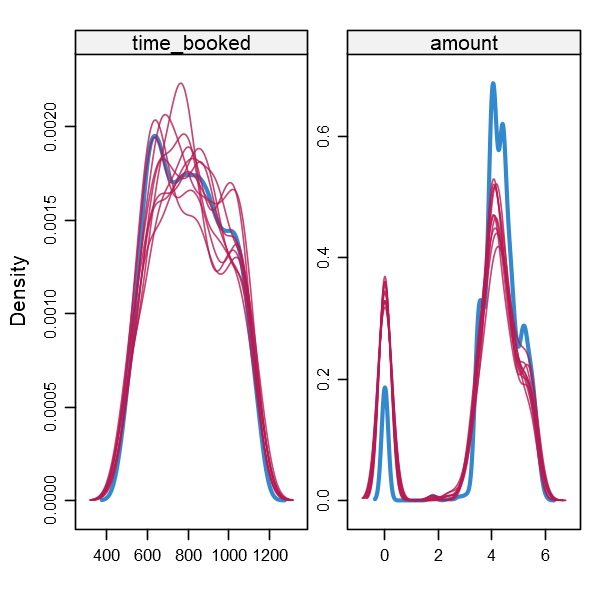

In [179]:
densityplot(imputed)

In [180]:
modelFit1 <- with(imputed,lm(time_booked~ amount))
summary(pool(modelFit1))

estimate   std.error statistic df       p.value  
(Intercept) 789.817067 13.209467 59.791745 116.4157 0.0000000
amount        4.224868  3.158977  1.337416 107.0965 0.1839202

In [181]:
summary(imputed$imp$time_booked)
summary(df$time_booked)

       1                2                3                4         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 640.0   1st Qu.: 660.0   1st Qu.: 680.0   1st Qu.: 677.5  
 Median : 780.0   Median : 810.0   Median : 820.0   Median : 780.0  
 Mean   : 796.8   Mean   : 817.1   Mean   : 823.7   Mean   : 806.9  
 3rd Qu.: 960.0   3rd Qu.: 960.0   3rd Qu.: 980.0   3rd Qu.: 950.0  
 Max.   :1140.0   Max.   :1150.0   Max.   :1160.0   Max.   :1140.0  
       5                6                7                8         
 Min.   : 480.0   Min.   : 480.0   Min.   : 480.0   Min.   : 480.0  
 1st Qu.: 640.0   1st Qu.: 677.5   1st Qu.: 660.0   1st Qu.: 660.0  
 Median : 780.0   Median : 830.0   Median : 780.0   Median : 810.0  
 Mean   : 800.3   Mean   : 823.8   Mean   : 801.7   Mean   : 811.9  
 3rd Qu.: 960.0   3rd Qu.: 960.0   3rd Qu.: 930.0   3rd Qu.: 960.0  
 Max.   :1150.0   Max.   :1150.0   Max.   :1160.0   Max.   :1150.0  
       9                10        

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  480.0   660.0   790.0   805.9   960.0  1170.0     276 

In [182]:
imputed_comp <- complete(imputed)

In [183]:
mean(imputed_comp$time_booked)
mean(df$time_booked,na.rm=TRUE)
sd(imputed_comp$time_booked)
sd(df$time_booked,na.rm=TRUE)

[1] 804.7253

[1] 805.8753

[1] 175.7951

[1] 174.9124

In [184]:
df$time_booked <- imputed_comp$time_booked

In [185]:
getMissingness(df)

list(var = 53, na_count = 470, rate = 21.5)This dataset has 1714 (78.5%) complete rows. Original data has 2184 rows.



$missingness
     var na_count rate
1 amount      470 21.5

$message
[1] "This dataset has 1714 (78.5%) complete rows. Original data has 2184 rows."

$rows
NULL

In [186]:
summary(imputed$imp$amount)
summary(df$amount)

       1               2               3               4        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.:3.258   1st Qu.:3.302   1st Qu.:3.434  
 Median :4.025   Median :4.063   Median :4.025   Median :4.025  
 Mean   :3.431   Mean   :3.382   Mean   :3.390   Mean   :3.435  
 3rd Qu.:4.534   3rd Qu.:4.635   3rd Qu.:4.615   3rd Qu.:4.562  
 Max.   :5.763   Max.   :5.763   Max.   :5.763   Max.   :5.753  
       5               6               7               8        
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:3.258   1st Qu.:3.434   1st Qu.:3.434   1st Qu.:3.258  
 Median :4.111   Median :4.111   Median :4.111   Median :4.106  
 Mean   :3.436   Mean   :3.440   Mean   :3.431   Mean   :3.340  
 3rd Qu.:4.710   3rd Qu.:4.627   3rd Qu.:4.605   3rd Qu.:4.635  
 Max.   :5.826   Max.   :5.950   Max.   :5.763   Max.   :5.950  
       9               10       
 Min.   :0.000   Min.   :0.000  
 1st Qu.:3.434   1st Qu.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   3.932   4.263   4.133   4.754   5.950     470 

In [187]:
mean(imputed_comp$amount)
mean(df$amount,na.rm=TRUE)
sd(imputed_comp$amount)
sd(df$amount,na.rm=TRUE)

[1] 3.981693

[1] 4.132746

[1] 1.379298

[1] 1.19079

In [188]:
df$amount <- imputed_comp$amount

In [189]:
summary(df)

 Client_Code        Booking_Date           sunday            monday         
 Length:2184        Length:2184        Min.   :0.00000   Min.   :0.0000000  
 Class :character   Class :character   1st Qu.:0.00000   1st Qu.:0.0000000  
 Mode  :character   Mode  :character   Median :0.00000   Median :0.0000000  
                                       Mean   :0.02976   Mean   :0.0004579  
                                       3rd Qu.:0.00000   3rd Qu.:0.0000000  
                                       Max.   :1.00000   Max.   :1.0000000  
   wednesday         thursday          friday          saturday     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.1456   Mean   :0.2083   Mean   :0.2152   Mean   :0.1969  
 3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00

In [190]:
getMissingness(df)

list(var = integer(0), na_count = numeric(0), rate = numeric(0))This dataset has 2184 (100%) complete rows. Original data has 2184 rows.



$missingness
[1] var      na_count rate    
<0 rows> (or 0-length row.names)

$message
[1] "This dataset has 2184 (100%) complete rows. Original data has 2184 rows."

$rows
NULL

## Recheck for variables with less than 2 levels

In [192]:
l1 <- c()
for (v in names(df)){
    if (length(unique(df[[v]]))==1){
        l1<- c(l1,v)
    }
}
df <- df[ , !names(df) %in% l1]


In [193]:
exploreData(data=df, y='NoShow',dir="report-r-cleansed", debug=FALSE,) 

  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |                                                                      |   0%

Warning message:
"Use of `data[[x]]` is discouraged. Use `.data[[x]]` instead."
Warning message:
"Use of `data[[y]]` is discouraged. Use `.data[[y]]` instead."


  |===================================================================== |  98%

Warning message in system(cmd, intern = intern, wait = wait | intern, show.output.on.console = wait, :
"running command 'C:\WINDOWS\system32\cmd.exe /c explorer  report-r-cleansed\report.html' had status 1"


character(0)
attr(,"status")
[1] 1

## Re-Check for Outliers

In [194]:
## Using IRQ for catching univariate outliers (1.5 x IRQ) 1==Outliers
head(outlierMatrix(df,threshold=1.5))

Client_Code sunday monday wednesday thursday friday saturday time_booked
1 WXATNI      0      0      0         0        1      0        0          
2 Q4NPGP      0      0      0         0        1      0        0          
3 .L01        0      0      1         0        0      0        0          
4 .L01        0      0      1         0        0      0        0          
5 .L01        0      0      1         0        0      0        0          
6 .L01        0      0      1         0        0      0        0          
  NoShow service_CAL ... staff_JOANNE staff_KELLY staff_SINEAD
1 1      0           ... 0            0           0           
2 0      0           ... 0            0           0           
3 0      0           ... 1            0           0           
4 0      0           ... 0            0           0           
5 0      0           ... 0            0           0           
6 0      0           ... 0            0           0           
  Canceled_By_BECKY Canceled_By_JJ Canceled_By_JOANNE Canceled_By_KELLY
1 0                 0              0                  0                
2 0                 0              0                  0                
3 0                 0              0                  0                
4 0                 0              0                  0                
5 0                 0              0                  1                
6 0                 0              0                  0                
  Canceled_By_SINEAD amount total_cancel12
1 0                  0      0             
2 0                  0      0             
3 0                  0      0             
4 0                  0      0             
5 0                  0      0             
6 0                  0      0

Choosing only continuos features for outliers re-checing

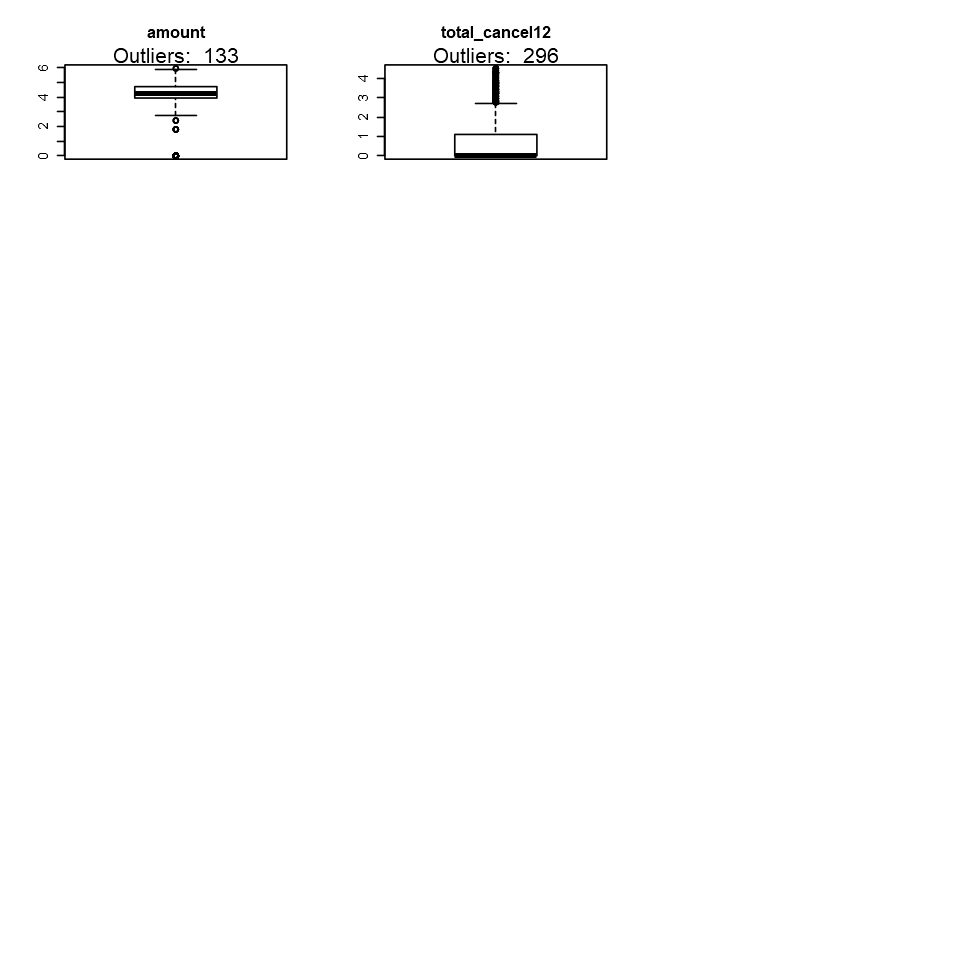

In [195]:
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(4,3))
for(v in names(NOSHOW_continuousV[,c(3,6)])) {
    outlier_values <- boxplot.stats(NOSHOW_continuousV[,v])$out
    boxplot(df[[v]],main=v)
    mtext(paste("Outliers: ", paste(length(outlier_values), collapse=", ")), cex=1)
}
par(mfrow=c(1,1))

### Re-Checking for amount Outliers

#### amount outliers

[1] 0 0 0 0 0 0

[1] 0

[1] 5.950122

[1] 205

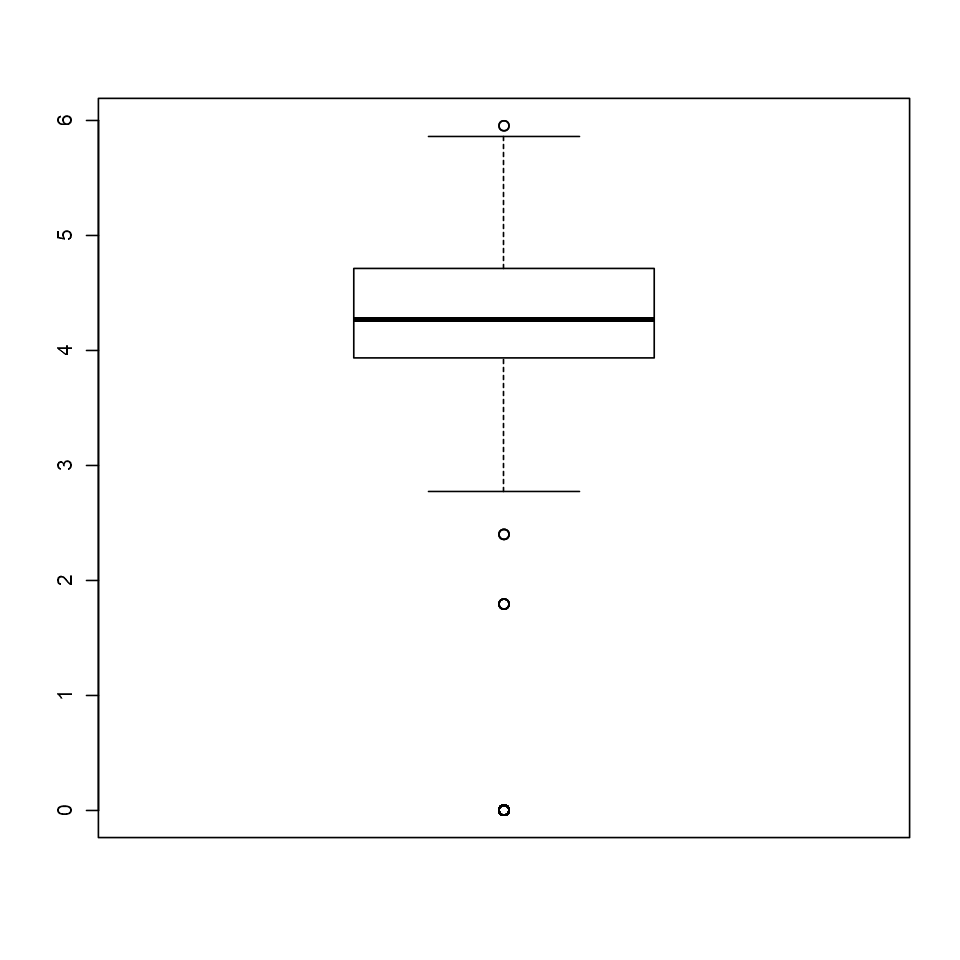

In [196]:
amount_out2  <- boxplot(df$amount)
head(amount_out2$out) # outlier
min(amount_out2$out) #  minimum outlier
max(amount_out2$out)
length(amount_out2$out)

In [197]:
amount.out2 <- ifelse(df[["amount"]] <2.40 , 1, 0)
table(amount.out2)

amount.out2
   0    1 
1981  203 

In [198]:
amount.noout2 <- df[["amount"]]
amount.noout2 <- ifelse(amount.out2==1,NA,amount.noout2)
head(amount.noout2)

[1] 5.145923 5.753366 5.572154 5.572154 4.025352 4.262680

Warning message:
"Removed 203 rows containing non-finite values (stat_bin)."
Warning message:
"Use of `df$amount` is discouraged. Use `amount` instead."
Warning message:
"Removed 203 rows containing non-finite values (stat_density)."


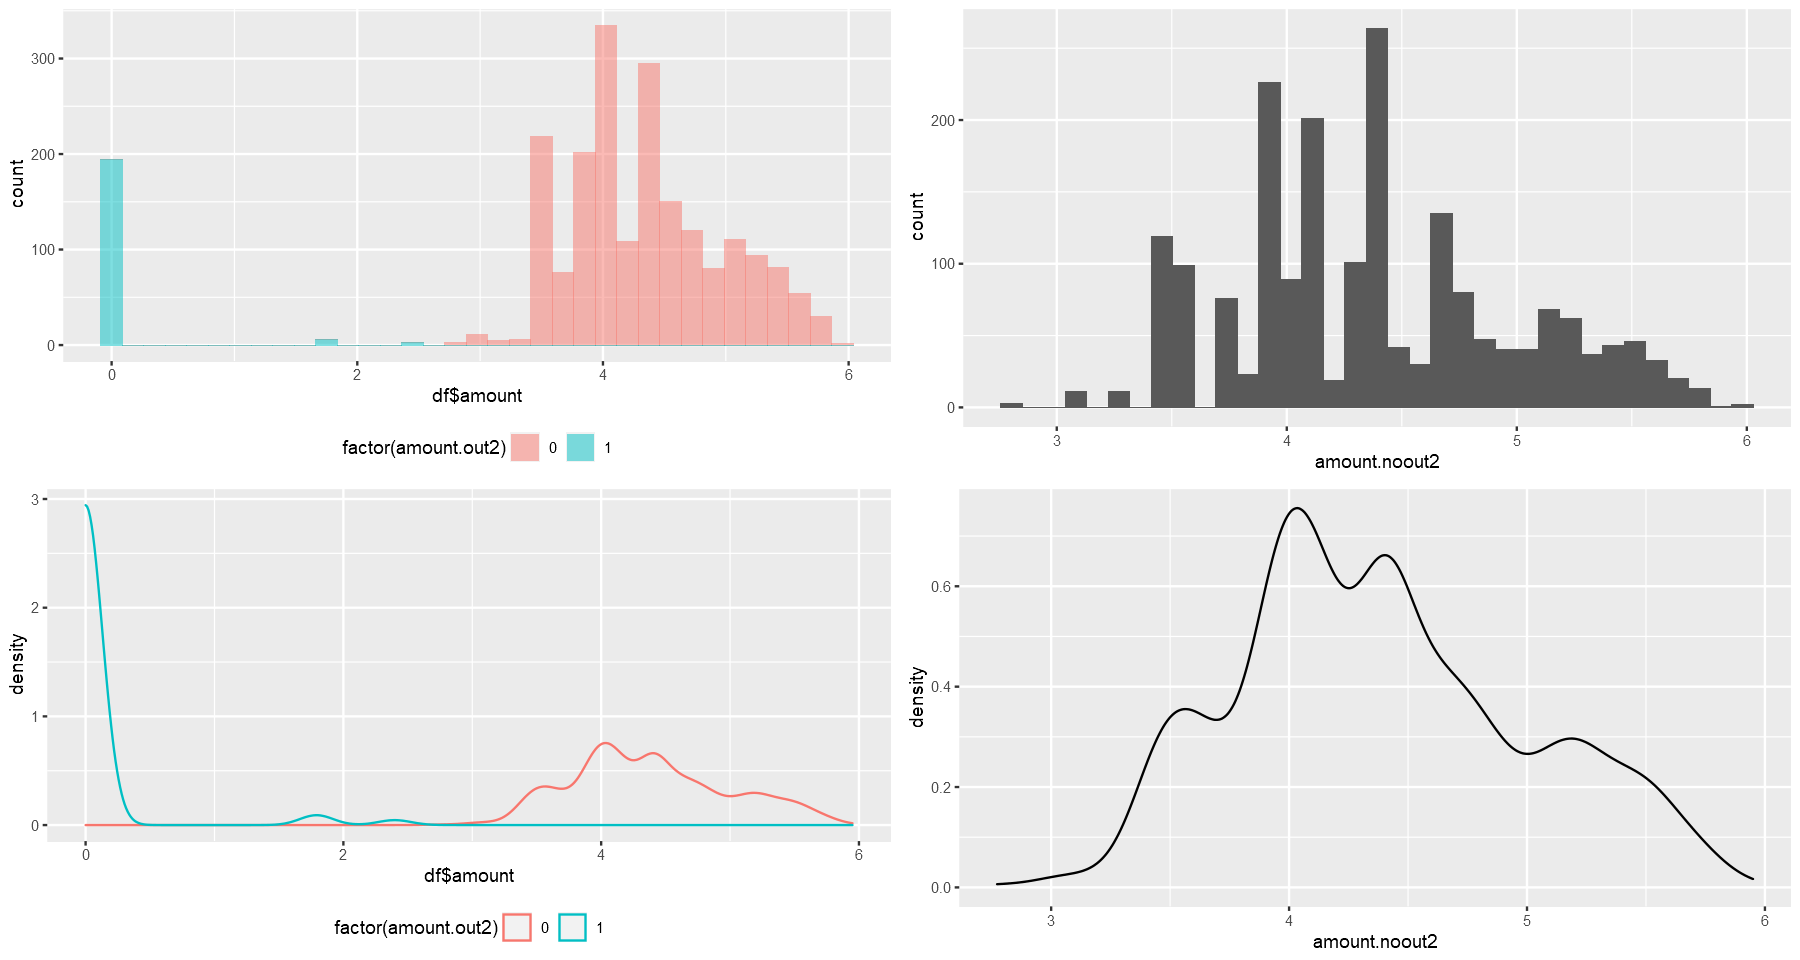

In [199]:
p1 <- ggplot() + geom_histogram(aes(x=df$amount, fill=factor(amount.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=amount.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$amount, group = factor(amount.out2), color = factor(amount.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=amount.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [200]:
t.test(amount.out2,amount.noout2)


	Welch Two Sample t-test

data:  amount.out2 and amount.noout2
t = -286.7, df = 2782.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.317029 -4.258379
sample estimates:
 mean of x  mean of y 
0.09294872 4.38065248 


In [201]:
mod5 <- glm(df$NoShow ~ df$amount,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ amount.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

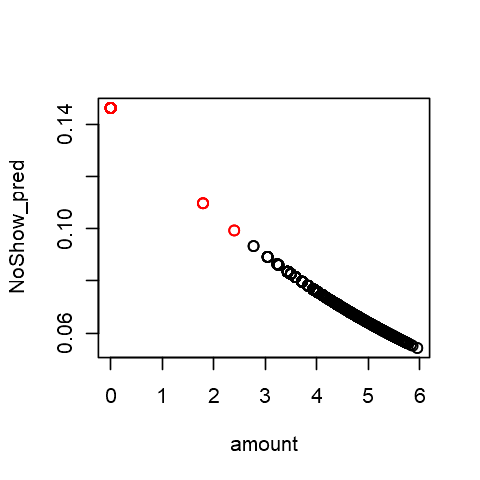

In [202]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [203]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1841
     1  140

In [204]:
mod1a <- glm(df$NoShow ~ df$amount,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$amount+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$amount+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$amount, pred5, col=factor(amount.out2),xlab="amount",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$amount), pred5, col=factor(amount.out2),xlab="amount_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$amount), pred5, col=factor(amount.out2),xlab="amount_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

### Re-Checking for total_cancel12 Outliers

#### total_cancel12 outliers

[1] 2.944439 3.218876 3.433987 3.610918 3.761200 3.891820

[1] 2.772589

[1] 4.51086

[1] 164

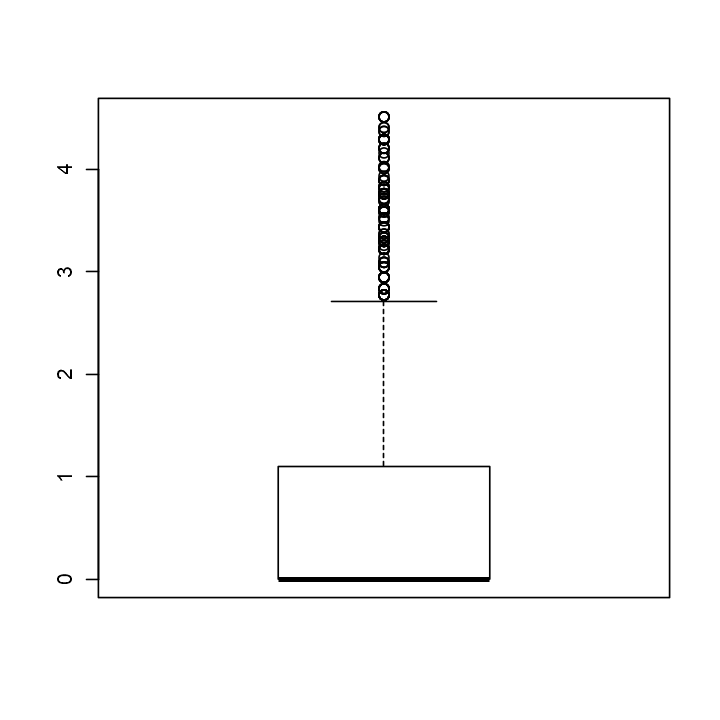

In [156]:
total_cancel12_out2  <- boxplot(df$total_cancel12)
head(total_cancel12_out2$out) # outlier
min(total_cancel12_out2$out) #  minimum outlier
max(total_cancel12_out2$out)
length(total_cancel12_out2$out)

In [158]:
total_cancel12.out2 <- ifelse(df[["total_cancel12"]] <2.77 , 1, 0)
table(total_cancel12.out2)

total_cancel12.out2
   0    1 
 164 2020 

In [159]:
total_cancel12.noout2 <- df[["total_cancel12"]]
total_cancel12.noout2 <- ifelse(total_cancel12.out2==1,NA,total_cancel12.noout2)
head(total_cancel12.noout2)

[1] NA NA NA NA NA NA

Warning message:
"Removed 2020 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2020 rows containing non-finite values (stat_density)."


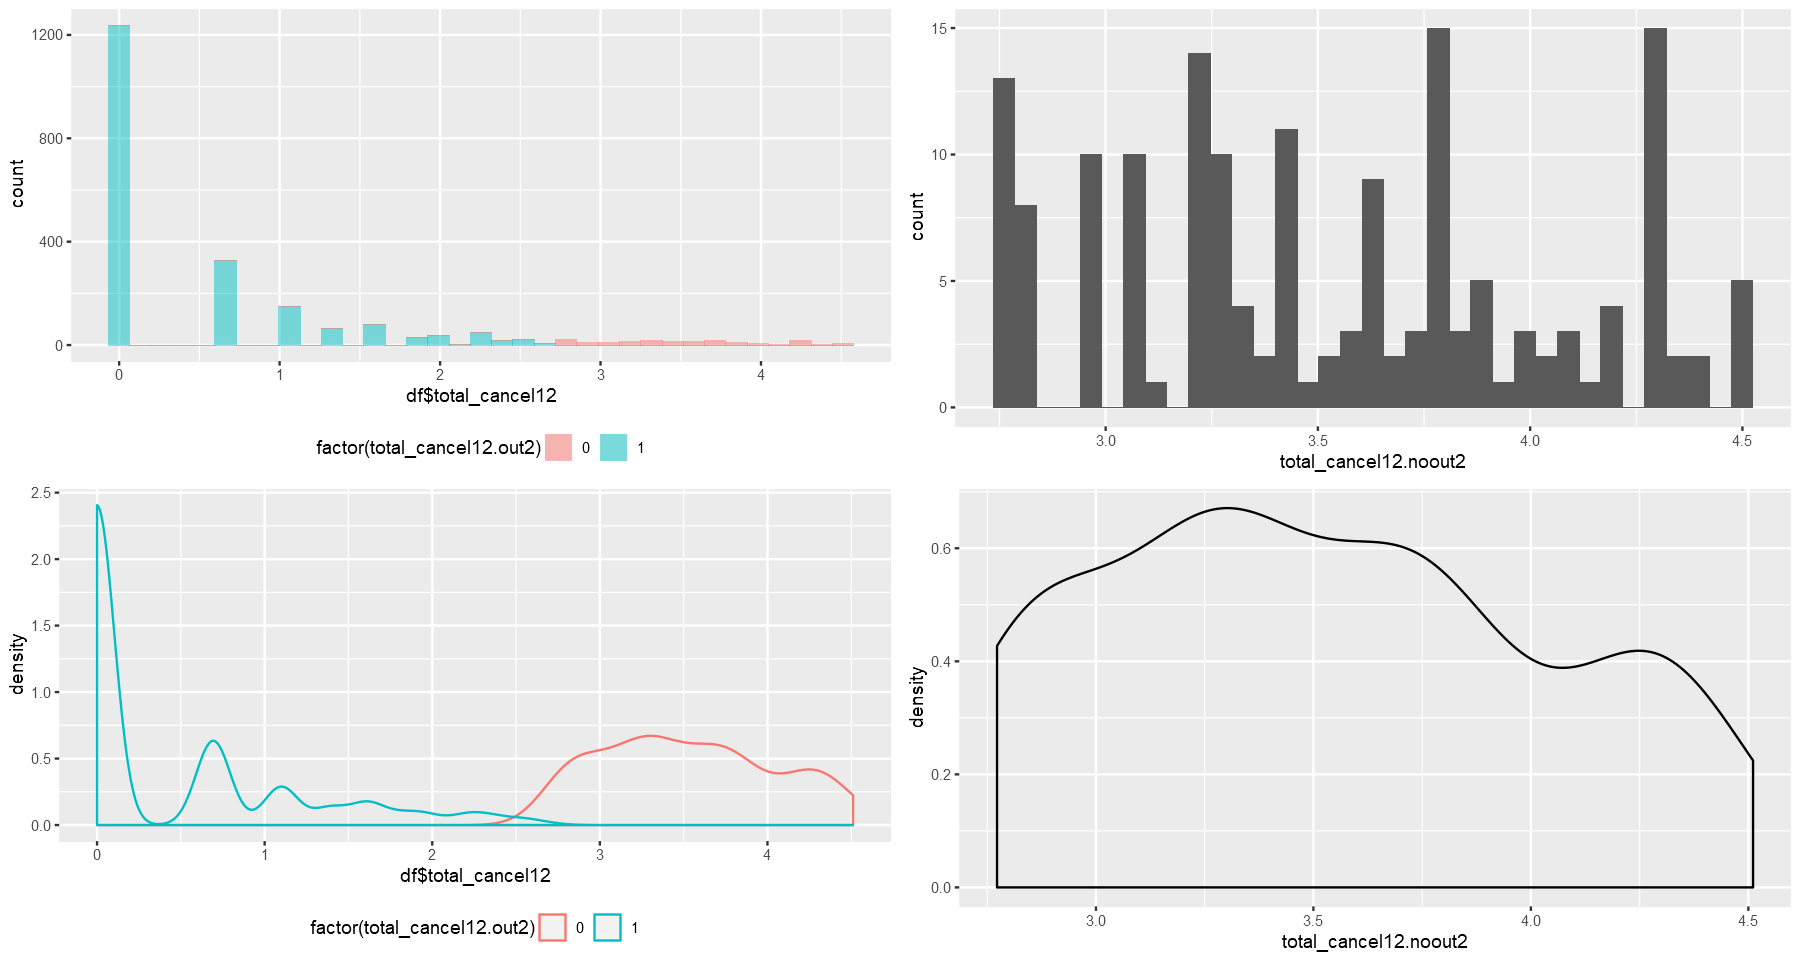

In [160]:
p1 <- ggplot() + geom_histogram(aes(x=df$total_cancel12, fill=factor(total_cancel12.out2)),alpha=0.5,bins=35)+ theme(legend.position="bottom")
p2 <- ggplot() + geom_histogram(aes(x=total_cancel12.noout2),bins=35)
p3 <- ggplot (df,aes(x=df$total_cancel12, group = factor(total_cancel12.out2), color = factor(total_cancel12.out2))) + geom_density() + theme(legend.position="bottom")
p4 <- ggplot (df,aes(x=total_cancel12.noout2)) + geom_density()

options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(p1, p2, p3, p4, nrow = 2)

In [161]:
t.test(total_cancel12.out2,total_cancel12.noout2)


	Welch Two Sample t-test

data:  total_cancel12.out2 and total_cancel12.noout2
t = -64.874, df = 169.61, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.686696 -2.528018
sample estimates:
mean of x mean of y 
0.9249084 3.5322653 


In [162]:
mod5 <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred5 <- predict(mod5,newdata=df,type="response")
mod6 <- glm(df$NoShow ~ total_cancel12.noout2,family='binomial')
pred6 <- predict(mod6,newdata=df,type="response")

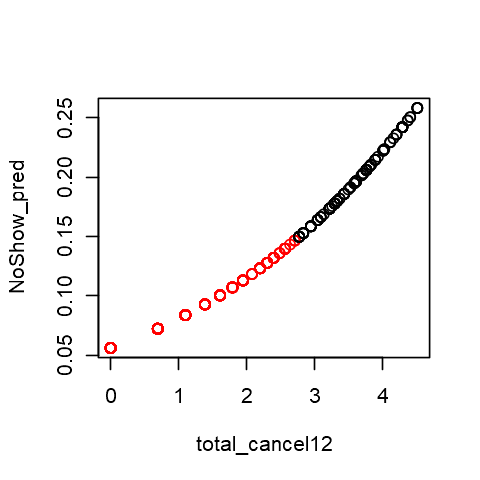

In [163]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
abline(mod5, col="red") 
abline(mod6, col="green")

In [150]:
table (Noshow=df$NoShow, pred=ifelse(pred5>0.015,1,0))
table (Noshow=df$NoShow, pred=ifelse(pred6>0.015,1,0))

      pred
Noshow    1
     0 2013
     1  171

      pred
Noshow    1
     0 1840
     1  136

In [164]:
mod1a <- glm(df$NoShow ~ df$total_cancel12,family='binomial')
pred1a <- predict(mod1a,newdata=df,type="response")
mod2a <- glm(df$NoShow ~ sqrt(df$total_cancel12+1),family='binomial')
pred2a <- predict(mod2a,newdata=df,type="response")
mod3a <- glm(df$NoShow ~ log(df$total_cancel12+1),family='binomial')
pred3a <- predict(mod3a,newdata=df,type="response")

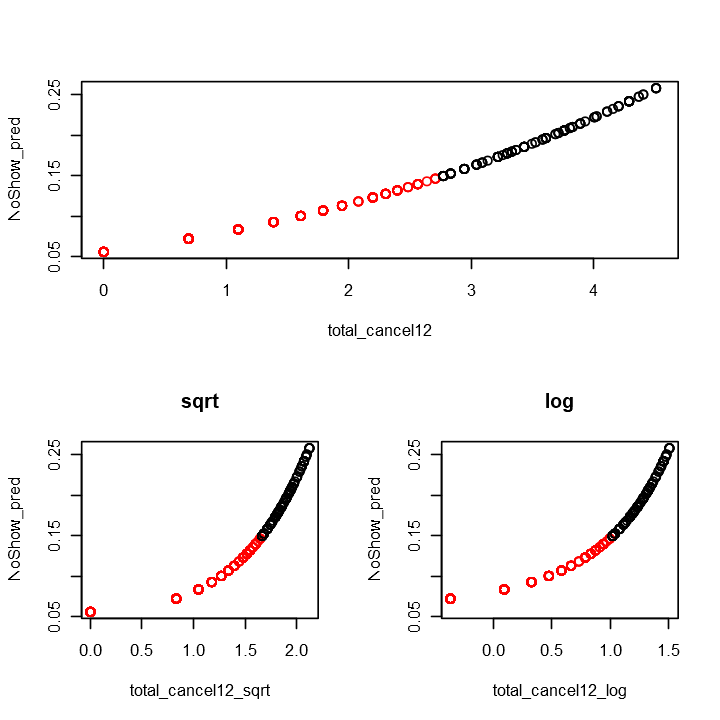

In [165]:
options(repr.plot.width = 6, repr.plot.height = 6)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
# Before transforming
p1 <- plot(df$total_cancel12, pred5, col=factor(total_cancel12.out2),xlab="total_cancel12",ylab="NoShow_pred")
      abline(mod5, col="red") 
      abline(mod6, col="green")
# sqrt transforming
p2 <- plot(sqrt(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_sqrt",ylab="NoShow_pred",main="sqrt")
      abline(mod1a, col="red") 
      abline(mod2a, col="green")
# log transforming
p3 <- plot(log(df$total_cancel12), pred5, col=factor(total_cancel12.out2),xlab="total_cancel12_log",ylab="NoShow_pred",main="log")
      abline(mod1a, col="red") 
      abline(mod3a, col="green")

no need to transform this feature againg

In [218]:
write.csv(df,"C:\\Users\\Mayer\\Documents\\DataScience\\project\\Noshows\\NoShowCleansedDF.csv",row.names = FALSE )